# LRP

In [1]:
import numpy as np
import pickle
import json

In [2]:
from dataPreprocess import prepare_data, make_and_save_dict, map_words_and_tags, pad_seq, get_sets

Using TensorFlow backend.


In [3]:
project_folder = 'LRP_LSTM_NER'

In [4]:
tag2idx = {'I-PER': 0,
           'I-MISC': 1,
           'I-LOC': 2,
           'B-LOC': 3,
           'I-ORG': 4,
           'O': 5,
           'B-ORG': 6,
           'B-MISC': 7,
           'B-PER': 8,
          }
num_tags = len(tag2idx)
tags_set = get_sets(tag2idx)

In [5]:
# import word dict and tag dict
word_dict2 = '../'+project_folder+'/model/word_dict.pkl'
with open(word_dict2, 'rb') as f:
    word2idx = pickle.load(f)
num_words = len(word2idx)
words_set = get_sets(word2idx)
words_set = {}
for wd in word2idx:
    words_set.update({word2idx[wd]: wd})
len(word2idx)

26870

## Import Dataset

In [ ]:
# dataset
max_len = 75
num_tags = len(tags_set)
teste = '../'+project_folder+'/conll2003/test.txt'
X_te, y_te = prepare_data(teste, num_tags, max_len, word2idx, tag2idx)
treino = '../'+project_folder+'/conll2003/train.txt'
X_tr, y_tr = prepare_data(treino, num_tags, max_len, word2idx, tag2idx)
len(X_tr), len(X_te)

['SOCCER', 'NN', 'B-NP', 'O']
['-', ':', 'O', 'O']
['JAPAN', 'NNP', 'B-NP', 'B-LOC']
['GET', 'VB', 'B-VP', 'O']
['LUCKY', 'NNP', 'B-NP', 'O']
['WIN', 'NNP', 'I-NP', 'O']
[',', ',', 'O', 'O']
['CHINA', 'NNP', 'B-NP', 'B-PER']
['IN', 'IN', 'B-PP', 'O']
['SURPRISE', 'DT', 'B-NP', 'O']
['DEFEAT', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Nadim', 'NNP', 'B-NP', 'B-PER']
['Ladki', 'NNP', 'I-NP', 'I-PER']
['AL-AIN', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['United', 'NNP', 'B-NP', 'B-LOC']
['Arab', 'NNP', 'I-NP', 'I-LOC']
['Emirates', 'NNPS', 'I-NP', 'I-LOC']
['1996-12-06', 'CD', 'I-NP', 'O']
['Japan', 'NNP', 'B-NP', 'B-LOC']
['began', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['defence', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['Asian', 'JJ', 'I-NP', 'B-MISC']
['Cup', 'NNP', 'I-NP', 'I-MISC']
['title', 'NN', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['lucky', 'JJ', 'I-NP', 'O']
['2-1', 'CD', 'I-NP', 'O']
['win', 'VBP', 'B-

['Soma', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['4', 'CD', 'B-NP', 'O']
['-', ':', 'I-NP', 'O']
['Masami', 'NNP', 'I-NP', 'B-PER']
['Ihara', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['5', 'CD', 'B-NP', 'O']
['-', ':', 'I-NP', 'O']
['Norio', 'NNP', 'I-NP', 'B-PER']
['Omura', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['6', 'CD', 'B-NP', 'O']
['-', ':', 'I-NP', 'O']
['Motohiro', 'NNP', 'I-NP', 'B-PER']
['Yamaguchi', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['8', 'CD', 'B-NP', 'O']
['-', ':', 'I-NP', 'O']
['Masakiyo', 'NNP', 'I-NP', 'B-PER']
['Maezono', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['7', 'CD', 'B-NP', 'O']
['-', ':', 'I-NP', 'O']
['Yasuto', 'NNP', 'I-NP', 'B-PER']
['Honda', 'NNP', 'I-NP', 'I-PER']
['71', 'CD', 'I-NP', 'O']
[')', ')', 'O', 'O']
[',', ',', 'O', 'O']
['9', 'CD', 'B-NP', 'O']
['-', ':', 'I-NP', 'O']
['Takuya', 'NNP', 'I-NP', 'B-PER']
['Takagi', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['10', 'CD', 'B-NP', 'O']
['-', ':', 'I-NP', 'O']
['Hir

['Moin', 'NNP', 'B-NP', 'B-PER']
['Khan', 'NNP', 'I-NP', 'I-PER']
['c', 'SYM', 'O', 'O']
['Astle', 'NNP', 'B-NP', 'B-PER']
['b', 'SYM', 'O', 'O']
['Harris', 'NNP', 'B-NP', 'B-PER']
['1', 'CD', 'I-NP', 'O']
['Waqar', 'NNP', 'B-NP', 'B-PER']
['Younis', 'NNP', 'I-NP', 'I-PER']
['st', 'NN', 'I-NP', 'O']
['Germon', 'NNP', 'B-NP', 'B-PER']
['b', 'SYM', 'O', 'O']
['Harris', 'NNP', 'B-NP', 'B-PER']
['0', 'CD', 'I-NP', 'O']
['Saqlain', 'NNP', 'B-NP', 'B-PER']
['Mushtaq', 'NNP', 'I-NP', 'I-PER']
['b', 'SYM', 'O', 'O']
['Harris', 'NNP', 'B-NP', 'B-PER']
['2', 'CD', 'I-NP', 'O']
['Mushtaq', 'NNP', 'B-NP', 'B-PER']
['Ahmad', 'NNP', 'I-NP', 'I-PER']
['not', 'RB', 'O', 'O']
['out', 'IN', 'B-PP', 'O']
['5', 'CD', 'B-NP', 'O']
['Salim', 'NNP', 'B-NP', 'B-PER']
['Malik', 'NNP', 'I-NP', 'I-PER']
['not', 'RB', 'O', 'O']
['out', 'IN', 'B-PP', 'O']
['1', 'CD', 'B-NP', 'O']
['Extras', 'NNS', 'B-NP', 'O']
['(', '(', 'O', 'O']
['lb-8', 'CD', 'B-NP', 'O']
['nb-2', 'JJ', 'B-ADJP', 'O']
['w-14', 'CD', 'B-NP', 'O'

['was', 'VBD', 'B-VP', 'O']
['caught', 'VBN', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['act', 'NN', 'I-NP', 'O']
['by', 'IN', 'B-PP', 'O']
['security', 'NN', 'B-NP', 'O']
['cameras', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['pleaded', 'VBD', 'B-VP', 'O']
['guilty', 'JJ', 'B-ADJP', 'O']
['to', 'TO', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['charge', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['affray', 'NN', 'B-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['court', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['London', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'O', 'O']
['He', 'PRP', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['fined', 'VBN', 'I-VP', 'O']
['and', 'CC', 'O', 'O']
['ordered', 'VBD', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['pay', 'VB', 'I-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['total', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['175', 'CD', 'B-NP', 'O']
['pounds', 'NNS', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['two', 'CD', 'B-NP', 'O']
['

['winger', 'NN', 'I-NP', 'O']
['but', 'CC', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['full', 'JJ', 'I-NP', 'O']
['house', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['75,000', 'CD', 'B-NP', 'O']
['spectators', 'NNS', 'I-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['still', 'RB', 'I-VP', 'O']
['gather', 'VB', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['hope', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['witnessing', 'VBG', 'B-VP', 'O']
['one', 'CD', 'B-NP', 'O']
['last', 'JJ', 'B-NP', 'O']
['moment', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['magic', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Campese', 'NNS', 'B-NP', 'B-PER']
['will', 'MD', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['up', 'RP', 'B-PRT', 'O']
['against', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['familiar', 'JJ', 'I-NP', 'O']
['foe', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['shape', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Barbarians', 'NNP', 'B-NP', 'B-ORG']
['ca

['their', 'PRP$', 'B-NP', 'O']
['Champions', 'NNP', 'I-NP', 'B-MISC']
["'", 'POS', 'B-NP', 'I-MISC']
['League', 'NNP', 'I-NP', 'I-MISC']
['group', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['European', 'NNP', 'I-NP', 'B-MISC']
['Cup', 'NNP', 'I-NP', 'I-MISC']
[',', ',', 'O', 'O']
['have', 'VBP', 'B-VP', 'O']
['only', 'RB', 'B-NP', 'O']
['two', 'CD', 'I-NP', 'O']
['players', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['squad', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Attacking', 'VBG', 'B-VP', 'O']
['midfielder', 'NN', 'B-NP', 'O']
['Adrian', 'NNP', 'I-NP', 'B-PER']
['Ilie', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['recently', 'RB', 'B-ADVP', 'O']
['moved', 'VBD', 'B-VP', 'O']
['from', 'IN', 'B-PP', 'O']
['Steaua', 'NNP', 'B-NP', 'B-ORG']
['to', 'TO', 'B-PP', 'O']
['Turkish', 'JJ', 'B-NP', 'B-MISC']
['club', 'NN', 'I-NP', 'O']
['Galatasaray', 'NN', 'I-NP', 'B-ORG']
[',', ',', 'O', 'O']
['is', 'V

['b', 'SYM', 'O', 'O']
['Benjamin', 'NNP', 'B-NP', 'B-PER']
['27', 'CD', 'I-NP', 'O']
['R.', 'NNP', 'B-NP', 'B-PER']
['Ponting', 'NNP', 'I-NP', 'I-PER']
['lbw', 'VBD', 'B-VP', 'O']
['McLean', 'NNP', 'B-NP', 'B-PER']
['5', 'CD', 'I-NP', 'O']
['G.', 'NNP', 'B-NP', 'B-PER']
['Blewett', 'NNP', 'I-NP', 'I-PER']
['not', 'RB', 'O', 'O']
['out', 'IN', 'B-PP', 'O']
['57', 'CD', 'B-NP', 'O']
['M.', 'NNP', 'B-NP', 'B-PER']
['Bevan', 'NNP', 'I-NP', 'I-PER']
['st', 'NN', 'I-NP', 'O']
['Murray', 'NNP', 'I-NP', 'B-PER']
['b', 'SYM', 'O', 'O']
['Hooper', 'NNP', 'B-NP', 'B-PER']
['3', 'CD', 'I-NP', 'O']
['S.', 'NNP', 'B-NP', 'B-PER']
['Law', 'NNP', 'I-NP', 'I-PER']
['b', 'SYM', 'O', 'O']
['Hooper', 'NNP', 'B-NP', 'B-PER']
['21', 'CD', 'I-NP', 'O']
['T.', 'NNP', 'B-NP', 'B-PER']
['Moody', 'NNP', 'I-NP', 'I-PER']
['not', 'RB', 'O', 'O']
['out', 'IN', 'B-PP', 'O']
['3', 'CD', 'B-NP', 'O']
['Extras', 'NNS', 'B-NP', 'O']
['(', '(', 'O', 'O']
['lb-17', 'CD', 'B-NP', 'O']
['nb-8', 'CD', 'I-NP', 'O']
['w-3', '

['about', 'IN', 'B-PP', 'O']
['Healy', 'NNP', 'B-NP', 'B-PER']
["'s", 'POS', 'B-NP', 'O']
['role', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['incident', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['questioned', 'VBD', 'B-VP', 'O']
['whether', 'IN', 'B-SBAR', 'O']
['the', 'DT', 'B-NP', 'O']
['ball', 'NN', 'I-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['carried', 'VBN', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Australia', 'NNP', 'I-NP', 'B-LOC']
['keeper', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Australia', 'NNP', 'B-NP', 'B-LOC']
['went', 'VBD', 'B-VP', 'O']
['on', 'RP', 'B-PRT', 'O']
['to', 'TO', 'B-VP', 'O']
['win', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['match', 'NN', 'I-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Sydney', 'NNP', 'I-NP', 'B-LOC']
['Cricket', 'NNP', 'I-NP', 'I-LOC']
['Ground', 'NNP', 'I-NP', 'I-LOC']
['by', 'IN', 'B-PP', 'O']
['124', 'CD', 'B-NP', 'O']
['runs', 'VBZ', 'B-VP', 'O']
['to

['China', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['beat', 'VB', 'B-VP', 'O']
['Meiluawati', 'NNP', 'B-NP', 'B-PER']
['(', '(', 'O', 'O']
['Indonesia', 'NNP', 'O', 'B-LOC']
[')', ')', 'O', 'O']
['11-6', 'CD', 'B-NP', 'O']
['12-10', 'JJ', 'I-NP', 'O']
['Group', 'NNP', 'B-NP', 'O']
['C', 'NNP', 'I-NP', 'O']
['Camilla', 'NNP', 'B-NP', 'B-PER']
['Martin', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Denmark', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['beat', 'VB', 'B-VP', 'O']
['Wang', 'NNP', 'B-NP', 'B-PER']
['Chen', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['China', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['11-0', 'CD', 'B-NP', 'O']
['12-10', 'JJ', 'I-NP', 'O']
['Group', 'NNP', 'B-NP', 'O']
['D', 'NNP', 'I-NP', 'O']
['Susi', 'NNP', 'B-NP', 'B-PER']
['Susanti', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Indonesia', 'NNP', 'O', 'B-LOC']
[')', ')', 'O', 'O']
['beat', 'VB', 'B-VP', 'O']
['Han', 'NNP', 'B-NP', 'B-PER']
['Jingna', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O',

['Philadelphia', 'NNP', 'I-NP', 'B-ORG']
['Eagles', 'NNPS', 'I-NP', 'I-ORG']
['37-10', 'CD', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['showdown', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['playoff', 'NN', 'B-NP', 'O']
['contenders', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Marshall', 'NNP', 'B-NP', 'B-PER']
['Faulk', 'NNP', 'I-NP', 'I-PER']
['rushed', 'VBD', 'B-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['101', 'CD', 'B-NP', 'O']
['yards', 'NNS', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['two', 'CD', 'B-NP', 'O']
['touchdowns', 'NNS', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['Jason', 'NNP', 'B-NP', 'B-PER']
['Belser', 'NNP', 'I-NP', 'I-PER']
['returned', 'VBD', 'B-VP', 'O']
['an', 'DT', 'B-NP', 'O']
['interception', 'NN', 'I-NP', 'O']
['44', 'CD', 'B-NP', 'O']
['yards', 'NNS', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['score', 'NN', 'I-NP', 'O']
['as', 'IN', 'B-SBAR', 'O']
['the', 'DT', 'B-NP', 'O']
['Colts', 'NNP', 'I-NP', 'B-ORG']
['improved',

['4', 'CD', 'I-NP', 'O']
['.778', 'CD', 'I-NP', 'O']
['-', ':', 'I-NP', 'O']
['NEW', 'NNP', 'B-NP', 'B-ORG']
['YORK', 'NNP', 'I-NP', 'I-ORG']
['10', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['.625', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['ORLANDO', 'NNP', 'B-NP', 'B-ORG']
['8', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['.571', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['WASHINGTON', 'NNP', 'B-NP', 'B-ORG']
['7', 'CD', 'I-NP', 'O']
['9', 'CD', 'I-NP', 'O']
['.438', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['PHILADELPHIA', 'NNP', 'B-NP', 'B-ORG']
['7', 'CD', 'I-NP', 'O']
['10', 'CD', 'I-NP', 'O']
['.412', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['1/2', 'CD', 'I-NP', 'O']
['BOSTON', 'NNP', 'B-NP', 'B-ORG']
['4', 'CD', 'I-NP', 'O']
['12', 'CD', 'I-NP', 'O']
['.250', 'CD', 'I-NP', 'O']
['9', 'CD', 'I-NP', 'O']
['NEW', 'NNP', 'B-NP', 'B-ORG']
['JERSEY', 'NNP', 'I-NP', 'I-ORG']
['3', 'CD', 'I-NP', 'O']
['10', 'CD', 'I-NP', 'O']
['.231', 'CD', 'I-NP', 'O']
['8', 'CD', 'I-N

['292', 'CD', 'I-NP', 'O']
['164', 'CD', 'I-NP', 'O']
['ST', 'PRP', 'B-NP', 'B-ORG']
['LOUIS', 'VBZ', 'B-VP', 'I-ORG']
['4', 'CD', 'B-NP', 'O']
['9', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['246', 'CD', 'I-NP', 'O']
['334', 'CD', 'I-NP', 'O']
['ATLANTA', 'NNP', 'B-NP', 'B-ORG']
['2', 'CD', 'I-NP', 'O']
['11', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['234', 'CD', 'I-NP', 'O']
['393', 'CD', 'I-NP', 'O']
['NEW', 'JJ', 'B-NP', 'B-ORG']
['ORLEANS', 'NNS', 'I-NP', 'I-ORG']
['2', 'CD', 'I-NP', 'O']
['11', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['184', 'CD', 'I-NP', 'O']
['291', 'CD', 'I-NP', 'O']
['X', 'NN', 'B-NP', 'O']
['--', ':', 'O', 'O']
['CLINCHED', 'VBN', 'B-VP', 'O']
['DIVISION', 'NNP', 'B-NP', 'O']
['TITLE', 'NNP', 'I-NP', 'O']
['Y', 'NNP', 'B-NP', 'O']
['--', ':', 'O', 'O']
['CLINCHED', 'NNP', 'B-NP', 'O']
['PLAYOFF', 'NNP', 'I-NP', 'O']
['BERTH', 'NNP', 'I-NP', 'O']
['SUNDAY', 'NNP', 'B-NP', 'O']
[',', ',', 'O', 'O']
['DECEMBER', 'NN', 'B-NP', 'O']
['8', 'CD', 'I-NP',

['42', 'CD', 'I-NP', 'O']
['Feyenoord', 'NNP', 'B-NP', 'B-ORG']
['17', 'CD', 'I-NP', 'O']
['11', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['29', 'CD', 'I-NP', 'O']
['20', 'CD', 'I-NP', 'O']
['36', 'CD', 'I-NP', 'O']
['Twente', 'NNP', 'B-NP', 'B-ORG']
['Enschede', 'NN', 'I-NP', 'I-ORG']
['18', 'CD', 'I-NP', 'O']
['10', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['28', 'CD', 'I-NP', 'O']
['15', 'CD', 'I-NP', 'O']
['34', 'CD', 'I-NP', 'O']
['Graafschap', 'NNP', 'B-NP', 'B-ORG']
['Doetinchem', 'NNP', 'I-NP', 'I-ORG']
['18', 'CD', 'I-NP', 'O']
['9', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['29', 'CD', 'I-NP', 'O']
['22', 'CD', 'I-NP', 'O']
['30', 'CD', 'B-NP', 'O']
['Vitesse', 'NNP', 'B-NP', 'B-ORG']
['Arnhem', 'NNP', 'I-NP', 'I-ORG']
['18', 'CD', 'I-NP', 'O']
['8', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['29', 'CD', 'I-NP', 'O']
['21', 'CD', 'I-NP', 'O']
['29', 'CD', 'I-NP', 'O'

['lead', 'NN', 'I-NP', 'O']
['European', 'JJ', 'I-NP', 'B-MISC']
['qualifying', 'NN', 'I-NP', 'O']
['group', 'NN', 'I-NP', 'O']
['nine', 'CD', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['seven', 'CD', 'B-NP', 'O']
['points', 'NNS', 'I-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['four', 'CD', 'B-NP', 'O']
['games', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['one', 'CD', 'B-NP', 'O']
['more', 'JJR', 'I-NP', 'O']
['than', 'IN', 'B-SBAR', 'O']
['Ukraine', 'NNP', 'B-NP', 'B-LOC']
['and', 'CC', 'O', 'O']
['three', 'CD', 'B-NP', 'O']
['more', 'JJR', 'I-NP', 'O']
['than', 'IN', 'B-SBAR', 'O']
['Germany', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['have', 'VBP', 'B-VP', 'O']
['only', 'RB', 'I-VP', 'O']
['played', 'VBN', 'I-VP', 'O']
['twice', 'RB', 'B-ADVP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['Portuguese', 'JJ', 'I-NP', 'B-MISC']
['host', 'NN', 'I-NP', 'O']
['Germany', 'NNP', 'I-NP', 'B-LOC']
['on', 'IN', 'B-PP', 'O']
['December', 'NNP', 'B-NP', 'O']
['

['weekend', 'NN', 'I-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['games', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['(', '(', 'O', 'O']
['tabulate', 'NN', 'B-NP', 'O']
['under', 'IN', 'B-PP', 'O']
['games', 'NNS', 'B-NP', 'O']
['played', 'VBD', 'B-VP', 'O']
[',', ',', 'I-VP', 'O']
['won', 'VBD', 'I-VP', 'O']
[',', ',', 'B-VP', 'O']
['drawn', 'VBN', 'I-VP', 'O']
[',', ',', 'O', 'O']
['lost', 'VBD', 'B-VP', 'O']
[',', ',', 'O', 'O']
['goals', 'NNS', 'B-NP', 'O']
['for', 'IN', 'B-PP', 'O']
[',', ',', 'O', 'O']
['against', 'IN', 'B-PP', 'O']
[',', ',', 'O', 'O']
['points', 'VBZ', 'B-VP', 'O']
[')', ')', 'O', 'O']
[':', ':', 'O', 'O']
['Real', 'JJ', 'B-NP', 'B-ORG']
['Madrid', 'NNP', 'I-NP', 'I-ORG']
['15', 'CD', 'I-NP', 'O']
['10', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['31', 'CD', 'I-NP', 'O']
['12', 'CD', 'I-NP', 'O']
['35', 'CD', 'I-NP', 'O']
['Barcelona', 'NNP', 'B-NP', 'B-ORG']
['15', 'CD', 'I-NP', 'O']
['10', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['1', 

['Bologna', 'NNP', 'I-NP', 'B-ORG']
['represent', 'VB', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['biggest', 'JJS', 'I-NP', 'O']
['surprise', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['this', 'DT', 'B-NP', 'O']
['Italian', 'JJ', 'I-NP', 'B-MISC']
['autumn', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Led', 'VBN', 'B-VP', 'O']
['as', 'IN', 'B-PP', 'O']
['usual', 'JJ', 'B-ADJP', 'O']
['by', 'IN', 'B-PP', 'O']
['Swede', 'NN', 'B-NP', 'B-MISC']
['Kennet', 'NNP', 'I-NP', 'B-PER']
['Andersson', 'NNP', 'I-NP', 'I-PER']
['and', 'CC', 'O', 'O']
['Russian', 'NNP', 'B-NP', 'B-MISC']
['Igor', 'NNP', 'I-NP', 'B-PER']
['Kolyvanov', 'NNP', 'I-NP', 'I-PER']
['in', 'IN', 'B-PP', 'O']
['attack', 'NN', 'B-NP', 'O']
[',', ',', 'O', 'O']
['Bologna', 'NNP', 'B-NP', 'B-ORG']
['can', 'MD', 'B-VP', 'O']
['expect', 'VB', 'I-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['tough', 'JJ', 'I-NP', 'O']
['home', 'NN', 'I-NP', 'O']
['match', 'NN', 'I-NP', 'O']
['against', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['Piacenza',

['FIFTH', 'IN', 'I-PP', 'O']
['TITLE', 'DT', 'B-NP', 'O']
['OF', 'IN', 'I-NP', 'O']
['YEAR', 'NNP', 'I-NP', 'O']
['.', '.', 'O', 'O']
['BOMBAY', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['India', 'NNP', 'B-NP', 'B-LOC']
['1996-12-06', 'CD', 'I-NP', 'O']
['World', 'NNP', 'B-NP', 'O']
['number', 'NN', 'I-NP', 'O']
['two', 'CD', 'B-NP', 'O']
['Rodney', 'NNP', 'I-NP', 'B-PER']
['Eyles', 'NNP', 'I-NP', 'I-PER']
['moved', 'VBD', 'B-VP', 'O']
['within', 'IN', 'B-PP', 'O']
['sight', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['fifth', 'JJ', 'I-NP', 'O']
['title', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['year', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
['when', 'WRB', 'B-ADVP', 'O']
['he', 'PRP', 'B-NP', 'O']
['hurried', 'VBD', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['only', 'RB', 'B-NP', 'O']
['40', 'CD', 'I-NP', 'O']
['minutes', 'NNS', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-N

['States', 'NNP', 'I-NP', 'I-LOC']
["'", 'POS', 'B-NP', 'O']
['first', 'JJ', 'I-NP', 'O']
['woman', 'NN', 'I-NP', 'O']
['Secretary', 'NNP', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['State', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['In', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['statement', 'NN', 'I-NP', 'O']
['Havel', 'NNP', 'I-NP', 'B-PER']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['recovering', 'VBG', 'I-VP', 'O']
['from', 'IN', 'B-PP', 'O']
['cancer', 'NN', 'B-NP', 'O']
['surgery', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['said', 'VBD', 'B-VP', 'O']
[':', ':', 'O', 'O']
['"', '"', 'O', 'O']
['Madeleine', 'NNP', 'B-NP', 'B-PER']
['Albright', 'NNP', 'I-NP', 'I-PER']
['is', 'VBZ', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['distinguished', 'JJ', 'I-NP', 'O']
['friend', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['tested', 'VBN', 'I-NP', 'O']
['diplomat', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['and', 'CC', 'O', 'O']
['a', 'DT', '

['control', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Czech', 'NNP', 'B-NP', 'B-LOC']
['politics', 'NNS', 'I-NP', 'O']
['since', 'IN', 'B-PP', 'O']
['winning', 'VBG', 'B-NP', 'O']
['general', 'JJ', 'I-NP', 'O']
['elections', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['1992', 'CD', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Zieleniec', 'VBN', 'B-VP', 'B-PER']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['summer', 'NN', 'I-NP', 'O']
['led', 'VBD', 'B-VP', 'O']
['calls', 'NNS', 'B-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['party', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['its', 'PRP$', 'B-NP', 'O']
['leadership', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['listen', 'VB', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['more', 'RBR', 'B-NP', 'O']
['diverse', 'JJ', 'I-NP', 'O']
['opinions', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['thinly-veiled', 'JJ', 'I-NP', 'O']
['criticism', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Klaus',

['profit', 'NN', 'I-NP', 'O']
['fell', 'VBD', 'B-VP', 'O']
['77', 'CD', 'B-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['first', 'JJ', 'I-NP', 'O']
['10', 'CD', 'I-NP', 'O']
['months', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['1996', 'CD', 'B-NP', 'O']
['despite', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['30-percent', 'JJ', 'I-NP', 'O']
['rise', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['sales', 'NNS', 'B-NP', 'O']
[',', ',', 'O', 'O']
['might', 'MD', 'B-VP', 'O']
['only', 'RB', 'I-VP', 'O']
['post', 'VBP', 'I-VP', 'O']
['slightly', 'RB', 'I-VP', 'O']
['better', 'RB', 'I-VP', 'O']
['profits', 'VBZ', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['1997', 'CD', 'B-NP', 'O']
['before', 'IN', 'B-PP', 'O']
['having', 'VBG', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['chance', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['make', 'VB', 'I-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['more', 'RBR', 'I-NP', 'O']
['significant', 'JJ', 'I-NP', 'O']
['t

['to', 'TO', 'B-VP', 'O']
['help', 'VB', 'I-VP', 'O']
['Czech', 'NNP', 'B-NP', 'B-LOC']
['President', 'NNP', 'I-NP', 'O']
['Vaclav', 'NNP', 'I-NP', 'B-PER']
['Havel', 'NNP', 'I-NP', 'I-PER']
['breathe', 'VB', 'B-VP', 'O']
['after', 'IN', 'B-PP', 'O']
['cancer', 'NN', 'B-NP', 'O']
['surgery', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['lungs', 'NNS', 'I-NP', 'O']
['earlier', 'RBR', 'B-NP', 'O']
['this', 'DT', 'I-NP', 'O']
['week', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['spokesman', 'NN', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['He', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['the', 'DT', 'B-NP', 'O']
['procedure', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['insert', 'VB', 'I-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['device', 'NN', 'I-NP', 'O']
['into', 'IN', 'B-PP', 'O']
['Havel', 'NNP', 'B-NP', 'B-PER']
["'s", 'PO

['was', 'VBD', 'B-VP', 'O']
['charged', 'VBN', 'I-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['terrorist', 'JJ', 'B-NP', 'O']
['offences', 'NNS', 'I-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['three', 'CD', 'B-NP', 'O']
['Irish', 'NNP', 'I-NP', 'B-ORG']
['Republican', 'NNP', 'I-NP', 'I-ORG']
['Army', 'NNP', 'I-NP', 'I-ORG']
['mortar', 'NN', 'I-NP', 'O']
['bombs', 'NNS', 'I-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['found', 'VBN', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['Belfast', 'NNP', 'I-NP', 'B-LOC']
['house', 'NN', 'I-NP', 'O']
[',', ',', 'I-NP', 'O']
['police', 'NN', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['Police', 'NNS', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['bombs', 'NNS', 'I-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['found', 'VBN', 'I-VP', 'O']
['hidden', 'VBN', 'I-VP', 'O']
['with', 'IN', 'B-PP', 'O']
['incendiaries', 'NNS', 'B-NP', 'O']
['and', 'CC', 

['prepared', 'VBN', 'I-VP', 'O']
['to', 'TO', 'B-VP', 'O']
['reduce', 'VB', 'I-VP', 'O']
['services', 'NNS', 'B-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['London', 'NNP', 'I-NP', 'B-LOC']
['to', 'TO', 'B-PP', 'O']
['Dallas-Fort', 'NNP', 'B-NP', 'B-LOC']
['Worth', 'NNP', 'I-NP', 'I-LOC']
['route', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['event', 'NN', 'I-NP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['a', 'DT', 'B-NP', 'O']
['new', 'JJ', 'I-NP', 'O']
['entrant', 'FW', 'I-NP', 'O']
['wishes', 'VBZ', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['enter', 'VB', 'I-VP', 'O']
['.', '.', 'O', 'O']
['It', 'PRP', 'B-NP', 'O']
['also', 'RB', 'B-ADVP', 'O']
['suggested', 'VBD', 'B-VP', 'O']
['losing', 'VBG', 'I-VP', 'O']
['some', 'DT', 'B-NP', 'O']
['slots', 'NNS', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['London-to-Boston', 'NNP', 'I-NP', 'B-MISC']
['route', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['O

['LONDON', 'NNP', 'B-NP', 'B-LOC']
['1996-12-06', 'CD', 'I-NP', 'O']
['A', 'DT', 'B-NP', 'O']
['boy', 'NN', 'I-NP', 'O']
['has', 'VBZ', 'B-VP', 'O']
['died', 'VBN', 'I-VP', 'O']
['from', 'IN', 'B-PP', 'O']
['meningitis', 'NN', 'B-NP', 'O']
['and', 'CC', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['girl', 'NN', 'I-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['same', 'JJ', 'I-NP', 'O']
['school', 'NN', 'I-NP', 'O']
['has', 'VBZ', 'B-VP', 'O']
['contracted', 'VBN', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['disease', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['second', 'NN', 'I-NP', 'O']
['such', 'JJ', 'B-NP', 'O']
['scare', 'VB', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['hit', 'VB', 'I-VP', 'O']
['Britain', 'NNP', 'B-NP', 'B-LOC']
['in', 'RP', 'B-PRT', 'O']
['as', 'RB', 'B-NP', 'O']
['many', 'JJ', 'I-NP', 'O']
['weeks', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['health', 'NN', 'B-NP', 'O']
['authorities', 'NNS', 'I-NP', 'O']
['said', 'VBD', 'B-VP'

['attend', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['House', 'NNP', 'I-NP', 'B-ORG']
['of', 'IN', 'B-PP', 'I-ORG']
['Commons', 'NNPS', 'B-NP', 'I-ORG']
['or', 'CC', 'O', 'O']
['as', 'RB', 'B-ADJP', 'O']
['placing', 'VBG', 'B-VP', 'O']
['me', 'PRP', 'B-NP', 'O']
['under', 'IN', 'B-PP', 'O']
['any', 'DT', 'B-NP', 'O']
['obligation', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['vote', 'VB', 'I-VP', 'O']
['as', 'RB', 'B-NP', 'O']
['advised', 'VBN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['Gorst', 'JJS', 'B-NP', 'B-PER']
['resigned', 'VBD', 'B-VP', 'O']
['over', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['hospital', 'NN', 'I-NP', 'O']
['closure', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['constituency', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Electronic', 'NNP', 'B-NP', 'B-ORG']
['Data', 'NNP', 'I-NP', 'I-ORG']
['bags', 'NNS', 'I-NP', 'O']
['flight', 'NN', 'I-NP', 'O']
['data', 'NNS', 'I-NP', 'O']
['contract', 'NN', 'I-NP', 'O']
[

['MOINES', 'NNP', 'I-NP', 'I-LOC']
['1996-12-06', 'CD', 'I-NP', 'O']
['The', 'DT', 'B-NP', 'O']
['hide', 'VB', 'B-VP', 'O']
['and', 'CC', 'I-VP', 'O']
['offal', 'VB', 'I-VP', 'O']
['value', 'NN', 'B-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['typical', 'JJ', 'I-NP', 'O']
['slaughter', 'NN', 'I-NP', 'O']
['steer', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['estimated', 'VBN', 'I-VP', 'O']
['at', 'IN', 'B-PP', 'O']
['$', '$', 'B-NP', 'O']
['9.54', 'CD', 'I-NP', 'O']
['per', 'IN', 'B-PP', 'O']
['cwt', 'NN', 'B-NP', 'O']
['live', 'VB', 'B-VP', 'O']
[',', ',', 'O', 'O']
['dn', 'JJ', 'B-NP', 'O']
['0.05', 'CD', 'I-NP', 'O']
['when', 'WRB', 'B-ADVP', 'O']
['compared', 'VBN', 'B-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['value', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['-', ':', 'O', 'O']
['USDA', 'NNP', 'B-NP', 'B-ORG']
['Wall', 'NNP', 'B-NP', 'B-LOC']
['S

['a', 'DT', 'B-NP', 'O']
['32', 'CD', 'I-NP', 'O']
['cent', 'NN', 'I-NP', 'O']
['bid', 'NN', 'I-NP', 'O']
['"', '"', 'O', 'O']
['because', 'IN', 'B-SBAR', 'O']
['there', 'EX', 'B-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['no', 'DT', 'B-NP', 'O']
['formal', 'JJ', 'I-NP', 'O']
['tender', 'NN', 'I-NP', 'O']
['offer', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['only', 'RB', 'B-NP', 'O']
['the', 'DT', 'I-NP', 'O']
['proposal', 'NN', 'I-NP', 'O']
['letter', 'NN', 'I-NP', 'O']
['"', '"', 'O', 'O']
['mailed', 'VBN', 'B-VP', 'O']
['"', '"', 'O', 'O']
['to', 'TO', 'B-VP', 'O']
['Santa', 'VB', 'I-VP', 'B-ORG']
['Fe', 'NNP', 'B-NP', 'I-ORG']
["'s", 'POS', 'B-NP', 'O']
['board', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['--', ':', 'B-NP', 'O']
['Wall', 'NNP', 'I-NP', 'B-ORG']
['Street', 'NNP', 'I-NP', 'I-ORG']
['Desk', 'NNP', 'I-NP', 'I-ORG']
[',', ',', 'O', 'O']
['212-859-1734', 'CD', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Russ', 'NNP', 'B-NP', 'B-ORG']
['Berrie', 'NNP', 'I-NP', 'I-ORG']
['president', 'NN',

['action', 'NN', 'B-NP', 'O']
['until', 'IN', 'B-SBAR', 'O']
['he', 'PRP', 'B-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['more', 'JJR', 'B-NP', 'O']
['information', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['We', 'PRP', 'B-NP', 'O']
['hope', 'VBP', 'B-VP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['if', 'IN', 'B-SBAR', 'O']
['the', 'DT', 'B-NP', 'O']
['front', 'NN', 'I-NP', 'O']
['moves', 'NNS', 'I-NP', 'O']
['forward', 'RB', 'B-ADVP', 'O']
['or', 'CC', 'I-ADVP', 'O']
['stabilises', 'NNS', 'B-NP', 'O']
['then', 'RB', 'B-ADVP', 'O']
['we', 'PRP', 'B-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['have', 'VB', 'I-VP', 'O']
['access', 'NN', 'B-NP', 'O']
['(', '(', 'O', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['large', 'JJ', 'I-NP', 'O']
['group', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['refugees', 'NNS', 'B-NP', 'O']
[')', ')', 'O', 'O']
['with', 'IN', 'B-PP', 'O']
['reconnaissance', 'NN', 'B-NP', 'O']
['or', 'CC', 'O', 'O']
['humanitarian', 'JJ', 'B-NP', 'O']
['

['U.N.', 'NNP', 'B-NP', 'B-ORG']
['evacuates', 'VBZ', 'B-VP', 'O']
['staff', 'NN', 'B-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['Central', 'JJ', 'B-NP', 'B-LOC']
['African', 'JJ', 'I-NP', 'I-LOC']
['Republic', 'NNP', 'I-NP', 'I-LOC']
['.', '.', 'O', 'O']
['ABIDJAN', 'NNP', 'B-NP', 'B-LOC']
['1996-12-06', 'CD', 'I-NP', 'O']
['The', 'DT', 'B-NP', 'O']
['United', 'NNP', 'I-NP', 'B-ORG']
['Nations', 'NNPS', 'I-NP', 'I-ORG']
['evacuated', 'VBN', 'B-VP', 'O']
['its', 'PRP$', 'B-NP', 'O']
['staff', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Central', 'NNP', 'I-NP', 'B-LOC']
['African', 'NNP', 'I-NP', 'I-LOC']
['Republic', 'NNP', 'I-NP', 'I-LOC']
['on', 'IN', 'B-PP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
['because', 'IN', 'B-PP', 'O']
['of', 'IN', 'I-PP', 'O']
['mounting', 'VBG', 'B-NP', 'O']
['violence', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['two-week-old', 'JJ', 'I-NP', 'O']
['army', 'NN', 'I-NP', 'O']
['mutiny', 'NN', 'I-NP', 'O']
[

['the', 'DT', 'B-NP', 'O']
['meeting', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['send', 'VB', 'I-VP', 'O']
['an', 'DT', 'B-NP', 'O']
['assessment', 'NN', 'I-NP', 'O']
['mission', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Patasse', 'NNP', 'B-NP', 'B-PER']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['won', 'VBD', 'B-VP', 'O']
['Central', 'NNP', 'B-NP', 'B-LOC']
['Africa', 'NNP', 'I-NP', 'I-LOC']
["'s", 'POS', 'B-NP', 'O']
['first', 'JJ', 'I-NP', 'O']
['multi-party', 'NN', 'I-NP', 'O']
['elections', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['refuses', 'VBZ', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['resign', 'VB', 'I-VP', 'O']
['.', '.', 'O', 'O']
['Church-led', 'JJ', 'B-NP', 'O']
['meadiation', 'NN', 'I-NP', 'O']
['attempts', 'NNS', 'I-NP', 'O']
['hit', 'VBP', 'B-VP', 'O']
['deadlock', 'NN', 'B-NP', 'O']
['over', 'IN', 'B-PP', 'O']
['rebel', 'NN', 'B-NP', 'O']
['demands', 'NNS', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['departure', 'NN', 'I-NP', 'O']

['unless', 'IN', 'B-SBAR', 'O']
['he', 'PRP', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['allowed', 'VBN', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['speak', 'VB', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['Berisha', 'NNP', 'B-NP', 'B-PER']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['at', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['time', 'NN', 'I-NP', 'O']
['meeting', 'NN', 'I-NP', 'O']
['Italian', 'NNP', 'B-NP', 'B-MISC']
['President', 'NNP', 'I-NP', 'O']
['Oscar', 'NNP', 'I-NP', 'B-PER']
['Luigi', 'NNP', 'I-NP', 'I-PER']
['Scalfaro', 'NNP', 'I-NP', 'I-PER']
['.', '.', 'O', 'O']
['Buza', 'NNP', 'B-NP', 'B-PER']
['was', 'VBD', 'B-VP', 'O']
['overpowered', 'VBN', 'I-VP', 'O']
['by', 'IN', 'B-PP', 'O']
['riot', 'NN', 'B-NP', 'O']
['police', 'NN', 'I-NP', 'O']
['less', 'JJR', 'B-ADJP', 'O']
['than', 'IN', 'B-PP', 'O']
['one', 'CD', 'B-NP', 'O']
['hour', 'NN', 'I-NP', 'O']
['after', 'IN', 'B-SBAR', 'O']
['he', 'PRP', 'B-NP', 'O']
['began', 'VBD', 'B-VP', '

['a', 'DT', 'B-NP', 'O']
['deputy', 'NN', 'I-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['question', 'NN', 'I-NP', 'O']
['that', 'WDT', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['essentially', 'RB', 'B-ADJP', 'O']
['loaded', 'VBN', 'I-ADJP', 'O']
[',', ',', 'O', 'O']
['then', 'RB', 'B-ADVP', 'O']
['it', 'PRP', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['only', 'JJ', 'I-NP', 'O']
['answer', 'NN', 'I-NP', 'O']
['he', 'PRP', 'B-NP', 'O']
['could', 'MD', 'B-VP', 'O']
['have', 'VB', 'I-VP', 'O']
['given', 'VBN', 'I-VP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['Russian', 'JJ', 'B-NP', 'B-MISC']
['tax', 'NN', 'I-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['cabinet', 'NN', 'I-NP', 'O']
['authorities', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['under', 'IN', 'B-PP', 'O']
['pressure', 'NN', 'B-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['International', 'NNP', 'I-NP', 'B-ORG']
['Monetary', 'NNP', 'I-NP', 'I-ORG']
['Fund', 'NNP', 'I-NP', 'I-ORG']
['to',

['kroons', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['--', ':', 'O', 'O']
['Riga', 'NNP', 'B-NP', 'B-ORG']
['Newsroom', 'NNP', 'I-NP', 'I-ORG']
[',', ',', 'O', 'O']
['+371', 'CD', 'B-NP', 'O']
['721', 'CD', 'I-NP', 'O']
['5240', 'CD', 'I-NP', 'O']
['Russia', 'NNP', 'B-NP', 'B-LOC']
['ready', 'JJ', 'B-ADJP', 'O']
['for', 'IN', 'B-PP', 'O']
['constructive', 'JJ', 'B-NP', 'O']
['work', 'NN', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['Albright', 'NNP', 'B-NP', 'B-PER']
['.', '.', 'O', 'O']
['MOSCOW', 'RB', 'B-ADVP', 'B-LOC']
['1996-12-06', 'CD', 'B-NP', 'O']
['Russia', 'NNP', 'B-NP', 'B-LOC']
['said', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
['it', 'PRP', 'B-NP', 'O']
['expected', 'VBD', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['constructive', 'JJ', 'I-NP', 'O']
['relationship', 'NN', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['Madeleine', 'NNP', 'B-NP', 'B-PER']
['Albright', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['nominated', 'VBN', 'B-VP', 'O']
['b

['outside', 'IN', 'B-PP', 'O']
['home', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['expelled', 'VBN', 'B-NP', 'O']
['Slovak', 'NNP', 'I-NP', 'B-MISC']
['MP', 'NNP', 'I-NP', 'O']
['.', '.', 'O', 'O']
['BRATISLAVA', 'NNP', 'B-NP', 'B-LOC']
['1996-12-06', 'CD', 'I-NP', 'O']
['A', 'DT', 'B-NP', 'O']
['bomb', 'NN', 'I-NP', 'O']
['exploded', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
['outside', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['home', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['Slovak', 'NNP', 'I-NP', 'B-MISC']
['politician', 'NN', 'I-NP', 'O']
['expelled', 'VBN', 'B-VP', 'O']
['from', 'IN', 'B-PP', 'O']
['parliament', 'NN', 'B-NP', 'O']
['after', 'IN', 'B-SBAR', 'O']
['he', 'PRP', 'B-NP', 'O']
['quit', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['ruling', 'NN', 'I-NP', 'O']
['party', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['complaining', 'VBG', 'B-VP', 'O']
['of', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']

['newsroom', 'NN', 'I-NP', 'O']
['(', '(', 'O', 'O']
['36', 'CD', 'B-NP', 'O']
['1', 'CD', 'I-NP', 'O']
[')', ')', 'O', 'O']
['327', 'CD', 'B-NP', 'O']
['4040', 'CD', 'I-NP', 'O']
['Mexico', 'NNP', 'B-NP', 'B-LOC']
['stocks', 'NNS', 'I-NP', 'O']
['off', 'IN', 'B-PP', 'O']
['lows', 'NNS', 'B-NP', 'O']
['but', 'CC', 'O', 'O']
['still', 'RB', 'B-VP', 'O']
['hit', 'VBN', 'I-VP', 'O']
['by', 'IN', 'B-PP', 'O']
['Greenspan', 'NNP', 'B-NP', 'B-PER']
['.', '.', 'O', 'O']
['MEXICO', 'NNP', 'B-NP', 'B-LOC']
['CITY', 'NNP', 'I-NP', 'I-LOC']
['Mexican', 'JJ', 'B-NP', 'B-MISC']
['stocks', 'NNS', 'I-NP', 'O']
['closed', 'VBD', 'B-VP', 'O']
['sharply', 'RB', 'B-ADVP', 'O']
['lower', 'JJR', 'I-ADVP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
[',', ',', 'O', 'O']
['but', 'CC', 'O', 'O']
['had', 'VBD', 'B-VP', 'O']
['made', 'VBN', 'I-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['tentative', 'JJ', 'I-NP', 'O']
['recovery', 'NN', 'I-NP', 'O']
['as', 'IN', 'B-PP', 'O']
['initial', 'JJ', 'B-NP', 'O']
['panic', 'NN', 'I-NP

['on', 'IN', 'B-PP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['number', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['plastic', 'NN', 'B-NP', 'O']
['surgeries', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['Brazil', 'NNP', 'B-NP', 'B-LOC']
['has', 'VBZ', 'B-VP', 'O']
['jumped', 'VBN', 'I-VP', 'O']
['30', 'CD', 'B-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['an', 'DT', 'B-NP', 'O']
['estimated', 'VBN', 'I-NP', 'O']
['150,000', 'CD', 'I-NP', 'O']
['this', 'DT', 'B-NP', 'O']
['year', 'NN', 'I-NP', 'O']
['since', 'IN', 'B-PP', 'O']
['an', 'DT', 'B-NP', 'O']
['anti-inflation', 'JJ', 'I-NP', 'O']
['plan', 'NN', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['introduced', 'VBN', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['July', 'NNP', 'B-NP', 'O']
['1994', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Farid', 'NNP', 'B-NP', 'B-PER']
['Hakme', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['president', 'NN', 

['a', 'DT', 'B-NP', 'O']
['coma', 'NN', 'I-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['being', 'VBG', 'B-VP', 'O']
['anaesthetised', 'VBN', 'I-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['liposuction', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['October', 'NNP', 'B-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['much', 'RB', 'I-VP', 'O']
['of', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['deterrent', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Saldanha', 'NNP', 'B-NP', 'B-PER']
['said', 'VBD', 'B-VP', 'O']
['operations', 'NNS', 'B-NP', 'O']
['fell', 'VBD', 'B-VP', 'O']
['30', 'CD', 'B-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
['immediately', 'RB', 'B-SBAR', 'O']
['after', 'IN', 'I-SBAR', 'O']
['that', 'DT', 'B-NP', 'O']
['case', 'NN', 'I-NP', 'O']
['but', 'CC', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['rate', 'NN', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['back', 'RB', 'B-ADVP', 'O']
['to', 'TO', 'B-PP', 'O']
['normal', 'JJ', 'B-NP', 'O']
['now', 'RB',

['Congress', 'NNP', 'I-NP', 'O']
['would', 'MD', 'B-VP', 'O']
['ratify', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['treaty', 'NN', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['Congress', 'NNP', 'B-NP', 'O']
['quickly', 'RB', 'B-ADVP', 'O']
['.', '.', 'O', 'O']
["'", "''", 'O', 'O']
["'", 'POS', 'B-NP', 'O']
['The', 'DT', 'I-NP', 'O']
['reactions', 'NNS', 'I-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['business', 'NN', 'B-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['unions', 'NNS', 'I-NP', 'O']
['which', 'WDT', 'B-NP', 'O']
['I', 'PRP', 'B-NP', 'O']
['have', 'VBP', 'B-VP', 'O']
['seen', 'VBN', 'I-VP', 'O']
['have', 'VBP', 'B-VP', 'O']
['been', 'VBN', 'I-VP', 'O']
['almost', 'RB', 'B-ADVP', 'O']
['unanimously', 'RB', 'B-ADVP', 'O']
['positive', 'JJ', 'B-ADJP', 'O']
[',', ',', 'O', 'O']
['so', 'IN', 'O', 'O']
['I', 'PRP', 'B-NP', 'O']
['do', 'VBP', 'B-VP', 'O']
["n't", 'RB', 'I-VP', 'O']
['see', 'VB', 'I-VP', 'O']
['any', 'DT', 'B-NP', 'O']
['problem', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
["'"

['water', 'NN', 'B-NP', 'O']
['cannons', 'NNS', 'I-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['fire', 'NN', 'B-NP', 'O']
['engines', 'NNS', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['subdue', 'VB', 'I-VP', 'O']
['about', 'IN', 'B-NP', 'O']
['120', 'CD', 'I-NP', 'O']
['university', 'NN', 'I-NP', 'O']
['students', 'NNS', 'I-NP', 'O']
['sitting', 'VBG', 'B-VP', 'O']
['in', 'IN', 'B-PRT', 'O']
['at', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['centre', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['junction', 'NN', 'I-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['about', 'RB', 'B-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['a.m.', 'RB', 'I-NP', 'O']
['before', 'IN', 'B-PP', 'O']
['they', 'PRP', 'B-NP', 'O']
['moved', 'VBD', 'B-VP', 'O']
['in', 'RP', 'B-PRT', 'O']
['to', 'TO', 'B-VP', 'O']
['round', 'VB', 'I-VP', 'O']
['them', 'PRP', 'B-NP', 'O']
['up', 'RP', 'B-PRT', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['students', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['who', 

['be', 'VB', 'I-VP', 'O']
['published', 'VBN', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['newspapers', 'NNS', 'B-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['one', 'CD', 'B-NP', 'O']
['student', 'NN', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['But', 'CC', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['students', 'NNS', 'I-NP', 'O']
['stressed', 'VBD', 'B-VP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['protests', 'NNS', 'I-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['non-political', 'JJ', 'B-ADJP', 'O']
['and', 'CC', 'O', 'O']
['they', 'PRP', 'B-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['no', 'DT', 'B-NP', 'O']
['contact', 'NN', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['Suu', 'NNP', 'B-NP', 'B-PER']
['Kyi', 'NNP', 'I-NP', 'I-PER']
["'s", 'POS', 'B-NP', 'O']
['National', 'NNP', 'I-NP', 'B-ORG']
['League', 'NNP', 'I-NP', 'I-ORG']
['for', 'IN', 'B-PP', 'I-ORG']
['Democracy', 'NN', 'B-NP', 'I-ORG']
['(', '(', 'O', 'O']
['NLD', 'NNP', 'B-NP', 'B-ORG']
[')', ')', 'O', 'O']
['.', '.'

['trade', 'NN', 'I-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['labour', 'NN', 'I-NP', 'O']
['rights', 'NNS', 'I-NP', 'O']
['"', '"', 'O', 'O']
['social', 'JJ', 'B-NP', 'O']
['clause', 'NN', 'I-NP', 'O']
['"', '"', 'O', 'O']
['included', 'VBD', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['final', 'JJ', 'I-NP', 'O']
['ministerial', 'JJ', 'I-NP', 'O']
['statement', 'NN', 'I-NP', 'O']
['issued', 'VBN', 'B-VP', 'O']
['by', 'IN', 'B-PP', 'O']
['WTO', 'NNP', 'B-NP', 'B-ORG']
['leaders', 'NNS', 'I-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['end', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['meeting', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['organization', 'NN', 'I-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['first', 'JJ', 'I-NP', 'O']
['ministerial-level', 'JJ', 'I-NP', 'O']
['gathering', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Speaking', 'VBG', 'B-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['ICFTU', 'JJ', 'B-

['notice', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['comments', 'NNS', 'I-NP', 'O']
['about', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['U.S.', 'NNP', 'I-NP', 'B-LOC']
['government', 'NN', 'I-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['stance', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['dollar', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['dealers', 'NNS', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['I', 'PRP', 'B-NP', 'O']
['think', 'VBP', 'B-VP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['views', 'NNS', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['(', '(', 'O', 'O']
['U.S.', 'NNP', 'B-NP', 'B-ORG']
['Treasury', 'NNP', 'I-NP', 'I-ORG']
['Secretary', 'NNP', 'I-NP', 'O']
['Robert', 'NNP', 'I-NP', 'B-PER']
[')', ')', 'O', 'O']
['Rubin', 'NNP', 'B-NP', 'B-PER']
["'s", 'POS', 'B-NP', 'O']
['comments', 'NNS', 'I-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['indeed', 'RB', 'B-ADVP', 'O']
['what', 'WP', 'B-

['The', 'DT', 'B-NP', 'O']
['BOJ', 'NNP', 'I-NP', 'B-ORG']
['does', 'VBZ', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['want', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['yen', 'NN', 'I-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['weakness', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['lead', 'VB', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['pessimism', 'VB', 'I-VP', 'O']
['over', 'RP', 'B-PRT', 'O']
['the', 'DT', 'B-NP', 'O']
['economy', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['said', 'VBD', 'B-VP', 'O']
['Taisuke', 'NNP', 'B-NP', 'B-PER']
['Tanaka', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['market', 'NN', 'B-NP', 'O']
['strategist', 'NN', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['Credit', 'NNP', 'B-NP', 'B-ORG']
['Suisse', 'NNP', 'I-NP', 'I-ORG']
['in', 'IN', 'B-PP', 'O']
['Tokyo', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'O', 'O']
['Senior', 'NNP', 'B-NP', 'O']
['BOJ', 'NN', 'I-NP', 'B-ORG']
['officials', 'NNS', 'I-NP', 'O']
['have', 'VBP', 'B-VP', 'O']
['separately'

['the', 'DT', 'B-NP', 'O']
['maltreatment', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['SLA', 'NNP', 'I-NP', 'B-ORG']
['and', 'CC', 'O', 'O']
['its', 'PRP$', 'B-NP', 'O']
['commanders', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['Beirut', 'NNP', 'I-NP', 'B-LOC']
['military', 'JJ', 'I-NP', 'O']
['court', 'NN', 'I-NP', 'O']
['also', 'RB', 'B-ADVP', 'O']
['sentenced', 'VBD', 'B-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['life', 'NN', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['jail', 'NN', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['absentia', 'NN', 'B-NP', 'O']
['Etian', 'NNP', 'I-NP', 'B-PER']
['Saqr', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['former', 'JJ', 'B-NP', 'O']
['head', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['pro-Israeli', 'JJ', 'I-NP', 'B-MISC']
['Guardians', 'NNP', 'I-NP', 'B-ORG']
['of', 'IN', 'B-PP', 'I-ORG']
['the', 'DT', 'B-NP', 'I-ORG']
['Cedars', 'NNPS', 'I-NP', 'I-O

['usually', 'RB', 'B-ADVP', 'O']
['an', 'DT', 'B-NP', 'O']
['indication', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['conversion', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['Islam', 'NNP', 'B-NP', 'B-MISC']
['.', '.', 'O', 'O']
['Mills', 'NNP', 'B-NP', 'B-PER']
['is', 'VBZ', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['38th', 'JJ', 'I-NP', 'O']
['person', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['die', 'VB', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['Florida', 'NNP', 'B-NP', 'B-LOC']
["'s", 'POS', 'B-NP', 'O']
['electric', 'JJ', 'I-NP', 'O']
['chair', 'NN', 'I-NP', 'O']
['since', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['U.S.', 'NNP', 'I-NP', 'B-ORG']
['Supreme', 'NNP', 'I-NP', 'I-ORG']
['Court', 'NNP', 'I-NP', 'I-ORG']
['reversed', 'VBD', 'B-VP', 'O']
['itself', 'PRP', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['1976', 'CD', 'B-NP', 'O']
['and', 'CC', 'O', 'O']
['legalised', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['death', 'NN', 'I-NP', 'O']


['"', '"', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['thief', 'NN', 'I-NP', 'O']
['by', 'IN', 'B-PP', 'O']
['habit', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['"', '"', 'O', 'O']
['You', 'PRP', 'B-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['self-indulgent', 'JJ', 'B-ADJP', 'O']
['.', '.', 'O', 'O']
['You', 'PRP', 'B-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['narcissitic', 'JJ', 'B-ADJP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['Luebke', 'NNP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['at', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['sentencing', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['adding', 'VBG', 'B-VP', 'O']
['Voeks', 'NNS', 'B-NP', 'B-PER']
['should', 'MD', 'B-VP', 'O']
['pay', 'VB', 'I-VP', 'O']
['restitution', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['more', 'JJR', 'B-NP', 'O']
['than', 'IN', 'I-NP', 'O']
['$', '$', 'I-NP', 'O']
['100,000', 'CD', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['farming', 'VBG', 'I-NP', 'O']
['famil

['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['In', 'IN', 'B-PP', 'O']
['its', 'PRP$', 'B-NP', 'O']
['forecast', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['NWS', 'NNP', 'I-NP', 'B-ORG']
['said', 'VBD', 'B-VP', 'O']
['it', 'PRP', 'B-NP', 'O']
['expects', 'VBZ', 'B-VP', 'O']
['above-normal', 'JJ', 'B-NP', 'O']
['temperatures', 'NNS', 'I-NP', 'O']
['"', '"', 'O', 'O']
['over', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['lower', 'JJR', 'I-NP', 'O']
['48', 'CD', 'I-NP', 'O']
['states', 'NNS', 'I-NP', 'O']
['"', '"', 'O', 'O']
['from', 'IN', 'B-PP', 'O']
['December', 'NNP', 'B-NP', 'O']
['12', 'CD', 'I-NP', 'O']
['through', 'IN', 'B-PP', 'O']
['December', 'NNP', 'B-NP', 'O']
['16', 'CD', 'I-NP', 'O']
['.', '.', 'O', 'O']
['With', 'IN', 'B-PP', 'O']
['more', 'JJR', 'B-NP', 'O']
['room', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['downside', 'NN', 'I-NP', 'O']
['anticipated', 'VBD', 'B-VP', 'O']
['early', 'JJ', 'B-NP', 'O']
['nex

['at', 'IN', 'B-PP', 'O']
['170', 'CD', 'B-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['no', 'DT', 'B-NP', 'O']
['comparisons', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['-', ':', 'O', 'O']
['36', 'CD', 'B-NP', 'O']
['barges', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['two', 'CD', 'B-NP', 'O']
['each', 'DT', 'B-NP', 'O']
['week', 'NN', 'I-NP', 'O']
['May-August', 'NNP', 'I-NP', 'O']
[',', ',', 'I-NP', 'O']
['Illinois', 'NNP', 'I-NP', 'B-LOC']
[',', ',', 'O', 'O']
['offered', 'VBN', 'B-VP', 'O']
['at', 'IN', 'B-PP', 'O']
['130', 'CD', 'B-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['tariff', 'NN', 'B-NP', 'O']
[',', ',', 'O', 'O']
['no', 'DT', 'B-NP', 'O']
['bid', 'NN', 'I-NP', 'O']
['or', 'CC', 'I-NP', 'O']
['comparison', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['-', ':', 'O', 'O']
['36', 'CD', 'B-NP', 'O']
['barges', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['two', 'CD', 'B-NP', 'O']
['each', 'DT', 'B-NP', 'O']
['week', 'NN', 'I-NP', 'O']
['Ma

['breed', 'NN', 'B-NP', 'O']
['and', 'CC', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['male', 'JJ', 'I-NP', 'O']
['dog', 'NN', 'I-NP', 'O']
['that', 'WDT', 'B-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['been', 'VBN', 'I-VP', 'O']
['neutered', 'VBN', 'I-VP', 'O']
['was', 'VBD', 'B-VP', 'O']
['three', 'CD', 'B-NP', 'O']
['times', 'NNS', 'I-NP', 'O']
['more', 'RBR', 'B-ADJP', 'O']
['likely', 'JJ', 'I-ADJP', 'O']
['to', 'TO', 'B-VP', 'O']
['bite', 'VB', 'I-VP', 'O']
['than', 'IN', 'B-SBAR', 'O']
['an', 'DT', 'B-NP', 'O']
['unspayed', 'JJ', 'I-NP', 'O']
['female', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['five', 'CD', 'I-NP', 'O']
['breeds', 'NNS', 'I-NP', 'O']
['credited', 'VBN', 'B-VP', 'O']
['with', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['most', 'JJS', 'I-NP', 'O']
['incidents', 'NNS', 'I-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['chow', 'VBN', 'I-VP', 'O']
['chows', 'JJ', 'B-ADJP', 'O']
[',', ',', 'O', 'O']
['Rottweilers', 'NNP', 'B-NP', 

['that', 'IN', 'B-SBAR', 'O']
['she', 'PRP', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['considering', 'VBG', 'I-VP', 'O']
['joining', 'VBG', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['neo-fascist', 'NN', 'I-NP', 'O']
['Social', 'NNP', 'B-NP', 'B-ORG']
['Movement', 'NNP', 'I-NP', 'I-ORG']
['(', '(', 'O', 'O']
['MS-Fiamma', 'NNP', 'B-NP', 'B-ORG']
[')', ')', 'O', 'O']
['formed', 'VBD', 'B-VP', 'O']
['by', 'IN', 'B-PP', 'O']
['some', 'DT', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Duce', 'NNP', 'I-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['World', 'NNP', 'I-NP', 'B-MISC']
['War', 'NNP', 'I-NP', 'I-MISC']
['Two', 'CD', 'I-NP', 'I-MISC']
['followers', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['German', 'NNP', 'B-NP', 'B-MISC']
['Santa', 'NNP', 'I-NP', 'B-PER']
['in', 'IN', 'B-PP', 'O']
['bank', 'NN', 'B-NP', 'O']
['nearly', 'RB', 'B-ADVP', 'O']
['gets', 'VBZ', 'B-VP', 'O']
['arrested', 'VBN', 'I-VP', 'O']
['.', '.', 'O', 'O']
['HANOVER', 'NNP', 'B-NP', 'B-LOC']
[',', ',

['underworld', 'NN', 'I-NP', 'O']
['gangs', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['Bombay', 'NNP', 'B-NP', 'B-LOC']
['for', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['string', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['bombings', 'NNS', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['city', 'NN', 'I-NP', 'O']
['three', 'CD', 'B-NP', 'O']
['months', 'NNS', 'I-NP', 'O']
['later', 'RB', 'B-ADVP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['killed', 'VBN', 'B-VP', 'O']
['260', 'CD', 'B-NP', 'O']
['people', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['BJP', 'NNP', 'I-NP', 'B-ORG']
['backs', 'VBZ', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['hardline', 'JJ', 'I-NP', 'O']
['Hindu', 'NNP', 'I-NP', 'B-MISC']
['campaign', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['build', 'VB', 'I-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['temple', 'NN', 'I-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['site', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP

['country', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['table', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['eke', 'VB', 'I-VP', 'O']
['out', 'RP', 'B-PRT', 'O']
['a', 'DT', 'B-NP', 'O']
['positive', 'JJ', 'I-NP', 'O']
['return', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['albeit', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['paltry', 'JJ', 'I-NP', 'O']
['0.02', 'CD', 'I-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['German', 'NNP', 'B-NP', 'B-MISC']
['Bunds', 'NNP', 'I-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['not', 'RB', 'O', 'O']
['much', 'RB', 'B-ADJP', 'O']
['better', 'JJR', 'I-ADJP', 'O']
[',', ',', 'O', 'O']
['offering', 'VBG', 'B-VP', 'O']
['returns', 'NNS', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['0.05', 'CD', 'B-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['while', 'IN', 'B-SBAR', 'O']
['Japanese', 'JJ', 'B-NP', 'B-MISC']
['government', 'NN', 'I-NP', 'O']
['bonds', 'NNS', 'I-NP', 'O']
['managed', 'VBD', 'B-VP', 

['"', '"', 'O', 'O']
['We', 'PRP', 'B-NP', 'O']
['considered', 'VBD', 'B-VP', 'O']
['it', 'PRP', 'B-NP', 'O']
['as', 'IN', 'B-PP', 'O']
['being', 'VBG', 'B-VP', 'O']
['missing', 'VBG', 'I-VP', 'O']
['until', 'IN', 'B-SBAR', 'O']
['about', 'RB', 'B-NP', 'O']
['0600', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['4:30', 'CD', 'B-NP', 'O']
['A.M.', 'RB', 'I-NP', 'O']
['EST', 'NNP', 'I-NP', 'O']
[')', ')', 'O', 'O']
['(', '(', 'O', 'O']
['0930', 'CD', 'B-NP', 'O']
['GMT', 'NNP', 'O', 'B-MISC']
[')', ')', 'O', 'O']
['.', '.', 'O', 'O']
['That', 'DT', 'B-NP', 'O']
["'s", 'VBZ', 'B-VP', 'O']
['when', 'WRB', 'B-ADVP', 'O']
['the', 'DT', 'B-NP', 'O']
['wreckage', 'NN', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['discovered', 'VBN', 'I-VP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['Snow', 'NNP', 'B-NP', 'B-PER']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['He', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['cargo', 'NN', 'I-NP', 'O']
['flight', 'NN', 'I-NP

['"', '"', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['commission', 'NN', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['report', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['border', 'NN', 'B-NP', 'O']
['protection', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['report', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['to', 'TO', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['debated', 'VBN', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['parliament', 'NN', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['coming', 'JJ', 'B-NP', 'O']
['weeks', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['was', 'VBD', 'B-VP', 'O']
['seen', 'VBN', 'I-VP', 'O']
['by', 'IN', 'B-PP', 'O']
['Reuters', 'NNP', 'B-NP', 'B-ORG']
['on', 'IN', 'B-PP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
['.', '.', 'I-NP', 'O']
['"', '"', 'O', 'O']
['Officials', 'NNS', 'B-NP', 'O']
['say', 'VBP', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['minefields', 'NNS', 'I-NP', 'O']
['present', 'VBP', 'B-V

['confirmed', 'VBD', 'B-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['an', 'DT', 'B-NP', 'O']
['adequate', 'JJ', 'I-NP', 'O']
['market', 'NN', 'I-NP', 'O']
['test', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['-', ':', 'O', 'O']
['USDA', 'NNP', 'B-NP', 'B-ORG']
['Thursday', 'NNP', 'B-NP', 'O']
['600', 'CD', 'I-NP', 'O']
['week', 'NN', 'I-NP', 'O']
['ago', 'RB', 'B-ADVP', 'O']
['holiday', 'NN', 'B-NP', 'O']
['year', 'NN', 'I-NP', 'O']
['ago', 'RB', 'B-ADVP', 'O']
['14,200', 'CD', 'B-NP', 'O']
['week', 'NN', 'B-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['date', 'NN', 'B-NP', 'O']
['89,300', 'CD', 'I-NP', 'O']
['week', 'NN', 'I-NP', 'O']
['ago', 'RB', 'B-ADVP', 'O']
['71,000', 'CD', 'B-NP', 'O']
['year', 'NN', 'I-NP', 'O']
['ago', 'RB', 'B-ADVP', 'O']
['47,200', 'CD', 'B-NP', 'O']
['Inquiry', 'NNP', 'B-NP', 'O']
['good', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['demand', 'NN', 'B-NP', 'O']
['light', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Sales', 'NNS', 'B-NP', 'O']
['confirmed', 'VBD', 'B-VP', 'O']
['

['briefing', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['He', 'PRP', 'B-NP', 'O']
['spoke', 'VBD', 'B-VP', 'O']
['after', 'IN', 'B-PP', 'O']
['Rashid', 'NNP', 'B-NP', 'B-PER']
['left', 'VBD', 'B-VP', 'O']
['Greece', 'NNP', 'B-NP', 'B-LOC']
['Thursday', 'NNP', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['being', 'VBG', 'B-VP', 'O']
['freed', 'VBN', 'I-VP', 'O']
['from', 'IN', 'B-PP', 'O']
['prison', 'NN', 'B-NP', 'O']
['early', 'RB', 'B-ADVP', 'O']
['for', 'IN', 'B-PP', 'O']
['good', 'JJ', 'B-NP', 'O']
['behaviour', 'NN', 'I-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['serving', 'VBG', 'B-VP', 'O']
['8-1/2', 'CD', 'B-ADVP', 'O']
['years', 'NNS', 'B-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['Clinton', 'NNP', 'I-NP', 'B-PER']
['administration', 'NN', 'I-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['strong', 'JJ', 'I-NP', 'O']
['views', 'NNS', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['this', 'DT', 'B-NP', 'O']
['subject', 'NN', 'I-NP', 'O']
['have', 'VBP', 'B-VP', 'O']
['been', 'VBN', 'I-VP

['not', 'RB', 'O', 'O']
['illegal', 'JJ', 'B-ADJP', 'O']
['to', 'TO', 'B-VP', 'O']
['make', 'VB', 'I-VP', 'O']
['photocopies', 'NNS', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['newspaper', 'NN', 'B-NP', 'O']
['articles', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['It', 'PRP', 'B-NP', 'O']
["'s", 'VBZ', 'B-VP', 'O']
['fair', 'JJ', 'B-NP', 'O']
['use', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['We', 'PRP', 'B-NP', 'O']
['can', 'MD', 'B-VP', 'O']
['read', 'VB', 'I-VP', 'O']
['sports', 'NNS', 'B-NP', 'O']
['statistics', 'NNS', 'I-NP', 'O']
['or', 'CC', 'O', 'O']
['stock', 'NN', 'B-NP', 'O']
['prices', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['But', 'CC', 'O', 'O']
['with', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['treaty', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['this', 'DT', 'B-NP', 'O']
['kind', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['fact', 'NN', 'B-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['owned', 'VBN', 'I-VP', 'O']
['and', 'CC', 'O', 'O']
['subject'

['17', 'CD', 'B-NP', 'O']
['nuns', 'NNS', 'I-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['priests', 'NNS', 'I-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['Zaire', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'O', 'O']
['ROME', 'VB', 'B-NP', 'B-LOC']
['1996-12-06', 'CD', 'I-NP', 'O']
['Italy', 'NNP', 'B-NP', 'B-LOC']
['said', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
['it', 'PRP', 'B-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['evacuated', 'VBN', 'I-VP', 'O']
['17', 'CD', 'B-NP', 'O']
['Roman', 'NNP', 'I-NP', 'B-MISC']
['Catholic', 'NNP', 'I-NP', 'I-MISC']
['nuns', 'NNS', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['priests', 'NNS', 'B-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['Zaire', 'NNP', 'B-NP', 'B-LOC']
['where', 'WRB', 'B-ADVP', 'O']
['they', 'PRP', 'B-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['been', 'VBN', 'I-VP', 'O']
['at', 'IN', 'B-PP', 'O']
['risk', 'NN', 'B-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['fighting', 'VBG', 'B-VP', 'O']
['between', 'IN', 'B-PP', 'O']
['government', 'NN

['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['north', 'JJ', 'I-NP', 'O']
['"', '"', 'O', 'O']
[',', ',', 'O', 'O']
['Scalfaro', 'NNP', 'B-NP', 'B-PER']
['made', 'VBD', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['direct', 'JJ', 'I-NP', 'O']
['appeal', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['what', 'WP', 'B-NP', 'O']
['he', 'PRP', 'B-NP', 'O']
['called', 'VBD', 'B-VP', 'O']
['"', '"', 'O', 'O']
['my', 'PRP$', 'B-NP', 'O']
['friends', 'NNS', 'I-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['League', 'NNP', 'I-NP', 'B-ORG']
['"', '"', 'O', 'O']
['to', 'TO', 'B-VP', 'O']
['work', 'VB', 'I-VP', 'O']
['instead', 'RB', 'B-ADVP', 'O']
['for', 'IN', 'B-PP', 'O']
['federal', 'JJ', 'B-NP', 'O']
['reform', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['It', 'PRP', 'B-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['an', 'DT', 'B-NP', 'O']
['invitation', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['commitment', 'NN', 'I-NP', 'O']
[',', ',',

['Moslem', 'NN', 'B-NP', 'B-MISC']
['fundamentalists', 'NNS', 'I-NP', 'O']
['killed', 'VBD', 'B-VP', 'O']
['19', 'CD', 'B-NP', 'O']
['civilians', 'NNS', 'I-NP', 'O']
['overnight', 'RB', 'B-ADVP', 'O']
['in', 'IN', 'B-PP', 'O']
['Blida', 'NNP', 'B-NP', 'B-LOC']
['province', 'NN', 'I-NP', 'O']
['south', 'RB', 'B-ADVP', 'O']
['of', 'IN', 'B-PP', 'O']
['Algiers', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['Algerian', 'JJ', 'B-NP', 'B-MISC']
['security', 'NN', 'I-NP', 'O']
['forces', 'NNS', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['In', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['statement', 'NN', 'I-NP', 'O']
['carried', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['official', 'JJ', 'I-NP', 'O']
['Algerian', 'JJ', 'I-NP', 'B-MISC']
['news', 'NN', 'I-NP', 'O']
['agency', 'NN', 'I-NP', 'O']
['APS', 'NNP', 'I-NP', 'B-ORG']
[',', ',', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['security

['percent', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['week', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['November', 'NNP', 'B-NP', 'O']
['30', 'CD', 'I-NP', 'O']
['compared', 'VBN', 'B-PP', 'O']
['with', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['same', 'JJ', 'I-NP', 'O']
['week', 'NN', 'I-NP', 'O']
['a', 'DT', 'B-NP', 'O']
['year', 'NN', 'I-NP', 'O']
['earlier', 'RBR', 'B-ADVP', 'O']
['.', '.', 'O', 'O']
['In', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['18', 'CD', 'I-NP', 'O']
['weeks', 'NNS', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['November', 'NNP', 'B-NP', 'O']
['30', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['sales', 'NNS', 'B-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['up', 'RB', 'B-ADVP', 'O']
['13.6', 'CD', 'B-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
['year-on-year', 'JJ', 'B-ADJP', 'O']
['.', '.', 'O', 'O']
['Total', 'JJ', 'B-NP', 'O']
['sales', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['including', 'VBG', 'B-PP', 'O']
['the', 'DT', 'B-

['him', 'PRP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Court', 'NNP', 'B-NP', 'O']
['ejects', 'VBZ', 'B-VP', 'O']
['head', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Australian', 'JJ', 'B-NP', 'B-MISC']
['child-sex', 'NN', 'I-NP', 'O']
['inquiry', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['CANBERRA', 'NNP', 'B-NP', 'B-LOC']
['1996-12-06', 'CD', 'I-NP', 'O']
['The', 'DT', 'B-NP', 'O']
['Australian', 'JJ', 'I-NP', 'B-MISC']
['opposition', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
['demanded', 'VBD', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['high-powered', 'JJ', 'I-NP', 'O']
['investigation', 'NN', 'I-NP', 'O']
['into', 'IN', 'B-PP', 'O']
['paedophilia', 'NNS', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Australian', 'JJ', 'I-NP', 'B-MISC']
['diplomatic', 'JJ', 'I-NP', 'O']
['service', 'NN', 'I-NP', 'O']
['after', 'IN', 'B-SBAR', 'O']
['the', 'DT', 'B-NP', 'O']
['federal', 'JJ', 'I-NP', 'O']
['court', 'NN', 'I-NP', 'O']
['forced', 'VB

[',', ',', 'O', 'O']
['emerging', 'VBG', 'B-VP', 'O']
['from', 'IN', 'B-PP', 'O']
['coalition', 'NN', 'B-NP', 'O']
['talks', 'NNS', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['nationalist', 'JJ', 'I-NP', 'O']
['New', 'NNP', 'I-NP', 'B-ORG']
['Zealand', 'NNP', 'I-NP', 'I-ORG']
['First', 'NNP', 'I-NP', 'I-ORG']
['party', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
['afternoon', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['said', 'VBD', 'B-VP', 'O']
['National', 'NNP', 'B-NP', 'B-ORG']
['and', 'CC', 'I-NP', 'O']
['NZ', 'NNP', 'I-NP', 'B-ORG']
['First', 'NNP', 'I-NP', 'I-ORG']
['would', 'MD', 'B-VP', 'O']
['meet', 'VB', 'I-VP', 'O']
['again', 'RB', 'B-ADVP', 'O']
['on', 'IN', 'B-PP', 'O']
['Sunday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Bolger', 'NNP', 'B-NP', 'B-PER']
['said', 'VBD', 'B-VP', 'O']
['he', 'PRP', 'B-NP', 'O']
['expected', 'VBD', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['government', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-

['the', 'DT', 'B-NP', 'O']
['central', 'JJ', 'I-NP', 'O']
['Shwe', 'NNP', 'I-NP', 'B-LOC']
['Dagon', 'NNP', 'I-NP', 'I-LOC']
['pagoda', 'VBZ', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['Rangoon', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'O', 'O']
['They', 'PRP', 'B-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['later', 'JJ', 'I-VP', 'O']
['released', 'VBN', 'I-VP', 'O']
['.', '.', 'O', 'O']
['On', 'IN', 'B-PP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
[',', ',', 'O', 'O']
['some', 'DT', 'B-NP', 'O']
['students', 'NNS', 'I-NP', 'O']
['told', 'VBD', 'B-VP', 'O']
['Reuters', 'NNP', 'B-NP', 'B-ORG']
['that', 'IN', 'B-SBAR', 'O']
['they', 'PRP', 'B-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['still', 'RB', 'I-VP', 'O']
['dissatisfied', 'VBN', 'I-VP', 'O']
['with', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['ruling', 'VBG', 'I-NP', 'O']
['State', 'NNP', 'I-NP', 'B-ORG']
['Law', 'NNP', 'I-NP', 'I-ORG']
['and', 'CC', 'I-NP', 'I-ORG']
['Order', 'NNP', 'I-NP', 'I-ORG']
['Restoration', 'NNP', 'I-NP', 'I-ORG']
['Cou

['no', 'DT', 'B-NP', 'O']
['further', 'JJ', 'I-NP', 'O']
['details', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Guilin', 'NN', 'B-NP', 'B-LOC']
['is', 'VBZ', 'B-VP', 'O']
['well', 'RB', 'B-ADJP', 'O']
['known', 'VBN', 'I-ADJP', 'O']
['for', 'IN', 'B-PP', 'O']
['its', 'PRP$', 'B-NP', 'O']
['mountain', 'NN', 'I-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['river', 'NN', 'I-NP', 'O']
['scenery', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['is', 'VBZ', 'B-VP', 'O']
['one', 'CD', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['China', 'NNP', 'B-NP', 'B-LOC']
["'s", 'POS', 'I-NP', 'O']
['most', 'RBS', 'B-ADJP', 'O']
['popular', 'JJ', 'I-ADJP', 'O']
['tourist', 'NN', 'B-NP', 'O']
['destinations', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['EPA', 'NNP', 'B-NP', 'B-ORG']
['says', 'VBZ', 'B-VP', 'O']
['economic', 'JJ', 'B-NP', 'O']
['assessment', 'NN', 'I-NP', 'O']
['unchanged', 'JJ', 'B-ADJP', 'O']
['by', 'IN', 'B-PP', 'O']
['GDP', 'NNP', 'B-NP', 'O']
['data', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['TOKYO'

['had', 'VBD', 'B-VP', 'O']
['been', 'VBN', 'I-VP', 'O']
['any', 'DT', 'B-NP', 'O']
['progress', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['talks', 'NNS', 'I-NP', 'O']
['between', 'IN', 'B-PP', 'O']
['Bre-X', 'NNP', 'B-NP', 'B-ORG']
['and', 'CC', 'I-NP', 'O']
['Barrick', 'NNP', 'I-NP', 'B-ORG']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['This', 'DT', 'B-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['huge', 'JJ', 'I-NP', 'O']
['project', 'NN', 'I-NP', 'O']
['...', ':', 'O', 'O']
['we', 'PRP', 'B-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['selling', 'VBG', 'I-VP', 'O']
['furniture', 'NN', 'B-NP', 'O']
[',', ',', 'O', 'O']
['and', 'CC', 'O', 'O']
['Bre-X', 'NNP', 'B-NP', 'B-ORG']
['has', 'VBZ', 'B-VP', 'O']
['13,000', 'CD', 'B-NP', 'O']
['shareholders', 'NNS', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['answer', 'VB', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['the', 'DT', 'B-NP', 'O

['the', 'DT', 'B-NP', 'O']
['engine', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['its', 'PRP$', 'B-NP', 'O']
['growth', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['accounting', 'VBG', 'B-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['nearly', 'RB', 'B-NP', 'O']
['three', 'CD', 'I-NP', 'O']
['times', 'NNS', 'I-NP', 'O']
['its', 'PRP$', 'I-NP', 'O']
['gross', 'JJ', 'I-NP', 'O']
['domestic', 'JJ', 'I-NP', 'O']
['product', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['city-state', 'JJ', 'I-NP', 'O']
['met', 'VBD', 'B-VP', 'O']
['U.S.', 'NNP', 'B-NP', 'B-LOC']
['opposition', 'NN', 'I-NP', 'O']
['two', 'CD', 'B-NP', 'O']
['years', 'NNS', 'I-NP', 'O']
['ago', 'RB', 'B-ADVP', 'O']
['in', 'IN', 'B-PP', 'O']
['its', 'PRP$', 'B-NP', 'O']
['bid', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['host', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['meeting', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['expected', 'VBN', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['gathe

['trade', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['then', 'RB', 'B-ADVP', 'O']
['Singapore', 'NNP', 'B-NP', 'B-LOC']
["'s", 'POS', 'B-NP', 'O']
['economy', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['electorate', 'NN', 'I-NP', 'O']
['would', 'MD', 'B-VP', 'O']
['gain', 'VB', 'I-VP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['he', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['But', 'CC', 'O', 'O']
['I', 'PRP', 'B-NP', 'O']
['do', 'VBP', 'B-VP', 'O']
["n't", 'RB', 'I-VP', 'O']
['think', 'VB', 'I-VP', 'O']
['it', 'PRP', 'B-NP', 'O']
['would', 'MD', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['wise', 'JJ', 'B-ADJP', 'O']
['to', 'TO', 'B-VP', 'O']
['play', 'VB', 'I-VP', 'O']
['up', 'RP', 'B-PRT', 'O']
['the', 'DT', 'B-NP', 'O']
['political', 'JJ', 'I-NP', 'O']
['aspect', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['this', 'DT', 'B-NP', 'O']
['.', '.', 'O', 'O']
['I', 'PRP', 'B-NP', 'O']
['think', 'VB', 'B-VP', '

['medal', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['super', 'JJ', 'B-NP', 'O']
['G', 'NNP', 'I-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['1994', 'CD', 'I-NP', 'O']
['Lillehammer', 'NNP', 'I-NP', 'B-LOC']
['Winter', 'NNP', 'I-NP', 'B-MISC']
['Olympics', 'NNPS', 'I-NP', 'I-MISC']
['and', 'CC', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['bronze', 'JJ', 'I-NP', 'O']
['medal', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['downhill', 'RB', 'B-ADVP', 'O']
['at', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['1991', 'CD', 'I-NP', 'O']
['World', 'NNP', 'I-NP', 'B-MISC']
['Championships', 'NNPS', 'I-NP', 'I-MISC']
['.', '.', 'O', 'O']
['ALPINE', 'NNP', 'B-NP', 'O']
['SKIING-WOMEN', 'JJ', 'I-NP', 'O']
["'S", 'VBZ', 'B-VP', 'O']
['WORLD', 'NN', 'B-NP', 'B-MISC']
['CUP', 'RP', 'B-PRT', 'I-MISC']
['SUPER', 'NNP', 'B-NP', 'O']
['G', 'NNP', 'I-NP', 'O']
['RESULTS', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['VAIL', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['Colorado', 'NNP', '

['LPGA', 'NNP', 'I-NP', 'B-ORG']
['Tours', 'NNPS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['will', 'MD', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['played', 'VBN', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['alternate', 'JJ', 'I-NP', 'O']
['shot', 'NN', 'I-NP', 'O']
['format', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Sunday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['duo', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Pat', 'NNP', 'B-NP', 'B-PER']
['Hurst', 'NNP', 'I-NP', 'I-PER']
['and', 'CC', 'I-NP', 'O']
['Scott', 'NNP', 'I-NP', 'B-PER']
['McCarron', 'NNP', 'I-NP', 'I-PER']
['were', 'VBD', 'B-VP', 'O']
['tied', 'VBN', 'I-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['lead', 'NN', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['team', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Donna', 'NNP', 'B-NP', 'B-PER']
['Andrews', 'NNP', 'I-NP', 'I-PER']
['and', 'CC', 'I-NP', 'O']
['Mike', 'NNP', 'I

["'s", 'POS', 'B-NP', 'O']
['World', 'NNP', 'I-NP', 'B-MISC']
['Cup', 'NNP', 'I-NP', 'I-MISC']
['standings', 'NNS', 'I-NP', 'O']
['leaders', 'NNS', 'I-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['Saturday', 'NNP', 'B-NP', 'O']
["'s", 'POS', 'I-NP', 'O']
['downhill', 'RB', 'B-ADVP', 'O']
['and', 'CC', 'O', 'O']
['super', 'JJ', 'B-NP', 'O']
['G', 'NNP', 'I-NP', 'O']
['races', 'NNS', 'I-NP', 'O']
[':', ':', 'O', 'O']
['1.', 'CD', 'B-NP', 'O']
['Katja', 'NNP', 'I-NP', 'B-PER']
['Seizinger', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Germany', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['414', 'CD', 'B-NP', 'O']
['points', 'NNS', 'I-NP', 'O']
['2.', 'CD', 'B-NP', 'O']
['Pernilla', 'NNP', 'I-NP', 'B-PER']
['Wiberg', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Sweden', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['353', 'CD', 'B-NP', 'O']
['3.', 'NNP', 'B-NP', 'O']
['Hide', 'NNP', 'I-NP', 'B-PER']
['Gerg', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Germany', 'NNP', 'B-NP', 'B-LOC']


['(', '(', 'O', 'O']
['U.S.', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['1:49.26', 'CD', 'B-NP', 'O']
['6.', 'CD', 'B-NP', 'O']
['Miriam', 'NNP', 'B-NP', 'B-PER']
['Vogt', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Germany', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['1:49.28', 'CD', 'B-NP', 'O']
['7.', 'CD', 'B-NP', 'O']
['Stefanie', 'NNP', 'I-NP', 'B-PER']
['Schuster', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Austria', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['1:49.38', 'CD', 'B-NP', 'O']
['8.', 'CD', 'B-NP', 'O']
['Ingeborg', 'NNP', 'I-NP', 'B-PER']
['Helen', 'NNP', 'I-NP', 'I-PER']
['Marken', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Norway', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['1:49.41', 'CD', 'B-NP', 'O']
['9.', 'CD', 'B-NP', 'O']
['Florence', 'NNP', 'I-NP', 'B-PER']
['Masnada', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['France', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['1:49.51', 'CD', 'B-NP', 'O']
['10.', 'CD', 'B-NP', 'O']
['Regina

['I', 'PRP', 'B-NP', 'I-ORG']
['(', '(', 'O', 'O']
['Pierre', 'NNP', 'B-NP', 'B-PER']
['Lueders', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['Dave', 'NNP', 'B-NP', 'B-PER']
['MacEachern', 'NNP', 'I-NP', 'I-PER']
[')', ')', 'O', 'O']
['1:45.94', 'CD', 'B-NP', 'O']
['(', '(', 'B-LST', 'O']
['52.76', 'CD', 'B-NP', 'O']
['/', 'SYM', 'O', 'O']
['53.18', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
['4.', 'CD', 'B-NP', 'O']
['German', 'JJ', 'I-NP', 'B-ORG']
['I', 'PRP', 'B-NP', 'I-ORG']
['(', '(', 'O', 'O']
['Sepp', 'NNP', 'B-NP', 'B-PER']
['Dostthaler', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['Thomas', 'NNP', 'B-NP', 'B-PER']
['Lebsa', 'NNP', 'I-NP', 'I-PER']
[')', ')', 'O', 'O']
['1:45.95', 'CD', 'B-NP', 'O']
['(', '(', 'B-LST', 'O']
['52.82', 'CD', 'B-NP', 'O']
['/', 'SYM', 'O', 'O']
['53.13', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
['5.', 'NNP', 'B-NP', 'O']
['Switzerland', 'NNP', 'I-NP', 'B-ORG']
['I', 'PRP', 'B-NP', 'I-ORG']
['(', '(', 'O', 'O']
['Reto', 'NNP', 'B-NP', 'B-PER']
['G

['Valenta', 'NNP', 'O', 'I-PER']
['(', '(', 'O', 'O']
['Czech', 'NNP', 'B-NP', 'B-LOC']
['Republic', 'NNP', 'I-NP', 'I-LOC']
[')', ')', 'O', 'O']
['194.02', 'CD', 'B-NP', 'O']
['8.', 'NNP', 'B-NP', 'O']
['Andy', 'NNP', 'I-NP', 'B-PER']
['Capicik', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Canada', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['193.82', 'CD', 'B-NP', 'O']
['9.', 'CD', 'B-NP', 'O']
['Trace', 'NNP', 'I-NP', 'B-PER']
['Worthington', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['U.S.', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['192.36', 'CD', 'B-NP', 'O']
['10.', 'CD', 'B-NP', 'O']
['Dmitri', 'NNP', 'B-NP', 'B-PER']
['Dashinski', 'NNP', 'I-NP', 'I-PER']
['Belarus', 'NNPS', 'I-NP', 'B-LOC']
[')', ')', 'O', 'O']
['190.70', 'CD', 'B-NP', 'O']
['Women', 'NNS', 'B-NP', 'O']
[':', ':', 'O', 'O']
['1.', 'CD', 'B-NP', 'O']
['Veronica', 'NN', 'I-NP', 'B-PER']
['Brenner', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Canada', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['

['Yoon-man', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['South', 'NNP', 'B-NP', 'B-LOC']
['Korea', 'NNP', 'I-NP', 'I-LOC']
[')', ')', 'O', 'O']
['38.05', 'CD', 'B-NP', 'O']
[';', ':', 'O', 'O']
['10', 'LS', 'B-LST', 'O']
['.', '.', 'O', 'O']
['Inoue', 'NNP', 'B-NP', 'B-PER']
['Junichi', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Japan', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['38.08', 'CD', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Women', 'NNS', 'B-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['500', 'CD', 'I-NP', 'O']
['metres', 'NNS', 'I-NP', 'O']
['first', 'RB', 'B-ADVP', 'O']
['round', 'NN', 'B-NP', 'O']
[':', ':', 'O', 'O']
['1', 'LS', 'B-LST', 'O']
['.', '.', 'O', 'O']
['Xuc', 'NNP', 'B-NP', 'B-PER']
['Rulhong', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['China', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['40.78', 'CD', 'B-NP', 'O']
[';', ':', 'O', 'O']
['2', 'LS', 'B-LST', 'O']
['.', '.', 'O', 'O']
['Svetlana', 'NNP', 'B-NP', 'B-PER']
['Jhurova', 'NNP', 'I-NP', 'I-PER']
['

['Paul', 'NNP', 'I-NP', 'B-PER']
['Wright', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Kilmarnock', 'NN', 'B-NP', 'B-ORG']
[')', ')', 'O', 'O']
[',', ',', 'O', 'O']
['Ally', 'NNP', 'B-NP', 'B-PER']
['McCoist', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Rangers', 'NNPS', 'B-NP', 'B-ORG']
[')', ')', 'O', 'O']
['6', 'CD', 'B-NP', 'O']
['-', ':', 'I-NP', 'O']
['Andreas', 'NNP', 'I-NP', 'B-PER']
['Thom', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Celtic', 'NNP', 'B-NP', 'B-ORG']
[')', ')', 'O', 'O']
[',', ',', 'O', 'O']
['Dean', 'NNP', 'B-NP', 'B-PER']
['Windass', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Aberdeen', 'NNP', 'B-NP', 'B-ORG']
[')', ')', 'O', 'O']
[',', ',', 'O', 'O']
['Brian', 'NNP', 'B-NP', 'B-PER']
['Laudrup', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Rangers', 'NNPS', 'B-NP', 'B-ORG']
[')', ')', 'O', 'O']
[',', ',', 'O', 'O']
['Darren', 'NNP', 'B-NP', 'B-PER']
['Jackson', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Hibernian', 'NNP', 'B-NP', 'B-ORG'

[')', ')', 'O', 'O']
['Hibernian', 'NNP', 'B-NP', 'B-ORG']
['3', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['Wright', 'NNP', 'B-NP', 'B-PER']
['21', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Jackson', 'NNP', 'B-NP', 'B-PER']
['41', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['McGinlay', 'NNP', 'B-NP', 'B-PER']
['86', 'CD', 'I-NP', 'O']
[')', ')', 'O', 'O']
['.', '.', 'O', 'O']
['1-2', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['48,053', 'CD', 'B-NP', 'O']
['.', '.', 'O', 'O']
['RUGBY', 'NNP', 'B-NP', 'B-ORG']
['UNION', 'NN', 'I-NP', 'I-ORG']
['-', ':', 'O', 'O']
['RETIRING', 'NNP', 'B-NP', 'O']
['CAMPESE', 'NNP', 'I-NP', 'B-PER']
['WEIGHS', 'NNP', 'I-NP', 'O']
['UP', 'RP', 'B-PRT', 'O']
['OPTIONS', 'NNS', 'B-NP', 'O']
['.', '.', 'O', 'O']
['LONDON', 'NNP', 'B-NP', 'B-LOC']
['1996-12-07', 'CD', 'I-NP', 'O']
['David', 'NNP', 'B-NP', 'B-PER']
['Campese', 'NNP', 'I-NP', 'I-PER']
['will', 'MD', 'B-VP', 'O']
['consider', 'VB', 'I-VP', 'O']
['offers', 'NNS', 'B-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['

['Greenock', 'NNP', 'B-NP', 'B-ORG']
['Morton', 'NNP', 'I-NP', 'I-ORG']
['16', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['17', 'CD', 'I-NP', 'O']
['16', 'CD', 'I-NP', 'O']
['22', 'CD', 'I-NP', 'O']
['Clydebank', 'NNP', 'B-NP', 'B-ORG']
['16', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['10', 'CD', 'I-NP', 'O']
['11', 'CD', 'I-NP', 'O']
['25', 'CD', 'I-NP', 'O']
['14', 'CD', 'I-NP', 'O']
['Stirling', 'NNP', 'B-NP', 'B-ORG']
['16', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['10', 'CD', 'I-NP', 'O']
['18', 'CD', 'I-NP', 'O']
['33', 'CD', 'I-NP', 'O']
['12', 'CD', 'I-NP', 'O']
['East', 'NNP', 'B-NP', 'B-ORG']
['Fife', 'NNP', 'I-NP', 'I-ORG']
['14', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['9', 'CD', 'I-NP', 'O']
['10', 'CD', 'I-NP', 'O']
['35', 'CD', 'I-NP', 'O']
['7', 'CD', 'I-NP', 'O']
['Division', 'NNP', 'B-NP', 'O']
['Two', 'CD', 'I-NP', 'O']
['Ayr', 'N

['11', 'CD', 'I-NP', 'O']
['32', 'CD', 'I-NP', 'O']
['28', 'CD', 'I-NP', 'O']
['29', 'CD', 'I-NP', 'O']
['Charlton', 'NNP', 'B-NP', 'B-ORG']
['21', 'CD', 'I-NP', 'O']
['9', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['10', 'CD', 'I-NP', 'O']
['23', 'CD', 'I-NP', 'O']
['29', 'CD', 'I-NP', 'O']
['29', 'CD', 'I-NP', 'O']
['Huddersfield', 'VBN', 'B-VP', 'B-ORG']
['22', 'CD', 'B-NP', 'O']
['7', 'CD', 'I-NP', 'O']
['7', 'CD', 'I-NP', 'O']
['8', 'CD', 'I-NP', 'O']
['25', 'CD', 'I-NP', 'O']
['28', 'CD', 'I-NP', 'O']
['28', 'CD', 'I-NP', 'O']
['Queens', 'NNP', 'B-NP', 'B-ORG']
['Park', 'NNP', 'I-NP', 'I-ORG']
['Rangers', 'NNPS', 'I-NP', 'I-ORG']
['22', 'CD', 'I-NP', 'O']
['7', 'CD', 'I-NP', 'O']
['7', 'CD', 'I-NP', 'O']
['8', 'CD', 'I-NP', 'O']
['25', 'CD', 'I-NP', 'O']
['28', 'CD', 'I-NP', 'O']
['28', 'CD', 'I-NP', 'O']
['Port', 'NNP', 'B-NP', 'B-ORG']
['Vale', 'NNP', 'I-NP', 'I-ORG']
['22', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['10', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['19', 

['Frenchman', 'NNP', 'B-NP', 'B-MISC']
['Patrick', 'NNP', 'I-NP', 'B-PER']
['Vieira', 'NNP', 'I-NP', 'I-PER']
['blasted', 'VBD', 'B-VP', 'O']
['a', 'DT', 'O', 'O']
['last-minute', 'JJ', 'O', 'O']
['goal', 'NN', 'O', 'O']
['to', 'TO', 'B-VP', 'O']
['salvage', 'VB', 'I-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['2-2', 'CD', 'I-NP', 'O']
['draw', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['English', 'JJ', 'B-NP', 'B-MISC']
['premier', 'JJ', 'I-NP', 'O']
['league', 'NN', 'I-NP', 'O']
['leaders', 'NNS', 'I-NP', 'O']
['Arsenal', 'NNP', 'I-NP', 'B-ORG']
['at', 'IN', 'B-PP', 'O']
['home', 'NN', 'B-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['Derby', 'NNP', 'B-NP', 'B-ORG']
['on', 'IN', 'B-PP', 'O']
['Saturday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['London', 'NNP', 'I-NP', 'B-LOC']
['club', 'NN', 'I-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['been', 'VBN', 'I-VP', 'O']
['rocked', 'VBN', 'I-VP', 'O']
['by', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['two-goal', 'JJ', 'I-NP', 

['5', 'CD', 'I-NP', 'O']
['Ashford', 'NNP', 'I-NP', 'B-ORG']
['Town', 'NNP', 'I-NP', 'I-ORG']
['0', 'CD', 'I-NP', 'O']
['Wrexham', 'UH', 'B-INTJ', 'B-ORG']
['2', 'CD', 'B-NP', 'O']
['Scunthorpe', 'NNP', 'I-NP', 'B-ORG']
['2', 'CD', 'I-NP', 'O']
['Cardiff', 'NNP', 'B-NP', 'B-ORG']
['0', 'CD', 'I-NP', 'O']
['Gillingham', 'NNP', 'I-NP', 'B-ORG']
['2', 'CD', 'I-NP', 'O']
['RUGBY', 'NNP', 'B-NP', 'B-ORG']
['UNION', 'NN', 'I-NP', 'I-ORG']
['-', ':', 'O', 'O']
['CAMPESE', 'NN', 'B-NP', 'B-PER']
['SIGNS', 'NNS', 'I-NP', 'O']
['OFF', 'VBN', 'B-VP', 'O']
['WITH', 'IN', 'B-PP', 'O']
['TRY', 'NNP', 'B-NP', 'O']
['IN', 'IN', 'B-PP', 'O']
['WALLABY', 'JJ', 'B-NP', 'B-LOC']
['ROMP', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['LONDON', 'NNP', 'B-NP', 'B-LOC']
['1996-12-07', 'CD', 'I-NP', 'O']
['Australia', 'NNP', 'B-NP', 'B-LOC']
['bade', 'VBD', 'B-VP', 'O']
['farewell', 'NN', 'B-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['David', 'NNP', 'B-NP', 'B-PER']
['Campese', 'NNP', 'I-NP', 'I-PER']
['in', 'IN', 'B-PP

['65', 'CD', 'I-NP', 'O']
['71', 'CD', 'I-NP', 'O']
['209', 'CD', 'B-NP', 'O']
['Steve', 'NNP', 'I-NP', 'B-PER']
['van', 'NNP', 'I-NP', 'I-PER']
['Vuuren', 'NNP', 'I-NP', 'I-PER']
['65', 'CD', 'I-NP', 'O']
['69', 'CD', 'I-NP', 'O']
['75', 'CD', 'I-NP', 'O']
['210', 'CD', 'B-NP', 'O']
['Brett', 'NNP', 'I-NP', 'B-PER']
['Liddle', 'NNP', 'I-NP', 'I-PER']
['75', 'CD', 'I-NP', 'O']
['65', 'CD', 'I-NP', 'O']
['70', 'CD', 'I-NP', 'O']
['211', 'CD', 'B-NP', 'O']
['Hugh', 'NNP', 'I-NP', 'B-PER']
['Baiocchi', 'NNP', 'I-NP', 'I-PER']
['73', 'CD', 'I-NP', 'O']
['67', 'CD', 'I-NP', 'O']
['71', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Greg', 'NNP', 'B-NP', 'B-PER']
['Reid', 'NNP', 'I-NP', 'I-PER']
['72', 'CD', 'I-NP', 'O']
['68', 'CD', 'I-NP', 'O']
['71', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Mark', 'NNP', 'B-NP', 'B-PER']
['Murless', 'VBP', 'B-VP', 'B-PER']
['71', 'CD', 'B-NP', 'O']
['67', 'CD', 'I-NP', 'O']
['73', 'CD', 'I-NP', 'O']
['212', 'CD', 'B-NP', 'O']
['Trevor', 'NNP', 'I-NP', 'B-PER'

['the', 'DT', 'B-NP', 'O']
['second', 'JJ', 'I-NP', 'O']
['day', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['four-day', 'JJ', 'I-NP', 'O']
['match', 'NN', 'I-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['Hobart', 'NNP', 'B-NP', 'B-LOC']
["'s", 'POS', 'B-NP', 'O']
['Bellerive', 'NNP', 'I-NP', 'B-LOC']
['Oval', 'JJ', 'I-NP', 'I-LOC']
['.', '.', 'O', 'O']
['Jones', 'NNP', 'B-NP', 'B-PER']
['became', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['fourth', 'JJ', 'I-NP', 'O']
['century-maker', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['match', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['equalling', 'VBG', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['feats', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Tasmanian', 'JJ', 'B-NP', 'B-MISC']
['trio', 'NN', 'I-NP', 'O']
['David', 'NNP', 'I-NP', 'B-PER']
['Boon', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['Shaun', 'NNP', 'B-NP', 'B-PER']
['Young', 'NNP', 'I-NP', 'I-PER']
['and', 'CC', 'I-NP', 

['Results', 'NNS', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Asian', 'NNP', 'B-NP', 'B-MISC']
['Cup', 'NNP', 'I-NP', 'I-MISC']
['group', 'NN', 'I-NP', 'O']
['A', 'NNP', 'I-NP', 'O']
['matches', 'VBZ', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Saturday', 'NNP', 'B-NP', 'O']
[':', ':', 'O', 'O']
['United', 'NNP', 'B-NP', 'B-LOC']
['Arab', 'NNP', 'I-NP', 'I-LOC']
['Emirates', 'NNPS', 'I-NP', 'I-LOC']
['3', 'CD', 'I-NP', 'O']
['Kuwait', 'NNP', 'I-NP', 'B-LOC']
['2', 'CD', 'I-NP', 'O']
['(', '(', 'I-NP', 'O']
['halftime', 'NN', 'I-NP', 'O']
['0-2', 'CD', 'B-ADVP', 'O']
[')', ')', 'O', 'O']
['Scorers', 'NNS', 'B-NP', 'O']
[':', ':', 'O', 'O']
['UAE', 'NNP', 'B-NP', 'B-LOC']
['-', ':', 'O', 'O']
['Hassan', 'NNP', 'B-NP', 'B-PER']
['Ahmed', 'NNP', 'I-NP', 'I-PER']
['53', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Adnan', 'NNP', 'B-NP', 'B-PER']
['Al', 'NNP', 'I-NP', 'I-PER']
['Talyani', 'NNP', 'I-NP', 'I-PER']
['55', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Bakhit', 'NNP', 'B-NP', 'B-PER']
['Saa

['National', 'NNP', 'B-NP', 'B-ORG']
['Basketball', 'NNP', 'I-NP', 'I-ORG']
['Association', 'NNP', 'B-NP', 'B-ORG']
['games', 'NNS', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
['(', '(', 'O', 'O']
['home', 'NN', 'B-NP', 'O']
['team', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['CAPS', 'NNP', 'B-NP', 'O']
[')', ')', 'O', 'O']
[':', ':', 'O', 'O']
['New', 'NNP', 'B-NP', 'B-ORG']
['Jersey', 'NNP', 'I-NP', 'I-ORG']
['110', 'CD', 'I-NP', 'O']
['BOSTON', 'NN', 'I-NP', 'B-ORG']
['108', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['OT', 'NNP', 'O', 'O']
[')', ')', 'O', 'O']
['DETROIT', 'RB', 'B-NP', 'B-ORG']
['93', 'CD', 'I-NP', 'O']
['Cleveland', 'NNP', 'I-NP', 'B-ORG']
['81', 'CD', 'I-NP', 'O']
['New', 'NNP', 'B-NP', 'B-ORG']
['York', 'NNP', 'I-NP', 'I-ORG']
['103', 'CD', 'I-NP', 'O']
['MIAMI', 'NNP', 'I-NP', 'B-ORG']
['85', 'CD', 'I-NP', 'O']
['Phoenix', 'NNP', 'B-NP', 'B-ORG']
['101', 'CD', 'I-NP', 'O']
['SACRAMENTO', 'NNP', 'I-NP', 'B-ORG']
['95', 'CD', 'I-NP', 'O

['injure', 'VB', 'I-VP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['opponent', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['there', 'EX', 'B-NP', 'O']
['can', 'MD', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['no', 'DT', 'B-NP', 'O']
['excuse', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['this', 'DT', 'B-NP', 'O']
['type', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['conduct', 'NN', 'B-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['Burke', 'NNP', 'B-NP', 'B-PER']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['Bure', 'NN', 'B-NP', 'B-PER']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['struggling', 'VBG', 'I-VP', 'O']
['with', 'IN', 'B-PP', 'O']
['only', 'RB', 'B-NP', 'O']
['nine', 'CD', 'I-NP', 'O']
['goals', 'NNS', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['12', 'CD', 'B-NP', 'O']
['assists', 'VBZ', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['26', 'CD', 'B-NP', 'O']
['games', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['will', 'MD', 'B-VP', 'O']
['miss', 'VB', 

['5', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['21', 'CD', 'I-NP', 'O']
['19', 'CD', 'I-NP', 'O']
['20', 'CD', 'I-NP', 'O']
['Valencia', 'NNP', 'B-NP', 'B-ORG']
['15', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['7', 'CD', 'I-NP', 'O']
['23', 'CD', 'I-NP', 'O']
['22', 'CD', 'I-NP', 'O']
['20', 'CD', 'I-NP', 'O']
['Celta', 'NNP', 'B-NP', 'B-ORG']
['Vigo', 'NNP', 'I-NP', 'I-ORG']
['15', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['17', 'CD', 'I-NP', 'O']
['17', 'CD', 'I-NP', 'O']
['20', 'CD', 'I-NP', 'O']
['Tenerife', 'NNP', 'B-NP', 'B-ORG']
['15', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['23', 'CD', 'I-NP', 'O']
['17', 'CD', 'I-NP', 'O']
['19', 'CD', 'I-NP', 'O']
['Espanyol', 'NN', 'B-NP', 'B-ORG']
['15', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['7', 'CD', 'I-NP', 'O']
['17', 'CD', 'I-NP', 'O']
['20', 'CD', 'I-NP', 'O']
['16'

C:\Users\gfra2\anaconda3\envs\projeto_20220828\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


['EU', 'NNP', 'B-NP', 'B-ORG']
['rejects', 'VBZ', 'B-VP', 'O']
['German', 'JJ', 'B-NP', 'B-MISC']
['call', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['boycott', 'VB', 'I-VP', 'O']
['British', 'JJ', 'B-NP', 'B-MISC']
['lamb', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Peter', 'NNP', 'B-NP', 'B-PER']
['Blackburn', 'NNP', 'I-NP', 'I-PER']
['BRUSSELS', 'NNP', 'B-NP', 'B-LOC']
['1996-08-22', 'CD', 'I-NP', 'O']
['The', 'DT', 'B-NP', 'O']
['European', 'NNP', 'I-NP', 'B-ORG']
['Commission', 'NNP', 'I-NP', 'I-ORG']
['said', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
['it', 'PRP', 'B-NP', 'O']
['disagreed', 'VBD', 'B-VP', 'O']
['with', 'IN', 'B-PP', 'O']
['German', 'JJ', 'B-NP', 'B-MISC']
['advice', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['consumers', 'NNS', 'B-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['shun', 'VB', 'I-VP', 'O']
['British', 'JJ', 'B-NP', 'B-MISC']
['lamb', 'NN', 'I-NP', 'O']
['until', 'IN', 'B-SBAR', 'O']
['scientists', 'NNS', 'B-NP', 'O']


['as', 'IN', 'B-PP', 'O']
['saying', 'VBG', 'B-VP', 'O']
['late', 'RB', 'B-NP', 'O']
['on', 'RB', 'B-ADVP', 'O']
['Wednesday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['German', 'NNP', 'B-NP', 'B-MISC']
['July', 'NNP', 'I-NP', 'O']
['car', 'NN', 'I-NP', 'O']
['registrations', 'NNS', 'I-NP', 'O']
['up', 'RB', 'B-ADVP', 'O']
['14.2', 'CD', 'B-NP', 'O']
['pct', 'JJ', 'I-NP', 'O']
['yr', 'NN', 'I-NP', 'O']
['/', 'SYM', 'O', 'O']
['yr', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['FRANKFURT', 'NNP', 'B-NP', 'B-LOC']
['1996-08-22', 'CD', 'I-NP', 'O']
['German', 'JJ', 'B-NP', 'B-MISC']
['first-time', 'JJ', 'I-NP', 'O']
['registrations', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['motor', 'NN', 'B-NP', 'O']
['vehicles', 'NNS', 'I-NP', 'O']
['jumped', 'VBD', 'B-VP', 'O']
['14.2', 'CD', 'B-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['July', 'NNP', 'B-NP', 'O']
['this', 'DT', 'B-NP', 'O']
['year', 'NN', 'I-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']


['JP', 'NNP', 'B-NP', 'B-LOC']
['/', 'SYM', 'O', 'O']
['FR', 'VBN', 'B-ADJP', 'B-LOC']
['NEG', 'NNP', 'B-NP', 'O']
['PLG', 'NNP', 'I-NP', 'O']
['YES', 'NNP', 'I-NP', 'O']
['CRS', 'NNP', 'I-NP', 'O']
['DEFLT', 'NNP', 'I-NP', 'O']
['NO', 'DT', 'I-NP', 'O']
['FORCE', 'VBP', 'B-VP', 'O']
['MAJ', 'MD', 'I-VP', 'O']
['IPMA', 'NNP', 'B-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['GOV', 'NNP', 'B-NP', 'O']
['LAW', 'NNP', 'I-NP', 'O']
['ENGLISH', 'NNP', 'I-NP', 'B-MISC']
['HOME', 'NNP', 'I-NP', 'O']
['CTRY', 'NNP', 'I-NP', 'O']
['SWEDEN', 'NNP', 'I-NP', 'B-LOC']
['TAX', 'NN', 'I-NP', 'O']
['PROVS', 'NNS', 'I-NP', 'O']
['STANDARD', 'VBD', 'B-VP', 'O']
['MGT', 'NNP', 'B-NP', 'O']
['/', 'SYM', 'O', 'O']
['UND', 'NNP', 'B-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['BP', 'NNP', 'I-NP', 'O']
['SELL', 'VB', 'B-VP', 'O']
['CONC', 'NNP', 'B-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['BP', 'NNP', 'I-NP', 'O']
['PRAECIP', 'NNP', 'I-NP', 'O']
['=', 'SYM', 'B-VP', 'O']
['NOTES', 'NNS', 'B-NP', 'O']
['ISSUED', 'VBD', 'B-VP', 'O']

['Two', 'CD', 'I-NP', 'I-ORG']
['television', 'NN', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['Damascus', 'NNP', 'B-NP', 'B-LOC']
['had', 'VBD', 'B-VP', 'O']
['sent', 'VBN', 'I-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['"', '"', 'O', 'O']
['calming', 'JJ', 'B-NP', 'O']
['signal', 'NN', 'I-NP', 'O']
['"', '"', 'O', 'O']
['to', 'TO', 'B-VP', 'O']
['Israel', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'O', 'O']
['It', 'PRP', 'B-NP', 'O']
['gave', 'VBD', 'B-VP', 'O']
['no', 'DT', 'B-NP', 'O']
['source', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['report', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Netanyahu', 'NNS', 'B-NP', 'B-PER']
['and', 'CC', 'I-NP', 'O']
['Levy', 'NNP', 'I-NP', 'B-PER']
["'s", 'POS', 'B-NP', 'O']
['spokesmen', 'NNS', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['they', 'PRP', 'B-NP', 'O']
['could', 'MD', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['confirm', 'VB', 'I-VP', 'O']
['it', 'PRP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['tele

['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['There', 'EX', 'B-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['no', 'DT', 'B-NP', 'O']
['changes', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['Saudi', 'JJ', 'B-NP', 'B-MISC']
['riyal', 'JJ', 'I-NP', 'O']
['rates', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['market', 'NN', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['very', 'RB', 'B-ADJP', 'O']
['quiet', 'JJ', 'I-ADJP', 'O']
['because', 'IN', 'B-PP', 'O']
['of', 'IN', 'I-PP', 'O']
['summer', 'NN', 'B-NP', 'O']
['holidays', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['one', 'CD', 'B-NP', 'O']
['dealer', 'NN', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['spot', 'NN', 'I-NP', 'O']
['riyal', 'NN', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['put', 'VBN', 'I-VP', 'O']
['at', 'IN', 'B-PP', 'O']
['3.7504', 'CD', 'B-NP', 'O']
['/', 'SYM', 'O', 'O']
['06', 'CD', 'B-NP', 'O']
['to', 'TO', 

['Russian', 'JJ', 'I-NP', 'B-MISC']
['aircrew', 'NNS', 'I-NP', 'O']
['who', 'WP', 'B-NP', 'O']
['escaped', 'VBD', 'B-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['UAE', 'NNP', 'B-NP', 'B-LOC']
['state', 'NN', 'I-NP', 'O']
['Sharjah', 'NNP', 'B-NP', 'B-LOC']
['last', 'JJ', 'I-NP', 'O']
['Friday', 'NNP', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['board', 'NN', 'B-NP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['own', 'JJ', 'I-NP', 'O']
['aircraft', 'NN', 'I-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['year', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['captivity', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Taleban', 'JJ', 'B-NP', 'B-MISC']
['militia', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['Kandahar', 'NNP', 'B-NP', 'B-LOC']
['in', 'IN', 'B-PP', 'O']
['southern', 'JJ', 'B-NP', 'O']
['Afghanistan', 'NNP', 'I-NP', 'B-LOC']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['UAE', 'NNP', 'I-NP', 'B-LOC']
['said', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B

['.', '.', 'O', 'O']
['IRAQ', 'NN', 'B-NP', 'B-LOC']
['-', ':', 'O', 'O']
['A', 'DT', 'B-NP', 'O']
['shipload', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['12', 'CD', 'B-NP', 'O']
['tonnes', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['rice', 'NN', 'B-NP', 'O']
['arrives', 'VBZ', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['Umm', 'UH', 'B-INTJ', 'B-LOC']
['Qasr', 'NNP', 'B-NP', 'I-LOC']
['port', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Gulf', 'NNP', 'I-NP', 'B-LOC']
['.', '.', 'O', 'O']
['PRESS', 'NNS', 'B-NP', 'O']
['DIGEST', 'NNP', 'I-NP', 'O']
['-', ':', 'O', 'O']
['Lebanon', 'NNP', 'B-NP', 'B-LOC']
['-', ':', 'O', 'O']
['Aug', 'NNP', 'B-NP', 'O']
['22', 'CD', 'I-NP', 'O']
['.', '.', 'O', 'O']
['BEIRUT', 'IN', 'B-PP', 'B-LOC']
['1996-08-22', 'CD', 'B-NP', 'O']
['These', 'DT', 'B-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['leading', 'VBG', 'I-NP', 'O']
['stories', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-

['Jul', 'NNP', 'B-NP', 'O']
['31', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Jul', 'NNP', 'B-NP', 'O']
['31', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Jul', 'NNP', 'B-NP', 'O']
['31', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['1996', 'CD', 'B-NP', 'O']
['1995', 'CD', 'I-NP', 'O']
['1996', 'CD', 'I-NP', 'O']
['1995', 'CD', 'I-NP', 'O']
['Income', 'NNP', 'B-NP', 'O']
['Statement', 'NNP', 'I-NP', 'O']
['Data', 'NNPS', 'I-NP', 'O']
[':', ':', 'O', 'O']
['Total', 'JJ', 'B-NP', 'O']
['Revenue', 'NN', 'I-NP', 'O']
['$', '$', 'I-NP', 'O']
['10,756', 'CD', 'I-NP', 'O']
['$', '$', 'I-NP', 'O']
['13,102', 'CD', 'I-NP', 'O']
['$', '$', 'I-NP', 'O']
['7,961', 'CD', 'I-NP', 'O']
['$', '$', 'I-NP', 'O']
['5,507', 'CD', 'I-NP', 'O']
['Software', 'NNP', 'B-NP', 'O']
['Revenue', 'NN', 'I-NP', 'O']
['2,383', 'CD', 'I-NP', 'O']
['1,558', 'CD', 'I-NP', 'O']
['1,086', 'CD', 'I-NP', 'O']
['1,074', 'CD', 'I-NP', 'O']
['Services', 'NNPS', 'B-NP', 'O']
['Revenue', 'NNP', 'I-NP', 'O']
['1,154', 'CD', 'I-NP', 'O'

['40,989', 'CD', 'I-NP', 'O']
['Exports', 'NNS', 'B-NP', 'O']
['14,494', 'CD', 'I-NP', 'O']
['14,153', 'CD', 'I-NP', 'O']
['56,126', 'CD', 'I-NP', 'O']
['56,261', 'CD', 'I-NP', 'O']
['Balance', 'NNP', 'B-NP', 'O']
['+3,831', 'CD', 'I-NP', 'O']
['+3,428', 'CD', 'I-NP', 'O']
['+12,696', 'CD', 'I-NP', 'O']
['+15,272', 'CD', 'I-NP', 'O']
['The', 'DT', 'B-NP', 'O']
['January-April', 'NNP', 'I-NP', 'O']
['1995', 'CD', 'I-NP', 'O']
['import', 'NN', 'I-NP', 'O']
['figure', 'NN', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['revised', 'VBN', 'B-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['39,584', 'CD', 'B-NP', 'O']
['million', 'CD', 'I-NP', 'O']
['markka', 'NNS', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['export', 'NN', 'I-NP', 'O']
['figure', 'NN', 'I-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['55,627', 'CD', 'B-NP', 'O']
['million', 'CD', 'I-NP', 'O']
['markka', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['Bank', 'NNP', 'I-NP', 'B-ORG']
['of', 'IN', 'B-PP'

['committees', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Sheep', 'NNP', 'B-NP', 'O']
['have', 'VBP', 'B-VP', 'O']
['long', 'RB', 'I-VP', 'O']
['been', 'VBN', 'I-VP', 'O']
['known', 'VBN', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['contract', 'NN', 'B-NP', 'O']
['scrapie', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['similar', 'JJ', 'I-NP', 'O']
['brain-wasting', 'JJ', 'I-NP', 'O']
['disease', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['BSE', 'NNP', 'B-NP', 'B-MISC']
['which', 'WDT', 'B-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['believed', 'VBN', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['have', 'VB', 'I-VP', 'O']
['been', 'VBN', 'I-VP', 'O']
['transferred', 'VBN', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['cattle', 'NNS', 'B-NP', 'O']
['through', 'IN', 'B-PP', 'O']
['feed', 'NN', 'B-NP', 'O']
['containing', 'VBG', 'B-VP', 'O']
['animal', 'NN', 'B-NP', 'O']
['waste', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['British', 'JJ', 'B-NP', 'B-MISC']
['officials', 'NNS', 'I-NP', 

['FOR', 'IN', 'B-PP', 'O']
['TRAINER', 'NNP', 'B-NP', 'O']
['PRESCOTT', 'NNS', 'I-NP', 'B-PER']
['.', '.', 'O', 'O']
['YORK', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['England', 'NNP', 'B-NP', 'B-LOC']
['1996-08-22', 'CD', 'I-NP', 'O']
['Sir', 'NNP', 'B-NP', 'O']
['Mark', 'NNP', 'I-NP', 'B-PER']
['Prescott', 'NNP', 'I-NP', 'I-PER']
['landed', 'VBD', 'B-VP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['first', 'JJ', 'I-NP', 'O']
['group', 'NN', 'I-NP', 'O']
['one', 'CD', 'B-NP', 'O']
['victory', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['25', 'CD', 'B-NP', 'O']
['years', 'NNS', 'I-NP', 'O']
['as', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['trainer', 'NN', 'I-NP', 'O']
['when', 'WRB', 'B-ADVP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['top', 'JJ', 'I-NP', 'O']
['sprinter', 'NN', 'I-NP', 'O']
['Pivotal', 'NNP', 'I-NP', 'B-PER']
[',', ',', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['100-30', 'JJ', 'I-NP', 'O']
['chance', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['won', 'VBD', 'B-VP', 'O']
['the', 'DT

['4', 'CD', 'B-NP', 'O']
['-', ':', 'I-NP', 'O']
['Kimiko', 'NNP', 'I-NP', 'B-PER']
['Date', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Japan', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['beat', 'VB', 'B-VP', 'O']
['Yone', 'NNP', 'B-NP', 'B-PER']
['Kamio', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Japan', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['6-2', 'CD', 'B-NP', 'O']
['7-5', 'CD', 'I-NP', 'O']
['Sandrine', 'NNP', 'B-NP', 'B-PER']
['Testud', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['France', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['beat', 'VB', 'B-VP', 'O']
['7', 'CD', 'B-NP', 'O']
['-', ':', 'I-NP', 'O']
['Ai', 'VBZ', 'B-VP', 'B-PER']
['Sugiyama', 'NNP', 'B-NP', 'I-PER']
['(', '(', 'O', 'O']
['Japan', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['6-3', 'CD', 'B-NP', 'O']
['4-6', 'JJ', 'I-NP', 'O']
['6-4', 'CD', 'B-NP', 'O']
['8', 'CD', 'B-NP', 'O']
['-', ':', 'I-NP', 'O']
['Nathalie', 'NNP', 'I-NP', 'B-PER']
['Tauziat', 'NNP', 'I-NP', 'I-PER']
['(', '('

['Cardiff', 'NNP', 'B-NP', 'B-LOC']
[':', ':', 'O', 'O']
['Kent', 'NNP', 'B-NP', 'B-ORG']
['128-1', 'NNP', 'I-NP', 'O']
['(', '(', 'O', 'O']
['M.', 'NNP', 'B-NP', 'B-PER']
['Walker', 'NNP', 'I-NP', 'I-PER']
['59', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['D.', 'NNP', 'B-NP', 'B-PER']
['Fulton', 'NNP', 'I-NP', 'I-PER']
['53', 'CD', 'I-NP', 'O']
['not', 'RB', 'B-VP', 'O']
['out', 'RP', 'B-PRT', 'O']
[')', ')', 'O', 'O']
['v', 'SYM', 'O', 'O']
['Glamorgan', 'UH', 'B-INTJ', 'B-ORG']
['.', '.', 'O', 'O']
['At', 'IN', 'B-PP', 'O']
['Leicester', 'NNP', 'B-NP', 'B-LOC']
[':', ':', 'O', 'O']
['Leicestershire', 'VB', 'B-VP', 'B-ORG']
['343-8', 'CD', 'B-NP', 'O']
['(', '(', 'O', 'O']
['P.', 'NNP', 'B-NP', 'B-PER']
['Simmons', 'NNP', 'I-NP', 'I-PER']
['108', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['P.', 'NNP', 'B-NP', 'B-PER']
['Nixon', 'NNP', 'I-NP', 'I-PER']
['67', 'CD', 'B-NP', 'O']
['not', 'RB', 'B-VP', 'O']
['out', 'RP', 'B-PRT', 'O']
[')', ')', 'O', 'O']
['v', 'FW', 'B-NP', 'O']
['Hampshire

['Bistrita', 'NNP', 'I-NP', 'I-ORG']
['-', ':', 'O', 'O']
['Ilie', 'NNP', 'B-NP', 'B-PER']
['Lazar', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['32nd', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
[',', ',', 'O', 'O']
['Eugen', 'NNP', 'B-NP', 'B-PER']
['Voica', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['84th', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
['Valletta', 'NNP', 'B-NP', 'B-LOC']
['-', ':', 'O', 'O']
['Gilbert', 'NNP', 'B-NP', 'B-PER']
['Agius', 'NNPS', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['24th', 'JJ', 'B-NP', 'O']
[')', ')', 'O', 'O']
['Attendance', 'NNP', 'B-NP', 'O']
[':', ':', 'O', 'O']
['8,000', 'CD', 'B-NP', 'O']
['Gloria', 'NNP', 'B-NP', 'B-ORG']
['Bistrita', 'NNP', 'I-NP', 'I-ORG']
['win', 'VBP', 'B-VP', 'O']
['4-2', 'JJ', 'B-ADJP', 'O']
['on', 'IN', 'B-PP', 'O']
['aggregate', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['In', 'IN', 'B-PP', 'O']
['Chorzow', 'NNP', 'B-NP', 'B-LOC']
[':', ':', 'O', 'O']
['Ruch', 'JJ', 'B-NP', 'B-ORG']
['Chorzow', 'NNP', 'I-NP', 'I-ORG']
['

['Sloga', 'NNP', 'B-NP', 'B-ORG']
['Jugomagnat', 'NNP', 'I-NP', 'I-ORG']
['(', '(', 'O', 'O']
['Macedonia', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['0', 'CD', 'B-NP', 'O']
['Kispest', 'NNP', 'I-NP', 'B-ORG']
['Honved', 'VBD', 'B-VP', 'I-ORG']
['(', '(', 'O', 'O']
['Hungary', 'NNP', 'B-NP', 'B-LOC']
['1', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['0-0', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
['Kispest', 'NNP', 'B-NP', 'B-ORG']
['Honved', 'NNP', 'I-NP', 'I-ORG']
['win', 'VBP', 'B-VP', 'O']
['2-0', 'CD', 'B-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['aggregate', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Add', 'VB', 'B-VP', 'B-ORG']
['Hapoel', 'NNP', 'B-NP', 'I-ORG']
['Ironi', 'NNP', 'I-NP', 'I-ORG']
['v', 'FW', 'I-NP', 'O']
['Constructorul', 'NNP', 'I-NP', 'B-ORG']
['Chisinau', 'NNP', 'I-NP', 'I-ORG']
['Scorers', 'NNS', 'B-NP', 'O']
[':', ':', 'O', 'O']
['Rishon', 'NN', 'B-NP', 'B-ORG']
['-', ':', 'O', 'O']
['Moshe', 'NNP', 'B-NP', 'B-PER']
['Sabag', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O'

['Malaysian', 'JJ', 'I-NP', 'B-MISC']
['Open', 'VB', 'B-VP', 'B-MISC']
['badminton', 'NN', 'B-NP', 'O']
['tournament', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
['(', '(', 'O', 'O']
['prefix', 'JJ', 'B-NP', 'O']
['number', 'NN', 'I-NP', 'O']
['denotes', 'NNS', 'I-NP', 'O']
['seeding', 'VBG', 'B-NP', 'O']
[')', ')', 'O', 'O']
[':', ':', 'O', 'O']
['Men', 'NN', 'B-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['singles', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['third', 'JJ', 'B-NP', 'O']
['round', 'NN', 'I-NP', 'O']
['9/16', 'CD', 'B-NP', 'O']
['-', ':', 'I-NP', 'O']
['Luo', 'NNP', 'I-NP', 'B-PER']
['Yigang', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['China', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['beat', 'VB', 'B-VP', 'O']
['Hwang', 'NNP', 'B-NP', 'B-PER']
['Sun-ho', 'NNP', 'I-NP', 'B-MISC']
['(', '(', 'O', 'O']
['South', 'NNP', 'B-NP', 'B-LOC']
['Korea', 'NNP', 'I-NP', 'I-LOC']
[')', ')', 'O', 'O']
['15-3', 'CD', 'B-NP', 'O']
['15-7', 'CD', 'B-NP

['Czech', 'NNP', 'B-NP', 'B-LOC']
['Republic', 'NNP', 'I-NP', 'I-LOC']
[')', ')', 'O', 'O']
['Bohdan', 'NNP', 'B-NP', 'B-PER']
['Ulihrach', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Czech', 'NNP', 'B-NP', 'B-LOC']
['Republic', 'NNP', 'I-NP', 'I-LOC']
[')', ')', 'O', 'O']
['vs.', 'IN', 'B-PP', 'O']
['14', 'CD', 'B-NP', 'O']
['-', ':', 'I-NP', 'O']
['Alberto', 'NNP', 'I-NP', 'B-PER']
['Costa', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Spain', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['------------------------', 'SYM', 'O', 'O']
['12', 'CD', 'B-NP', 'O']
['-', ':', 'I-NP', 'O']
['Todd', 'NNP', 'I-NP', 'B-PER']
['Martin', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['U.S.', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['vs.', 'IN', 'B-PP', 'O']
['Younnes', 'NNP', 'B-NP', 'B-PER']
['El', 'NNP', 'I-NP', 'I-PER']
['Aynaoui', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Morocco', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['Andrea', 'NNP', 'B-NP', 'B-PER']
['Gaudenzi', 'NNP'

['will', 'MD', 'B-VP', 'O']
['miss', 'VB', 'I-VP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
['night', 'NN', 'I-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['game', 'NN', 'I-NP', 'O']
['against', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Seattle', 'NNP', 'I-NP', 'B-ORG']
['Mariners', 'NNP', 'I-NP', 'I-ORG']
['after', 'IN', 'B-PP', 'O']
['being', 'VBG', 'B-VP', 'O']
['admitted', 'VBN', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['hospital', 'NN', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['an', 'DT', 'B-NP', 'O']
['irregular', 'NN', 'I-NP', 'O']
['heartbeat', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['53-year-old', 'JJ', 'I-NP', 'O']
['Johnson', 'NNP', 'I-NP', 'B-PER']
['was', 'VBD', 'B-VP', 'O']
['hospitalized', 'VBN', 'I-VP', 'O']
['after', 'IN', 'B-PP', 'O']
['experiencing', 'VBG', 'B-VP', 'O']
['dizziness', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['He', 'PRP', 'B-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['in', 'IN', 'B-PP', '

['12', 'CD', 'I-NP', 'O']
['NEW', 'NNP', 'B-NP', 'B-ORG']
['YORK', 'NNP', 'I-NP', 'I-ORG']
['59', 'CD', 'I-NP', 'O']
['69', 'CD', 'I-NP', 'O']
['.461', 'CD', 'I-NP', 'O']
['21', 'CD', 'I-NP', 'O']
['1/2', 'CD', 'I-NP', 'O']
['FLORIDA', 'NNP', 'B-NP', 'B-ORG']
['58', 'CD', 'I-NP', 'O']
['69', 'CD', 'I-NP', 'O']
['.457', 'CD', 'I-NP', 'O']
['22', 'CD', 'I-NP', 'O']
['PHILADELPHIA', 'NNP', 'B-NP', 'B-ORG']
['52', 'CD', 'I-NP', 'O']
['75', 'CD', 'I-NP', 'O']
['.409', 'CD', 'I-NP', 'O']
['28', 'CD', 'I-NP', 'O']
['CENTRAL', 'NNP', 'B-NP', 'B-MISC']
['DIVISION', 'NNP', 'I-NP', 'I-MISC']
['HOUSTON', 'NNP', 'B-NP', 'B-ORG']
['68', 'CD', 'I-NP', 'O']
['59', 'CD', 'I-NP', 'O']
['.535', 'CD', 'I-NP', 'O']
['-', ':', 'I-NP', 'O']
['ST', 'PRP', 'B-NP', 'B-ORG']
['LOUIS', 'VBZ', 'B-VP', 'I-ORG']
['67', 'CD', 'B-NP', 'O']
['59', 'CD', 'I-NP', 'O']
['.532', 'CD', 'I-NP', 'O']
['1/2', 'CD', 'I-NP', 'O']
['CHICAGO', 'NNP', 'B-NP', 'B-ORG']
['63', 'CD', 'I-NP', 'O']
['62', 'CD', 'I-NP', 'O']
['.504', 'CD

['half', 'DT', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['spur', 'VB', 'I-VP', 'O']
['PSV', 'NNP', 'B-NP', 'B-ORG']
['Eindhoven', 'NNP', 'I-NP', 'I-ORG']
['to', 'TO', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['4-1', 'CD', 'I-NP', 'O']
['away', 'RB', 'B-PRT', 'O']
['win', 'VB', 'B-VP', 'O']
['over', 'RP', 'B-PRT', 'O']
['NEC', 'NNP', 'B-NP', 'B-ORG']
['Nijmegen', 'NNP', 'I-NP', 'I-ORG']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Dutch', 'JJ', 'I-NP', 'B-MISC']
['first', 'JJ', 'I-NP', 'O']
['division', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['He', 'PRP', 'B-NP', 'O']
['scored', 'VBD', 'B-VP', 'O']
['from', 'IN', 'B-PP', 'O']
['close', 'JJ', 'B-NP', 'O']
['range', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['54th', 'JJ', 'I-NP', 'O']
['minute', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['from', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['bicycle', 'NN', 'I-NP', 'O']
['kick', 'NN', 'I-NP', 'O

['round', 'NN', 'I-NP', 'O']
['scores', 'NNS', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['German', 'NNP', 'I-NP', 'B-MISC']
['Open', 'NNP', 'I-NP', 'I-MISC']
['golf', 'NN', 'I-NP', 'O']
['championship', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
['(', '(', 'O', 'O']
['Britain', 'NNP', 'B-NP', 'B-LOC']
['unless', 'IN', 'B-SBAR', 'O']
['stated', 'JJ', 'B-NP', 'O']
[')', ')', 'O', 'O']
[':', ':', 'O', 'O']
['62', 'CD', 'B-NP', 'O']
['Paul', 'NNP', 'I-NP', 'B-PER']
['Broadhurst', 'NNP', 'I-NP', 'I-PER']
['63', 'CD', 'B-NP', 'O']
['Raymond', 'NNP', 'I-NP', 'B-PER']
['Russell', 'NNP', 'I-NP', 'I-PER']
['64', 'CD', 'B-NP', 'O']
['David', 'NNP', 'I-NP', 'B-PER']
['J.', 'NNP', 'I-NP', 'I-PER']
['Russell', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['Michael', 'NNP', 'B-NP', 'B-PER']
['Campbell', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['New', 'NNP', 'B-NP', 'B-LOC']
['Zealand', 'NNP', 'I-NP', 'I-LOC']
[')', ')', 'O', 'O']
[',', 

['over', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['country', 'NN', 'I-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['youth', 'NN', 'I-NP', 'O']
['team', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Australia', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['in', 'IN', 'B-PP', 'O']
['Sri', 'NNP', 'B-NP', 'B-LOC']
['Lanka', 'NNP', 'I-NP', 'I-LOC']
['for', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['limited', 'JJ', 'I-NP', 'O']
['overs', 'NNS', 'I-NP', 'O']
['tournament', 'NN', 'I-NP', 'O']
['which', 'WDT', 'B-NP', 'O']
['also', 'RB', 'B-ADVP', 'O']
['includes', 'VBZ', 'B-VP', 'O']
['India', 'NNP', 'B-NP', 'B-LOC']
['and', 'CC', 'I-NP', 'O']
['Zimbabwe', 'NNP', 'I-NP', 'B-LOC']
[',', ',', 'O', 'O']
['have', 'VBP', 'B-VP', 'O']
['been', 'VBN', 'I-VP', 'O']
['promised', 'VBN', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['presence', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['commandos', 'NNS', 'B-NP', 'O']
[',', ',', 'O', 'O']
['sniffer

['a', 'DT', 'B-NP', 'O']
['reserve', 'NN', 'I-NP', 'O']
['equal', 'JJ', 'B-ADJP', 'O']
['to', 'TO', 'B-PP', 'O']
['16', 'CD', 'B-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['all', 'DT', 'B-NP', 'O']
['revenue', 'NN', 'I-NP', 'O']
['related', 'VBD', 'B-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['community', 'NN', 'I-NP', 'O']
['liaison', 'NN', 'I-NP', 'O']
['costs', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Separately', 'RB', 'B-ADVP', 'O']
[',', ',', 'O', 'O']
['In', 'IN', 'B-PP', 'B-ORG']
['Home', 'NNP', 'B-NP', 'I-ORG']
['Health', 'NNP', 'I-NP', 'I-ORG']
['said', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['U.S.', 'NNP', 'I-NP', 'B-ORG']
['District', 'NNP', 'I-NP', 'I-ORG']
['Court', 'NNP', 'I-NP', 'I-ORG']
['in', 'IN', 'B-PP', 'O']
['Minneapolis', 'NNP', 'B-NP', 'B-LOC']
['ruled', 'VBD', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['its', 'PRP$', 'B-NP', 'O']
['favor', 'NN', 'I-NP', 'O']
['regarding', 'VBG', 'B-VP', 'O']
['the', 'DT', 'B-

['following', 'VBG', 'I-NP', 'O']
['vessels', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Iron', 'NNP', 'B-NP', 'B-MISC']
['Gippsland', 'NNP', 'I-NP', 'I-MISC']
['-', ':', 'O', 'O']
['(', '(', 'O', 'O']
['built', 'VBN', 'B-VP', 'O']
['1989', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
['87,241', 'CD', 'B-NP', 'O']
['dwt', 'NN', 'I-NP', 'O']
['sold', 'VBN', 'B-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['Greek', 'JJ', 'B-NP', 'B-MISC']
['buyers', 'NNS', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['$', '$', 'B-NP', 'O']
['30', 'CD', 'I-NP', 'O']
['million', 'CD', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Sairyu', 'NNP', 'B-NP', 'B-MISC']
['Maru', 'NNP', 'I-NP', 'I-MISC']
['No', 'DT', 'I-NP', 'I-MISC']
[':', ':', 'O', 'I-MISC']
['2', 'CD', 'B-NP', 'I-MISC']
['-', ':', 'I-NP', 'O']
['(', '(', 'O', 'O']
['built', 'VBN', 'B-VP', 'O']
['1982', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
['60,960', 'CD', 'B-NP', 'O']
['dwt', 'NN', 'I-NP', 'O']
['sold', 'VBN', 'B-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['Greek', 'JJ', 'B-N

['Berkrot', 'NNP', 'I-NP', 'I-PER']
['NEW', 'NNP', 'B-NP', 'B-LOC']
['YORK', 'NNP', 'I-NP', 'I-LOC']
['1996-08-22', 'CD', 'I-NP', 'O']
['World', 'NNP', 'B-NP', 'O']
['number', 'NN', 'I-NP', 'O']
['one', 'CD', 'B-NP', 'O']
['Pete', 'NNP', 'I-NP', 'B-PER']
['Sampras', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['seeking', 'VBG', 'B-VP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['first', 'JJ', 'I-NP', 'O']
['Grand', 'NNP', 'I-NP', 'B-MISC']
['Slam', 'NNP', 'I-NP', 'I-MISC']
['title', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['year', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['and', 'CC', 'O', 'O']
['women', 'NNS', 'B-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['top', 'JJ', 'I-NP', 'O']
['seed', 'NN', 'I-NP', 'O']
['Steffi', 'NNP', 'I-NP', 'B-PER']
['Graf', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['aiming', 'VBG', 'B-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['her', 'PRP$', 'B-NP', 'O']
['third', 'JJ', 'I-NP', 'O']
[',', ',', 'I-NP', 'O']
['should', 'MD', 'B-VP', 'O']
['b

['have', 'VB', 'I-VP', 'O']
['landed', 'VBN', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['comfortable', 'JJ', 'I-NP', 'O']
['quarter', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['draw', 'NN', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['likes', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Frenchman', 'NNP', 'B-NP', 'B-MISC']
['Cedric', 'NNP', 'I-NP', 'B-PER']
['Pioline', 'NNP', 'I-NP', 'I-PER']
['and', 'CC', 'O', 'O']
['ailing', 'VBG', 'B-NP', 'O']
['French', 'JJ', 'I-NP', 'B-MISC']
['Open', 'NNP', 'I-NP', 'I-MISC']
['champion', 'NN', 'I-NP', 'O']
['Yevgeny', 'NNP', 'I-NP', 'B-PER']
['Kafelnikov', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['nursing', 'VBG', 'I-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['rib', 'NN', 'I-NP', 'O']
['injury', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['in', 'IN', 'B-PP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['path', 'NN', 'I-NP', 'O'

['first', 'JJ', 'I-NP', 'O']
['serve', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['Playing', 'VBG', 'B-VP', 'O']
['at', 'IN', 'B-PP', 'O']
['night', 'NN', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['not', 'RB', 'O', 'O']
['Muster', 'NNP', 'B-NP', 'B-PER']
["'s", 'POS', 'B-NP', 'O']
['preference', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['I', 'PRP', 'B-NP', 'O']
['asked', 'VBD', 'B-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['day', 'NN', 'I-NP', 'O']
['match', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['they', 'PRP', 'B-NP', 'O']
['gave', 'VBD', 'B-VP', 'O']
['me', 'PRP', 'B-NP', 'O']
['a', 'DT', 'B-NP', 'O']
['night', 'NN', 'I-NP', 'O']
['match', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['he', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['I', 'PRP', 'B-NP', 'O']
['do', 'VBP', 'B-VP', 'O']
["n't", 'RB', 'I-VP', 'O']
['like', 'VB', 'I-VP', 'O']
['playing', 'VBG', 

['on', 'IN', 'B-PP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Doctor', 'NNP', 'B-NP', 'O']
['Masserigne', 'NNP', 'I-NP', 'B-PER']
['Ndiaye', 'NNP', 'I-NP', 'I-PER']
['said', 'VBD', 'B-VP', 'O']
['medical', 'JJ', 'B-NP', 'O']
['staff', 'NN', 'I-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['overwhelmed', 'VBN', 'I-VP', 'O']
['with', 'IN', 'B-PP', 'O']
['work', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['People', 'NNS', 'B-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['rushing', 'VBG', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['hospital', 'NN', 'I-NP', 'O']
['as', 'RB', 'B-ADVP', 'O']
['soon', 'RB', 'I-ADVP', 'O']
['as', 'IN', 'B-SBAR', 'O']
['the', 'DT', 'B-NP', 'O']
['first', 'JJ', 'I-NP', 'O']
['symptoms', 'NNS', 'I-NP', 'O']
['appear', 'VBP', 'B-VP', 'O']
[',', ',', 'O', 'O']
['that', 'DT', 'B-NP', 'O']
["'s", 'VBZ', 'B-VP', 'O']
['why', 'WRB', 'B-ADVP', 'O']
['we', 'PRP', 'B-NP', 'O']
['have', 'VBP', 'B-VP', 'O']
['fewer', 'JJR', 'B

['government', 'NN', 'I-NP', 'O']
['statement', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['broadcast', 'VBD', 'B-VP', 'O']
['repeatedly', 'RB', 'B-ADVP', 'O']
['by', 'IN', 'B-PP', 'O']
['state', 'NN', 'B-NP', 'O']
['radio', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['said', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['two', 'CD', 'I-NP', 'O']
['days', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['prayer', 'NN', 'B-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['"', '"', 'O', 'O']
['for', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['dead', 'JJ', 'I-NP', 'O']
[',', ',', 'O', 'O']
['for', 'IN', 'B-PP', 'O']
['peace', 'NN', 'B-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['prosperity', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['Guinea', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['victory', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['new', 'JJ', 'I-NP', 'O']
['government', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['the', 'DT', 'B-NP',

['.', '.', 'O', 'O']
['It', 'PRP', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['unclear', 'JJ', 'B-ADJP', 'O']
['where', 'WRB', 'B-ADVP', 'O']
['the', 'DT', 'B-NP', 'O']
['grandparents', 'NNS', 'I-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['at', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['time', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Dogs', 'NNS', 'B-NP', 'O']
['fierce', 'JJ', 'B-ADJP', 'O']
['enough', 'RB', 'I-ADJP', 'O']
['to', 'TO', 'B-VP', 'O']
['scare', 'VB', 'I-VP', 'O']
['off', 'RP', 'B-PRT', 'O']
['burglars', 'NNS', 'B-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['becoming', 'VBG', 'I-VP', 'O']
['increasingly', 'RB', 'B-ADJP', 'O']
['popular', 'JJ', 'I-ADJP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['crime-infested', 'JJ', 'I-NP', 'O']
['Johannesburg', 'NNP', 'I-NP', 'B-LOC']
['area', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['INDICATORS', 'NNS', 'B-NP', 'O']
['-', ':', 'O', 'O']
['Hungary', 'NNP', 'B-NP', 'B-LOC']
['-', ':', 'O', 'O']
['updated', 'VBN', 'B-NP', 'O

['on', 'IN', 'B-PP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['13-year-old', 'JJ', 'I-NP', 'O']
['girl', 'NN', 'I-NP', 'O']
['tried', 'VBD', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['extract', 'VB', 'I-VP', 'O']
['60', 'CD', 'B-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['70', 'CD', 'I-NP', 'O']
['zlotys', 'NNS', 'I-NP', 'O']
['(', '(', 'O', 'O']
['$', '$', 'B-NP', 'O']
['22', 'CD', 'I-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['$', '$', 'I-NP', 'O']
['26', 'CD', 'I-NP', 'O']
[')', ')', 'O', 'O']
['from', 'IN', 'B-PP', 'O']
['two', 'CD', 'B-NP', 'O']
['residents', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Sierakowice', 'NNP', 'B-NP', 'B-LOC']
['by', 'IN', 'B-PP', 'O']
['threatening', 'VBG', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['take', 'VB', 'I-VP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['lives', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['police', 'NN', 'I-NP', 'O']
['spokesman', 

['was', 'VBD', 'B-VP', 'O']
['towed', 'VBD', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['port', 'NN', 'I-NP', 'O']
['city', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Buenaventura', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'O', 'O']
['Argentine', 'JJ', 'B-NP', 'B-MISC']
['July', 'NNP', 'I-NP', 'O']
['raw', 'JJ', 'I-NP', 'O']
['steel', 'NN', 'I-NP', 'O']
['output', 'NN', 'I-NP', 'O']
['up', 'IN', 'B-PP', 'O']
['14.8', 'CD', 'B-NP', 'O']
['pct', 'JJ', 'I-NP', 'O']
['vs', 'NNP', 'O', 'O']
["'", 'POS', 'B-NP', 'O']
['95', 'CD', 'I-NP', 'O']
['.', '.', 'O', 'O']
['BUENOS', 'NNP', 'B-NP', 'B-LOC']
['AIRES', 'NNPS', 'I-NP', 'I-LOC']
['1996-08-22', 'CD', 'I-NP', 'O']
['Argentine', 'JJ', 'B-NP', 'B-MISC']
['raw', 'JJ', 'I-NP', 'O']
['steel', 'NN', 'I-NP', 'O']
['output', 'NN', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['355,900', 'CD', 'B-NP', 'O']
['tonnes', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['July', 'NNP', 'B-NP', 'O']
[',', ',', 'O', 'O']
['14.8', 'CD', 'B-NP

['thief', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['buttocks', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Brunswijk', 'JJ', 'B-NP', 'B-PER']
['led', 'VBN', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['rebel', 'JJ', 'I-NP', 'O']
['group', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['about', 'RB', 'B-NP', 'O']
['1,000', 'CD', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['1986', 'CD', 'I-NP', 'O']
['uprising', 'NN', 'I-NP', 'O']
['against', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['regime', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['military', 'JJ', 'B-NP', 'O']
['strongman', 'NN', 'I-NP', 'O']
['Desi', 'NNP', 'B-NP', 'B-PER']
['Bouterse', 'NNP', 'I-NP', 'I-PER']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['conflict', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['which', 'WDT', 'B-NP', 'O']
['killed', 'VBD', 'B-VP', 'O']
['more', 'JJR', 'B-NP', 'O']
['than', 'IN', 'I-NP', 'O']
['500', 'CD', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['

['One', 'CD', 'B-NP', 'O']
['official', 'NN', 'I-NP', 'O']
['told', 'VBD', 'B-VP', 'O']
['me', 'PRP', 'B-NP', 'O']
["'", "''", 'O', 'O']
['you', 'PRP', 'B-NP', 'O']
['have', 'VBP', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['either', 'DT', 'B-NP', 'O']
['destroy', 'VBP', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['books', 'NNS', 'I-NP', 'O']
['or', 'CC', 'O', 'O']
['return', 'VB', 'B-VP', 'O']
['them', 'PRP', 'B-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['Amman', 'JJ', 'B-NP', 'B-LOC']
["'", "''", 'O', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['Daoud', 'NNP', 'B-NP', 'B-PER']
['Makkawi', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['owner', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Nablus-based', 'JJ', 'I-NP', 'B-MISC']
['al-Risala', 'JJ', 'I-NP', 'B-LOC']
['bookshop', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['told', 'VBD', 'B-VP', 'O']
['Reuters', 'NNP', 'B-NP', 'B-ORG']
['.', '.', 'O', 'O']
['He', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['ministry

['accident', 'NN', 'I-NP', 'O']
['there', 'RB', 'B-ADVP', 'O']
['in', 'IN', 'B-PP', 'O']
['1994', 'CD', 'B-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['EgyptAir', 'NNP', 'I-NP', 'B-ORG']
['pilot', 'NN', 'I-NP', 'O']
['blamed', 'VBN', 'B-VP', 'O']
['Turkish', 'JJ', 'B-NP', 'B-MISC']
['airport', 'NN', 'I-NP', 'O']
['staff', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['misleading', 'VBG', 'B-VP', 'O']
['him', 'PRP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['landing', 'NN', 'I-NP', 'O']
['took', 'VBD', 'B-VP', 'O']
['place', 'NN', 'B-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['rainstorm', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['Its', 'PRP$', 'B-NP', 'O']
['not', 'RB', 'I-NP', 'O']
['an', 'DT', 'B-NP', 'O']
['accident', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['It', 'PRP', 'B-NP', 'O']
["'s", 'VBZ', 'B-VP', 'O']
['very', 'RB', 'B-ADJP', 'O']
['wet', 'JJ', 'I-ADJP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-

['to', 'TO', 'B-PP', 'O']
['8,600', 'CD', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Shares', 'NNS', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['utility', 'NN', 'B-NP', 'O']
['Cukurova', 'NNP', 'I-NP', 'B-ORG']
['lost', 'VBD', 'B-VP', 'O']
['3,000', 'CD', 'B-NP', 'O']
['lira', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['67,000', 'CD', 'B-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['85-share', 'JJ', 'I-NP', 'O']
['industrial', 'JJ', 'I-NP', 'O']
['index', 'NN', 'I-NP', 'O']
['lost', 'VBD', 'B-VP', 'O']
['0.47', 'CD', 'B-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['70,848.86', 'CD', 'B-NP', 'O']
['and', 'CC', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['15-share', 'JJ', 'I-NP', 'O']
['financial', 'JJ', 'I-NP', 'O']
['index', 'NN', 'I-NP', 'O']
['rose', 'VBD', 'B-VP', 'O']
['by', 'IN', 'B-PP', 'O']
['0.55', 'CD', 'B-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['55,929.89', 'CD', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Of', 'IN', 'B-PP', 'O']
['

['but', 'CC', 'O', 'O']
['she', 'PRP', 'B-NP', 'O']
["'s", 'VBZ', 'B-VP', 'O']
['spiritually', 'RB', 'B-ADJP', 'O']
['and', 'CC', 'O', 'O']
['mentally', 'RB', 'B-NP', 'O']
['terrific', 'JJ', 'I-NP', 'O']
['.', '.', 'O', 'O']
['There', 'EX', 'B-NP', 'O']
["'s", 'VBZ', 'B-VP', 'O']
['no', 'DT', 'B-NP', 'O']
['problem', 'NN', 'I-NP', 'O']
['whatsoever', 'RB', 'B-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['he', 'PRP', 'B-NP', 'O']
['told', 'VBD', 'B-VP', 'O']
['Reuters', 'NNP', 'B-NP', 'B-ORG']
['.', '.', 'O', 'O']
['He', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['lifestyle', 'NN', 'I-NP', 'O']
['associated', 'VBN', 'B-VP', 'O']
['with', 'IN', 'B-PP', 'O']
['being', 'VBG', 'B-VP', 'O']
['Miss', 'NNP', 'B-NP', 'B-MISC']
['Universe', 'NNP', 'I-NP', 'I-MISC']
['could', 'MD', 'B-VP', 'O']
['make', 'VB', 'I-VP', 'O']
['routine', 'JJ', 'B-NP', 'O']
['exercise', 'NN', 'I-NP', 'O']
['difficult', 'JJ', 'B-ADJP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 

['"', '"', 'O', 'O']
['He', 'PRP', 'B-NP', 'O']
['set', 'VBP', 'B-VP', 'O']
['up', 'RP', 'B-PRT', 'O']
['a', 'DT', 'B-NP', 'O']
['propaganda', 'NN', 'I-NP', 'O']
['cannon', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['fired', 'VBD', 'B-VP', 'O']
['it', 'PRP', 'B-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['Germany', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'I-NP', 'O']
['"', '"', 'O', 'O']
['said', 'VBD', 'B-VP', 'O']
['Bertram', 'NNP', 'B-NP', 'B-PER']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['also', 'RB', 'B-ADVP', 'O']
['read', 'VBD', 'B-VP', 'O']
['out', 'RP', 'B-PRT', 'O']
['extracts', 'VBZ', 'B-VP', 'O']
['from', 'IN', 'B-PP', 'O']
['Lauck', 'NNP', 'B-NP', 'B-PER']
["'s", 'POS', 'B-NP', 'O']
['material', 'NN', 'I-NP', 'O']
['praising', 'VBG', 'B-VP', 'O']
['Hitler', 'NNP', 'B-NP', 'B-PER']
['as', 'IN', 'B-PP', 'O']
['"', '"', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['greatest', 'JJS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['all', 'DT', 'B-NP', 'O']
['leaders', 'NNS', 'I-NP', 'O']
['"', 

['"', '"', 'O', 'O']
['soon', 'RB', 'B-ADVP', 'O']
['"', '"', 'O', 'O']
['.', '.', 'O', 'O']
['UNITED', 'NNP', 'B-NP', 'B-ORG']
['NATIONS', 'NNS', 'I-NP', 'I-ORG']
['1996-08-22', 'CD', 'I-NP', 'O']
['A', 'DT', 'B-NP', 'O']
['senior', 'JJ', 'I-NP', 'O']
['U.N.', 'NNP', 'I-NP', 'B-ORG']
['official', 'NN', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
['he', 'PRP', 'B-NP', 'O']
['expected', 'VBD', 'B-VP', 'O']
['arrangements', 'NNS', 'B-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['implement', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['Iraqi', 'JJ', 'I-NP', 'B-MISC']
['oil-for-food', 'NN', 'I-NP', 'O']
['deal', 'NN', 'I-NP', 'O']
['could', 'MD', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['completed', 'VBN', 'I-VP', 'O']
['"', '"', 'O', 'O']
['quite', 'RB', 'B-ADJP', 'O']
['soon', 'RB', 'B-ADVP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['"', '"', 'O', 'O']
['I', 'PRP', 'B-NP', 'O']
['am', 'VBP', 'B-VP', 'O']
['reluctant', 'JJ', 'B-ADJ

['December', 'NNP', 'B-NP', 'O']
['1', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['last', 'JJ', 'B-NP', 'O']
['year', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['They', 'PRP', 'B-NP', 'O']
['read', 'VBD', 'B-VP', 'O']
[':', ':', 'O', 'O']
['"', '"', 'O', 'O']
['Ballybunion', 'JJ', 'B-NP', 'B-ORG']
['backs', 'NNS', 'I-NP', 'O']
['Clinton', 'NNP', 'I-NP', 'B-PER']
['.', '.', 'I-NP', 'O']
['"', '"', 'O', 'O']
['"', '"', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['Democratic', 'JJ', 'I-NP', 'B-MISC']
['party', 'NN', 'I-NP', 'O']
['have', 'VBP', 'B-VP', 'O']
['requested', 'VBN', 'I-VP', 'O']
['we', 'PRP', 'B-NP', 'O']
['bring', 'VBP', 'B-VP', 'O']
['our', 'PRP$', 'B-NP', 'O']
['placards', 'NNS', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['us', 'PRP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['We', 'PRP', 'B-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['guests', 'NNS', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Kennedys', 'NNPS', 'I-NP', 'B-PER']
[',', ',', 'O', '

['do', 'VBP', 'B-VP', 'O']
["n't", 'RB', 'I-VP', 'O']
['see', 'VB', 'I-VP', 'O']
['that', 'DT', 'B-NP', 'O']
['possibility', 'NN', 'I-NP', 'O']
['because', 'IN', 'B-SBAR', 'O']
['India', 'NNP', 'B-NP', 'B-LOC']
['is', 'VBZ', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['entering', 'VBG', 'I-VP', 'O']
['into', 'IN', 'B-PP', 'O']
['any', 'DT', 'B-NP', 'O']
['arms', 'NNS', 'I-NP', 'O']
['race', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['he', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['Our', 'PRP$', 'B-NP', 'O']
['not', 'RB', 'I-NP', 'O']
['signing', 'VBG', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['new', 'JJ', 'I-NP', 'O']
['treaty', 'NN', 'I-NP', 'O']
['does', 'VBZ', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['mean', 'VB', 'I-VP', 'O']
['we', 'PRP', 'B-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['going', 'VBG', 'I-VP', 'O']
['in', 'IN', 'B-ADVP', 'O']
['for', 'IN', 'B-PP', 'O']
['any', 'DT', 'B-NP', 'O']
['new', 'JJ', 'I-NP', 'O']
['

['as', 'IN', 'B-SBAR', 'O']
['nuclear', 'JJ', 'B-NP', 'O']
['weapon', 'NN', 'I-NP', 'O']
['states', 'NNS', 'I-NP', 'O']
['continue', 'VBP', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['rely', 'VB', 'I-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['nuclear', 'JJ', 'I-NP', 'O']
['arsenals', 'NNS', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['security', 'NN', 'I-NP', 'O']
['"', '"', 'O', 'O']
['.', '.', 'O', 'O']
['Britain', 'NNP', 'B-NP', 'B-LOC']
['says', 'VBZ', 'B-VP', 'O']
['death', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['its', 'PRP$', 'B-NP', 'O']
['citizen', 'NN', 'I-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['sour', 'VB', 'I-VP', 'O']
['ties', 'NNS', 'B-NP', 'O']
['.', '.', 'O', 'O']
['DHAKA', 'NNP', 'B-NP', 'B-LOC']
['1996-08-22', 'CD', 'I-NP', 'O']
['A', 'DT', 'B-NP', 'O']
['British', 'JJ', 'I-NP', 'B-MISC']
['minister', 'NN', 'I-NP', 'O']
['expressed', 'VBD', 'B-VP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['government', 'NN', 'I-NP', '

['in', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['London', 'NNP', 'I-NP', 'B-LOC']
['suburb', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['India', 'NNP', 'B-NP', 'B-LOC']
['fears', 'VBZ', 'B-VP', 'O']
['attempts', 'NNS', 'B-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['disrupt', 'VB', 'I-VP', 'O']
['Kashmir', 'NNP', 'B-NP', 'B-LOC']
['polls', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['SRINAGAR', 'NN', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['India', 'NNP', 'B-NP', 'B-LOC']
['1996-08-22', 'CD', 'I-NP', 'O']
['India', 'NNP', 'B-NP', 'B-LOC']
["'s", 'POS', 'B-NP', 'O']
['Home', 'NNP', 'I-NP', 'O']
['(', '(', 'O', 'O']
['interior', 'NN', 'B-NP', 'O']
[')', ')', 'O', 'O']
['Minister', 'NNP', 'B-NP', 'O']
['accused', 'VBD', 'B-VP', 'O']
['Pakistan', 'NNP', 'B-NP', 'B-LOC']
['on', 'IN', 'B-PP', 'O']
['on', 'IN', 'B-PP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['planning', 'VBG', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['disrupt', 'VB', 'I-VP', 'O']
['state', 'NN', 'B-NP', 'O']
[

['arthritis', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['failing', 'VBG', 'B-VP', 'O']
['eyesight', 'JJ', 'B-ADJP', 'O']
['has', 'VBZ', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['stopped', 'VBN', 'I-VP', 'O']
['her', 'PRP$', 'B-NP', 'O']
['travels', 'NNS', 'I-NP', 'O']
['around', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['world', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['mingle', 'VB', 'I-VP', 'O']
['with', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['poor', 'JJ', 'I-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['desperate', 'JJ', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Mother', 'NNP', 'B-NP', 'B-PER']
['Teresa', 'NNP', 'I-NP', 'I-PER']
['was', 'VBD', 'B-VP', 'O']
['born', 'VBN', 'I-VP', 'O']
['Agnes', 'NNP', 'B-NP', 'B-PER']
['Goinxha', 'NNP', 'I-NP', 'I-PER']
['Bejaxhiu', 'NNP', 'I-NP', 'I-PER']
['to', 'TO', 'B-PP', 'O']
['Albanian', 'JJ', 'B-NP', 'B-MISC']
['parents', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['Skopje', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['in', 'IN',

['reported', 'VBD', 'B-VP', 'O']
['lower', 'JJR', 'B-ADJP', 'O']
['than', 'IN', 'B-SBAR', 'O']
['expected', 'VBN', 'B-VP', 'O']
['1995/96', 'CD', 'B-NP', 'O']
['profits', 'NNS', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
[',', ',', 'O', 'O']
['but', 'CC', 'O', 'O']
['forecast', 'VBD', 'B-VP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['the', 'DT', 'B-NP', 'O']
['hit', 'NN', 'I-NP', 'O']
['film', 'NN', 'I-NP', 'O']
['"', '"', 'O', 'O']
['Independence', 'NNP', 'B-NP', 'B-MISC']
['Day', 'NNP', 'I-NP', 'I-MISC']
['"', '"', 'O', 'O']
['would', 'MD', 'B-VP', 'O']
['help', 'VB', 'I-VP', 'O']
['increase', 'NN', 'B-NP', 'O']
['profits', 'NNS', 'I-NP', 'O']
['by', 'IN', 'B-PP', 'O']
['at', 'IN', 'B-NP', 'O']
['least', 'JJS', 'I-NP', 'O']
['20', 'CD', 'I-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['1996/97', 'CD', 'B-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['From', 'IN', 'B-PP', 'O']
['an', 'DT', 'B-NP', 'O']
['earnings', 'NNS', 'I-NP', 'O

['may', 'MD', 'B-VP', 'O']
['even', 'RB', 'I-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['an', 'DT', 'B-NP', 'O']
['understatement', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['If', 'IN', 'B-SBAR', 'O']
['they', 'PRP', 'B-NP', 'O']
["'re", 'VBP', 'B-VP', 'O']
['saying', 'VBG', 'I-VP', 'O']
['at', 'IN', 'B-NP', 'O']
['least', 'JJS', 'I-NP', 'O']
['20', 'CD', 'I-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['then', 'RB', 'B-ADVP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['internal', 'JJ', 'I-NP', 'O']
['forecasts', 'NNS', 'I-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['probably', 'RB', 'I-VP', 'O']
['saying', 'VBG', 'I-VP', 'O']
['25', 'CD', 'B-NP', 'O']
['or', 'CC', 'I-NP', 'O']
['30', 'CD', 'I-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['said', 'VBD', 'B-VP', 'O']
['one', 'CD', 'B-NP', 'O']
['Sydney', 'NNP', 'I-NP', 'B-LOC']
['media', 'NNS', 'I-NP', 'O']
['analyst', 'NN', 'I-NP', 'O']
['who', 'WP', 'B-NP', 'O']
['declined', 'V

['meet', 'VB', 'I-VP', 'O']
['economic', 'JJ', 'B-NP', 'O']
['growth', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['its', 'PRP$', 'B-NP', 'O']
['supply', 'NN', 'I-NP', 'O']
['area', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['an', 'DT', 'B-NP', 'O']
['increase', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['estimated', 'VBN', 'I-NP', 'O']
['lifespan', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['network', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['It', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['increase', 'NN', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['consistent', 'JJ', 'B-ADJP', 'O']
['with', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['approach', 'NN', 'I-NP', 'O']
['followed', 'VBN', 'B-VP', 'O']
['by', 'IN', 'B-PP', 'O']
['other', 'JJ', 'B-NP', 'O']
['power', 'NN', 'I-NP', 'O']
['companies', 'NNS', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['reflected', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B

['hoped', 'VBN', 'I-VP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['livestock', 'NN', 'B-NP', 'O']
['breeders', 'NNS', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['feedmillers', 'NNS', 'B-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['abide', 'VB', 'I-VP', 'O']
['by', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['laws', 'NNS', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['respect', 'VB', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['cabinet', 'NN', 'I-NP', 'O']
['decision', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['interest', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['consumer', 'NN', 'B-NP', 'O']
['safety', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['Health', 'NNP', 'B-NP', 'O']
['Minister', 'NNP', 'I-NP', 'O']
['Chua', 'NNP', 'I-NP', 'B-PER']
['Jui', 'NNP', 'I-NP', 'I-PER']
['Meng', 'NNP', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['quoted', 'VBN', 'I-VP', 'O']
['as', 'IN', 'B-PP', 'O']
['saying', 'VBG', 'B-VP', 'O']
['by', 'IN', 'B-PP', 'O']
['the', 'DT', '

['2,096.10', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['Apr', 'NN', 'B-NP', 'O']
['26', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
['(', '(', 'O', 'O']
['Jul', 'NNP', 'B-NP', 'O']
['17', 'CD', 'I-NP', 'O']
[')', ')', 'O', 'O']
['HONG', 'IN', 'B-PP', 'B-LOC']
['KONG', 'VBG', 'B-VP', 'I-LOC']
['11,424.64', 'CD', 'B-NP', 'O']
['-', ':', 'I-NP', 'O']
['54.13', 'CD', 'I-NP', 'O']
['11,594.99', 'CD', 'I-NP', 'O']
['10,204.87', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['Feb', 'JJR', 'B-NP', 'O']
['16', 'CD', 'I-NP', 'O']
[')', ')', 'O', 'O']
['(', '(', 'O', 'O']
['Jan', 'NNP', 'B-NP', 'O']
['2', 'CD', 'I-NP', 'O']
[')', ')', 'O', 'O']
['-', ':', 'O', 'O']
['-', ':', 'O', 'O']
['-', ':', 'O', 'O']
['-', ':', 'O', 'O']
['FOREIGN', 'JJ', 'B-NP', 'O']
['EXCHANGE', 'NN', 'I-NP', 'O']
['/', 'SYM', 'O', 'O']
['GOLD', 'NNP', 'B-NP', 'O']
['BULLION', 'NNP', 'I-NP', 'O']
['CLOSE', 'NNP', 'I-NP', 'O']
['IN', 'IN', 'B-PP', 'O']
['LONDON', 'NN', 'B-NP', 'B-LOC']
['Dollar', 'NN', 'B-NP', 'O']
['/', 'SYM', 'O', 

['joining', 'VBG', 'B-VP', 'O']
['both', 'DT', 'B-NP', 'O']
['the', 'DT', 'B-NP', 'O']
['Council', 'NNP', 'I-NP', 'B-ORG']
['of', 'IN', 'B-PP', 'I-ORG']
['Europe', 'NNP', 'B-NP', 'I-ORG']
['and', 'CC', 'O', 'O']
['NATO', 'NNP', 'B-NP', 'B-ORG']
["'s", 'POS', 'B-NP', 'O']
['Partnership', 'NNP', 'I-NP', 'B-MISC']
['for', 'IN', 'B-PP', 'I-MISC']
['Peace', 'NNP', 'B-NP', 'I-MISC']
[',', ',', 'O', 'O']
['Ukraine', 'NNP', 'B-NP', 'B-LOC']
['caused', 'VBD', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['foreign', 'JJ', 'I-NP', 'O']
['policy', 'NN', 'I-NP', 'O']
['wrangle', 'VB', 'B-VP', 'O']
['this', 'DT', 'B-NP', 'O']
['week', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['offending', 'VBG', 'B-NP', 'O']
['China', 'NNP', 'I-NP', 'B-LOC']
['by', 'IN', 'B-PP', 'O']
['allowing', 'VBG', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['Taiwanese', 'JJ', 'I-NP', 'B-MISC']
['minister', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['appear', 'VB', 'I-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['public'

['told', 'VBD', 'B-VP', 'O']
['Reuters', 'NNP', 'B-NP', 'B-ORG']
['.', '.', 'O', 'O']
['Volkova', 'NNP', 'B-NP', 'B-PER']
['said', 'VBD', 'B-VP', 'O']
['last', 'JJ', 'B-NP', 'O']
['year', 'NN', 'I-NP', 'O']
['goods', 'NNS', 'I-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['been', 'VBN', 'I-VP', 'O']
['exported', 'VBN', 'I-VP', 'O']
['under', 'IN', 'B-PP', 'O']
['many', 'JJ', 'B-NP', 'O']
['Russian', 'JJ', 'I-NP', 'B-MISC']
['barter', 'NN', 'I-NP', 'O']
['deals', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['with', 'IN', 'B-PP', 'O']
['nothing', 'NN', 'B-NP', 'O']
['imported', 'VBN', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['return', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['She', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['cost', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['such', 'JJ', 'B-NP', 'O']
['unimported', 'JJ', 'I-NP', 'O']
['goods', 'NNS', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['$', '$', 'B-NP', 'O']
['1.10', 'CD', 'I-NP', 'O']
['billion', 'CD', 'I

['co-producer', 'JJ', 'B-ADJP', 'O']
[',', ',', 'O', 'O']
['and', 'CC', 'O', 'O']
['will', 'MD', 'B-VP', 'O']
['soon', 'RB', 'I-VP', 'O']
['meet', 'VB', 'I-VP', 'O']
['Academy', 'NNP', 'B-NP', 'B-MISC']
['Award-winning', 'JJ', 'I-NP', 'I-MISC']
['screenwriter', 'NN', 'I-NP', 'O']
['William', 'NNP', 'I-NP', 'B-PER']
['Goldman', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['write', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['script', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['report', 'NN', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['It', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['"', '"', 'O', 'O']
['Mission', 'NNP', 'B-NP', 'B-MISC']
[':', ':', 'O', 'I-MISC']
['Impossible', 'JJ', 'B-ADJP', 'I-MISC']
['"', '"', 'O', 'O']
['director', 'NN', 'B-NP', 'O']
['Brian', 'NNP', 'I-NP', 'B-PER']
['De', 'NNP', 'I-NP', 'I-PER']
['Palma', 'NNP', 'I-NP', 'I-PER']
['would', 'MD', 'B-VP', 

['Brundle', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Britain', 'NNP', 'O', 'B-LOC']
[')', ')', 'O', 'O']
['Jordan', 'NNP', 'B-NP', 'B-ORG']
['1:55.385', 'CD', 'I-NP', 'O']
['10.', 'CD', 'B-NP', 'O']
['Rubens', 'NNP', 'I-NP', 'B-PER']
['Barrichello', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Brazil', 'NNP', 'O', 'B-LOC']
[')', ')', 'O', 'O']
['Jordan', 'NNP', 'B-NP', 'B-ORG']
['1:55.645', 'CD', 'I-NP', 'O']
['11.', 'CD', 'B-NP', 'O']
['Johnny', 'NNP', 'I-NP', 'B-PER']
['Herbert', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Britain', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['Sauber', 'NNP', 'B-NP', 'B-ORG']
['1:56.318', 'CD', 'I-NP', 'O']
['12.', 'CD', 'B-NP', 'O']
['Olivier', 'NNP', 'I-NP', 'B-PER']
['Panis', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['France', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['Ligier', 'NNP', 'B-NP', 'B-ORG']
['1:56.417', 'CD', 'I-NP', 'O']
['TENNIS', 'NNS', 'B-NP', 'O']
['-', ':', 'O', 'O']
['RESULTS', 'NNP', 'B-NP', 'O']
['AT', 'NNP

['.', '.', 'O', 'O']
['Northamptonshire', 'NNP', 'B-NP', 'B-ORG']
['160-4', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['K.', 'NNP', 'B-NP', 'B-PER']
['Curran', 'NNP', 'I-NP', 'I-PER']
['79', 'CD', 'B-NP', 'O']
['not', 'RB', 'B-VP', 'O']
['out', 'RP', 'B-PRT', 'O']
[')', ')', 'O', 'O']
['.', '.', 'O', 'O']
['At', 'IN', 'B-PP', 'O']
['Trent', 'NNP', 'B-NP', 'B-LOC']
['Bridge', 'NNP', 'I-NP', 'I-LOC']
[':', ':', 'O', 'O']
['Nottinghamshire', 'NNP', 'B-NP', 'B-ORG']
['392-6', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['G.', 'NNP', 'B-NP', 'B-PER']
['Archer', 'NNP', 'I-NP', 'I-PER']
['143', 'CD', 'I-NP', 'O']
['not', 'RB', 'B-VP', 'O']
['out', 'RP', 'B-PRT', 'O']
[',', ',', 'O', 'O']
['M.', 'NNP', 'B-NP', 'B-PER']
['Dowman', 'NNP', 'I-NP', 'I-PER']
['107', 'CD', 'I-NP', 'O']
[')', ')', 'O', 'O']
['v', 'FW', 'B-NP', 'O']
['Surrey', 'NNP', 'I-NP', 'B-ORG']
['.', '.', 'O', 'O']
['At', 'IN', 'B-PP', 'O']
['Worcester', 'NNP', 'B-NP', 'B-LOC']
[':', ':', 'O', 'O']
['Warwickshire', 'VB', 'B-VP', 'B-OR

['had', 'VBD', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['up', 'RP', 'B-PRT', 'O']
['at', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['certain', 'JJ', 'I-NP', 'O']
['time', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['Rafter', 'NNP', 'B-NP', 'B-PER']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['Now', 'RB', 'B-ADVP', 'O']
['I', 'PRP', 'B-NP', 'O']
['can', 'MD', 'B-VP', 'O']
['go', 'VB', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['bed', 'NN', 'B-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['at', 'IN', 'B-PP', 'O']
['midnight', 'NN', 'B-NP', 'O']
['or', 'CC', 'O', 'O']
['wake', 'VB', 'B-VP', 'O']
['up', 'RP', 'B-PRT', 'O']
['at', 'IN', 'B-PP', 'O']
['seven', 'CD', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['morning', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['I', 'PRP', 'B-NP', 'O']
['just', 'RB', 'B-ADVP', 'O']
['do', 'VBP', 'B-VP', 'O']
["n't", 'RB', 'I-VP', 'O']
['have', 'VB', 'I-VP', 'O']
['as', 'RB', '

['.', '.', 'O', 'O']
['But', 'CC', 'O', 'O']
['new', 'JJ', 'B-NP', 'O']
['Springbok', 'NNP', 'I-NP', 'B-ORG']
['skipper', 'NN', 'I-NP', 'O']
['Gary', 'NNP', 'I-NP', 'B-PER']
['Teichmann', 'NNP', 'I-NP', 'I-PER']
['has', 'VBZ', 'B-VP', 'O']
['recovered', 'VBN', 'I-VP', 'O']
['from', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['bruised', 'JJ', 'I-NP', 'O']
['thigh', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['is', 'VBZ', 'B-VP', 'O']
['ready', 'JJ', 'B-ADJP', 'O']
['to', 'TO', 'B-VP', 'O']
['play', 'VB', 'I-VP', 'O']
[',', ',', 'O', 'O']
['coach', 'NN', 'B-NP', 'O']
['Andre', 'NNP', 'I-NP', 'B-PER']
['Markgraaff', 'NNP', 'I-NP', 'I-PER']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['Mulder', 'NNP', 'B-NP', 'B-PER']
["'s", 'POS', 'B-NP', 'O']
['absence', 'NN', 'I-NP', 'O']
['means', 'VBZ', 'B-VP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['Northern', 'JJ', 'B-NP', 'B-ORG']
['Transvaal', 'JJ', 'I-NP', 'I-ORG']
['centre', 'NN', 'I-NP', 'O']
['Andre', 'NNP', 'I-NP', 'B-PER']
['Snyman', 'NN

['69', 'CD', 'I-NP', 'O']
['60', 'CD', 'B-NP', 'O']
['.535', 'CD', 'I-NP', 'O']
['8', 'CD', 'I-NP', 'O']
['MINNESOTA', 'NNP', 'B-NP', 'B-ORG']
['63', 'CD', 'I-NP', 'O']
['64', 'CD', 'I-NP', 'O']
['.496', 'CD', 'I-NP', 'O']
['13', 'CD', 'I-NP', 'O']
['MILWAUKEE', 'NN', 'B-NP', 'B-ORG']
['60', 'CD', 'B-NP', 'O']
['68', 'CD', 'I-NP', 'O']
['.469', 'CD', 'I-NP', 'O']
['16', 'CD', 'I-NP', 'O']
['1/2', 'CD', 'I-NP', 'O']
['KANSAS', 'NNP', 'B-NP', 'B-ORG']
['CITY', 'NNP', 'I-NP', 'I-ORG']
['58', 'CD', 'I-NP', 'O']
['71', 'CD', 'I-NP', 'O']
['.450', 'CD', 'I-NP', 'O']
['19', 'CD', 'I-NP', 'O']
['WESTERN', 'NNP', 'B-NP', 'B-MISC']
['DIVISION', 'NNP', 'I-NP', 'I-MISC']
['TEXAS', 'NNP', 'B-NP', 'B-ORG']
['74', 'CD', 'I-NP', 'O']
['54', 'CD', 'I-NP', 'O']
['.578', 'CD', 'I-NP', 'O']
['-', ':', 'I-NP', 'O']
['SEATTLE', 'NNP', 'B-NP', 'B-ORG']
['65', 'CD', 'I-NP', 'O']
['61', 'CD', 'I-NP', 'O']
['.516', 'CD', 'I-NP', 'O']
['8', 'CD', 'I-NP', 'O']
['OAKLAND', 'NNP', 'B-NP', 'B-ORG']
['62', 'CD', 'I-N

['games', 'NNS', 'I-NP', 'O']
['behind', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['White', 'NNP', 'I-NP', 'B-ORG']
['Sox', 'NNP', 'I-NP', 'I-ORG']
[',', ',', 'O', 'O']
['two', 'CD', 'B-NP', 'O']
['behind', 'IN', 'B-PP', 'O']
['Baltimore', 'NNP', 'B-NP', 'B-ORG']
['and', 'CC', 'O', 'O']
['two', 'CD', 'B-NP', 'O']
['ahead', 'RB', 'B-ADVP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Red', 'NNP', 'I-NP', 'B-ORG']
['Sox', 'NNP', 'I-NP', 'I-ORG']
['heading', 'VBG', 'B-VP', 'O']
['into', 'IN', 'B-PP', 'O']
['Boston', 'NNP', 'B-NP', 'B-LOC']
['for', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['weekend', 'NN', 'I-NP', 'O']
['series', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Moyer', 'JJR', 'B-NP', 'B-PER']
['retired', 'VBD', 'B-VP', 'O']
['11', 'CD', 'B-NP', 'O']
['straight', 'JJ', 'I-NP', 'O']
['batters', 'NNS', 'I-NP', 'O']
['between', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['third', 'JJ', 'I-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['seventh', 'JJ', 'I-NP', 'O']
['

['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['Rangers', 'NNPS', 'I-NP', 'B-ORG']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['won', 'VBD', 'B-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['11th', 'JJ', 'I-NP', 'O']
['time', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['last', 'JJ', 'I-NP', 'O']
['13', 'CD', 'I-NP', 'O']
['games', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['have', 'VBP', 'B-VP', 'O']
['scored', 'VBN', 'I-VP', 'O']
['45', 'CD', 'B-NP', 'O']
['runs', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['last', 'JJ', 'I-NP', 'O']
['five', 'CD', 'I-NP', 'O']
['contests', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Hill', 'NNP', 'B-NP', 'B-PER']
['(', '(', 'O', 'O']
['14-7', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
['allowed', 'VBD', 'B-VP', 'O']
['10', 'CD', 'B-NP', 'O']
['hits', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['He', 'PRP', 'B-NP', 'O']
['has', 'VBZ', 'B-VP', 'O']
['yielded', 'VBN', 

['Hansa', 'NNP', 'B-NP', 'B-ORG']
['Rostock', 'NNP', 'I-NP', 'I-ORG']
['1-0', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Karsten', 'NNP', 'B-NP', 'B-PER']
['Baeron', 'NNP', 'I-NP', 'I-PER']
['scoring', 'VBG', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['winner', 'NN', 'I-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['some', 'DT', 'B-NP', 'O']
['dazzling', 'JJ', 'I-NP', 'O']
['build-up', 'NN', 'I-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['in-form', 'JJ', 'B-NP', 'O']
['midfielder', 'NN', 'I-NP', 'O']
['Harald', 'NNP', 'I-NP', 'B-PER']
['Spoerl', 'NNP', 'I-NP', 'I-PER']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['win', 'VBP', 'B-VP', 'O']
['put', 'VBN', 'I-VP', 'O']
['Hamburg', 'NNP', 'B-NP', 'B-ORG']
['in', 'IN', 'B-PP', 'O']
['second', 'JJ', 'B-NP', 'O']
['place', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['German', 'JJ', 'I-NP', 'B-MISC']
['first', 'JJ', 'I-NP', 'O']
['division', 'NN', 'I-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['three', 'CD', 'B-NP', 'O']
['game

['surface', 'NN', 'I-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Atlanta', 'NNP', 'I-NP', 'B-MISC']
['Games', 'NNPS', 'I-NP', 'I-MISC']
['but', 'CC', 'O', 'O']
['put', 'VB', 'B-VP', 'O']
['down', 'RP', 'B-ADVP', 'O']
['on', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['softer', 'JJR', 'I-NP', 'O']
['surface', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Masterkova', 'NN', 'B-NP', 'B-PER']
['clearly', 'RB', 'B-ADVP', 'O']
['enjoyed', 'VBD', 'B-VP', 'O']
['it', 'PRP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Mutola', 'NN', 'B-NP', 'B-PER']
['looked', 'VBD', 'B-VP', 'O']
['threatening', 'VBG', 'I-VP', 'O']
['in', 'RP', 'B-PRT', 'O']
['the', 'DT', 'B-NP', 'O']
['final', 'JJ', 'I-NP', 'O']
['200', 'CD', 'I-NP', 'O']
['metres', 'NNS', 'I-NP', 'O']
['but', 'CC', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['Russian', 'NNPS', 'I-NP', 'B-MISC']
['found', 'VBD', 'B-VP', 'O']
['an', 'DT', 'B-NP', 'O']
['extra', 'JJ', 'I-NP', 'O']
['gear', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['power

[',', ',', 'O', 'O']
['Gary', 'NNP', 'B-NP', 'B-PER']
['Orr', 'NNP', 'I-NP', 'I-PER']
['67', 'CD', 'I-NP', 'O']
['68', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Mats', 'NNP', 'B-NP', 'B-PER']
['Lanner', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Sweden', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['64', 'CD', 'B-NP', 'O']
['71', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Jeff', 'NNP', 'B-NP', 'B-PER']
['Hawksworth', 'NNP', 'I-NP', 'I-PER']
['67', 'CD', 'I-NP', 'O']
['68', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Des', 'NNP', 'B-NP', 'B-PER']
['Smyth', 'NN', 'B-NP', 'B-PER']
['(', '(', 'O', 'O']
['Ireland', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['66', 'CD', 'B-NP', 'O']
['69', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['David', 'NNP', 'B-NP', 'B-PER']
['Carter', 'NNP', 'I-NP', 'I-PER']
['66', 'CD', 'I-NP', 'O']
['69', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Steve', 'NNP', 'B-NP', 'B-PER']
['Webster', 'NNP', 'I-NP', 'I-PER']
['69', 'CD', 'B-NP', 'O']
['66', 'CD', 'I-NP', 'O'

['of', 'IN', 'B-PP', 'O']
['Slovenia', 'NNP', 'B-NP', 'B-LOC']
['could', 'MD', 'B-VP', 'O']
['finish', 'VB', 'I-VP', 'O']
['only', 'JJ', 'B-NP', 'O']
['fifth', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['race', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['12.95', 'CD', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Jamaican', 'JJ', 'B-NP', 'B-MISC']
['Commonwealth', 'NNP', 'I-NP', 'B-ORG']
['champion', 'NN', 'I-NP', 'O']
['Michelle', 'NNP', 'I-NP', 'B-PER']
['Freeman', 'NNP', 'I-NP', 'I-PER']
['took', 'VBD', 'B-VP', 'O']
['second', 'NN', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['12.77', 'CD', 'B-NP', 'O']
['ahead', 'RB', 'B-ADVP', 'O']
['of', 'IN', 'B-PP', 'O']
['Cuban', 'NNP', 'B-NP', 'B-MISC']
['Aliuska', 'NNP', 'I-NP', 'B-PER']
['Lopez', 'NNP', 'I-NP', 'I-PER']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['Zurich', 'NNP', 'I-NP', 'B-LOC']
['fall', 'NN', 'I-NP', 'O']
['cost', 'NN', 'I-NP', 'O']
['Engquist', 'NNP', 'B-NP', 'B-PER']
['a', 'DT', 'I-NP', 'O']
['sh

['13.65', 'CD', 'B-NP', 'O']
['8.', 'NNP', 'B-NP', 'O']
['Jonathan', 'NNP', 'I-NP', 'B-PER']
["N'Senga", 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Belgium', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['13.66', 'CD', 'B-NP', 'O']
['9.', 'CD', 'B-NP', 'O']
['Johan', 'NNP', 'I-NP', 'B-PER']
['Lisabeth', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Belgium', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['13.75', 'CD', 'B-NP', 'O']
['Women', 'NNS', 'B-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['5,000', 'CD', 'I-NP', 'O']
['metres', 'NNS', 'I-NP', 'O']
['1.', 'CD', 'B-NP', 'O']
['Roberta', 'NNP', 'I-NP', 'B-PER']
['Brunet', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Italy', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['14', 'CD', 'B-NP', 'O']
['minutes', 'NNS', 'I-NP', 'O']
['48.96', 'CD', 'I-NP', 'O']
['seconds', 'NNS', 'I-NP', 'O']
['2.', 'CD', 'B-NP', 'O']
['Fernanda', 'NNP', 'I-NP', 'B-PER']
['Ribeiro', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Portugal', 'NNP', 'B-NP', 'B-

[')', ')', 'O', 'O']
['44.78', 'CD', 'B-NP', 'O']
['3.', 'NNP', 'B-NP', 'O']
['Anthuan', 'NNP', 'I-NP', 'B-PER']
['Maybank', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['U.S.', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['44.92', 'CD', 'B-NP', 'O']
['4.', 'CD', 'B-NP', 'O']
['Davis', 'NNP', 'I-NP', 'B-PER']
['Kamoga', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Uganda', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['44.96', 'CD', 'B-NP', 'O']
['5.', 'NNP', 'B-NP', 'O']
['Jamie', 'NNP', 'I-NP', 'B-PER']
['Baulch', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Britain', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['45.08', 'CD', 'B-NP', 'O']
['6.', 'CD', 'B-NP', 'O']
['Sunday', 'NNP', 'B-NP', 'B-PER']
['Bada', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Nigeria', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['45.21', 'CD', 'B-NP', 'O']
['7.', 'CD', 'B-NP', 'O']
['Samson', 'NNP', 'I-NP', 'B-PER']
['Kitur', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Kenya', 'NNP', 'B-NP', '

['60.92', 'CD', 'B-NP', 'O']
['8.', 'NNP', 'B-NP', 'O']
['Michael', 'NNP', 'I-NP', 'B-PER']
['Mollenbeck', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Germany', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['59.24', 'CD', 'B-NP', 'O']
['Men', 'NN', 'B-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['triple', 'JJ', 'I-NP', 'O']
['jump', 'NN', 'I-NP', 'O']
['1.', 'CD', 'B-NP', 'O']
['Jonathan', 'NNP', 'I-NP', 'B-PER']
['Edwards', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Britain', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['17.50', 'CD', 'B-NP', 'O']
['metres', 'NNS', 'I-NP', 'O']
['2.', 'CD', 'B-NP', 'O']
['Yoelvis', 'NNPS', 'I-NP', 'B-PER']
['Quesada', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Cuba', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['17.29', 'CD', 'B-NP', 'O']
['3.', 'NNP', 'B-NP', 'O']
['Brian', 'NNP', 'I-NP', 'B-PER']
['Wellman', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Bermuda', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['17.05', 'CD', 'B-NP', 'O']
['4.',

['country', 'NN', 'I-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['youth', 'NN', 'I-NP', 'O']
['team', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['PRESS', 'NNS', 'B-NP', 'O']
['DIGEST', 'VB', 'B-VP', 'O']
['-', ':', 'O', 'O']
['ANGOLA', 'NNP', 'B-NP', 'B-LOC']
['-', ':', 'O', 'O']
['AUG', 'NNP', 'B-NP', 'O']
['23', 'CD', 'I-NP', 'O']
['.', '.', 'O', 'O']
['LUANDA', 'NNP', 'B-NP', 'B-LOC']
['1996-08-23', 'CD', 'I-NP', 'O']
['These', 'DT', 'B-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['leading', 'VBG', 'I-NP', 'O']
['stories', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Angolan', 'JJ', 'I-NP', 'B-MISC']
['press', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Reuters', 'NNP', 'B-NP', 'B-ORG']
['has', 'VBZ', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['verified', 'VBN', 'I-VP', 'O']
['these', 'DT', 'B-NP', 'O']
['stories', 'NNS', 'I-NP', 

['the', 'DT', 'B-NP', 'O']
['regime', 'NN', 'I-NP', 'O']
['there', 'EX', 'B-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['such', 'JJ', 'B-ADJP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['many', 'JJ', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['us', 'PRP', 'B-NP', 'O']
['feel', 'VB', 'B-VP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['the', 'DT', 'B-NP', 'O']
['mission', 'NN', 'I-NP', 'O']
['under', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['present', 'JJ', 'I-NP', 'O']
['circumstances', 'NNS', 'I-NP', 'O']
['should', 'MD', 'B-VP', 'O']
["n't", 'RB', 'I-VP', 'O']
['go', 'VB', 'I-VP', 'O']
['ahead', 'RB', 'B-ADVP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['Axworthy', 'NNP', 'B-NP', 'B-PER']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['Commonwealth', 'JJ', 'B-NP', 'B-ORG']
['foreign', 'JJ', 'I-NP', 'O']
['ministers', 'NNS', 'I-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['meet', 'VB', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['London', 'NNP', 'B-NP', 'B-LOC']
['on', 'IN', 'B-PP', 'O']
['Wednesday', 

['all-cargo', 'NN', 'I-NP', 'O']
['carrier', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['service', 'NN', 'B-NP', 'O']
['between', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['two', 'CD', 'I-NP', 'O']
['nations', 'NNS', 'I-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['two', 'CD', 'B-NP', 'O']
['years', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Colombia', 'NNP', 'B-NP', 'B-LOC']
['was', 'VBD', 'B-VP', 'O']
['permitted', 'VBN', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['add', 'VB', 'I-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['single', 'JJ', 'I-NP', 'O']
['additional', 'JJ', 'I-NP', 'O']
['round-trip', 'JJ', 'I-NP', 'O']
['flight', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['its', 'PRP$', 'B-NP', 'O']
['current', 'JJ', 'I-NP', 'O']
['New', 'NNP', 'I-NP', 'B-LOC']
['York', 'NNP', 'I-NP', 'I-LOC']
['service', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['although', 'IN', 'B-SBAR', 'O']
['it', 'PRP', 'B-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['ab

[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['Norman', 'NNP', 'B-NP', 'B-PER']
['told', 'VBD', 'B-VP', 'O']
['reporters', 'NNS', 'B-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
['before', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['start', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['World', 'NNP', 'I-NP', 'B-MISC']
['Series', 'NNP', 'I-NP', 'I-MISC']
['of', 'IN', 'B-PP', 'I-MISC']
['Golf', 'NNP', 'B-NP', 'I-MISC']
['in', 'IN', 'B-PP', 'O']
['Akron', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['Ohio', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'O', 'O']
['Norman', 'NNP', 'B-NP', 'B-PER']
[',', ',', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['two-time', 'JJ', 'I-NP', 'O']
['British', 'JJ', 'I-NP', 'B-MISC']
['Open', 'NNP', 'I-NP', 'I-MISC']
['champion', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['parted', 'VBD', 'B-VP', 'O']
['ways', 'NNS', 'B-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['long-time', 'JJ', 'I-NP', 'O']
['men

['by', 'IN', 'B-PP', 'O']
['two', 'CD', 'B-NP', 'O']
['dirt', 'NN', 'I-NP', 'O']
['tracks', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['We', 'PRP', 'B-NP', 'O']
['plan', 'VBP', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['build', 'VB', 'I-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['10,000-seat', 'JJ', 'I-NP', 'O']
['stadium', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['but', 'CC', 'O', 'O']
['it', 'PRP', 'B-NP', 'O']
['may', 'MD', 'B-VP', 'O']
['well', 'RB', 'I-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['situated', 'VBN', 'I-VP', 'O']
['elsewhere', 'RB', 'B-ADVP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['said', 'VBD', 'B-VP', 'O']
['club', 'NN', 'B-NP', 'O']
['chairman', 'NN', 'I-NP', 'O']
['Abdul', 'NNP', 'I-NP', 'B-PER']
['Rahman', 'NNP', 'I-NP', 'I-PER']
['Haj', 'NNP', 'I-NP', 'I-PER']
['Yihye', 'NNP', 'I-NP', 'I-PER']
['.', '.', 'I-NP', 'O']
['"', '"', 'O', 'O']
['We', 'PRP', 'B-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['discuss', 'VB', 'I-VP', 'O']
['this', 'DT', 'B-NP', 'O'

['naira', 'NN', 'I-NP', 'O']
['(', '(', 'O', 'O']
['$', '$', 'B-NP', 'O']
['10,000', 'CD', 'I-NP', 'O']
[')', ')', 'O', 'O']
['from', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['sheep', 'NN', 'I-NP', 'O']
['merchant', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Rwandan', 'JJ', 'B-NP', 'B-MISC']
['group', 'NN', 'I-NP', 'O']
['says', 'VBZ', 'B-VP', 'O']
['expulsion', 'NN', 'B-NP', 'O']
['could', 'MD', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['imminent', 'JJ', 'B-ADJP', 'O']
['.', '.', 'O', 'O']
['NAIROBI', 'NNP', 'B-NP', 'B-LOC']
['1996-08-23', 'CD', 'I-NP', 'O']
['Repatriation', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['1.1', 'CD', 'B-NP', 'O']
['million', 'CD', 'I-NP', 'O']
['Rwandan', 'NNP', 'I-NP', 'B-MISC']
['Hutu', 'NNP', 'I-NP', 'I-MISC']
['refugees', 'NNS', 'I-NP', 'O']
['announced', 'VBN', 'B-VP', 'O']
['by', 'IN', 'B-PP', 'O']
['Zaire', 'NNP', 'B-NP', 'B-LOC']
['and', 'CC', 'I-NP', 'O']
['Rwanda', 'NNP', 'I-NP', 'B-LOC']
['on', 'IN', 'B-PP', 'O']
['Thursday', 'NNP', 'B-NP',

['he', 'PRP', 'B-NP', 'O']
['spoke', 'VBD', 'B-VP', 'O']
['another', 'DT', 'B-NP', 'O']
['burst', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['gunfire', 'NN', 'B-NP', 'O']
['rocked', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['courtyard', 'NN', 'I-NP', 'O']
['where', 'WRB', 'B-ADVP', 'O']
['the', 'DT', 'B-NP', 'O']
['rebels', 'NNS', 'I-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['set', 'VBN', 'I-VP', 'O']
['up', 'RP', 'B-PRT', 'O']
['their', 'PRP$', 'B-NP', 'O']
['base', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['captured', 'VBN', 'I-NP', 'O']
['Russian', 'JJ', 'I-NP', 'B-MISC']
['T-72', 'NN', 'I-NP', 'B-MISC']
['tank', 'NN', 'I-NP', 'O']
['roared', 'VBD', 'B-VP', 'O']
['out', 'RP', 'B-PRT', 'O']
['to', 'TO', 'B-VP', 'O']
['investigate', 'VB', 'I-VP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['separatists', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['swept', 'VBD', 'B-VP', 'O']
['into', 'IN', 'B-PP', 'O']
['Grozny', 'NN

['the', 'DT', 'B-NP', 'O']
['Indian', 'NNP', 'I-NP', 'B-MISC']
[',', ',', 'O', 'O']
['mixed-race', 'CD', 'B-NP', 'O']
[',', ',', 'O', 'O']
['black', 'JJ', 'B-ADJP', 'O']
['and', 'CC', 'O', 'O']
['peasant', 'NN', 'B-NP', 'O']
['sectors', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['he', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['He', 'PRP', 'B-NP', 'O']
['has', 'VBZ', 'B-VP', 'O']
['invited', 'VBN', 'I-VP', 'O']
['35', 'CD', 'B-NP', 'O']
['Indian', 'JJ', 'I-NP', 'B-MISC']
['leaders', 'NNS', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['lunch', 'NN', 'B-NP', 'O']
['next', 'IN', 'B-NP', 'O']
['Tuesday', 'NNP', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Bucaram', 'UH', 'B-INTJ', 'B-PER']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['elected', 'VBN', 'I-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['populist', 'JJ', 'I-NP', 'O']
['platform', 'NN', 'I-NP', 'O']
['last', 'JJ', 'B-NP', 'O']
['month', 'NN', 'I-N

['was', 'VBD', 'B-VP', 'O']
['carrying', 'VBG', 'I-VP', 'O']
['out', 'RP', 'B-PRT', 'O']
['duties', 'NNS', 'B-NP', 'O']
['incompatible', 'JJ', 'B-ADJP', 'O']
['with', 'IN', 'B-PP', 'O']
['diplomatic', 'JJ', 'B-NP', 'O']
['norms', 'NNS', 'I-NP', 'O']
['"', '"', 'O', 'O']
[',', ',', 'O', 'O']
['one', 'CD', 'B-NP', 'O']
['source', 'NN', 'I-NP', 'O']
['told', 'VBN', 'B-VP', 'O']
['Reuters', 'NNP', 'B-NP', 'B-ORG']
[',', ',', 'O', 'O']
['implying', 'VBG', 'B-VP', 'O']
['he', 'PRP', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['accused', 'VBN', 'I-VP', 'O']
['of', 'IN', 'B-PP', 'O']
['spying', 'VBG', 'B-VP', 'O']
['.', '.', 'O', 'O']
['Ibrahim', 'NNP', 'B-NP', 'B-PER']
['told', 'VBD', 'B-VP', 'O']
['Reuters', 'NNP', 'B-NP', 'B-ORG']
['by', 'IN', 'B-PP', 'O']
['telephone', 'NN', 'B-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['embassy', 'NN', 'I-NP', 'O']
['office', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['Amman', 'NNP', 'B-NP', 'B-LOC']
['that', 'IN', 'B-SBAR', 'O']

['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['hill-top', 'JJ', 'I-NP', 'O']
['city', 'NN', 'I-NP', 'O']
['famed', 'VBN', 'B-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['its', 'PRP$', 'B-NP', 'O']
['Crusader', 'NNP', 'I-NP', 'O']
['castle', 'NN', 'I-NP', 'O']
['before', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['prayers', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['There', 'EX', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['also', 'RB', 'B-ADVP', 'O']
['heavy', 'JJ', 'B-ADJP', 'O']
['security', 'NN', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['crowded', 'JJ', 'I-NP', 'O']
['centre', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Amman', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['where', 'WRB', 'B-ADVP', 'O']
['smaller', 'JJR', 'B-NP', 'O']
['clashes', 'NNS', 'I-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['erupted', 'VBN', 'I-VP', 'O']
['last', 'JJ', 'B-NP', 'O']
['Saturday', 'NNP', 'I-NP', 'O']
[',', ',', 'O', 'O']
['but', 'CC', 'O', 'O']
['Friday', 'NNP', 'B-

['the', 'DT', 'B-NP', 'O']
['girl', 'NN', 'I-NP', 'O']
['who', 'WP', 'B-NP', 'O']
['died', 'VBD', 'B-VP', 'O']
['was', 'VBD', 'B-VP', 'O']
['identified', 'VBN', 'I-VP', 'O']
['as', 'IN', 'B-PP', 'O']
['Michelle', 'NNP', 'B-NP', 'B-PER']
['Harper', 'NNP', 'I-NP', 'I-PER']
['.', '.', 'O', 'O']
['Her', 'PRP$', 'B-NP', 'O']
['age', 'NN', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['given', 'VBN', 'I-VP', 'O']
['.', '.', 'O', 'O']
['Glickman', 'NNP', 'B-NP', 'B-PER']
['says', 'VBZ', 'B-VP', 'O']
['USDA', 'NNP', 'B-NP', 'B-ORG']
['monitoring', 'VBG', 'I-NP', 'O']
['aflatoxin', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['Texas', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'O', 'O']
['WASHINGTON', 'NNP', 'B-NP', 'B-LOC']
['1996-08-23', 'CD', 'I-NP', 'O']
['Agriculture', 'NNP', 'B-NP', 'O']
['Secretary', 'NNP', 'I-NP', 'O']
['Dan', 'NNP', 'I-NP', 'B-PER']
['Glickman', 'NNP', 'I-NP', 'I-PER']
['said', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['department', 'NN', 'I-NP', 

['of', 'IN', 'B-PP', 'O']
['American', 'JJ', 'B-NP', 'B-MISC']
['soil', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['perpetrate', 'VB', 'I-VP', 'O']
['violence', 'NN', 'B-NP', 'O']
['against', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['democratic', 'JJ', 'I-NP', 'O']
['government', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Sri', 'NNP', 'B-NP', 'B-LOC']
['Lanka', 'NNP', 'I-NP', 'I-LOC']
['"', '"', 'O', 'O']
['.', '.', 'O', 'O']
['It', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['U.S.', 'NNP', 'I-NP', 'B-ORG']
['State', 'NNP', 'I-NP', 'I-ORG']
['Department', 'NNP', 'I-NP', 'I-ORG']
["'s", 'POS', 'B-NP', 'O']
['coordinator', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['counter', 'NN', 'B-NP', 'O']
['terrorism', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Philip', 'NNP', 'B-NP', 'B-PER']
['Wilcox', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['had', 'VBD', 'B-VP', 'O']
['expressed', 'VBN', 'I-VP', 'O']
['Washington', 'NNP', 'B-NP', 'B-LOC']
["

['this', 'DT', 'I-NP', 'O']
['week', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['volatility', 'NN', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['high-yielding', 'JJ', 'B-NP', 'O']
['markets', 'NNS', 'I-NP', 'O']
['such', 'JJ', 'B-PP', 'O']
['as', 'IN', 'I-PP', 'O']
['Italy', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'I-NP', 'O']
['Spain', 'NNP', 'I-NP', 'B-LOC']
['and', 'CC', 'I-NP', 'O']
['Sweden', 'NNP', 'I-NP', 'B-LOC']
['.', '.', 'O', 'O']
['Coughlan', 'NNP', 'B-NP', 'B-PER']
['said', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['market', 'NN', 'I-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['more', 'RBR', 'B-ADJP', 'O']
['downside', 'NN', 'B-NP', 'O']
['than', 'IN', 'B-PP', 'O']
['upside', 'RB', 'B-ADVP', 'O']
['potential', 'JJ', 'B-ADJP', 'O']
[',', ',', 'O', 'O']
['but', 'CC', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['fall', 'NN', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['not', 'RB', 'O', 'O']
['likely', 'JJ', 'B-ADJP', 'O']
['to', 'TO', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['of', 'IN', 'B-P

['scapegoat', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['scare', 'VB', 'I-VP', 'O']
['off', 'RP', 'B-PRT', 'O']
['press', 'NN', 'B-NP', 'O']
['photographers', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Jordan', 'NNP', 'B-NP', 'B-LOC']
['expels', 'VBZ', 'B-VP', 'O']
['Iraqi', 'JJ', 'B-NP', 'B-MISC']
['diplomat', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['AMMAN', 'NNP', 'B-NP', 'B-LOC']
['1996-08-23', 'CD', 'I-NP', 'O']
['Jordan', 'NNP', 'B-NP', 'B-LOC']
['has', 'VBZ', 'B-VP', 'O']
['asked', 'VBN', 'I-VP', 'O']
['an', 'DT', 'B-NP', 'O']
['Iraqi', 'JJ', 'I-NP', 'B-MISC']
['diplomat', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['leave', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['kingdom', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['carrying', 'VBG', 'B-VP', 'O']
['out', 'RP', 'B-PRT', 'O']
['duties', 'NNS', 'B-NP', 'O']
['incompatible', 'JJ', 'B-ADJP', 'O']
['with', 'IN', 'B-PP', 'O']
['diplomatic', 'JJ', 'B-NP', 'O']
['norms', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['an', 

['Walt', 'NNP', 'I-NP', 'I-ORG']
['Disney', 'NNP', 'I-NP', 'I-ORG']
['Co', 'NNP', 'I-NP', 'I-ORG']
['.', '.', 'O', 'O']
['said', 'VBD', 'B-VP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
['it', 'PRP', 'B-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['signed', 'VBN', 'I-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['$', '$', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['billion', 'CD', 'I-NP', 'O']
['contract', 'NN', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['Zenith', 'NNP', 'B-NP', 'B-ORG']
['to', 'TO', 'B-VP', 'O']
['make', 'VB', 'I-VP', 'O']
['digital', 'JJ', 'B-NP', 'O']
['televison', 'NN', 'I-NP', 'O']
['set-top', 'JJ', 'I-NP', 'O']
['boxes', 'NNS', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['its', 'PRP$', 'B-NP', 'O']
['home', 'NN', 'I-NP', 'O']
['entertainment', 'NN', 'I-NP', 'O']
['service', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['announcement', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['contract', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['3',

['soft', 'JJ', 'I-NP', 'O']
['conditions', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['colour', 'JJR', 'I-NP', 'O']
['television', 'NN', 'I-NP', 'O']
['industry', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['reporting', 'VBG', 'B-VP', 'O']
['full-year', 'JJ', 'B-NP', 'O']
['losses', 'NNS', 'I-NP', 'O']
['since', 'IN', 'B-PP', 'O']
['1989', 'CD', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Last', 'JJ', 'B-NP', 'O']
['month', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['it', 'PRP', 'B-NP', 'O']
['reported', 'VBD', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['second-quarter', 'JJ', 'I-NP', 'O']
['loss', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['$', '$', 'B-NP', 'O']
['33.2', 'CD', 'I-NP', 'O']
['million', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['or', 'CC', 'O', 'O']
['51', 'CD', 'B-NP', 'O']
['cents', 'NNS', 'I-NP', 'O']
['a', 'DT', 'B-NP', 'O']
['share', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['vs.', 'FW', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['loss', 'NN', 'I-NP', 'O

['the', 'DT', 'B-NP', 'O']
['most', 'RBS', 'I-NP', 'O']
['bullish', 'JJ', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['software', 'NN', 'B-NP', 'O']
['companies', 'NNS', 'I-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['time', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Windows', 'NNS', 'I-NP', 'B-MISC']
['95', 'CD', 'B-NP', 'I-MISC']
['launch', 'VB', 'B-VP', 'O']
[',', ',', 'O', 'O']
['ended', 'VBD', 'B-VP', 'O']
['up', 'RP', 'B-PRT', 'O']
['posting', 'VBG', 'B-VP', 'O']
['disappointing', 'JJ', 'B-NP', 'O']
['financial', 'JJ', 'I-NP', 'O']
['results', 'NNS', 'I-NP', 'O']
['when', 'WRB', 'B-ADVP', 'O']
['retail', 'JJ', 'B-NP', 'O']
['sales', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['operating', 'NN', 'I-NP', 'O']
['system', 'NN', 'I-NP', 'O']
['fell', 'VBD', 'B-VP', 'O']
['short', 'RB', 'B-ADVP', 'O']
['of', 'IN', 'B-PP', 'O']
['its', 'PRP$', 'B-NP', 'O']
['projections', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O'

['on', 'IN', 'B-PP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
['it', 'PRP', 'B-NP', 'O']
['remained', 'VBD', 'B-VP', 'O']
['committed', 'VBN', 'B-ADJP', 'O']
['to', 'TO', 'B-PP', 'O']
['migration', 'NN', 'B-NP', 'O']
['accords', 'NNS', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['Cuba', 'NNP', 'B-NP', 'B-LOC']
['and', 'CC', 'O', 'O']
['would', 'MD', 'B-VP', 'O']
['continue', 'VB', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['repatriate', 'VB', 'I-VP', 'O']
['intercepted', 'VBN', 'I-VP', 'O']
['Cuban', 'JJ', 'B-NP', 'B-MISC']
['migrants', 'NNS', 'I-NP', 'O']
['who', 'WP', 'B-NP', 'O']
['attempted', 'VBD', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['enter', 'VB', 'I-VP', 'O']
['U.S.', 'NNP', 'B-NP', 'B-LOC']
['territory', 'NN', 'I-NP', 'O']
['illegally', 'RB', 'B-ADVP', 'O']
['.', '.', 'O', 'O']
['A', 'DT', 'B-NP', 'O']
['State', 'NNP', 'I-NP', 'B-ORG']
['Department', 'NNP', 'I-NP', 'I-ORG']
['statement', 'NN', 'I-NP', 'O']
['appeared', 'VBD', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['part', 'NN', 'B

['Bill', 'NNP', 'I-NP', 'B-PER']
['Clinton', 'NNP', 'I-NP', 'I-PER']
['signed', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['measure', 'NN', 'I-NP', 'O']
['into', 'IN', 'B-PP', 'O']
['law', 'NN', 'B-NP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['As', 'IN', 'B-SBAR', 'O']
['the', 'DT', 'B-NP', 'O']
['nation', 'NN', 'I-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['leader', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['welfare', 'NN', 'B-NP', 'O']
['reform', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Wisconsin', 'NNP', 'B-NP', 'B-LOC']
['is', 'VBZ', 'B-VP', 'O']
['far', 'RB', 'B-ADJP', 'O']
['ahead', 'RB', 'I-ADJP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['curve', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['ready', 'JJ', 'B-ADJP', 'O']
['to', 'TO', 'B-VP', 'O']
['go', 'VB', 'I-VP', 'O']
['under', 'IN', 'B-PP', 'O']
['this', 'DT', 'B-NP', 'O']
['new', 'JJ', 'I-NP', 'O']
['system', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O

['agents', 'NNS', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Thursday', 'NNP', 'B-NP', 'O']
['sifted', 'VBD', 'B-VP', 'O']
['through', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['rubble', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['two', 'CD', 'B-NP', 'O']
['predominantly', 'RB', 'I-NP', 'O']
['black', 'JJ', 'I-NP', 'O']
['Arkansas', 'NNP', 'I-NP', 'B-LOC']
['churches', 'NNS', 'I-NP', 'O']
['that', 'WDT', 'B-NP', 'O']
['burned', 'VBD', 'B-VP', 'O']
['within', 'IN', 'B-PP', 'O']
['minutes', 'NNS', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['one', 'CD', 'B-NP', 'O']
['another', 'DT', 'I-NP', 'O']
['late', 'JJ', 'I-NP', 'O']
['Tuesday', 'NNP', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['early', 'JJ', 'B-NP', 'O']
['Wednesday', 'NNP', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Both', 'DT', 'B-NP', 'O']
['churches', 'NNS', 'I-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Mississippi', 'NNP', 'I-NP', 'B-LOC']
['delta', 'NN', 'I-NP', 'O']
['region', 'NN',

['models', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['common', 'JJ', 'B-NP', 'O']
['shares', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Royal', 'NNP', 'B-NP', 'B-ORG']
['Oak', 'NNP', 'I-NP', 'I-ORG']
['are', 'VBP', 'B-VP', 'O']
['at', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['significant', 'JJ', 'I-NP', 'O']
['discount', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['industry', 'NN', 'I-NP', 'O']
['averages', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['EVEREN', 'NNP', 'B-NP', 'B-ORG']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['--', ':', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['short-term', 'JJ', 'I-NP', 'O']
['price', 'NN', 'I-NP', 'O']
['objective', 'NN', 'I-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['$', '$', 'B-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['a', 'DT', 'B-NP', 'O']
['share', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['long-term', 'JJ', 'I-NP', 'O']
['objective', 'NN', 'I-NP', 'O']
['is', 'VBZ'

['months', 'NNS', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['June', 'NNP', 'B-NP', 'O']
['30', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['in', 'IN', 'B-PP', 'O']
['millions', 'NNS', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['marks', 'NNS', 'B-NP', 'O']
['unless', 'IN', 'B-SBAR', 'O']
['stated', 'JJ', 'B-NP', 'O']
[')', ')', 'O', 'O']
['Group', 'NNP', 'B-NP', 'O']
['pre-tax', 'JJ', 'I-NP', 'O']
['profit', 'NN', 'I-NP', 'O']
['188', 'CD', 'I-NP', 'O']
['vs', 'NNP', 'O', 'O']
['160', 'CD', 'O', 'O']
['Group', 'NNP', 'B-NP', 'O']
['sales', 'NNS', 'I-NP', 'O']
['14,600', 'CD', 'I-NP', 'O']
['up', 'RB', 'B-ADVP', 'O']
['3.3', 'CD', 'B-NP', 'O']
['pct', 'NN', 'I-NP', 'O']
['NOTE', 'NN', 'B-NP', 'O']
['-', ':', 'O', 'O']
['Full', 'NN', 'B-NP', 'O']
['name', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['state-owned', 'JJ', 'I-NP', 'O']
['German', 'JJ', 'I-NP', 'B-MISC']
['railway', 'NN', 'I-NP', 'O']
['company', 'NN', 'I-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['Deutsche', '

['7.0', 'CD', 'B-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['--', ':', 'B-NP', 'O']
['Sydney', 'NNP', 'I-NP', 'B-ORG']
['Newsroom', 'NNP', 'I-NP', 'I-ORG']
['61-2', 'NN', 'I-NP', 'O']
['373-1800', 'CD', 'I-NP', 'O']
['RTRS', 'NNS', 'B-NP', 'B-ORG']
['-', ':', 'O', 'O']
['Toyota', 'NNP', 'B-NP', 'B-ORG']
['Australia', 'NNP', 'I-NP', 'I-ORG']
['workers', 'NNS', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['return', 'VB', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['work', 'VB', 'B-NP', 'O']
['.', '.', 'O', 'O']
['MELBOURNE', 'NNP', 'B-NP', 'B-LOC']
['1996-08-23', 'CD', 'I-NP', 'O']
['Over', 'IN', 'B-PP', 'O']
['2,000', 'CD', 'B-NP', 'O']
['striking', 'JJ', 'I-NP', 'O']
['workers', 'NNS', 'I-NP', 'O']
['voted', 'VBN', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Friday', 'NNP', 'B-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['return', 'VB', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['work', 'VB', 'I-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Monday', 'NNP', 'B-NP', 'O']
['at', 'IN', 'B-PP', 'O']
[

['it', 'PRP', 'B-NP', 'O']
['would', 'MD', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['cost-effective', 'JJ', 'B-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['take', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['copper', 'NN', 'I-NP', 'O']
['back', 'RB', 'B-ADVP', 'O']
['into', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['depleted', 'VBN', 'I-NP', 'O']
['central', 'JJ', 'I-NP', 'O']
['reserve', 'NN', 'I-NP', 'O']
['as', 'IN', 'B-SBAR', 'O']
['it', 'PRP', 'B-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['already', 'RB', 'I-VP', 'O']
['served', 'VBN', 'I-VP', 'O']
['its', 'PRP$', 'B-NP', 'O']
['purpose', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['taking', 'VBG', 'B-VP', 'O']
['advantage', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['long-term', 'JJ', 'B-NP', 'O']
['backwardation', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['London', 'NNP', 'I-NP', 'B-ORG']
['Metal', 'NNP', 'I-NP', 'I-ORG']
['Exchange', 'NNP', 'I-NP', 'I-ORG']
['(', '(', 'O', 'O']
['LME', 'NNP', 'B-NP

['contract', 'NN', 'I-NP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['we', 'PRP', 'B-NP', 'O']
['pay', 'VBP', 'B-VP', 'O']
['(', '(', 'O', 'O']
['Kingston', 'NNP', 'B-NP', 'B-ORG']
[')', ')', 'O', 'O']
['$', '$', 'B-NP', 'O']
['900', 'CD', 'I-NP', 'O']
['million', 'CD', 'I-NP', 'O']
['by', 'IN', 'B-PP', 'O']
['September', 'NNP', 'B-NP', 'O']
['5', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['he', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
[',', ',', 'O', 'O']
['adding', 'VBG', 'B-VP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['Softbank', 'NNPS', 'B-NP', 'B-ORG']
['had', 'VBD', 'B-VP', 'O']
['already', 'RB', 'I-VP', 'O']
['started', 'VBD', 'I-VP', 'O']
['making', 'VBG', 'I-VP', 'O']
['forward', 'RB', 'B-ADVP', 'O']
['transactions', 'NNS', 'B-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['buy', 'VB', 'I-VP', 'O']
['dollars', 'NNS', 'B-NP', 'O']
['.', '.', 'O', 'O']
['On', 'IN', 'B-PP', 'O']
['August', 'NNP', 'B-NP', 'O']
['15', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['computer', 'NN'

['their', 'PRP$', 'B-NP', 'O']
['main', 'JJ', 'I-NP', 'O']
['variable', 'NN', 'I-NP', 'O']
['rates', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['interest', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['-', ':', 'O', 'O']
['Members', 'NNP', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['County', 'NNP', 'I-NP', 'B-LOC']
['Antrim', 'NNP', 'I-NP', 'I-LOC']
['Protestant', 'NNP', 'I-NP', 'O']
['family', 'NN', 'I-NP', 'O']
['who', 'WP', 'B-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['driven', 'VBN', 'I-VP', 'O']
['into', 'IN', 'B-PP', 'O']
['exile', 'NN', 'B-NP', 'O']
['by', 'IN', 'B-PP', 'O']
['by', 'IN', 'B-PP', 'O']
['loyalist', 'JJ', 'B-NP', 'O']
['paramilitaries', 'NNS', 'I-NP', 'O']
['two', 'CD', 'B-NP', 'O']
['years', 'NNS', 'I-NP', 'O']
['ago', 'RB', 'B-ADVP', 'O']
['returned', 'VBD', 'B-VP', 'O']
['yesterday', 'NN', 'B-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['live', 'VB', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['Northern', 'NNP', 'B-NP', 'B-LOC']
['Ireland', 'NNP', 'I-NP'

['km', 'NNS', 'I-NP', 'O']
['into', 'IN', 'B-PP', 'O']
['stage', 'NN', 'B-NP', 'O']
['six', 'CD', 'I-NP', 'O']
['.', '.', 'O', 'O']
['He', 'PRP', 'B-NP', 'O']
['and', 'CC', 'O', 'O']
['co-driver', 'NN', 'B-NP', 'O']
['Derek', 'NNP', 'I-NP', 'B-PER']
['Ringer', 'NNP', 'I-NP', 'I-PER']
['were', 'VBD', 'B-VP', 'O']
['unhurt', 'JJ', 'B-ADJP', 'O']
['but', 'CC', 'O', 'O']
['team', 'NN', 'B-NP', 'O']
['boss', 'NN', 'I-NP', 'O']
['David', 'NNP', 'I-NP', 'B-PER']
['Richards', 'NNP', 'I-NP', 'I-PER']
['was', 'VBD', 'B-VP', 'O']
['furious', 'JJ', 'B-ADJP', 'O']
['with', 'IN', 'B-PP', 'O']
['them', 'PRP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['It', 'PRP', 'B-NP', 'O']
["'s", 'VBZ', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['unfortunate', 'JJ', 'B-ADJP', 'O']
[',', ',', 'O', 'O']
['it', 'PRP', 'B-NP', 'O']
["'s", 'VBZ', 'B-VP', 'O']
['incompetent', 'JJ', 'B-ADJP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['he', 'PRP', 'B-NP', 'O']
['declared', 'VBD', 'B-VP', 'O']
['.', '.', 

['number', 'NN', 'I-NP', 'O']
['denotes', 'VBZ', 'B-VP', 'O']
['seeding', 'NN', 'B-NP', 'O']
[')', ')', 'O', 'O']
[':', ':', 'O', 'O']
['Quarterfinals', 'NNS', 'B-NP', 'O']
[':', ':', 'O', 'O']
['Adrian', 'NNP', 'B-NP', 'B-PER']
['Voinea', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Romania', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['beat', 'VB', 'B-VP', 'O']
['Thomas', 'NNP', 'B-NP', 'B-PER']
['Johansson', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Sweden', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['7-6', 'CD', 'B-ADVP', 'O']
['(', '(', 'B-LST', 'O']
['7-4', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
['6-2', 'CD', 'B-NP', 'O']
['5', 'CD', 'B-NP', 'O']
['-', ':', 'I-NP', 'O']
['Andrei', 'NNP', 'I-NP', 'B-PER']
['Medvedev', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Ukraine', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['beat', 'VB', 'B-VP', 'O']
['Jonathan', 'NNP', 'B-NP', 'B-PER']
['Stark', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['U.S.', 'NNP', 'B-NP', 'B-LOC']

['8', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['12', 'CD', 'I-NP', 'O']
['439', 'CD', 'I-NP', 'O']
['656', 'CD', 'I-NP', 'O']
['17', 'CD', 'I-NP', 'O']
['Leeds', 'NNS', 'B-NP', 'B-ORG']
['21', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['15', 'CD', 'I-NP', 'O']
['531', 'CD', 'I-NP', 'O']
['681', 'CD', 'I-NP', 'O']
['12', 'CD', 'I-NP', 'O']
['Paris', 'NNP', 'B-NP', 'B-ORG']
['22', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['18', 'CD', 'I-NP', 'O']
['398', 'CD', 'I-NP', 'O']
['795', 'CD', 'I-NP', 'O']
['7', 'CD', 'I-NP', 'O']
['Workington', 'NN', 'B-NP', 'B-ORG']
['22', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['19', 'CD', 'I-NP', 'O']
['325', 'CD', 'I-NP', 'O']
['1021', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['CRICKET', 'NNP', 'B-NP', 'O']
['-', ':', 'O', 'O']
['ESSEX', 'NNP', 'B-NP', 'B-ORG']
['POISED', 'NNP', 'I-NP', 'O']
['TO', 'TO', 'B-PP', 'O']
['STEP', 'NNP', 'B-NP', 'O']
['UP', 'RP', 'B-PRT'

['to', 'TO', 'B-VP', 'O']
['follow', 'VB', 'I-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['206', 'CD', 'B-NP', 'O']
['behind', 'IN', 'B-PP', 'O']
['after', 'IN', 'B-SBAR', 'O']
['being', 'VBG', 'B-VP', 'O']
['bowled', 'VBD', 'I-VP', 'O']
['out', 'RP', 'B-PRT', 'O']
['for', 'IN', 'B-PP', 'O']
['323', 'CD', 'B-NP', 'O']
[',', ',', 'O', 'O']
['paceman', 'NN', 'B-NP', 'O']
['Darren', 'NNP', 'I-NP', 'B-PER']
['Gough', 'NNP', 'I-NP', 'I-PER']
['polishing', 'NN', 'I-NP', 'O']
['off', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['innings', 'NN', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['burst', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['three', 'CD', 'B-NP', 'O']
['wickets', 'NNS', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['one', 'CD', 'B-NP', 'O']
['run', 'VB', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['17', 'CD', 'B-NP', 'O']
['deliveries', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Lancashire', 'NNP', 'B-NP', 'B-ORG']
['then', 'RB', 'B-ADVP', 'O']
['reached', 'VBD', 'B

['4-54', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['S.', 'NNP', 'B-NP', 'B-PER']
['Lampitt', 'NNP', 'I-NP', 'I-PER']
['4-90', 'CD', 'I-NP', 'O']
[')', ')', 'O', 'O']
['.', '.', 'O', 'O']
['Worcestershire', 'NNP', 'B-NP', 'B-ORG']
['205-9', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['K.', 'NNP', 'B-NP', 'B-PER']
['Spiring', 'NNP', 'I-NP', 'I-PER']
['52', 'CD', 'I-NP', 'O']
[')', ')', 'O', 'O']
['.', '.', 'O', 'O']
['At', 'IN', 'B-PP', 'O']
['Headingley', 'NNP', 'B-NP', 'B-LOC']
[':', ':', 'O', 'O']
['Yorkshire', 'NNP', 'B-NP', 'B-ORG']
['529-8', 'CD', 'I-NP', 'O']
['declared', 'NNS', 'I-NP', 'O']
['(', '(', 'O', 'O']
['C.', 'NNP', 'B-NP', 'B-PER']
['White', 'NNP', 'I-NP', 'I-PER']
['181', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['R.', 'NNP', 'B-NP', 'B-PER']
['Blakey', 'NNP', 'I-NP', 'I-PER']
['109', 'CD', 'I-NP', 'O']
['not', 'RB', 'B-VP', 'O']
['out', 'RP', 'B-PRT', 'O']
[',', ',', 'O', 'O']
['M.', 'NNP', 'B-NP', 'B-PER']
['Moxon', 'NNP', 'I-NP', 'I-PER']
['66', 'CD', 'I-NP', 'O']
[',', 

['Frenchman', 'NNP', 'B-NP', 'B-MISC']
['Frank', 'NNP', 'I-NP', 'B-PER']
['LeBoeuf', 'NNP', 'I-NP', 'I-PER']
['and', 'CC', 'O', 'O']
['Italian', 'NNP', 'B-NP', 'B-MISC']
['Gianluca', 'NNP', 'I-NP', 'B-PER']
['Vialli', 'NNP', 'I-NP', 'I-PER']
['scored', 'VBD', 'B-VP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['first', 'JJ', 'I-NP', 'O']
['premier', 'JJ', 'I-NP', 'O']
['league', 'NN', 'I-NP', 'O']
['goals', 'NNS', 'I-NP', 'O']
['as', 'IN', 'B-PP', 'O']
['Chelsea', 'NNP', 'B-NP', 'B-ORG']
['beat', 'VBD', 'B-VP', 'O']
['Coventry', 'NNP', 'B-NP', 'B-ORG']
['2-0', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['and', 'CC', 'O', 'O']
['managerless', 'VBZ', 'B-VP', 'O']
['Arsenal', 'JJ', 'B-NP', 'B-ORG']
['won', 'VBD', 'B-VP', 'O']
['by', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['same', 'JJ', 'I-NP', 'O']
['scoreline', 'NN', 'I-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['Leicester', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'O', 'O']
['Last', 'JJ', 'B-NP', 'O']
['season', 'NN', 'I-NP', 'O']
["'s", 'POS', 'B-NP'

[')', ')', 'O', 'O']
['beat', 'VB', 'B-VP', 'O']
['Alex', 'NNP', 'B-NP', 'B-PER']
["O'Brien", 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['U.S.', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['6-4', 'CD', 'B-NP', 'O']
['6-4', 'CD', 'I-NP', 'O']
['Todd', 'NNP', 'B-NP', 'B-PER']
['Woodbridge', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Australia', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['beat', 'VB', 'B-VP', 'O']
['Mark', 'NNP', 'B-NP', 'B-PER']
['Philippoussis', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Australia', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['7-5', 'CD', 'B-NP', 'O']
['6-4', 'CD', 'I-NP', 'O']
['RUGBY', 'NNP', 'B-NP', 'B-ORG']
['UNION', 'NN', 'I-NP', 'I-ORG']
['-', ':', 'O', 'O']
['NEW', 'JJ', 'B-NP', 'B-LOC']
['ZEALAND', 'NNP', 'I-NP', 'I-LOC']
['WIN', 'NNP', 'I-NP', 'O']
['FIRST', 'NNP', 'I-NP', 'O']
['SERIES', 'NNP', 'I-NP', 'O']
['IN', 'IN', 'B-PP', 'O']
['SOUTH', 'NNP', 'B-NP', 'B-LOC']
['AFRICA', 'NNP', 'I-NP', 'I-LOC']
['.', '.', 'O', 'O']
['PR

['L', 'NNP', 'I-NP', 'O']
['PCT', 'NNP', 'I-NP', 'O']
['GB', 'NNP', 'I-NP', 'O']
['ATLANTA', 'NNP', 'B-NP', 'B-ORG']
['80', 'CD', 'I-NP', 'O']
['47', 'CD', 'I-NP', 'O']
['.630', 'CD', 'I-NP', 'O']
['-', ':', 'I-NP', 'O']
['MONTREAL', 'NNP', 'B-NP', 'B-ORG']
['69', 'CD', 'I-NP', 'O']
['58', 'CD', 'I-NP', 'O']
['.543', 'CD', 'I-NP', 'O']
['11', 'CD', 'I-NP', 'O']
['NEW', 'NNP', 'B-NP', 'B-ORG']
['YORK', 'NNP', 'I-NP', 'I-ORG']
['59', 'CD', 'I-NP', 'O']
['70', 'CD', 'I-NP', 'O']
['.457', 'CD', 'I-NP', 'O']
['22', 'CD', 'I-NP', 'O']
['FLORIDA', 'NNP', 'B-NP', 'B-ORG']
['59', 'CD', 'I-NP', 'O']
['70', 'CD', 'I-NP', 'O']
['.457', 'CD', 'I-NP', 'O']
['22', 'CD', 'I-NP', 'O']
['PHILADELPHIA', 'NNP', 'B-NP', 'B-ORG']
['53', 'CD', 'I-NP', 'O']
['76', 'CD', 'I-NP', 'O']
['.411', 'CD', 'I-NP', 'O']
['28', 'CD', 'I-NP', 'O']
['CENTRAL', 'NNP', 'B-NP', 'B-MISC']
['DIVISION', 'NNP', 'I-NP', 'I-MISC']
['ST', 'PRP', 'B-NP', 'B-ORG']
['LOUIS', 'VBZ', 'B-VP', 'I-ORG']
['68', 'CD', 'B-NP', 'O']
['60', 'CD

['Germain', 'NNP', 'I-NP', 'I-ORG']
['0', 'CD', 'I-NP', 'O']
['.', '.', 'O', 'O']
['15,000', 'CD', 'B-NP', 'O']
['.', '.', 'O', 'O']
['SOCCER', 'NN', 'B-NP', 'O']
['-', ':', 'O', 'O']
['FRENCH', 'VB', 'B-VP', 'B-MISC']
['LEAGUE', 'NNP', 'B-NP', 'O']
['STANDINGS', 'NNP', 'I-NP', 'O']
['.', '.', 'O', 'O']
['PARIS', 'NNP', 'B-NP', 'B-LOC']
['1996-08-24', 'CD', 'I-NP', 'O']
['Standings', 'NNS', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['French', 'JJ', 'I-NP', 'B-MISC']
['soccer', 'NN', 'I-NP', 'O']
['league', 'NN', 'B-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['Saturday', 'NNP', 'B-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['matches', 'NNS', 'I-NP', 'O']
['(', '(', 'O', 'O']
['tabulate', 'NN', 'B-NP', 'O']
['under', 'IN', 'B-PP', 'O']
['played', 'JJ', 'B-NP', 'O']
[',', ',', 'O', 'O']
['won', 'VBD', 'B-VP', 'O']
[',', ',', 'O', 'O']
['drawn', 'VBN', 'B-VP', 'O']
[',', ',', 'O', 'O']
['lost', 'VBD', 'B-VP', 'O']
[',', ',', 'O', 'O']
['goals', 'NNS', 'B-NP', 'O']
['for', 'IN

['Saturday', 'NNP', 'B-NP', 'O']
[':', ':', 'O', 'O']
['Bochum', 'NNP', 'B-NP', 'B-ORG']
['1', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['Jack', 'NNP', 'B-NP', 'B-PER']
['66th', 'JJ', 'I-NP', 'O']
['minute', 'NN', 'I-NP', 'O']
[')', ')', 'O', 'O']
['Arminia', 'NNP', 'B-NP', 'B-ORG']
['Bielefeld', 'NNP', 'I-NP', 'I-ORG']
['1', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['Molata', 'NNP', 'B-NP', 'B-PER']
['59th', 'JJ', 'I-NP', 'O']
[')', ')', 'O', 'O']
['.', '.', 'O', 'O']
['Halftime', 'VB', 'B-VP', 'O']
['0-0', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Attendance', 'NNP', 'B-NP', 'O']
['25,000', 'CD', 'I-NP', 'O']
['Borussia', 'NNP', 'B-NP', 'B-ORG']
['Moenchengladbach', 'NNP', 'I-NP', 'I-ORG']
['1', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['Andersson', 'NNP', 'B-NP', 'B-PER']
['22nd', 'CD', 'I-NP', 'O']
[')', ')', 'O', 'O']
['Karlsruhe', 'NN', 'B-NP', 'B-ORG']
['3', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['Haessler', 'JJR', 'B-NP', 'B-PER']
['33rd', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O'

['Wien', 'NNP', 'I-NP', 'I-ORG']
['5', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['SV', 'NNP', 'B-NP', 'B-ORG']
['Ried', 'NNP', 'I-NP', 'I-ORG']
['5', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['Linzer', 'NNP', 'B-NP', 'B-ORG']
['ASK', 'NNP', 'I-NP', 'I-ORG']
['5', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['8', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['Admira', 'NNP', 'B-NP', 'B-ORG']
['/', 'SYM', 'O', 'I-ORG']
['Wacker', 'NN', 'B-NP', 'I-ORG']
['6', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['10', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['FC', 'NNP', 'B-NP', 'B-ORG']
['Linz',

['sick', 'JJ', 'I-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['needy', 'JJ', 'I-NP', 'O']
[',', ',', 'O', 'O']
['is', 'VBZ', 'B-VP', 'O']
['said', 'VBD', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['have', 'VB', 'I-VP', 'O']
['turned', 'VBN', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['Mother', 'NNP', 'B-NP', 'B-PER']
['Teresa', 'NNP', 'I-NP', 'I-PER']
['for', 'IN', 'B-PP', 'O']
['guidance', 'NN', 'B-NP', 'O']
['as', 'IN', 'B-PP', 'O']
['her', 'PRP$', 'B-NP', 'O']
['marriage', 'NN', 'I-NP', 'O']
['crumbled', 'VBD', 'B-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['heir', 'NN', 'B-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['British', 'JJ', 'I-NP', 'B-MISC']
['throne', 'NN', 'I-NP', 'O']
['Prince', 'NNP', 'I-NP', 'B-PER']
['Charles', 'NNP', 'I-NP', 'I-PER']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['85-year-old', 'JJ', 'I-NP', 'O']
['nun', 'NN', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['past', 'NN', 'I-NP', 'O']
['that', 'IN', 

['are', 'VBP', 'B-VP', 'O']
['common', 'JJ', 'B-ADJP', 'O']
['.', '.', 'O', 'O']
['Cholera', 'NN', 'B-NP', 'O']
['kills', 'VBZ', 'B-VP', 'O']
['21', 'CD', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['southern', 'JJ', 'B-NP', 'O']
['Nigeria', 'NNP', 'I-NP', 'B-LOC']
['.', '.', 'O', 'O']
['LAGOS', 'NNP', 'B-NP', 'B-LOC']
['1996-05-28', 'CD', 'I-NP', 'O']
['An', 'DT', 'B-NP', 'O']
['outbreak', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['cholera', 'NN', 'B-NP', 'O']
['has', 'VBZ', 'B-VP', 'O']
['killed', 'VBN', 'I-VP', 'O']
['21', 'CD', 'B-NP', 'O']
['people', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['week', 'NN', 'I-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['Ubimini', 'NNP', 'B-NP', 'B-LOC']
['in', 'IN', 'B-PP', 'O']
['oil-rich', 'JJ', 'B-NP', 'O']
['southern', 'JJ', 'I-NP', 'O']
['Nigeria', 'NNP', 'I-NP', 'B-LOC']
[',', ',', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['News', 'NNP', 'I-NP', 'B-ORG']
['Agency', 'NNP', 'I-NP', 'I-ORG']
['of', 'IN', 'B-PP', 'I-ORG']
['Nig

['and', 'CC', 'O', 'I-ORG']
['Social', 'NNP', 'B-NP', 'I-ORG']
['Welfare', 'NNP', 'I-NP', 'I-ORG']
['Minister', 'NNP', 'I-NP', 'O']
['Florence', 'NNP', 'I-NP', 'B-LOC']
['Chitauro', 'NNP', 'I-NP', 'O']
['told', 'VBD', 'B-VP', 'O']
['state', 'NN', 'B-NP', 'O']
['radio', 'NN', 'I-NP', 'O']
['her', 'PRP$', 'B-NP', 'O']
['ministry', 'NN', 'I-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['already', 'RB', 'I-VP', 'O']
['begun', 'VBN', 'I-VP', 'O']
['recruiting', 'VBG', 'I-VP', 'O']
['other', 'JJ', 'B-NP', 'O']
['people', 'NNS', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['replace', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['strikers', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['sub-contracting', 'VBG', 'B-VP', 'O']
['some', 'DT', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['work', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['private', 'JJ', 'B-NP', 'O']
['firms', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['government', 'NN', 'I-NP', 'O']
['had', 'V

['in', 'IN', 'B-PP', 'O']
['disgrace', 'NN', 'B-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Saturday', 'NNP', 'B-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['prized', 'VBN', 'I-NP', 'O']
['skull', 'NN', 'I-NP', 'O']
['he', 'PRP', 'B-NP', 'O']
['brought', 'VBD', 'B-VP', 'O']
['home', 'NN', 'B-ADVP', 'O']
['from', 'IN', 'B-PP', 'O']
['Scotland', 'NNP', 'B-NP', 'B-LOC']
['was', 'VBD', 'B-VP', 'O']
['identified', 'VBN', 'I-VP', 'O']
['as', 'IN', 'B-PP', 'O']
['belonging', 'VBG', 'B-VP', 'O']
['not', 'RB', 'O', 'O']
['to', 'TO', 'B-VP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['sacred', 'JJ', 'I-NP', 'O']
['tribal', 'JJ', 'I-NP', 'O']
['ancestor', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['but', 'CC', 'O', 'O']
['to', 'TO', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['middle-aged', 'JJ', 'I-NP', 'O']
['white', 'JJ', 'I-NP', 'O']
['woman', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['A', 'DT', 'B-NP', 'O']
['forensic', 'JJ', 'I-NP', 'O']
['scientist', 'NN', 'I-NP', 'O']
['who', 'WP', 'B-NP',

['.', '.', 'O', 'O']
['TIRANA', 'NNP', 'B-NP', 'B-LOC']
['1996-08-24', 'CD', 'I-NP', 'O']
['Albania', 'NNP', 'B-NP', 'B-LOC']
["'s", 'POS', 'B-NP', 'O']
['opposition', 'NN', 'I-NP', 'O']
['Socialist', 'NNP', 'I-NP', 'B-ORG']
['Party', 'NNP', 'I-NP', 'I-ORG']
['began', 'VBD', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['two-day', 'JJ', 'I-NP', 'O']
['congress', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Saturday', 'NNP', 'B-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['discuss', 'VB', 'I-VP', 'O']
['major', 'JJ', 'B-NP', 'O']
['jettisoning', 'NN', 'I-NP', 'O']
['its', 'PRP$', 'B-NP', 'O']
['links', 'NNS', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['almost', 'RB', 'B-NP', 'O']
['half', 'PDT', 'I-NP', 'O']
['a', 'DT', 'I-NP', 'O']
['century', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Stalinist', 'NNP', 'B-NP', 'B-MISC']
['dictatorship', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Balkan', 'NNP', 'I-NP', 'B-LOC']
['country', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']


['Birenda', 'NNP', 'I-NP', 'B-PER']
['told', 'VBD', 'B-VP', 'O']
['Gyaicain', 'NNP', 'B-NP', 'B-PER']
['Norbu', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['chairman', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Tibetan', 'NNP', 'I-NP', 'B-MISC']
['government', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['that', 'IN', 'B-SBAR', 'O']
['Nepal', 'NNP', 'B-NP', 'B-LOC']
['would', 'MD', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['"', '"', 'O', 'O']
['become', 'VB', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['tool', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-SBAR', 'O']
['others', 'NNS', 'B-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['split', 'VB', 'I-VP', 'O']
['Tibet', 'NNP', 'B-NP', 'B-LOC']
['"', '"', 'O', 'O']
[',', ',', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['newspaper', 'NN', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['Gyaicain', 'NN', 'B-NP', 'B-PER']
['told', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['royal', 'JJ', 'I-NP', 'O']
['visitor', 'NN', 'I

['pay', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['rent', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Mohamed', 'NNP', 'B-NP', 'B-PER']
['Ali', 'NNP', 'I-NP', 'I-PER']
['Khalfallah', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['spokesman', 'NN', 'B-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Movement', 'NNP', 'I-NP', 'B-ORG']
['of', 'IN', 'B-PP', 'I-ORG']
['Socialist', 'NNP', 'B-NP', 'I-ORG']
['Democrats', 'NNPS', 'I-NP', 'I-ORG']
['(', '(', 'O', 'O']
['MDS', 'NNP', 'B-NP', 'B-ORG']
[')', ')', 'O', 'O']
['said', 'VBD', 'B-VP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['a', 'DT', 'B-NP', 'O']
['bailiff', 'NN', 'I-NP', 'O']
['who', 'WP', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['accompagnied', 'VBN', 'I-VP', 'O']
['by', 'IN', 'B-PP', 'O']
['policemen', 'NNS', 'B-NP', 'O']
[',', ',', 'O', 'O']
['on', 'IN', 'B-PP', 'O']
['Saturday', 'NNP', 'B-NP', 'O']
['ordered', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['party', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['l

['crime', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['Sixty', 'CD', 'B-NP', 'O']
['days', 'NNS', 'I-NP', 'O']
['ago', 'RB', 'B-ADVP', 'O']
['I', 'PRP', 'B-NP', 'O']
['directed', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['attorney', 'NN', 'I-NP', 'O']
['general', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['draw', 'VB', 'I-VP', 'O']
['up', 'RP', 'B-PRT', 'O']
['a', 'DT', 'B-NP', 'O']
['plan', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['national', 'JJ', 'I-NP', 'O']
['registry', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['sex', 'NN', 'B-NP', 'O']
['offenders', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['Clinton', 'NNP', 'B-NP', 'B-PER']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['That', 'DT', 'B-NP', 'O']
['plan', 'NN', 'I-NP', 'O']
['has', 'VBZ', 'B-VP', 'O']
['now', 'RB', 'I-VP', 'O']
['reached', 'VBN', 'I-VP', 'O']
['my', 'PRP$', 'B-NP', 'O']
['desk', 'NN', 'I-NP', 'O']
['.', '.

['audience', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['he', 'PRP', 'B-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['"', '"', 'O', 'O']
['set', 'VBN', 'B-VP', 'O']
['out', 'RP', 'B-PRT', 'O']
['a', 'DT', 'B-NP', 'O']
['road', 'NN', 'I-NP', 'O']
['map', 'NN', 'I-NP', 'O']
['"', '"', 'O', 'O']
['for', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['nation', 'NN', 'I-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['future', 'JJ', 'I-NP', 'O']
['--', ':', 'O', 'O']
['one', 'CD', 'B-NP', 'O']
['the', 'DT', 'B-NP', 'O']
['president', 'NN', 'I-NP', 'O']
['hopes', 'VBZ', 'B-VP', 'O']
['guides', 'NNS', 'B-NP', 'O']
['him', 'PRP', 'I-NP', 'O']
['back', 'RB', 'B-ADVP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['White', 'NNP', 'I-NP', 'B-LOC']
['House', 'NNP', 'I-NP', 'I-LOC']
['for', 'IN', 'B-PP', 'O']
['four', 'CD', 'B-NP', 'O']
['more', 'JJR', 'I-NP', 'O']
['years', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Hurricane', 'NN', 'B-NP', 'O']
['expected', 'VBN', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O

['he', 'PRP', 'B-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['found', 'VBN', 'I-VP', 'O']
['them', 'PRP', 'B-NP', 'O']
['"', '"', 'O', 'O']
['lifeless', 'JJ', 'B-ADJP', 'O']
['in', 'IN', 'B-PP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['arms', 'NNS', 'I-NP', 'O']
['"', '"', 'O', 'O']
['after', 'IN', 'B-PP', 'O']
['having', 'VBG', 'B-VP', 'O']
['sadmasochistic', 'JJ', 'B-NP', 'O']
['sex', 'NN', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['them', 'PRP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Stevanin', 'JJ', 'B-ADJP', 'B-PER']
[',', ',', 'O', 'O']
['arrested', 'VBN', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['1994', 'CD', 'B-NP', 'O']
['and', 'CC', 'O', 'O']
['jailed', 'VBN', 'B-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['three', 'CD', 'B-NP', 'O']
['years', 'NNS', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['assaulting', 'VBG', 'B-VP', 'O']
['an', 'DT', 'B-NP', 'O']
['Austrian', 'JJ', 'I-NP', 'B-MISC']
['prostitute', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['is', 'VBZ', 'B-VP', 'O']
['accused', 'VBN', 'I-VP', 'O

['on', 'IN', 'B-PP', 'O']
['leaked', 'VBN', 'B-NP', 'O']
['documents', 'NNS', 'I-NP', 'O']
['cataloguing', 'VBG', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['high', 'JJ', 'I-NP', 'O']
['degree', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['police', 'NN', 'B-NP', 'O']
['bungling', 'VBG', 'B-VP', 'O']
[',', ',', 'O', 'O']
['incompetence', 'NN', 'B-NP', 'O']
['and', 'CC', 'O', 'O']
['indifference', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Among', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['revelations', 'NNS', 'I-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['fact', 'NN', 'I-NP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['the', 'DT', 'B-NP', 'O']
['gendarmerie', 'NN', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['running', 'VBG', 'I-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['surveillance', 'NN', 'I-NP', 'O']
['operation', 'NN', 'I-NP', 'O']
['codenamed', 'VBD', 'B-VP', 'O']
['"', '"', 'O', 'O']
['Othello', 'NNP', 'B-NP', 'B-MISC']
['"', '"', 'O', 'O']
['against', 'IN', 'B-PP', 'O'

[',', ',', 'O', 'O']
['200', 'CD', 'B-NP', 'O']
['km', 'NN', 'I-NP', 'O']
['southwest', 'RB', 'B-ADVP', 'O']
['of', 'IN', 'B-PP', 'O']
['Vienna', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'O', 'O']
['Most', 'JJS', 'B-NP', 'O']
['Spaniards', 'NNP', 'I-NP', 'O']
['back', 'RB', 'B-ADVP', 'O']
['talks', 'VBZ', 'B-VP', 'O']
['with', 'IN', 'B-PP', 'O']
['Basque', 'JJ', 'B-NP', 'B-MISC']
['rebels--poll', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['MADRID', 'NNP', 'B-NP', 'B-LOC']
['1996-08-24', 'CD', 'I-NP', 'O']
['Most', 'JJS', 'B-NP', 'O']
['Spaniards', 'NNS', 'I-NP', 'O']
['would', 'MD', 'B-VP', 'O']
['support', 'VB', 'I-VP', 'O']
['government', 'NN', 'B-NP', 'O']
['talks', 'NNS', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['illegal', 'JJ', 'I-NP', 'O']
['Basque', 'NNP', 'I-NP', 'B-MISC']
['separatist', 'JJ', 'I-NP', 'O']
['group', 'NN', 'I-NP', 'O']
['ETA', 'NNP', 'I-NP', 'B-ORG']
['if', 'IN', 'B-SBAR', 'O']
['the', 'DT', 'B-NP', 'O']
['rebels', 'NNS', 'I-NP', 'O']
['renou

[',', ',', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['president', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['RSA', 'NNP', 'B-NP', 'B-ORG']
['Data', 'NNP', 'I-NP', 'I-ORG']
['Security', 'NNP', 'I-NP', 'I-ORG']
[',', ',', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['unit', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Security', 'NNP', 'B-NP', 'B-ORG']
['Dynamics', 'NNPS', 'I-NP', 'I-ORG']
['Technologies', 'NNPS', 'I-NP', 'I-ORG']
['Inc.', 'NNP', 'I-NP', 'I-ORG']
['as', 'RB', 'B-CONJP', 'O']
['well', 'RB', 'I-CONJP', 'O']
['as', 'IN', 'I-CONJP', 'O']
['chairman', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['VeriSign', 'NNP', 'B-NP', 'B-ORG']
['.', '.', 'O', 'O']
['Internet', 'NNP', 'B-NP', 'B-ORG']
['Startup', 'NNP', 'I-NP', 'I-ORG']
[',', ',', 'O', 'O']
['which', 'WDT', 'B-NP', 'O']
['opened', 'VBD', 'B-VP', 'O']
['its', 'PRP$', 'B-NP', 'O']
['doors', 'NNS', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['about', 'RB', 'O', 'O']
['half', 'PDT', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['dozen', 'NN', '

['I', 'PRP', 'B-NP', 'O']
['wanted', 'VBD', 'B-VP', 'O']
['very', 'RB', 'B-ADVP', 'O']
[',', ',', 'O', 'O']
['very', 'RB', 'B-ADJP', 'O']
['much', 'RB', 'I-ADJP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['Mickelson', 'NNP', 'B-NP', 'B-PER']
["'s", 'POS', 'B-NP', 'O']
['victory', 'NN', 'I-NP', 'O']
['gave', 'VBD', 'B-VP', 'O']
['him', 'PRP', 'B-NP', 'O']
['a', 'DT', 'B-NP', 'O']
['10', 'CD', 'I-NP', 'O']
['year', 'NN', 'I-NP', 'O']
['exemption', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['PGA', 'NNP', 'I-NP', 'B-MISC']
['Tour', 'NNP', 'I-NP', 'I-MISC']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['$', '$', 'I-NP', 'O']
['378,000', 'CD', 'I-NP', 'O']
['first', 'JJ', 'I-NP', 'O']
['place', 'NN', 'I-NP', 'O']
['check', 'NN', 'I-NP', 'O']
['brings', 'VBZ', 'B-VP', 'O']
['Mickelson', 'NNP', 'B-NP', 'B-PER']
['back', 'RB', 'B-ADVP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['top', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'D

[',', ',', 'O', 'O']
['Jim', 'NNP', 'B-NP', 'B-PER']
['Furyk', 'NNP', 'I-NP', 'I-PER']
['75', 'CD', 'I-NP', 'O']
['69', 'CD', 'I-NP', 'O']
['67', 'CD', 'I-NP', 'O']
['73', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Justin', 'NNP', 'B-NP', 'B-PER']
['Leonard', 'NNP', 'I-NP', 'I-PER']
['69', 'CD', 'I-NP', 'O']
['70', 'CD', 'B-NP', 'O']
['71', 'CD', 'I-NP', 'O']
['74', 'CD', 'B-NP', 'O']
['285', 'CD', 'B-NP', 'O']
['Loren', 'NNP', 'I-NP', 'B-PER']
['Roberts', 'NNP', 'I-NP', 'I-PER']
['72', 'CD', 'I-NP', 'O']
['73', 'CD', 'I-NP', 'O']
['71', 'CD', 'I-NP', 'O']
['69', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Hal', 'NNP', 'B-NP', 'B-PER']
['Sutton', 'NNP', 'I-NP', 'I-PER']
['72', 'CD', 'I-NP', 'O']
['69', 'CD', 'I-NP', 'O']
['74', 'CD', 'B-NP', 'O']
['70', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Fred', 'NNP', 'B-NP', 'B-PER']
['Couples', 'NNS', 'B-NP', 'B-PER']
['73', 'CD', 'I-NP', 'O']
['68', 'CD', 'I-NP', 'O']
['72', 'CD', 'I-NP', 'O']
['72', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Cra

['Husqvarna', 'NNP', 'B-NP', 'B-ORG']
['5.', 'NNP', 'B-NP', 'O']
['Peter', 'NNP', 'I-NP', 'B-PER']
['Dirkx', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Belgium', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['KTM', 'NNP', 'B-NP', 'B-ORG']
['6.', 'NNP', 'B-NP', 'O']
['Danny', 'NNP', 'I-NP', 'B-PER']
['Theybers', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Belgium', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['Honda', 'NNP', 'B-NP', 'B-ORG']
['Second', 'JJ', 'B-NP', 'O']
['race', 'NN', 'I-NP', 'O']
['1.', 'CD', 'B-NP', 'O']
['Shayne', 'NNP', 'I-NP', 'B-PER']
['King', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['New', 'NNP', 'B-NP', 'B-LOC']
['Zealand', 'NNP', 'I-NP', 'I-LOC']
[')', ')', 'O', 'O']
['KTM', 'NNP', 'B-NP', 'B-ORG']
['2.', 'CD', 'B-NP', 'O']
['Martens', 'NNPS', 'I-NP', 'B-PER']
['3.', 'NNP', 'B-NP', 'O']
['Theybers', 'NNP', 'I-NP', 'B-PER']
['4.', 'CD', 'B-NP', 'O']
['Johan', 'NNP', 'I-NP', 'B-PER']
['Boonen', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Belgium'

['164', 'CD', 'I-NP', 'O']
['10.', 'CD', 'B-NP', 'O']
['Cor', 'NNP', 'I-NP', 'B-PER']
['Euser', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'I-NP', 'O']
['Netherlands', 'NNP', 'I-NP', 'B-LOC']
[')', ')', 'O', 'O']
['/', 'SYM', 'O', 'O']
['H.', 'NNP', 'B-NP', 'B-PER']
['Wada', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Japan', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['/', 'SYM', 'O', 'O']
['N.', 'NNP', 'B-NP', 'B-PER']
['Furuya', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Japan', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['GT2', 'NN', 'B-NP', 'B-MISC']
['Marcos', 'NNP', 'B-NP', 'B-MISC']
['LM600', 'NN', 'I-NP', 'I-MISC']
['162', 'CD', 'I-NP', 'I-MISC']
['Fastest', 'JJS', 'B-NP', 'O']
['lap', 'NN', 'I-NP', 'O']
[':', ':', 'O', 'O']
['Gounon', 'NNP', 'B-NP', 'B-PER']
[',', ',', 'O', 'O']
['2', 'CD', 'B-NP', 'O']
['minutes', 'NNS', 'I-NP', 'O']
['03.684', 'CD', 'I-NP', 'O']
['seconds', 'NNS', 'I-NP', 'O']
['(', '(', 'O', 'O']
['170.680', 'CD', 'B-NP', 'O']
['kph', 'NN', 'I-NP', 'O']

['(', '(', 'O', 'O']
['Germany', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['Ferrari', 'NNP', 'B-NP', 'B-ORG']
['1', 'CD', 'I-NP', 'O']
['hour', 'NN', 'I-NP', 'O']
['28', 'CD', 'B-NP', 'O']
['minutes', 'NNS', 'I-NP', 'O']
['15.125', 'CD', 'B-NP', 'O']
['seconds', 'NNS', 'I-NP', 'O']
['(', '(', 'O', 'O']
['average', 'JJ', 'B-NP', 'O']
['speed', 'NN', 'I-NP', 'O']
['208.442', 'CD', 'I-NP', 'O']
['kph', 'NN', 'I-NP', 'O']
[')', ')', 'O', 'O']
['2.', 'NNP', 'B-NP', 'O']
['Jacques', 'NNP', 'I-NP', 'B-PER']
['Villeneuve', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Canada', 'NNP', 'O', 'B-LOC']
[')', ')', 'O', 'O']
['Williams', 'NNP', 'B-NP', 'B-ORG']
['5.602', 'CD', 'B-NP', 'O']
['seconds', 'NNS', 'I-NP', 'O']
['behind', 'IN', 'B-PP', 'O']
['3.', 'NNP', 'B-NP', 'O']
['Mika', 'NNP', 'I-NP', 'B-PER']
['Hakkinen', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Finland', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['McLaren', 'NNP', 'B-NP', 'B-ORG']
['15.710', 'CD', 'I-NP', 'O']
['4.', '

['1:56', 'CD', 'I-NP', 'O']
['5.', 'NNP', 'B-NP', 'O']
['Kenneth', 'NNP', 'I-NP', 'B-PER']
['Eriksson', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Sweden', 'NNP', 'O', 'B-LOC']
[')', ')', 'O', 'O']
['Subaru', 'NNP', 'B-NP', 'B-MISC']
['Impreza', 'NNP', 'I-NP', 'I-MISC']
['2:05', 'CD', 'I-NP', 'O']
['6.', 'NNP', 'B-NP', 'O']
['Thomas', 'NNP', 'I-NP', 'B-PER']
['Radstrom', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Sweden', 'NNP', 'O', 'B-LOC']
[')', ')', 'O', 'O']
['Toyota', 'NNP', 'B-NP', 'B-MISC']
['Celica', 'NNP', 'I-NP', 'I-MISC']
['2:23', 'CD', 'I-NP', 'O']
['MOTORCYCLING', 'VBG', 'B-VP', 'O']
['-', ':', 'O', 'O']
['WORLD', 'NN', 'B-NP', 'O']
['SUPERBIKE', 'NNP', 'I-NP', 'O']
['CHAMPIONSHIP', 'NNP', 'I-NP', 'O']
['RESULTS', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['SUGO', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['Japan', 'NNP', 'B-NP', 'B-LOC']
['1996-08-25', 'CD', 'I-NP', 'O']
['Leading', 'JJ', 'B-NP', 'O']
['results', 'NNS', 'I-NP', 'O']
['from', 'IN', 'B-PP', 'O']


['11', 'CD', 'I-NP', 'O']
['seconds', 'NNS', 'I-NP', 'O']
['behind', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['winner', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['In', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['second', 'JJ', 'I-NP', 'O']
['race', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Takeda', 'NNP', 'B-NP', 'B-PER']
['again', 'RB', 'B-ADVP', 'O']
['challenged', 'VBD', 'B-VP', 'O']
['strongly', 'RB', 'B-ADVP', 'O']
['until', 'IN', 'B-SBAR', 'O']
['the', 'DT', 'B-NP', 'O']
['fifth', 'JJ', 'I-NP', 'O']
['lap', 'NN', 'I-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['end', 'NN', 'I-NP', 'O']
['when', 'WRB', 'B-ADVP', 'O']
['he', 'PRP', 'B-NP', 'O']
['crashed', 'VBD', 'B-VP', 'O']
['while', 'IN', 'B-SBAR', 'O']
['running', 'VBG', 'B-VP', 'O']
['second', 'JJ', 'B-NP', 'O']
['to', 'TO', 'I-NP', 'O']
['eventual', 'JJ', 'I-NP', 'O']
['race', 'NN', 'I-NP', 'O']
['winner', 'NN', 'I-NP', 'O']
['Takuma', 'NNP', 'I-NP', 'B-PER']
['Aoki', 'NNP', 'I-NP', 'I-PER']
['.'

['out', 'RP', 'B-PRT', 'O']
['against', 'IN', 'B-PP', 'O']
['Lancashire', 'NNP', 'B-NP', 'B-ORG']
['.', '.', 'O', 'O']
['Lancashire', 'NNP', 'B-NP', 'B-ORG']
["'s", 'POS', 'B-NP', 'O']
['total', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['205', 'CD', 'B-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['eight', 'CD', 'B-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['40', 'CD', 'B-NP', 'O']
['overs', 'NNS', 'I-NP', 'O']
['looked', 'VBD', 'B-VP', 'O']
['reasonable', 'JJ', 'B-ADJP', 'O']
['before', 'IN', 'B-PP', 'O']
['Byas', 'NNP', 'B-NP', 'B-PER']
['put', 'VBD', 'B-VP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['attack', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['sword', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['collecting', 'VBG', 'B-VP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['runs', 'NNS', 'I-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['just', 'RB', 'B-NP', 'O']
['100', 'CD', 'I-NP', 'O']
['balls', 'NNS', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['three', 'CD', 'B-NP', 'O']
['sixes'

['Nottingham', 'NNP', 'B-NP', 'B-ORG']
['Forest', 'NNP', 'I-NP', 'I-ORG']
['3', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['West', 'NNP', 'B-NP', 'B-ORG']
['Ham', 'NNP', 'I-NP', 'I-ORG']
['3', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['Leicester', 'NNP', 'B-NP', 'B-ORG']
['3', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['Newcastle', 'NNP', 'B-NP', 'B-ORG']
['3', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['Middlesbrough', 'JJ', 'B-NP', 'B-ORG']
['3', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP',

['eight', 'CD', 'B-NP', 'O']
['wickets', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['declared', 'VBD', 'B-VP', 'O']
[')', ')', 'O', 'O']
['521', 'CD', 'B-NP', 'O']
['Fall', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['wickets', 'NN', 'B-NP', 'O']
[':', ':', 'O', 'O']
['1-106', 'CD', 'B-NP', 'O']
['2-239', 'CD', 'I-NP', 'O']
['3-334', 'CD', 'I-NP', 'O']
['4-334', 'CD', 'I-NP', 'O']
['5-365', 'CD', 'I-NP', 'O']
['6-440', 'CD', 'I-NP', 'O']
['7-502', 'CD', 'I-NP', 'O']
['8-519', 'CD', 'B-NP', 'O']
['Did', 'VBD', 'O', 'O']
['not', 'RB', 'O', 'O']
['bat', 'VB', 'B-VP', 'O']
[':', ':', 'O', 'O']
['Mohammad', 'NNP', 'B-NP', 'B-PER']
['Akam', 'NNP', 'I-NP', 'I-PER']
['Bowling', 'NNP', 'B-NP', 'O']
[':', ':', 'O', 'O']
['Lewis', 'NNP', 'B-NP', 'B-PER']
['23-3-112-0', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Mullally', 'NNP', 'B-NP', 'B-PER']
['37.1-7-97-3', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Croft', 'JJ', 'B-ADVP', 'B-PER']
['47-10-116-2', 'CD', 'B-ADVP', 'O']
[',', ',', 'O', 'O']
['Co

['53rd', 'CD', 'B-NP', 'O']
['minute', 'NN', 'I-NP', 'O']
[')', ')', 'O', 'O']
['Attendance', 'NN', 'B-NP', 'O']
[':', ':', 'O', 'O']
['18,000', 'CD', 'B-NP', 'O']
['Togo', 'JJ', 'B-NP', 'B-LOC']
['win', 'NN', 'I-NP', 'O']
['1-0', 'CD', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['aggregate', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['SOCCER', 'NN', 'B-NP', 'O']
['-', ':', 'O', 'O']
['ETHIOPIA', 'NNP', 'B-NP', 'B-LOC']
['BEAT', 'NN', 'B-INTJ', 'O']
['UGANDA', 'NNP', 'B-NP', 'B-LOC']
['ON', 'NNP', 'O', 'O']
['PENALTIES', 'NNPS', 'B-NP', 'O']
['IN', 'IN', 'B-PP', 'O']
['AFRICAN', 'NNP', 'B-NP', 'B-MISC']
['NATIONS', 'NNP', 'I-NP', 'I-MISC']
['CUP', 'NNP', 'I-NP', 'I-MISC']
['.', '.', 'O', 'O']
['ADDIS', 'NNP', 'B-NP', 'B-LOC']
['ABABA', 'NNP', 'I-NP', 'I-LOC']
['1996-08-25', 'CD', 'I-NP', 'O']
['Ethiopia', 'NN', 'B-NP', 'B-LOC']
['and', 'CC', 'O', 'O']
['Uganda', 'NNP', 'B-NP', 'B-LOC']
['drew', 'VBD', 'B-VP', 'O']
['1-1', 'JJ', 'B-NP', 'O']
['(', '(', 'O', 'O']
['halftime', 'NN', 'B-NP', 'O'

['1', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['9', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['F.C.', 'NNP', 'B-NP', 'B-ORG']
['Petrolul', 'NNP', 'I-NP', 'I-ORG']
['Ploiesti', 'NNP', 'I-NP', 'I-ORG']
['4', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['7', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['Rapid', 'NNP', 'B-NP', 'B-ORG']
['Bucharest', 'NNP', 'I-NP', 'I-ORG']
['4', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['9', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['SOCCER', 'NN', 'B-NP', 'O']
['-', ':', 'O', 'O']
['POLISH', 'JJ', 'B-NP', 'B-MISC']
['FIRST', 'NNP', 'I-NP', 'O']
['DIVISION', 'NNP', 'I-NP', 'O']
['RESULTS', 'NNS', 'I-NP', 'O']
['/', 'SYM', 'O', 'O']
['STANDINGS', 'NNS', 'B-NP', 'O']
['.', '.', 'O', 'O']
['WARSAW', 'NNP', 'B-NP', 'B-LOC']
['1996-08-25', 'CD', 'I-NP'

['30', 'CD', 'B-NP', 'O']
['24', 'CD', 'I-NP', 'O']
['36', 'CD', 'I-NP', 'O']
['Baltika', 'NNP', 'B-NP', 'B-ORG']
['Kaliningrad', 'NNP', 'I-NP', 'I-ORG']
['25', 'CD', 'I-NP', 'O']
['8', 'CD', 'I-NP', 'O']
['10', 'CD', 'I-NP', 'O']
['7', 'CD', 'I-NP', 'O']
['29', 'CD', 'I-NP', 'O']
['26', 'CD', 'B-NP', 'O']
['34', 'CD', 'I-NP', 'O']
['Torpedo', 'NNP', 'B-NP', 'B-ORG']
['Moscow', 'NNP', 'I-NP', 'I-ORG']
['25', 'CD', 'I-NP', 'O']
['8', 'CD', 'I-NP', 'O']
['9', 'CD', 'I-NP', 'O']
['8', 'CD', 'I-NP', 'O']
['31', 'CD', 'I-NP', 'O']
['33', 'CD', 'I-NP', 'O']
['33', 'CD', 'I-NP', 'O']
['Zenit', 'NNP', 'B-NP', 'B-ORG']
['St', 'NNP', 'I-NP', 'I-ORG']
['Petersburg', 'NNP', 'I-NP', 'I-ORG']
['24', 'CD', 'I-NP', 'O']
['9', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['11', 'CD', 'I-NP', 'O']
['24', 'CD', 'I-NP', 'O']
['26', 'CD', 'B-NP', 'O']
['31', 'CD', 'I-NP', 'O']
['Krylya', 'NNP', 'B-NP', 'B-ORG']
['Sovetov', 'NNP', 'I-NP', 'I-ORG']
['Samara', 'NNP', 'I-NP', 'I-ORG']
['25', 'CD', 'I-NP', 'O']


['501', 'CD', 'I-NP', 'O']
['181', 'CD', 'I-NP', 'O']
['34', 'CD', 'I-NP', 'O']
['Brisbane', 'NN', 'B-NP', 'B-ORG']
['21', 'CD', 'I-NP', 'O']
['16', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['569', 'CD', 'I-NP', 'O']
['257', 'CD', 'I-NP', 'O']
['32', 'CD', 'I-NP', 'O']
['North', 'NNP', 'B-NP', 'B-ORG']
['Sydney', 'NNP', 'I-NP', 'I-ORG']
['21', 'CD', 'I-NP', 'O']
['14', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['560', 'CD', 'I-NP', 'O']
['317', 'CD', 'I-NP', 'O']
['30', 'CD', 'B-NP', 'O']
['Sydney', 'NNP', 'B-NP', 'B-ORG']
['City', 'NNP', 'I-NP', 'I-ORG']
['20', 'CD', 'I-NP', 'O']
['14', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['487', 'CD', 'I-NP', 'O']
['293', 'CD', 'I-NP', 'O']
['29', 'CD', 'I-NP', 'O']
['Cronulla', 'NNP', 'B-NP', 'B-ORG']
['20', 'CD', 'I-NP', 'O']
['12', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['359', 'CD', 'I-NP', 'O']
['258', 'CD', 'I-NP', 'O']
['26', '

['(', '(', 'O', 'O']
['tabulate', 'NN', 'B-NP', 'O']
['under', 'IN', 'B-PP', 'O']
['won', 'JJ', 'B-NP', 'O']
[',', ',', 'I-NP', 'O']
['lost', 'VBD', 'B-VP', 'O']
[',', ',', 'O', 'O']
['winning', 'VBG', 'B-VP', 'O']
['percentage', 'NN', 'B-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['games', 'NNS', 'I-NP', 'O']
['behind', 'IN', 'B-PP', 'O']
[')', ')', 'O', 'O']
[':', ':', 'O', 'O']
['AMERICAN', 'NNP', 'B-NP', 'B-MISC']
['LEAGUE', 'NNP', 'I-NP', 'I-MISC']
['EASTERN', 'NNP', 'B-NP', 'B-MISC']
['DIVISION', 'NNP', 'I-NP', 'I-MISC']
['W', 'NNP', 'B-NP', 'O']
['L', 'NNP', 'I-NP', 'O']
['PCT', 'NNP', 'I-NP', 'O']
['GB', 'NNP', 'I-NP', 'O']
['NEW', 'NNP', 'B-NP', 'B-ORG']
['YORK', 'NNP', 'I-NP', 'I-ORG']
['74', 'CD', 'I-NP', 'O']
['54', 'CD', 'I-NP', 'O']
['.578', 'CD', 'I-NP', 'O']
['-', ':', 'I-NP', 'O']
['BALTIMORE', 'VB', 'B-VP', 'B-ORG']
['68', 'CD', 'B-NP', 'O']
['60', 'CD', 'B-NP', 'O']
['.531', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['BOSTON', 'NNP', 'B-NP', 'B-ORG']
['65', 'CD', 'I-NP',

['and', 'CC', 'O', 'O']
['Matt', 'NNP', 'B-NP', 'B-PER']
['Lawton', 'NNP', 'I-NP', 'I-PER']
['hit', 'VBD', 'B-VP', 'O']
['solo', 'NN', 'B-NP', 'O']
['homers', 'NNS', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['Frankie', 'NNP', 'B-NP', 'B-PER']
['Rodriguez', 'NNP', 'I-NP', 'I-PER']
['allowed', 'VBD', 'B-VP', 'O']
['six', 'CD', 'B-NP', 'O']
['hits', 'NNS', 'I-NP', 'O']
['over', 'IN', 'B-PP', 'O']
['seven', 'CD', 'B-NP', 'O']
['innings', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['earn', 'VB', 'I-VP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['first', 'JJ', 'I-NP', 'O']
['win', 'NN', 'I-NP', 'O']
['as', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['starter', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['month', 'NN', 'I-NP', 'O']
['as', 'IN', 'B-SBAR', 'O']
['the', 'DT', 'B-NP', 'O']
['Minnesota', 'NNP', 'I-NP', 'B-ORG']
['Twins', 'NNP', 'I-NP', 'I-ORG']
['held', 'VBD', 'B-VP', 'O']
['on', 'RP', 'B-PRT', 'O']
['to', 'TO', 'B-VP', 'O']
['beat', 'VB', 'I-VP', 'O']
['the', '

['in', 'IN', 'B-PP', 'O']
['43', 'CD', 'B-NP', 'O']
['hours', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['In', 'IN', 'B-PP', 'O']
['Los', 'NNP', 'B-NP', 'B-LOC']
['Angeles', 'NNP', 'I-NP', 'I-LOC']
[',', ',', 'O', 'O']
['Tom', 'NNP', 'B-NP', 'B-PER']
['Candiotti', 'NNP', 'I-NP', 'I-PER']
['allowed', 'VBD', 'B-VP', 'O']
['two', 'CD', 'B-NP', 'O']
['runs', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['seven', 'CD', 'B-NP', 'O']
['innings', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['singled', 'VBD', 'B-VP', 'O']
['home', 'NN', 'B-ADVP', 'O']
['the', 'DT', 'B-NP', 'O']
['go-ahead', 'NN', 'I-NP', 'O']
['run', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['Mike', 'NNP', 'B-NP', 'B-PER']
['Piazza', 'FW', 'I-NP', 'I-PER']
['and', 'CC', 'O', 'O']
['Todd', 'NNP', 'B-NP', 'B-PER']
['Hollandsworth', 'NNP', 'I-NP', 'I-PER']
['drove', 'VBD', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['two', 'CD', 'B-NP', 'O']
['runs', 'VBZ', 'B-VP', 'O']
['apiece', 'RB', 'B-ADVP', 'O']
['as', 'IN', 'B-SBAR', 'O']
['th

['just', 'RB', 'I-NP', 'O']
['into', 'IN', 'B-PP', 'O']
['extra', 'JJ', 'B-NP', 'O']
['time', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Setubal', 'JJ', 'B-ADJP', 'B-ORG']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['put', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['skilful', 'JJ', 'I-NP', 'O']
['counter-attack', 'NN', 'I-NP', 'O']
['throughout', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['game', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['opened', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['scoring', 'VBG', 'B-VP', 'O']
['16', 'CD', 'B-NP', 'O']
['minutes', 'NNS', 'I-NP', 'O']
['into', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['match', 'NN', 'I-NP', 'O']
['when', 'WRB', 'B-ADVP', 'O']
['an', 'DT', 'B-NP', 'O']
['unmarked', 'JJ', 'I-NP', 'O']
['Chiquinho', 'NNP', 'I-NP', 'B-PER']
['Conde', 'NNP', 'I-NP', 'I-PER']
['shot', 'VBD', 'B-VP', 'O']
['around', 'RB', 'B-ADVP', 'O']
['Porto', 'NNP', 'B-NP', 'B-ORG']
["'s", 'POS', 'B-NP', 'O']
['new', 

['opportunity', 'NN', 'I-NP', 'O']
['but', 'CC', 'O', 'O']
['otherwise', 'RB', 'B-VP', 'O']
['looked', 'VBD', 'I-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['little', 'RB', 'I-NP', 'O']
['rusty', 'JJ', 'I-NP', 'O']
['while', 'NN', 'I-NP', 'O']
['Italian', 'JJ', 'I-NP', 'B-MISC']
['team', 'NN', 'I-NP', 'O']
['mate', 'NN', 'I-NP', 'O']
['Roberto', 'NNP', 'I-NP', 'B-PER']
['Baggio', 'NNP', 'I-NP', 'I-PER']
['did', 'VBD', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['play', 'VB', 'I-VP', 'O']
['due', 'RB', 'B-PP', 'O']
['to', 'TO', 'B-PP', 'O']
['injury', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['New', 'NNP', 'B-NP', 'O']
['Dutch', 'NNP', 'I-NP', 'B-MISC']
['signing', 'VBG', 'B-VP', 'O']
['Edgar', 'NNP', 'B-NP', 'B-PER']
['Davids', 'NNP', 'I-NP', 'I-PER']
['came', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['late', 'RB', 'B-ADVP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['second', 'JJ', 'I-NP', 'O']
['half', 'NN', 'I-NP', 'O']
['as', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['M

['Rostock', 'NNP', 'I-NP', 'I-ORG']
['3', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['Arminia', 'NNP', 'B-NP', 'B-ORG']
['Bielefeld', 'NNP', 'I-NP', 'I-ORG']
['3', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['Borussia', 'NNP', 'B-NP', 'B-ORG']
['Moenchengladbach', 'NNP', 'I-NP', 'I-ORG']
['3', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['Schalke', 'FW', 'B-NP', 'B-ORG']
['3', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['8', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['Werder', 'NNP', 'B-NP', 'B-ORG']
['Bremen', 'NNP', 'I-NP', 'I-ORG']
['3

['8.', 'NNP', 'B-NP', 'O']
['Gabriele', 'NNP', 'I-NP', 'B-PER']
['Colombo', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Italy', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['58', 'CD', 'B-NP', 'O']
['9.', 'CD', 'B-NP', 'O']
['Andrei', 'NNP', 'B-NP', 'B-PER']
['Tchmil', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Ukraine', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['56', 'CD', 'B-NP', 'O']
['10.', 'CD', 'B-NP', 'O']
['Max', 'NNP', 'I-NP', 'B-PER']
['Sciandri', 'NNPS', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Britain', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['55', 'CD', 'B-NP', 'O']
['CYCLING', 'VBG', 'B-VP', 'O']
['-', ':', 'O', 'O']
['FERRIGATO', 'TO', 'B-VP', 'B-PER']
['SPRINTS', 'NNS', 'B-NP', 'O']
['TO', 'TO', 'B-PP', 'O']
['SECOND', 'NNP', 'B-NP', 'O']
['STRAIGHT', 'NNP', 'I-NP', 'O']
['WORLD', 'NN', 'I-NP', 'B-MISC']
['CUP', 'NNP', 'I-NP', 'I-MISC']
['WIN', 'NNP', 'I-NP', 'O']
['.', '.', 'O', 'O']
['ZURICH', 'WDT', 'B-NP', 'B-LOC']
['1996-08-25', 'CD', 'I-NP', 'O']


['4-1', 'CD', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['Eindhoven', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'O', 'O']
['PSV', 'NN', 'B-NP', 'B-ORG']
['and', 'CC', 'O', 'O']
['Vitesse', 'NNP', 'B-NP', 'B-ORG']
['Arnhem', 'NNP', 'I-NP', 'I-ORG']
['are', 'VBP', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['only', 'JJ', 'I-NP', 'O']
['unbeaten', 'JJ', 'I-NP', 'O']
['teams', 'NNS', 'I-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['two', 'CD', 'B-NP', 'O']
['rounds', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Dutch', 'JJ', 'I-NP', 'B-MISC']
['league', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Defending', 'VBG', 'B-VP', 'O']
['champions', 'NNS', 'B-NP', 'O']
['Ajax', 'NNP', 'I-NP', 'B-ORG']
['Amsterdam', 'NNP', 'I-NP', 'I-ORG']
['were', 'VBD', 'B-VP', 'O']
['defeated', 'VBN', 'I-VP', 'O']
['2-0', 'CD', 'B-NP', 'O']
['loss', 'NN', 'I-NP', 'O']
['away', 'RB', 'B-ADVP', 'O']
['to', 'TO', 'B-PP', 'O']
['Heerenveen', 'NNP', 'B-NP', 'B-ORG']
['on', 'IN', 'B-PP', 'O']
['Saturday', 'N

['(', '(', 'O', 'O']
['Faber', 'JJR', 'B-NP', 'B-PER']
['32nd', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Nilis', 'NNP', 'B-NP', 'B-PER']
['63rd', 'CD', 'I-NP', 'O']
['79th', 'JJ', 'I-NP', 'O']
[',', ',', 'I-NP', 'O']
['Petrovic', 'NNP', 'I-NP', 'B-PER']
['78th', 'CD', 'I-NP', 'O']
[')', ')', 'O', 'O']
['Groningen', 'NNP', 'B-NP', 'B-ORG']
['1', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['Gorre', 'NNP', 'B-NP', 'B-PER']
['7th', 'NNP', 'I-NP', 'O']
[')', ')', 'O', 'O']
['.', '.', 'O', 'O']
['Halftime', 'VB', 'B-VP', 'O']
['1-1', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Attendance', 'NNP', 'B-NP', 'O']
['27,500', 'CD', 'I-NP', 'O']
['Played', 'VBN', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Saturday', 'NNP', 'B-NP', 'O']
[':', ':', 'O', 'O']
['Graafschap', 'NNP', 'B-NP', 'B-ORG']
['Doetinchem', 'NNP', 'I-NP', 'I-ORG']
['3', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['Ibrahim', 'NNP', 'B-NP', 'B-PER']
['20th', 'JJ', 'I-NP', 'O']
['63rd', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Godee', 'NNP

['Tilburg', 'NNP', 'I-NP', 'I-ORG']
['2', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['AZ', 'NNP', 'B-NP', 'B-ORG']
['Alkmaar', 'NNP', 'I-NP', 'I-ORG']
['2', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['Volendam', 'NNP', 'B-NP', 'B-ORG']
['2', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['Groningen', 'NNP', 'B-NP', 'B-ORG']
['2', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['NEC', 'NNP', 'B-NP', 'B-ORG']
['Nijmegen', 'NNP', 'I-NP', 'I-ORG']
['2', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['1

['Sahara', 'NNP', 'I-NP', 'B-MISC']
['Cup', 'NNP', 'I-NP', 'I-MISC']
['against', 'IN', 'B-PP', 'O']
['Pakistan', 'NNP', 'B-NP', 'B-LOC']
['scheduled', 'VBN', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['played', 'VBN', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['Canada', 'NNP', 'B-NP', 'B-LOC']
['next', 'JJ', 'B-NP', 'O']
['month', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Sidhu', 'RB', 'B-ADVP', 'B-PER']
[',', ',', 'O', 'O']
['whose', 'WP$', 'B-NP', 'O']
['ban', 'NN', 'I-NP', 'O']
['ends', 'VBZ', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['October', 'NNP', 'B-NP', 'O']
['14', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['will', 'MD', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['free', 'JJ', 'B-ADJP', 'O']
['to', 'TO', 'B-VP', 'O']
['play', 'VB', 'I-VP', 'O']
['domestic', 'JJ', 'B-NP', 'O']
['cricket', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['He', 'PRP', 'B-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['considered', 'VBN', 'I-VP', 

['.', '.', 'O', 'O']
['8', 'CD', 'B-NP', 'O']
['(', '(', 'O', 'O']
['80', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
['Brisbane', 'NN', 'B-NP', 'B-ORG']
['10.11', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['71', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
['Fremantle', 'NNP', 'B-NP', 'B-ORG']
['10.10', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['70', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
['Played', 'NNP', 'B-NP', 'O']
['Friday', 'NNP', 'I-NP', 'O']
[':', ':', 'O', 'O']
['North', 'NNP', 'B-NP', 'B-ORG']
['Melbourne', 'NNP', 'I-NP', 'I-ORG']
['14.12', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['96', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
['Geelong', 'NNS', 'B-NP', 'B-ORG']
['16.13', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['109', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
['Standings', 'NNS', 'B-NP', 'O']
['(', '(', 'O', 'O']
['tabulate', 'NN', 'B-NP', 'O']
['under', 'IN', 'B-PP', 'O']
['played', 'JJ', 'B-NP', 'O']
[',', ',', 'O', 'O']
['won', 'VBD', 'B-VP', 'O']
[',', ',', 'B-VP', 'O']
['drawn', 'VB

['the', 'DT', 'B-NP', 'O']
['amnesty', 'NN', 'I-NP', 'O']
['committee', 'NN', 'I-NP', 'O']
['where', 'WRB', 'B-ADVP', 'O']
['perpetrators', 'NNS', 'B-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['expected', 'VBN', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['open', 'VB', 'I-VP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['hearts', 'NNS', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['souls', 'NNS', 'B-NP', 'O']
['and', 'CC', 'O', 'O']
['to', 'TO', 'B-VP', 'O']
['tell', 'VB', 'I-VP', 'O']
['it', 'PRP', 'B-NP', 'O']
['all', 'DT', 'B-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['commission', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['which', 'WDT', 'B-NP', 'O']
['has', 'VBZ', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['power', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['grant', 'VB', 'I-VP', 'O']
['amnesty', 'NN', 'B-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['those', 'DT', 'B-NP', 'O']
['who', 'WP', 'B-NP', 'O']
['confess', 'VBP', 'B-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['abuses', 'N

['as', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['farce', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Sunday', 'NNP', 'B-NP', 'O']
['because', 'IN', 'B-SBAR', 'O']
['Serb', 'NNP', 'B-NP', 'B-MISC']
['incomers', 'NNS', 'I-NP', 'O']
['would', 'MD', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['able', 'JJ', 'B-ADJP', 'O']
['to', 'TO', 'B-VP', 'O']
['vote', 'VB', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['old', 'JJ', 'I-NP', 'O']
['home', 'NN', 'I-NP', 'O']
['town', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['cementing', 'VBG', 'B-VP', 'O']
['partition', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['country', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['They', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['they', 'PRP', 'B-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['ready', 'JJ', 'B-ADJP', 'O']
['to', 'TO', 'B-VP', 'O']
['force', 'VB', 'I-VP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['way', 'NN', 'I-NP', 'O']
['back', 'NN', 'I-NP', 'O']
['a

['1992-95', 'CD', 'I-NP', 'O']
['war', 'NN', 'I-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['Moslems', 'NNPS', 'B-NP', 'B-MISC']
['from', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Serb-controlled', 'JJ', 'I-NP', 'B-MISC']
['north', 'NN', 'B-ADVP', 'O']
['and', 'CC', 'O', 'O']
['east', 'JJ', 'B-NP', 'O']
['.', '.', 'O', 'O']
['NATO-led', 'JJ', 'B-NP', 'B-MISC']
['peace', 'NN', 'I-NP', 'O']
['troops', 'NNS', 'I-NP', 'O']
['beefed', 'VBD', 'B-VP', 'O']
['up', 'RP', 'B-PRT', 'O']
['their', 'PRP$', 'B-NP', 'O']
['presence', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Doboj', 'NNP', 'I-NP', 'B-LOC']
['area', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Sunday', 'NNP', 'B-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['deter', 'VB', 'I-VP', 'O']
['any', 'DT', 'B-NP', 'O']
['sudden', 'JJ', 'I-NP', 'O']
['emotional', 'JJ', 'I-NP', 'O']
['attempt', 'NN', 'I-NP', 'O']
['by', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['refugees', 'NNS', 'I-NP', 'O']
['to', 'TO', 'B-VP', 

['assault', 'NN', 'B-NP', 'O']
['rifles', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['southwestern', 'JJ', 'I-NP', 'O']
['state', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Guerrero', 'NNP', 'B-NP', 'B-LOC']
['on', 'IN', 'B-PP', 'O']
['June', 'NNP', 'B-NP', 'O']
['28', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['had', 'VBD', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['23,000-strong', 'JJ', 'I-NP', 'O']
['membership', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['but', 'CC', 'O', 'O']
['this', 'DT', 'B-NP', 'O']
['could', 'MD', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['confirmed', 'VBN', 'I-VP', 'O']
['independently', 'RB', 'B-ADVP', 'O']
['.', '.', 'O', 'O']
['La', 'NNP', 'B-NP', 'B-ORG']
['Jornada', 'NNP', 'I-NP', 'I-ORG']
['also', 'RB', 'B-ADVP', 'O']
['reported', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Sunday', 'NNP', 'B-NP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['the', 'DT', 'B-NP', 'O']
['Mexican', 'NNP', 'I-NP', 'B-ORG']
['

['supplies', 'NNS', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['directs', 'VBZ', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['renegade', 'NN', 'I-NP', 'O']
['ethnic', 'JJ', 'I-NP', 'O']
['minority', 'NN', 'I-NP', 'O']
['splinter', 'NN', 'I-NP', 'O']
['faction', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['U.S.', 'NNP', 'B-NP', 'B-LOC']
['F-14', 'NN', 'I-NP', 'B-MISC']
['catches', 'VBZ', 'B-VP', 'O']
['fire', 'NN', 'B-NP', 'O']
['while', 'IN', 'B-SBAR', 'O']
['landing', 'NN', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['Israel', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'O', 'O']
['JERUSALEM', 'VBN', 'B-NP', 'B-LOC']
['1996-08-25', 'CD', 'I-NP', 'O']
['A', 'DT', 'B-NP', 'O']
['U.S.', 'NNP', 'I-NP', 'B-LOC']
['fighter', 'NN', 'I-NP', 'O']
['plane', 'NN', 'I-NP', 'O']
['blew', 'VBD', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['tyre', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['caught', 'VBD', 'B-VP', 'O']
['fire', 'NN', 'B-NP', 'O']
['while', 'IN', 'B-SBAR', 'O']
['landing', 'NN', 'B-NP', 'O']
['on', 'IN', 'B-PP'

['Iraqi', 'JJ', 'I-NP', 'B-MISC']
['"', '"', 'O', 'O']
['diplomat', 'NN', 'B-NP', 'O']
['"', '"', 'O', 'O']
['to', 'TO', 'B-VP', 'O']
['leave', 'VB', 'I-VP', 'O']
[',', ',', 'O', 'O']
['reviews', 'VBZ', 'B-VP', 'O']
['status', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['others', 'NNS', 'B-NP', 'O']
['.', '.', 'O', 'O']
['-', ':', 'O', 'O']
['Japanese', 'JJ', 'B-NP', 'B-MISC']
['foreign', 'JJ', 'I-NP', 'O']
['minister', 'NN', 'I-NP', 'O']
['arrives', 'VBZ', 'B-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['talks', 'NNS', 'B-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['peace', 'NN', 'B-NP', 'O']
['process', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['bilateral', 'JJ', 'B-NP', 'O']
['ties', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['AL', 'NNP', 'B-NP', 'B-ORG']
['RAI', 'NNP', 'I-NP', 'I-ORG']
['-', ':', 'O', 'O']
['Prime', 'NNP', 'B-NP', 'O']
['Minister', 'NNP', 'I-NP', 'O']
['Abdul-Karim', 'NNP', 'I-NP', 'B-PER']
['al-Kabariti', 'NN', 'I-NP', 'I-PER']
['says', 'VBZ', 'B-VP', 'O']
['government', 'NN', 

['-', ':', 'O', 'O']
['Palestinian', 'JJ', 'B-NP', 'B-ORG']
['Authority', 'NNP', 'I-NP', 'I-ORG']
['has', 'VBZ', 'B-VP', 'O']
['taken', 'VBN', 'I-VP', 'O']
['over', 'RP', 'B-PRT', 'O']
['education', 'NN', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['East', 'NNP', 'B-NP', 'B-LOC']
['Jerusalem', 'NNP', 'I-NP', 'I-LOC']
['.', '.', 'O', 'O']
['-', ':', 'O', 'O']
['Syrian', 'JJ', 'B-NP', 'B-MISC']
['armoured', 'JJ', 'I-NP', 'O']
['columns', 'NNS', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['move', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['Lebanon', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'O', 'O']
['-', ':', 'O', 'O']
['Shimon', 'NNP', 'B-NP', 'B-PER']
['Peres', 'NNP', 'I-NP', 'I-PER']
['to', 'TO', 'B-PP', 'O']
['Morocco', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['will', 'MD', 'B-VP', 'O']
['stay', 'VB', 'I-VP', 'O']
['at', 'IN', 'B-PP', 'O']
['king', 'NN', 'B-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['private', 'JJ', 'I-NP', 'O']
['residence', 'NN', 'I-NP', 'O']
['.', 

['and', 'CC', 'I-VP', 'O']
['cannot', 'MD', 'I-VP', 'O']
['contribute', 'VB', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['your', 'PRP$', 'B-NP', 'O']
['employer', 'NN', 'I-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['goals', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['you', 'PRP', 'B-NP', 'O']
["'ll", 'MD', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['paid', 'VBN', 'I-VP', 'O']
['less', 'RBR', 'B-ADJP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['survey', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['conducted', 'VBN', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['late', 'JJ', 'I-PP', 'O']
['1995', 'CD', 'O', 'O']
['and', 'CC', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['early', 'JJ', 'I-NP', 'O']
['part', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['this', 'DT', 'B-NP', 'O']
['year', 'NN', 'I-NP', 'O']
['by', 'IN', 'B-PP', 'O']
['management', 'NN', 'B-NP', 'O']
['consulting', 'NN', 'I-NP', 'O']
['firm', 'NN', 'I-NP', 'O']
['Towers', 'NNP', 'I-NP', 'B-ORG']
['Perrin', 'NNP', 'I-NP', 'I-ORG']
[',', ',

[',', ',', 'O', 'O']
['27', 'CD', 'B-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['companies', 'NNS', 'I-NP', 'O']
['surveyed', 'VBD', 'B-VP', 'O']
['plan', 'NN', 'B-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['eliminate', 'VB', 'I-VP', 'O']
['base', 'JJ', 'B-NP', 'O']
['pay', 'NN', 'I-NP', 'O']
['increases', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['favour', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['cash', 'NN', 'B-NP', 'O']
['bonuses', 'NNS', 'I-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['incentives', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['such', 'JJ', 'B-PP', 'O']
['as', 'IN', 'I-PP', 'O']
['employee', 'NN', 'B-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['team', 'NN', 'I-NP', 'O']
['award', 'NN', 'I-NP', 'O']
['programmes', 'NNS', 'B-VP', 'O']
['and', 'CC', 'O', 'O']
['education', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Companies', 'NNS', 'B-NP', 'O']
['that', 'WDT', 'B-NP', 'O']
['can', 'MD', 'B-VP', 'O']
['change', 'VB', 'I-VP', 'O'

['said', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['connection', 'NN', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['through', 'IN', 'B-PP', 'O']
['Bernard', 'NNP', 'B-NP', 'B-PER']
['Weinstein', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['an', 'DT', 'B-NP', 'O']
['accomplice', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['convicted', 'VBN', 'B-NP', 'O']
['child', 'NN', 'I-NP', 'O']
['rapist', 'NN', 'I-NP', 'O']
['Marc', 'NNP', 'B-NP', 'B-PER']
['Dutroux', 'NNP', 'I-NP', 'I-PER']
['--', ':', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['central', 'JJ', 'I-NP', 'O']
['figure', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['paedophile', 'JJ', 'I-NP', 'O']
['scandal', 'NN', 'I-NP', 'O']
['that', 'WDT', 'B-NP', 'O']
['has', 'VBZ', 'B-VP', 'O']
['sent', 'VBN', 'I-VP', 'O']
['shockwaves', 'NNS', 'B-NP', 'O']
['across', 'IN', 'B-PP', 'O']
['Europe', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'O', 'O']
['Weinstein', 'NNP', 'B-NP', 'B-PER']
['was', 'VBD', 'B-VP', 'O']
['found

['powerful', 'JJ', 'B-NP', 'O']
['opposition', 'NN', 'I-NP', 'O']
['warlord', 'RB', 'B-ADVP', 'O']
['General', 'NNP', 'B-NP', 'O']
['Abdul', 'NNP', 'I-NP', 'B-PER']
['Rashid', 'NNP', 'I-NP', 'I-PER']
['Dostum', 'NNP', 'I-NP', 'I-PER']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['radio', 'NN', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Sunday', 'NNP', 'B-NP', 'O']
['the', 'DT', 'B-NP', 'O']
['postponement', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['opening', 'NN', 'I-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['been', 'VBN', 'I-VP', 'O']
['made', 'VBN', 'I-VP', 'O']
['due', 'JJ', 'B-PP', 'O']
['to', 'TO', 'B-PP', 'O']
['"', '"', 'O', 'O']
['precautions', 'NNS', 'B-NP', 'O']
['"', '"', 'O', 'O']
['.', '.', 'O', 'O']
['It', 'PRP', 'B-NP', 'O']
['did', 'VBD', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['elaborate', 'VB', 'I-VP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['Salang', 'NNP', 'I-NP', 'B-LOC']
['highway', 'NN', '

['farm', 'NN', 'I-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Ukrainian', 'NNP', 'I-NP', 'B-MISC']
['government', 'NN', 'I-NP', 'O']
['bought', 'VBD', 'B-VP', 'O']
['it', 'PRP', 'B-NP', 'O']
['earlier', 'RBR', 'B-NP', 'O']
['this', 'DT', 'I-NP', 'O']
['year', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['country', 'NN', 'I-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['grain', 'NN', 'I-NP', 'O']
['harvest', 'NN', 'I-NP', 'O']
['this', 'DT', 'B-NP', 'O']
['year', 'NN', 'I-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['forecast', 'VBN', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['fall', 'VB', 'I-VP', 'O']
['by', 'IN', 'B-PP', 'O']
['more', 'JJR', 'B-NP', 'O']
['than', 'IN', 'I-NP', 'O']
['23', 'CD', 'I-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['only', 'RB', 'B-NP', 'O']
['28', 'CD', 'I-NP', 'O']
['million', 'CD', 'I-NP', 'O']
['tonnes', 'NNS', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['two', 'CD', 'B-NP', 'O']
['harsh', 'JJ', 'I-NP', 'O']

['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['farm', 'NN', 'I-NP', 'O']
['sector', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['and', 'CC', 'O', 'O']
['in', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['move', 'NN', 'I-NP', 'O']
['back', 'RB', 'B-ADVP', 'O']
['to', 'TO', 'B-VP', 'O']
['pre-Soviet', 'JJ', 'B-NP', 'B-MISC']
['days', 'NNS', 'I-NP', 'O']
['has', 'VBZ', 'B-VP', 'O']
['given', 'VBN', 'I-VP', 'O']
['up', 'RP', 'B-PRT', 'O']
['to', 'TO', 'B-VP', 'O']
['50', 'CD', 'B-NP', 'O']
['hectares', 'NNS', 'I-NP', 'O']
['(', '(', 'O', 'O']
['124', 'CD', 'B-NP', 'O']
['acres', 'NNS', 'I-NP', 'O']
[')', ')', 'O', 'O']
['of', 'IN', 'B-PP', 'O']
['land', 'NN', 'B-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['some', 'RB', 'B-NP', 'O']
['36,000', 'CD', 'I-NP', 'O']
['private', 'JJ', 'I-NP', 'O']
['farmers', 'NNS', 'I-NP', 'O']
['willing', 'JJ', 'B-ADJP', 'O']
['to', 'TO', 'B-VP', 'O']
['go', 'VB', 'I-VP', 'O']
['it', 'PRP', 'B-NP', 'O']
['alone', 'RB', 'B-ADVP', 'O']
['.', '.', 'O', 'O']
['Colle

['stake', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['industrial', 'JJ', 'B-NP', 'O']
['holdings', 'NNS', 'I-NP', 'O']
['group', 'NN', 'I-NP', 'O']
['Malbak', 'NNP', 'I-NP', 'B-ORG']
['Ltd', 'NNP', 'I-NP', 'I-ORG']
['for', 'IN', 'B-PP', 'O']
['one', 'CD', 'B-NP', 'O']
['billion', 'CD', 'I-NP', 'O']
['rand', 'NNS', 'I-NP', 'O']
['among', 'IN', 'B-PP', 'O']
['other', 'JJ', 'B-NP', 'O']
['smaller', 'JJR', 'I-NP', 'O']
['disposals', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Gilbertson', 'NNP', 'B-NP', 'B-PER']
['said', 'VBD', 'B-VP', 'O']
['Gencor', 'NNP', 'B-NP', 'B-ORG']
['had', 'VBD', 'B-VP', 'O']
['pruned', 'VBN', 'I-VP', 'O']
['its', 'PRP$', 'B-NP', 'O']
['portfolio', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['concentrate', 'VB', 'I-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['core', 'NN', 'B-NP', 'O']
['assets', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['We', 'PRP', 'B-NP', 'O']
["'ve", 'VBP', 'B-VP', 'O']
['tried', 'VBD', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']


['add', 'VB', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['both', 'DT', 'B-NP', 'O']
['companies', 'NNS', 'I-NP', 'O']
["'", 'POS', 'B-NP', 'O']
['historical', 'JJ', 'I-NP', 'O']
['leadership', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['infusion', 'NN', 'B-NP', 'O']
['therapy', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['technology-based', 'JJ', 'B-NP', 'O']
['drug', 'NN', 'I-NP', 'O']
['delivery', 'NN', 'I-NP', 'O']
['devices', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['they', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['In', 'IN', 'B-PP', 'O']
['1968', 'CD', 'B-NP', 'O']
[',', ',', 'O', 'O']
['IVAC', 'NNP', 'B-NP', 'B-ORG']
['introduced', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['world', 'NN', 'I-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['first', 'JJ', 'I-NP', 'O']
['infusion', 'NN', 'I-NP', 'O']
['therapy', 'NN', 'I-NP', 'O']
['monitoring', 'NN', 'I-NP', 'O']
['device', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['A', 'DT', 'B-NP', 'O']
['year', 'NN', 'I-

["'s", 'POS', 'B-NP', 'O']
['seven-year', 'JJ', 'I-NP', 'O']
['reign', 'NN', 'I-NP', 'O']
['as', 'IN', 'B-SBAR', 'O']
['British', 'JJ', 'B-NP', 'B-MISC']
['champions', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['St', 'NNP', 'B-NP', 'B-ORG']
['Helens', 'NNP', 'I-NP', 'I-ORG']
['needed', 'VBD', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['win', 'VB', 'I-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Monday', 'NNP', 'B-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['take', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['title', 'NN', 'I-NP', 'O']
['--', ':', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['defeat', 'NN', 'I-NP', 'O']
['or', 'CC', 'O', 'O']
['draw', 'VB', 'B-VP', 'O']
['would', 'MD', 'B-VP', 'O']
['have', 'VB', 'I-VP', 'O']
['allowed', 'VBN', 'I-VP', 'O']
['Wigan', 'JJ', 'B-NP', 'B-ORG']
['their', 'PRP$', 'I-NP', 'O']
['eighth', 'JJ', 'I-NP', 'O']
['consecutive', 'JJ', 'I-NP', 'O']
['championship', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['They', 'PRP', 'B-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['also', 'RB'

['million', 'CD', 'I-NP', 'O']
[')', ')', 'O', 'O']
['fee', 'NN', 'B-NP', 'O']
['Leeds', 'NNP', 'I-NP', 'B-ORG']
['handed', 'VBD', 'B-VP', 'O']
['Manchester', 'NNP', 'B-NP', 'B-ORG']
['United', 'NNP', 'I-NP', 'I-ORG']
['for', 'IN', 'B-PP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['services', 'NNS', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['top-draw', 'JJ', 'I-NP', 'O']
['second-half', 'JJ', 'I-NP', 'O']
['goal', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['hand', 'NN', 'B-NP', 'O']
['Wimbledon', 'NNP', 'I-NP', 'B-ORG']
['their', 'PRP$', 'B-NP', 'O']
['third', 'JJ', 'I-NP', 'O']
['successive', 'JJ', 'I-NP', 'O']
['defeat', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Ian', 'NNP', 'B-NP', 'B-PER']
['Rush', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['Welsh', 'NNP', 'I-NP', 'B-MISC']
['striker', 'NN', 'I-NP', 'O']
['signed', 'VBD', 'B-VP', 'O']
['from', 'IN', 'B-PP', 'O']
['Liverpool', 'NNP', 'B-NP', 'B-ORG']
['in', 'IN', 'B-PP', 'O']
['the'

['70', 'CD', 'I-NP', 'O']
['CRICKET', 'NNP', 'B-NP', 'O']
['-', ':', 'O', 'O']
['ENGLISH', 'JJ', 'B-NP', 'B-MISC']
['COUNTY', 'NNS', 'I-NP', 'I-MISC']
['CHAMPIONSHIP', 'WDT', 'B-NP', 'I-MISC']
['STANDINGS', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['LONDON', 'NNP', 'B-NP', 'B-LOC']
['1996-08-26', 'CD', 'I-NP', 'O']
['English', 'NNP', 'B-NP', 'B-MISC']
['County', 'NNP', 'I-NP', 'I-MISC']
['Championship', 'NNP', 'I-NP', 'I-MISC']
['cricket', 'NN', 'B-NP', 'O']
['standings', 'NNS', 'I-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['Monday', 'NNP', 'B-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['matches', 'NNS', 'I-NP', 'O']
['(', '(', 'O', 'O']
['tabulated', 'VBN', 'B-VP', 'O']
['under', 'IN', 'B-PP', 'O']
['played', 'VBD', 'B-VP', 'O']
[',', ',', 'I-VP', 'O']
['won', 'VBD', 'I-VP', 'O']
[',', ',', 'O', 'O']
['lost', 'VBD', 'B-VP', 'O']
[',', ',', 'B-VP', 'O']
['drawn', 'VBN', 'I-VP', 'O']
[',', ',', 'O', 'O']
['batting', 'NN', 'B-NP', 'O']
['bonus', 'NN', 'I-NP', 'O']
['points', 'NNS', 'I-NP', 'O']
[

['ENGLAND', 'NNP', 'B-NP', 'B-LOC']
['BY', 'NNP', 'I-NP', 'O']
['NINE', 'NNP', 'I-NP', 'O']
['WICKETS', 'NNP', 'I-NP', 'O']
['IN', 'IN', 'B-PP', 'O']
['THIRD', 'NNP', 'B-NP', 'O']
['TEST', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['LONDON', 'NNP', 'B-NP', 'B-LOC']
['1996-08-26', 'CD', 'I-NP', 'O']
['Pakistan', 'NNP', 'B-NP', 'B-LOC']
['beat', 'VBD', 'B-VP', 'O']
['England', 'NNP', 'B-NP', 'B-LOC']
['by', 'IN', 'B-PP', 'O']
['nine', 'CD', 'B-NP', 'O']
['wickets', 'NNS', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['fifth', 'JJ', 'I-NP', 'O']
['day', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['third', 'JJ', 'I-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['final', 'JJ', 'I-NP', 'O']
['test', 'NN', 'I-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['The', 'DT', 'B-NP', 'B-LOC']
['Oval', 'JJ', 'I-NP', 'I-LOC']
['on', 'IN', 'B-PP', 'O']
['Monday', 'NNP', 'B-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['win', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['series', 'N

['18', 'CD', 'I-NP', 'O']
['Leeds', 'NNS', 'B-NP', 'B-ORG']
['22', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['16', 'CD', 'I-NP', 'O']
['555', 'CD', 'I-NP', 'O']
['745', 'CD', 'I-NP', 'O']
['12', 'CD', 'I-NP', 'O']
['Paris', 'NNP', 'B-NP', 'B-ORG']
['22', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['18', 'CD', 'I-NP', 'O']
['398', 'CD', 'I-NP', 'O']
['795', 'CD', 'I-NP', 'O']
['7', 'CD', 'I-NP', 'O']
['Workington', 'NN', 'B-NP', 'B-ORG']
['22', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['19', 'CD', 'I-NP', 'O']
['325', 'CD', 'I-NP', 'O']
['1021', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['SOCCER', 'NN', 'B-NP', 'O']
['-', ':', 'O', 'O']
['ENGLISH', 'NNP', 'B-NP', 'B-MISC']
['AND', 'CC', 'I-NP', 'O']
['SCOTTISH', 'JJ', 'I-NP', 'B-MISC']
['LEAGUE', 'NN', 'I-NP', 'O']
['FIXTURES', 'NNS', 'I-NP', 'O']
['-', ':', 'O', 'O']
['AUG', 'NNP', 'B-NP', 'O']
['30-SEPT', 'NNP', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['

['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['Seychelles', 'NNP', 'I-NP', 'B-LOC']
['must', 'MD', 'B-VP', 'O']
['have', 'VB', 'I-VP', 'O']
['thought', 'VBN', 'I-VP', 'O']
['they', 'PRP', 'B-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['course', 'NN', 'B-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['historic', 'JJ', 'I-NP', 'O']
['breakthrough', 'NN', 'I-NP', 'O']
['when', 'WRB', 'B-ADVP', 'O']
['Mauritian', 'NNP', 'B-NP', 'B-MISC']
['midfielder', 'FW', 'I-NP', 'O']
['Andre', 'NNP', 'I-NP', 'B-PER']
['Caboche', 'NNP', 'I-NP', 'I-PER']
['was', 'VBD', 'B-VP', 'O']
['sent', 'VBN', 'I-VP', 'O']
['off', 'RP', 'B-PRT', 'O']
['for', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['crude', 'JJ', 'I-NP', 'O']
['tackle', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['19th', 'JJ', 'I-NP', 'O']
['minute', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['But', 'CC', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['visitors', 'NNS', 'I-NP', 'O']
['res

['/', 'SYM', 'O', 'O']
['STANDINGS', 'NNS', 'B-NP', 'O']
['.', '.', 'O', 'O']
['KIEV', 'NNP', 'B-NP', 'B-LOC']
['1996-08-26', 'CD', 'I-NP', 'O']
['Results', 'NNS', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Ukraine', 'NNP', 'B-NP', 'B-LOC']
['premier', 'NN', 'I-NP', 'O']
['division', 'NN', 'I-NP', 'O']
['matches', 'NNS', 'B-NP', 'O']
['played', 'VBD', 'B-VP', 'O']
['at', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['weekend', 'NN', 'I-NP', 'O']
[':', ':', 'O', 'O']
['Dynamo', 'NNP', 'B-NP', 'B-ORG']
['Kiev', 'NNP', 'I-NP', 'I-ORG']
['5', 'CD', 'I-NP', 'O']
['Kremin', 'NNP', 'I-NP', 'B-ORG']
['Kremenchuk', 'NNP', 'I-NP', 'I-ORG']
['0', 'CD', 'I-NP', 'O']
['Vorskla', 'NNP', 'B-NP', 'B-ORG']
['Poltava', 'NNP', 'I-NP', 'I-ORG']
['2', 'CD', 'I-NP', 'O']
['Nyva', 'NNP', 'I-NP', 'B-ORG']
['Ternopil', 'NNP', 'I-NP', 'I-ORG']
['1', 'CD', 'I-NP', 'O']
['Torpedo', 'NNP', 'B-NP', 'B-ORG']
['Zaporizhya', 'NNP', 'I-NP', 'I-ORG']
['2', 'CD', 'I-NP', 'O']
['Shakhtar', 'NNP', 'I-NP', 'B-ORG']
['Donetsk

['in', 'IN', 'B-PP', 'O']
['sports', 'NNS', 'B-NP', 'O']
['medicine', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['but', 'CC', 'O', 'O']
['said', 'VBD', 'B-VP', 'O']
['it', 'PRP', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['too', 'RB', 'B-ADJP', 'O']
['early', 'JJ', 'I-ADJP', 'O']
['to', 'TO', 'B-VP', 'O']
['judge', 'VB', 'I-VP', 'O']
['Popov', 'NNP', 'B-NP', 'B-PER']
["'s", 'POS', 'B-NP', 'O']
['chances', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['returning', 'VBG', 'B-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['competitive', 'JJ', 'B-NP', 'O']
['swimming', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Popov', 'NN', 'B-NP', 'B-PER']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['won', 'VBD', 'B-VP', 'O']
['gold', 'NN', 'B-ADJP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['50', 'CD', 'I-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['100', 'CD', 'I-NP', 'O']
['metres', 'NNS', 'I-NP', 'O']
['freestyle', 'VBP', 'B-VP', 'O']
['at', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['recent',

[',', ',', 'O', 'O']
['goals', 'NNS', 'B-NP', 'O']
['against', 'IN', 'B-PP', 'O']
[',', ',', 'O', 'O']
['points', 'VBZ', 'B-VP', 'O']
[')', ')', 'O', 'O']
[':', ':', 'O', 'O']
['Tatran', 'NNP', 'B-NP', 'B-ORG']
['Presov', 'NNP', 'I-NP', 'I-ORG']
['4', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['10', 'CD', 'I-NP', 'O']
['Dukla', 'NNP', 'B-NP', 'B-ORG']
['Banska', 'NNP', 'I-NP', 'I-ORG']
['Bystrica', 'NNP', 'I-NP', 'I-ORG']
['4', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['7', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['9', 'CD', 'I-NP', 'O']
['Slovan', 'NNP', 'B-NP', 'B-ORG']
['Bratislava', 'NNP', 'I-NP', 'I-ORG']
['4', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['7', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['9', 'CD', 'I-NP', 'O']
['Petrimex', 'NNP', 'B-NP', 'B-ORG']
['Prievidza

['1', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['SK', 'NNP', 'B-NP', 'B-ORG']
['Ceske', 'NNP', 'I-NP', 'I-ORG']
['Budejovice', 'NNP', 'I-NP', 'I-ORG']
['3', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['Viktoria', 'NNP', 'B-NP', 'B-ORG']
['Plzen', 'NNP', 'I-NP', 'I-ORG']
['2', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['AC', 'NNP', 'B-NP', 'B-ORG']
['Sparta', 'NNP', 'I-NP', 'I-ORG']
['Praha', 'NNP', 'I-NP', 'I-ORG']
['2', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['FC', 'NNP', 'B-NP', 'B-ORG']
['Bohemians', 'NNP', 'I-NP', 'I-ORG']
['3', 'CD', 'I-NP', 'O']
['0', 

['Atletico', 'NNP', 'B-NP', 'B-ORG']
['Mineiro', 'NNP', 'I-NP', 'I-ORG']
['5', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['7', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['Vasco', 'NNP', 'B-NP', 'B-ORG']
['da', 'NNP', 'I-NP', 'I-ORG']
['Gama', 'NNP', 'I-NP', 'I-ORG']
['4', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['7', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['Coritiba', 'NNP', 'B-NP', 'B-ORG']
['5', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['9', 'CD', 'I-NP', 'O']
['6', 'CD', 'I-NP', 'O']
['Botafogo', 'NNP', 'B-NP', 'B-ORG']
['3', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['Internacional', 'JJ', 'B-NP', 'B-ORG']
['4', 'CD', 'I

['from', 'IN', 'B-PP', 'O']
['home', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['A', 'DT', 'B-NP', 'O']
['trio', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['hungry', 'JJ', 'B-NP', 'O']
['fans', 'NNS', 'I-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['food', 'NN', 'I-NP', 'O']
['court', 'NN', 'I-NP', 'O']
['who', 'WP', 'B-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['already', 'RB', 'I-VP', 'O']
['forked', 'VBN', 'I-VP', 'O']
['over', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['lasagna', 'NN', 'I-NP', 'O']
['money', 'NN', 'I-NP', 'O']
['pronounced', 'VBD', 'B-VP', 'O']
['it', 'PRP', 'B-NP', 'O']
['good', 'JJ', 'B-ADJP', 'O']
[',', ',', 'O', 'O']
['but', 'CC', 'O', 'O']
['Carol', 'NNP', 'B-NP', 'B-PER']
['Perry', 'NNP', 'I-NP', 'I-PER']
['chimed', 'VBD', 'B-VP', 'O']
['in', 'RB', 'B-ADVP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['water', 'NN', 'I-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['ridiculous', 'JJ', 'B-ADJP', 'O']
[',', ',', 'O', 'O

['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Open', 'NNP', 'I-NP', 'B-MISC']
['by', 'IN', 'B-PP', 'O']
['removing', 'VBG', 'B-VP', 'O']
['Maleeva', 'NN', 'B-NP', 'B-PER']
['6-4', 'CD', 'I-NP', 'O']
['6-2', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['curtain-raising', 'JJ', 'I-NP', 'O']
['victories', 'NNS', 'I-NP', 'O']
['by', 'IN', 'B-PP', 'O']
['Hingis', 'NNPS', 'B-NP', 'B-PER']
['and', 'CC', 'I-NP', 'O']
['Olsza', 'NNP', 'I-NP', 'B-PER']
['provided', 'VBD', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['ringing', 'NN', 'I-NP', 'O']
['endorsement', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['newest', 'JJS', 'I-NP', 'O']
['wave', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['women', 'NNS', 'B-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['players', 'NNS', 'I-NP', 'O']
['coming', 'VBG', 'B-VP', 'O']
['up', 'RP', 'B-PRT', 'O']
['from', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['junior', 'JJ', 'I-NP', 'O']
['ranks', 'NNS', 'I-NP', '

['seeded', 'VBN', 'I-VP', 'O']
['here', 'RB', 'B-ADVP', 'O']
[',', ',', 'O', 'O']
['tampering', 'VBG', 'B-VP', 'O']
['with', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['ranking', 'JJ', 'I-NP', 'O']
['system', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['has', 'VBZ', 'B-VP', 'O']
['tarnished', 'VBN', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['image', 'NN', 'I-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['reputation', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['this', 'DT', 'B-NP', 'O']
['U.S.', 'NNP', 'I-NP', 'B-MISC']
['Open', 'NNP', 'I-NP', 'I-MISC']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['players', 'NNS', 'I-NP', 'O']
["'", 'POS', 'B-NP', 'O']
['mind', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['and', 'CC', 'O', 'O']
['we', 'PRP', 'B-NP', 'O']
['think', 'VBP', 'B-VP', 'O']
['that', 'DT', 'B-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['damaging', 'JJ', 'B-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['our', 'PRP$', 'B-NP', 'O']
['sport', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O

['into', 'IN', 'B-PP', 'O']
['that', 'DT', 'B-NP', 'O']
['spot', 'NN', 'I-NP', 'O']
['ahead', 'RB', 'B-ADVP', 'O']
['of', 'IN', 'B-PP', 'O']
['Spain', 'NNP', 'B-NP', 'B-LOC']
["'s", 'POS', 'B-NP', 'O']
['Felix', 'NNP', 'I-NP', 'B-PER']
['Mantilla', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['16th', 'JJ', 'B-NP', 'O']
['but', 'CC', 'I-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['never', 'RB', 'I-VP', 'O']
['been', 'VBN', 'I-VP', 'O']
['played', 'VBN', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Open', 'NNP', 'I-NP', 'B-MISC']
['and', 'CC', 'O', 'O']
['had', 'VBD', 'B-VP', 'O']
['been', 'VBN', 'I-VP', 'O']
['left', 'VBN', 'I-VP', 'O']
['out', 'IN', 'B-ADVP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['seedings', 'NNS', 'I-NP', 'O']
['originally', 'RB', 'B-ADVP', 'O']
['.', '.', 'O', 'O']
['But', 'CC', 'O', 'O']
['Stich', 'NNP', 'B-NP', 'B-PER']
['did', 'VBD', 'B-VP', 'O']
["n't", 'RB', 'I-VP', 'O'

['(', '(', 'O', 'O']
['Belarus', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['6-4', 'CD', 'B-NP', 'O']
['6-2', 'CD', 'I-NP', 'O']
['Barbara', 'NNP', 'B-NP', 'B-PER']
['Rittner', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Germany', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['beat', 'VB', 'B-VP', 'O']
['Katarina', 'NNP', 'B-NP', 'B-PER']
['Studenikova', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Slovakia', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['7-5', 'CD', 'B-NP', 'O']
['7-5', 'CD', 'I-NP', 'O']
['Kristina', 'NNP', 'B-NP', 'B-PER']
['Brandi', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['U.S.', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['beat', 'VB', 'B-VP', 'O']
['Andrea', 'NNP', 'B-NP', 'B-PER']
['Glass', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Germany', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['6-2', 'CD', 'B-NP', 'O']
['6-3', 'CD', 'I-NP', 'O']
['Ines', 'NNS', 'B-NP', 'B-PER']
['Gorrochategui', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Argent

['fastball', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['I', 'PRP', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['able', 'JJ', 'B-ADJP', 'O']
['to', 'TO', 'B-VP', 'O']
['rotate', 'VB', 'I-VP', 'O']
['it', 'PRP', 'B-NP', 'O']
['pretty', 'RB', 'B-ADJP', 'O']
['good', 'JJ', 'I-ADJP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['Foster', 'NNP', 'B-NP', 'B-PER']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['Also', 'RB', 'B-ADVP', 'O']
[',', ',', 'O', 'O']
['I', 'PRP', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['able', 'JJ', 'B-ADJP', 'O']
['to', 'TO', 'B-VP', 'O']
['keep', 'VB', 'I-VP', 'O']
['my', 'PRP$', 'B-NP', 'O']
['changeup', 'NN', 'I-NP', 'O']
['down', 'RP', 'B-PRT', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['At', 'IN', 'B-PP', 'O']
['Colorado', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['Vinny', 'NNP', 'B-NP', 'B-PER']
['Castilla', 'NNP', 'I-NP', 'I-PER']
['homered', 'VBD', 'B-VP', 'O']
['twice', 'RB', 'B-ADVP', 'O']
['and', 'CC', 'O', 'O']
['drove'

['72', 'CD', 'I-NP', 'O']
['.450', 'CD', 'I-NP', 'O']
['23', 'CD', 'I-NP', 'O']
['PHILADELPHIA', 'NNP', 'B-NP', 'B-ORG']
['53', 'CD', 'I-NP', 'O']
['78', 'CD', 'I-NP', 'O']
['.405', 'CD', 'I-NP', 'O']
['29', 'CD', 'I-NP', 'O']
['CENTRAL', 'NNP', 'B-NP', 'B-MISC']
['DIVISION', 'NNP', 'I-NP', 'I-MISC']
['HOUSTON', 'NNP', 'B-NP', 'B-ORG']
['70', 'CD', 'I-NP', 'O']
['61', 'CD', 'I-NP', 'O']
['.534', 'CD', 'I-NP', 'O']
['-', ':', 'I-NP', 'O']
['ST', 'PRP', 'B-NP', 'B-ORG']
['LOUIS', 'VBZ', 'B-VP', 'I-ORG']
['68', 'CD', 'B-NP', 'O']
['62', 'CD', 'I-NP', 'O']
['.523', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1/2', 'CD', 'I-NP', 'O']
['CHICAGO', 'NNP', 'B-NP', 'B-ORG']
['64', 'CD', 'I-NP', 'O']
['64', 'CD', 'I-NP', 'O']
['.500', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['1/2', 'CD', 'I-NP', 'O']
['CINCINNATI', 'NNP', 'B-NP', 'B-ORG']
['64', 'CD', 'I-NP', 'O']
['65', 'CD', 'I-NP', 'O']
['.496', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['PITTSBURGH', 'NNS', 'B-NP', 'B-ORG']
['55', 'CD

['der', 'FW', 'I-NP', 'I-PER']
['Sar', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Ajax', 'NNP', 'B-NP', 'B-ORG']
[')', ')', 'O', 'O']
[',', ',', 'O', 'O']
['Ed', 'NNP', 'B-NP', 'B-PER']
['de', 'NNP', 'I-NP', 'I-PER']
['Goey', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Feyenoord', 'NNP', 'B-NP', 'B-ORG']
[')', ')', 'O', 'O']
['.', '.', 'O', 'O']
['Defenders', 'NNS', 'B-NP', 'O']
['-', ':', 'O', 'O']
['Frank', 'NNP', 'B-NP', 'B-PER']
['de', 'NNP', 'I-NP', 'I-PER']
['Boer', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Ajax', 'NNP', 'B-NP', 'B-ORG']
[')', ')', 'O', 'O']
[',', ',', 'O', 'O']
['John', 'NNP', 'B-NP', 'B-PER']
['Veldman', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Ajax', 'NNP', 'B-NP', 'B-ORG']
[')', ')', 'O', 'O']
[',', ',', 'O', 'O']
['Jaap', 'NNP', 'B-NP', 'B-PER']
['Stam', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['PSV', 'NNP', 'B-NP', 'B-ORG']
[')', ')', 'O', 'O']
[',', ',', 'O', 'O']
['Arthur', 'NNP', 'B-NP', 'B-PER']
['Numan', 'NNP', 'I-NP', 'I-PER']
[

['cricket', 'NN', 'B-NP', 'O']
['tournament', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Monday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Scores', 'NNS', 'B-NP', 'O']
[':', ':', 'O', 'O']
['Australia', 'NNP', 'B-NP', 'B-LOC']
['263-7', 'CD', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['50', 'CD', 'B-NP', 'O']
['overs', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Zimbabwe', 'NNP', 'B-NP', 'B-LOC']
['138', 'CD', 'I-NP', 'O']
['all', 'DT', 'B-NP', 'O']
['out', 'IN', 'B-PP', 'O']
['in', 'IN', 'B-PP', 'O']
['41', 'CD', 'B-NP', 'O']
['overs', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['CRICKET', 'NNP', 'B-NP', 'O']
['-', ':', 'O', 'O']
['SCOREBOARD-AUSTRALIA', 'NNP', 'B-NP', 'B-MISC']
['V', 'NNP', 'I-NP', 'O']
['ZIMBABWE', 'NNP', 'I-NP', 'B-LOC']
['ONE-DAY', 'JJ', 'I-NP', 'O']
['SCOREBOARD', 'NNP', 'I-NP', 'O']
['.', '.', 'O', 'O']
['COLOMBO', 'NNP', 'B-NP', 'B-LOC']
['1996-08-26', 'CD', 'I-NP', 'O']
['Scoreboard', 'RB', 'B-ADVP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['

['are', 'VBP', 'B-VP', 'O']
['estimated', 'VBN', 'I-VP', 'O']
['at', 'IN', 'B-PP', 'O']
['about', 'IN', 'B-NP', 'O']
['$', '$', 'I-NP', 'O']
['90', 'CD', 'I-NP', 'O']
['million', 'CD', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Lamonts', 'NNS', 'B-NP', 'B-ORG']
['said', 'VBD', 'B-VP', 'O']
['it', 'PRP', 'B-NP', 'O']
['plans', 'VBZ', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['issue', 'VB', 'I-VP', 'O']
['9', 'CD', 'B-NP', 'O']
['million', 'CD', 'I-NP', 'O']
['shares', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['new', 'JJ', 'B-NP', 'O']
['common', 'JJ', 'I-NP', 'O']
['stock', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Of', 'IN', 'B-PP', 'O']
['that', 'DT', 'B-NP', 'O']
['amount', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['4.05', 'CD', 'B-NP', 'O']
['million', 'CD', 'I-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['5.67', 'CD', 'I-NP', 'O']
['million', 'CD', 'I-NP', 'O']
['shares', 'NNS', 'I-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['allocated', 'VBN', 'I-VP', 'O']
['to', 'TO', 'B

['observers', 'NNS', 'I-NP', 'O']
['say', 'VBP', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['alleged', 'VBN', 'I-NP', 'O']
['irregularities', 'NNS', 'I-NP', 'O']
['could', 'MD', 'B-VP', 'O']
['affect', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['outcome', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['voting', 'NN', 'B-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['municipal', 'JJ', 'B-NP', 'O']
['assemblies', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['Tomorrow', 'NN', 'B-NP', 'O']
['...', ':', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['Provisional', 'NNP', 'I-NP', 'B-ORG']
['Election', 'NNP', 'I-NP', 'I-ORG']
['Commission', 'NNP', 'I-NP', 'I-ORG']
['will', 'MD', 'B-VP', 'O']
['consider', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['possible', 'JJ', 'I-NP', 'O']
['postponement', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['municipal', 'JJ', 'B-NP', 'O']
['elections', 'NNS', 'I-NP', 'O']
['only', 'RB', 'B-ADVP', 'O']
['...', ':', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['ot

['"', '"', 'O', 'O']
['said', 'VBD', 'B-VP', 'O']
['an', 'DT', 'B-NP', 'O']
['OSCE', 'RB', 'I-NP', 'B-ORG']
['staff', 'NN', 'I-NP', 'O']
['member', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['Sarajevo', 'NNP', 'B-NP', 'B-LOC']
['who', 'WP', 'B-NP', 'O']
['asked', 'VBD', 'B-VP', 'O']
['not', 'RB', 'O', 'O']
['to', 'TO', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['named', 'VBN', 'I-VP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['word', 'NN', 'I-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['Frowick', 'NNP', 'B-NP', 'B-PER']
['has', 'VBZ', 'B-VP', 'O']
['decided', 'VBN', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['postpone', 'VB', 'I-VP', 'O']
['municipal', 'JJ', 'B-NP', 'O']
['elections', 'NNS', 'I-NP', 'O']
['but', 'CC', 'O', 'O']
['that', 'IN', 'B-SBAR', 'O']
['he', 'PRP', 'B-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['wait', 'VB', 'I-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['one', 'CD', 'B-NP', 'O']
['more', 'JJR', 'I-NP', 'O']
['session', 

['he', 'PRP', 'B-NP', 'O']
['flew', 'VBD', 'B-VP', 'O']
['back', 'RB', 'B-ADVP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['capital', 'NN', 'I-NP', 'O']
['empty-handed', 'VBN', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Sunday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['He', 'PRP', 'B-NP', 'O']
['met', 'VBD', 'B-VP', 'O']
['Russian', 'NNP', 'B-NP', 'B-MISC']
['Prime', 'NNP', 'I-NP', 'O']
['Minister', 'NNP', 'I-NP', 'O']
['Viktor', 'NNP', 'I-NP', 'B-PER']
['Chernomyrdin', 'NNP', 'I-NP', 'I-PER']
['on', 'IN', 'B-PP', 'O']
['Monday', 'NNP', 'B-NP', 'O']
['and', 'CC', 'O', 'O']
[',', ',', 'O', 'O']
['according', 'VBG', 'B-PP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['press', 'NN', 'I-NP', 'O']
['service', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Lebed', 'NNP', 'B-NP', 'B-PER']
["'s", 'POS', 'B-NP', 'O']
['Security', 'NNP', 'I-NP', 'B-ORG']
['Council', 'NNP', 'I-NP', 'I-ORG']
[',', ',', 'O', 'O']
['could', 'MD', 'B-VP', 'O']
['meet', 'VB', 'I-VP', 'O

['a', 'DT', 'B-NP', 'O']
['new', 'JJ', 'I-NP', 'O']
['summer', 'NN', 'I-NP', 'O']
['holiday', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Monday', 'NNP', 'B-NP', 'O']
['but', 'CC', 'O', 'O']
['would', 'MD', 'B-VP', 'O']
['remain', 'VB', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['control', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['affairs', 'NNS', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['state', 'NN', 'B-NP', 'O']
[',', ',', 'O', 'O']
['Interfax', 'NNP', 'B-NP', 'B-ORG']
['news', 'NN', 'I-NP', 'O']
['agency', 'NN', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['head', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['state', 'NN', 'B-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['holiday', 'NN', 'I-NP', 'O']
['has', 'VBZ', 'B-VP', 'O']
['only', 'RB', 'B-NP', 'O']
['just', 'RB', 'I-NP', 'O']
['begun', 'VBN', 'I-NP', 'O']
[',', ',', 'I-NP', 'O']
['"', '"', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['agency', 'NN', 'I-NP', 'O']
['quot

['their', 'PRP$', 'B-NP', 'O']
['own', 'JJ', 'I-NP', 'O']
['interests', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['Late', 'RB', 'B-ADVP', 'O']
['wages', 'NNS', 'B-NP', 'O']
[',', ',', 'O', 'O']
['no', 'DT', 'B-NP', 'O']
['work', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['(', '(', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['lack', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
[')', ')', 'O', 'O']
['production', 'NN', 'B-NP', 'O']
['programme', 'NN', 'I-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['main', 'JJ', 'I-NP', 'O']
['reasons', 'NNS', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['protests', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['senior', 'JJ', 'I-NP', 'O']
['member', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['local', 'JJ', 'I-NP', 'O']
['Socialist', 'NNP', 'I-NP', 'B-ORG']
['Party', 'NNP', 'I-NP', 'I-ORG']
['bra

['minimal', 'JJ', 'I-NP', 'O']
['transport', 'NN', 'I-NP', 'O']
['servicing', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['emergency', 'NN', 'B-NP', 'O']
['flights', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['Raichev', 'NNP', 'B-NP', 'B-PER']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['Raichev', 'NNP', 'B-NP', 'B-PER']
['said', 'VBD', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['lock-out', 'NN', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['military', 'JJ', 'B-NP', 'O']
['air', 'NN', 'I-NP', 'O']
['controllers', 'NNS', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['impossible', 'JJ', 'B-ADJP', 'O']
['as', 'IN', 'B-SBAR', 'O']
['they', 'PRP', 'B-NP', 'O']
['did', 'VBD', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['speak', 'VB', 'I-VP', 'O']
['English', 'NNP', 'B-NP', 'B-MISC']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['controllers', 'NNS', 'I-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['demanding', 'VBG', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['monthly', 'JJ', 'I-NP'

['approved', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['issue', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['2.6', 'CD', 'B-NP', 'O']
['million', 'CD', 'I-NP', 'O']
['new', 'JJ', 'I-NP', 'O']
['shares', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['two', 'CD', 'B-NP', 'O']
['million', 'CD', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['which', 'WDT', 'B-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['earmarked', 'VBN', 'I-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['large', 'JJ', 'B-NP', 'O']
['investors', 'NNS', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['600,000', 'CD', 'B-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['retail', 'JJ', 'B-NP', 'O']
['domestic', 'JJ', 'I-NP', 'O']
['investors', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['price', 'NN', 'I-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['determined', 'VBN', 'I-VP', 'O']
['through', 'IN', 'B-PP', 'O']
['book-building', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Mostostal', 'JJ', 'B-NP', 'B-ORG']
['plans', 'N

['Rafael', 'NNP', 'B-NP', 'B-PER']
['Moreno', 'NNP', 'I-NP', 'I-PER']
['Turrent', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['deputy', 'JJ', 'B-NP', 'O']
['director', 'NN', 'I-NP', 'O']
['general', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['foreign', 'JJ', 'B-NP', 'O']
['trade', 'NN', 'I-NP', 'O']
['promotion', 'NN', 'I-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['bank', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['said', 'VBD', 'B-VP', 'O']
['at', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['news', 'NN', 'I-NP', 'O']
['conference', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Colombian', 'JJ', 'B-NP', 'B-MISC']
['peso', 'NN', 'I-NP', 'O']
['closes', 'VBZ', 'B-VP', 'O']
['lower', 'JJR', 'B-NP', 'O']
[',', ',', 'I-NP', 'O']
['importers', 'NNS', 'I-NP', 'O']
['buy', 'VBP', 'B-VP', 'O']
['dlrs', 'NNS', 'B-NP', 'O']
['.', '.', 'O', 'O']
['BOGOTA', 'DT', 'B-NP', 'B-LOC']
['1996-08-26', 'CD', 'I-NP', 'O']
['Colombia', 'NNP', 'B-NP', 'B-LOC']
["'s", 'POS', 'B-NP', 'O']


['Taipei', 'NNP', 'B-NP', 'B-LOC']
['University', 'NNP', 'I-NP', 'I-LOC']
['Hospital', 'NNP', 'I-NP', 'I-LOC']
['for', 'IN', 'B-PP', 'O']
['an', 'DT', 'B-NP', 'O']
['examination', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['She', 'PRP', 'B-NP', 'O']
['suffers', 'VBZ', 'B-VP', 'O']
['from', 'IN', 'B-PP', 'O']
['osteoporosis', 'NN', 'B-NP', 'O']
[',', ',', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['disease', 'NN', 'I-NP', 'O']
['that', 'WDT', 'B-NP', 'O']
['weakens', 'VBZ', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['bones', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['and', 'CC', 'O', 'O']
['has', 'VBZ', 'B-VP', 'O']
['repeatedly', 'RB', 'I-VP', 'O']
['flown', 'VBN', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['Washington', 'NNP', 'B-NP', 'B-LOC']
['for', 'IN', 'B-PP', 'O']
['treatment', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['She', 'PRP', 'B-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['scheduled', 'VBN', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['step', 'VB', 'I-VP', 'O']
['down', 'IN', 'B-PP', 'O']
['in', 

['his', 'PRP$', 'B-NP', 'O']
['capture', 'NN', 'I-NP', 'O']
['would', 'MD', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['released', 'VBN', 'I-VP', 'O']
['until', 'IN', 'B-SBAR', 'O']
['a', 'DT', 'B-NP', 'O']
['press', 'NN', 'I-NP', 'O']
['conference', 'NN', 'I-NP', 'O']
['later', 'RB', 'B-ADVP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['day', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Fagan', 'NNP', 'B-NP', 'B-PER']
['had', 'VBD', 'B-VP', 'O']
['earlier', 'RBR', 'I-VP', 'O']
['telephoned', 'VBN', 'I-VP', 'O']
['an', 'DT', 'B-NP', 'O']
['Auckland', 'NNP', 'I-NP', 'B-LOC']
['radio', 'NN', 'I-NP', 'O']
['station', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['distraught', 'NN', 'I-NP', 'O']
['state', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['saying', 'VBG', 'B-VP', 'O']
['he', 'PRP', 'B-NP', 'O']
['feared', 'VBD', 'B-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['life', 'NN', 'I-NP', 'O']
['.', '.', 'O'

['at', 'IN', 'B-PP', 'O']
['0915', 'CD', 'B-NP', 'O']
['GMT', 'RB', 'I-NP', 'B-MISC']
[',', ',', 'O', 'O']
['unchanged', 'JJ', 'B-ADJP', 'O']
['from', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['opening', 'NN', 'I-NP', 'O']
['level', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['It', 'PRP', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['softer', 'JJR', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['morning', 'NN', 'I-NP', 'O']
['due', 'JJ', 'B-ADJP', 'O']
['to', 'TO', 'B-VP', 'O']
['relatively', 'RB', 'B-NP', 'O']
['ample', 'JJ', 'I-NP', 'O']
['rupiah', 'JJ', 'I-NP', 'O']
['liquidity', 'NN', 'I-NP', 'O']
['but', 'CC', 'O', 'O']
['recovered', 'VBD', 'B-VP', 'O']
['later', 'RB', 'B-ADVP', 'O']
['.', '.', 'O', 'O']
['Tomorrow', 'NN', 'B-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['today', 'NN', 'I-NP', 'O']
['rupiah', 'VBG', 'B-VP', 'O']
['closed', 'VBN', 'I-VP', 'O']
['at', 'IN', 'B-PP', 'O']
['2,342.00', 'CD', 'B-NP', 'O']
['/', 'SYM', 'O', 'O']
['42.45', 'CD', 'B-NP', 'O']
[

['crew', 'NN', 'I-NP', 'O']
['which', 'WDT', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['hijacked', 'VBN', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['Cyprus', 'NNP', 'B-NP', 'B-LOC']
['took', 'VBD', 'B-VP', 'O']
['off', 'RP', 'B-PRT', 'O']
['from', 'IN', 'B-PP', 'O']
['Larnaca', 'NNP', 'B-NP', 'B-LOC']
['airport', 'NN', 'I-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['refuelling', 'VBG', 'B-VP', 'O']
['and', 'CC', 'O', 'O']
['headed', 'VBD', 'B-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['Britain', 'NNP', 'B-NP', 'B-LOC']
['early', 'RB', 'B-ADVP', 'O']
['on', 'IN', 'B-PP', 'O']
['Tuesday', 'NNP', 'B-NP', 'O']
[',', ',', 'O', 'O']
['witnesses', 'NNS', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['Police', 'NNS', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['an', 'DT', 'B-NP', 'O']
['unknown', 'JJ', 'I-NP', 'O']
['number', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['hijackers', 'NNS', 'B-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['board', 'NN', 'B-NP', 'O']
['

['the', 'DT', 'B-NP', 'O']
['possible', 'JJ', 'I-NP', 'O']
['consequences', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['such', 'JJ', 'B-NP', 'O']
['an', 'DT', 'I-NP', 'O']
['unfortunate', 'JJ', 'I-NP', 'O']
['step', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['he', 'PRP', 'B-NP', 'O']
['added', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['Egyptian', 'JJ', 'B-NP', 'B-MISC']
['government', 'NN', 'I-NP', 'O']
['newspapers', 'NNS', 'I-NP', 'O']
['have', 'VBP', 'B-VP', 'O']
['criticised', 'VBN', 'I-VP', 'O']
['Britain', 'NNP', 'B-NP', 'B-LOC']
['for', 'IN', 'B-PP', 'O']
['allowing', 'VBG', 'B-VP', 'O']
['Islamists', 'NNPS', 'B-NP', 'B-MISC']
[',', ',', 'O', 'O']
['whom', 'WP', 'B-NP', 'O']
['they', 'PRP', 'B-NP', 'O']
['brand', 'VBP', 'B-VP', 'O']
['as', 'IN', 'B-PP', 'O']
['"', '"', 'O', 'O']
['terrorists', 'NNS', 'B-NP', 'O']
['"', '"', 'O', 'O']
[',', ',', 'O', 'O']
['to', 'TO', 'B-VP', 'O']
['hold', 'VB', 'I-VP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['conference', 'NN

['to', 'TO', 'B-PP', 'O']
['LME', 'NNP', 'B-NP', 'B-ORG']
['official', 'NN', 'I-NP', 'O']
['cash', 'NN', 'I-NP', 'O']
['settlement', 'NN', 'I-NP', 'O']
['price', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['except', 'IN', 'B-PP', 'O']
['for', 'IN', 'B-PP', 'O']
['copper', 'NN', 'B-NP', 'O']
[',', ',', 'O', 'O']
['which', 'WDT', 'B-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['added', 'VBN', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['COMEX', 'NNP', 'I-NP', 'B-MISC']
['spot', 'NN', 'I-NP', 'O']
['month', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Premium', 'NNP', 'B-NP', 'O']
['includes', 'VBZ', 'B-VP', 'O']
['price', 'NN', 'B-NP', 'O']
['for', 'IN', 'B-SBAR', 'O']
['delivery', 'NN', 'B-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['consumer', 'NN', 'B-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['works', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['--', ':', 'O', 'O']
['Aluminum', 'NN', 'B-NP', 'O']
[':', ':', 'O', 'O']
['Western', 'JJ', 'B-NP', 'B-MISC']
['grade', 'NN', 'I-NP', 'O']
['3.25

["'s", 'POS', 'B-NP', 'I-ORG']
['Office', 'NNP', 'I-NP', 'I-ORG']
['found', 'VBD', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['step', 'NN', 'I-NP', 'O']
['stool', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['flashlight', 'NN', 'I-NP', 'O']
['under', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['tree', 'NN', 'I-NP', 'O']
['where', 'WRB', 'B-ADVP', 'O']
['the', 'DT', 'B-NP', 'O']
['boy', 'NN', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['hanged', 'VBN', 'I-VP', 'O']
['.', '.', 'O', 'O']
['They', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['there', 'EX', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['no', 'DT', 'B-NP', 'O']
['sign', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['foul', 'JJ', 'B-NP', 'O']
['play', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['that', 'IN', 'B-SBAR', 'O']
['investigators', 'NNS', 'B-NP', 'O']
['believed', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['death', 'NN', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['su

[',', ',', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['often', 'RB', 'I-NP', 'O']
['stiff', 'JJ', 'B-ADJP', 'O']
['and', 'CC', 'I-ADJP', 'O']
['wooden', 'JJ', 'I-ADJP', 'O']
['Gore', 'NNP', 'B-NP', 'B-PER']
['seemed', 'VBD', 'B-VP', 'O']
['transformed', 'VBN', 'I-VP', 'O']
['into', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['new', 'JJ', 'I-NP', 'O']
['energetic', 'JJ', 'I-NP', 'O']
[',', ',', 'O', 'O']
['gesturing', 'VBG', 'B-VP', 'O']
['"', '"', 'O', 'O']
['pol', 'NN', 'B-NP', 'O']
['"', '"', 'O', 'O']
['as', 'IN', 'B-PP', 'O']
['he', 'PRP', 'B-NP', 'O']
['ripped', 'VBD', 'B-VP', 'O']
['into', 'IN', 'B-PP', 'O']
['Republican', 'JJ', 'B-NP', 'B-MISC']
['presidential', 'JJ', 'I-NP', 'O']
['nominee', 'NN', 'I-NP', 'O']
['Dole', 'NNP', 'I-NP', 'B-PER']
['and', 'CC', 'I-NP', 'O']
['Gingrich', 'NNP', 'I-NP', 'B-PER']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['has', 'VBZ', 'B-VP', 'O']
['emerged', 'VBN', 'I-VP', 'O']
['as', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['favorite', 'JJ',

['that', 'DT', 'B-NP', 'O']
['happen', 'VB', 'B-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['our', 'PRP$', 'B-NP', 'O']
['nation', 'NN', 'I-NP', 'O']
['again', 'RB', 'B-ADVP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['Gore', 'NNP', 'B-NP', 'B-PER']
['ridiculed', 'VBN', 'B-VP', 'O']
['Dole', 'NNP', 'B-NP', 'B-PER']
["'s", 'POS', 'B-NP', 'O']
['defense', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['tobacco', 'NN', 'I-NP', 'O']
['industry', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['praised', 'VBD', 'B-VP', 'O']
['Clinton', 'NNP', 'B-NP', 'B-PER']
['for', 'IN', 'B-PP', 'O']
['"', '"', 'O', 'O']
['courage', 'NN', 'B-NP', 'O']
['"', '"', 'O', 'O']
['in', 'IN', 'B-PP', 'O']
['advancing', 'VBG', 'B-NP', 'O']
['regulations', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['it', 'PRP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['To', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['delegates', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Wisconsin', 'NNP', 'B-NP', 'B-LOC']


['Over', 'IN', 'B-PP', 'O']
['time', 'NN', 'B-NP', 'O']
['he', 'PRP', 'B-NP', 'O']
['regained', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['power', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['speech', 'NN', 'B-NP', 'O']
[',', ',', 'O', 'O']
['so', 'RB', 'B-ADVP', 'O']
['much', 'RB', 'I-ADVP', 'O']
['so', 'IN', 'B-ADVP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['he', 'PRP', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['asked', 'VBN', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['address', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['opening', 'VBG', 'I-NP', 'O']
['night', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Democratic', 'NNP', 'I-NP', 'B-MISC']
['National', 'NNP', 'I-NP', 'I-MISC']
['Convention', 'NNP', 'I-NP', 'I-MISC']
['.', '.', 'O', 'O']
['Reeve', 'JJ', 'B-ADJP', 'B-PER']
[',', ',', 'O', 'O']
['43', 'CD', 'B-NP', 'O']
[',', ',', 'O', 'O']
['was', 'VBD', 'B-VP', 'O']
['classically', 'RB', 'B-ADJP', 'O']
['trained', 'VBN', 'I-ADJP', 'O']
['as', 'IN'

['as', 'IN', 'B-PP', 'O']
['an', 'DT', 'B-NP', 'O']
['aide', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['1972', 'CD', 'B-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['three', 'CD', 'B-NP', 'O']
['years', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Air', 'NNP', 'I-NP', 'B-ORG']
['Force', 'NNP', 'I-NP', 'I-ORG']
['and', 'CC', 'O', 'O']
['then', 'RB', 'B-VP', 'O']
['being', 'VBG', 'I-VP', 'O']
['elected', 'VBN', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['House', 'NNP', 'I-NP', 'B-ORG']
['of', 'IN', 'B-PP', 'I-ORG']
['Representatives', 'NNPS', 'B-NP', 'I-ORG']
['himself', 'PRP', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['1978', 'CD', 'B-NP', 'O']
['.', '.', 'O', 'O']
['U.S.', 'NNP', 'B-NP', 'B-LOC']
['boy', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['13', 'CD', 'B-NP', 'O']
[',', ',', 'O', 'O']
['accused', 'VBN', 'B-VP', 'O']
['of', 'IN', 'B-PP', 'O']
['murdering', 'VBG', 'B-VP', 'O']
['adoptive', 'JJ', 'B-NP', 'O']
['mother', 'NN', 'I-NP',

['a', 'DT', 'I-NP', 'O']
['great', 'JJ', 'I-NP', 'O']
['impact', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['one', 'CD', 'B-NP', 'O']
['German', 'JJ', 'I-NP', 'B-MISC']
['player', 'NN', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['Fuel', 'NN', 'B-NP', 'O']
['oil', 'NN', 'I-NP', 'O']
['markets', 'NNS', 'I-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['also', 'RB', 'B-ADVP', 'O']
['listless', 'JJ', 'B-ADJP', 'O']
['.', '.', 'O', 'O']
['Offers', 'PRP', 'B-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['around', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['dollar', 'NN', 'I-NP', 'O']
['a', 'DT', 'B-NP', 'O']
['tonne', 'JJ', 'I-NP', 'O']
['higher', 'JJR', 'I-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['$', '$', 'B-NP', 'O']
['102', 'CD', 'I-NP', 'O']
['fob', 'NN', 'I-NP', 'O']
['ARA', 'NNP', 'I-NP', 'O']
['but', 'CC', 'O', 'O']
['bids', 'NNS', 'B-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['scarce', 'JJ', 'B-ADJP', 'O']
['.', '.', 'O', 'O']
['--', ':', 'B-NP', 'O']
['Nichola

['suits', 'NNS', 'I-NP', 'O']
['filed', 'VBN', 'B-VP', 'O']
['by', 'IN', 'B-PP', 'O']
['former', 'JJ', 'B-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['current', 'JJ', 'I-NP', 'O']
['Brush', 'NNP', 'I-NP', 'B-ORG']
['Wellman', 'NNP', 'I-NP', 'I-ORG']
['employees', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['he', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['After', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['delayed', 'JJ', 'I-NP', 'O']
['opening', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['stock', 'NN', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['off', 'RB', 'B-ADVP', 'O']
['1-1/2', 'CD', 'B-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['18-7/8', 'CD', 'B-NP', 'O']
['.', '.', 'O', 'O']
['--', ':', 'B-NP', 'O']
['Cleveland', 'NNP', 'I-NP', 'B-ORG']
['Newsdesk', 'NNP', 'I-NP', 'I-ORG']
['216-579-0077', 'CD', 'I-NP', 'O']
['Salomon', 'NNP', 'B-NP', 'B-ORG']
['cuts', 'NNS', 'I-NP', 'O']
['refiner', 'NN', 'I-NP', 'O']
['Q3', 'JJ', 'I-NP', 'O']
['EPS', 'N

['Mayer', 'NNP', 'I-NP', 'I-ORG']
['--', ':', 'O', 'O']
['U.S.', 'NNP', 'B-NP', 'B-ORG']
['Municipal', 'NNP', 'I-NP', 'I-ORG']
['Desk', 'NNP', 'I-NP', 'I-ORG']
[',', ',', 'O', 'O']
['212-859-1650', 'CD', 'B-NP', 'O']
['PRESS', 'NNS', 'B-NP', 'O']
['DIGEST', 'NNP', 'I-NP', 'O']
['-', ':', 'O', 'O']
['Washington', 'NNP', 'B-NP', 'B-ORG']
['Post', 'NNP', 'I-NP', 'I-ORG']
['business', 'NN', 'I-NP', 'O']
['-', ':', 'O', 'O']
['Aug', 'NNP', 'B-NP', 'O']
['26', 'CD', 'I-NP', 'O']
['.', '.', 'O', 'O']
['WASHINGTON', 'NNP', 'B-NP', 'B-LOC']
['1996-08-26', 'CD', 'I-NP', 'O']
['The', 'DT', 'B-NP', 'B-ORG']
['Washington', 'NNP', 'I-NP', 'I-ORG']
['Post', 'NNP', 'I-NP', 'I-ORG']
['carried', 'VBD', 'B-VP', 'O']
['only', 'JJ', 'B-NP', 'O']
['local', 'JJ', 'I-NP', 'O']
['business', 'NN', 'I-NP', 'O']
['stories', 'NNS', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['August', 'NNP', 'B-NP', 'O']
['26', 'CD', 'I-NP', 'O']
[',', ',', 'I-NP', 'O']
['1996', 'CD', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Chelsea', 'NN'

['results', 'NNS', 'I-NP', 'O']
['well', 'RB', 'B-ADVP', 'O']
['under', 'IN', 'B-PP', 'O']
['forecasts', 'NNS', 'B-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Monday', 'NNP', 'B-NP', 'O']
['and', 'CC', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['shares', 'NNS', 'I-NP', 'O']
['suffered', 'VBD', 'B-VP', 'O']
['as', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['result', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['They', 'PRP', 'B-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['trading', 'VBG', 'I-VP', 'O']
['unchanged', 'JJ', 'B-ADJP', 'O']
['just', 'RB', 'B-ADVP', 'O']
['before', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['release', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['figures', 'NNS', 'B-NP', 'O']
['but', 'CC', 'O', 'O']
['closed', 'VBN', 'B-VP', 'O']
['2.40', 'CD', 'B-NP', 'O']
['guilders', 'NNS', 'I-NP', 'O']
['down', 'IN', 'B-PP', 'O']
['at', 'IN', 'B-PP', 'O']
['80.70', 'CD', 'B-NP', 'O']
['after', 'IN', 'B-SBAR', 'O']
['it', 'PRP', 'B-NP', 'O']
['reported', 'VBD', 'B-VP', 'O']
['net', 'J

[':', ':', 'O', 'O']
['mode', 'NN', 'B-NP', 'O']
["d'emploi", 'NN', 'I-NP', 'O']
['"', '"', 'O', 'O']
['(', '(', 'O', 'O']
['Men', 'NN', 'B-NP', 'O']
[',', ',', 'O', 'O']
['women', 'NNS', 'B-NP', 'O']
[':', ':', 'O', 'O']
['instructions', 'NNS', 'B-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['use', 'NN', 'B-NP', 'O']
[')', ')', 'O', 'O']
['.', '.', 'O', 'O']
['He', 'PRP', 'B-NP', 'O']
['plays', 'VBZ', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['power-hungry', 'JJ', 'I-NP', 'O']
['lawyer', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['movie', 'NN', 'I-NP', 'O']
['described', 'VBN', 'B-VP', 'O']
['as', 'IN', 'B-PP', 'O']
['"', '"', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['tender', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['cruel', 'JJ', 'B-NP', 'O']
['comedy', 'NN', 'I-NP', 'O']
['"', '"', 'O', 'O']
['by', 'IN', 'B-PP', 'O']
['Lelouche', 'NNP', 'B-NP', 'B-PER']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['making', 'VBG', 'I-VP', 'O']
['his'

['expires', 'VBZ', 'B-VP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['new', 'JJ', 'I-NP', 'O']
['pact', 'NN', 'I-NP', 'O']
['expires', 'VBZ', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['September', 'NNP', 'B-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['Bank', 'NNP', 'I-NP', 'B-ORG']
['of', 'IN', 'B-PP', 'I-ORG']
['France', 'NNP', 'B-NP', 'I-ORG']
['said', 'VBD', 'B-VP', 'O']
['it', 'PRP', 'B-NP', 'O']
['allocated', 'VBD', 'B-VP', 'O']
['13.4', 'CD', 'B-NP', 'O']
['billion', 'CD', 'I-NP', 'O']
['francs', 'NNS', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['bidders', 'NNS', 'B-NP', 'O']
['offering', 'VBG', 'B-VP', 'O']
['Treasury', 'NN', 'B-NP', 'B-ORG']
['bills', 'NNS', 'I-NP', 'O']
['as', 'IN', 'B-PP', 'O']
['collateral', 'NN', 'B-NP', 'O']
[',', ',', 'O', 'O']
['satisfying', 'VBG', 'B-VP', 'O']
['3.4', 'CD', 'B-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['such', 'JJ', 'B-NP', 'O']
['demand', 'NN', 'I-NP', 'O']
['.', '

['its', 'PRP$', 'B-NP', 'O']
['result', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['improve', 'VB', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['second', 'JJ', 'I-NP', 'O']
['half', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['1996', 'CD', 'B-NP', 'O']
['compared', 'VBN', 'B-PP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['first', 'JJ', 'I-NP', 'O']
['half', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['result', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['second', 'JJ', 'I-NP', 'O']
['year-half', 'NN', 'I-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['expected', 'VBN', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['improve', 'VB', 'I-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['early', 'JJ', 'I-NP', 'O']
['part', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['year', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['Atria', '

['vouch', 'NN', 'B-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['accuracy', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['AN-NAHAR', 'NNP', 'B-NP', 'B-ORG']
['-', ':', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['north', 'NN', 'I-NP', 'O']
['Lebanon', 'NNP', 'I-NP', 'B-LOC']
['elections', 'NNS', 'I-NP', 'O']
['...', ':', 'O', 'O']
['Almost', 'RB', 'B-NP', 'O']
['no', 'DT', 'I-NP', 'O']
['chance', 'NN', 'I-NP', 'O']
['at', 'IN', 'B-ADVP', 'O']
['all', 'DT', 'I-ADVP', 'O']
['for', 'IN', 'B-PP', 'O']
['any', 'DT', 'B-NP', 'O']
['complete', 'JJ', 'I-NP', 'O']
['ticket', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['win', 'VB', 'I-VP', 'O']
['altogether', 'RB', 'B-ADVP', 'O']
['and', 'CC', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['results', 'NNS', 'I-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['weaken', 'VB', 'I-VP', 'O']
['some', 'DT', 'B-NP', 'O']
['leaders', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['-', ':', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['surprise', 'NN', 'I-NP', 'O']
['.

['dealers', 'NNS', 'I-NP', 'O']
['sidelined', 'VBN', 'B-VP', 'O']
['because', 'RB', 'B-PP', 'O']
['of', 'IN', 'I-PP', 'O']
['uncertainty', 'NN', 'B-NP', 'O']
['over', 'IN', 'B-PP', 'O']
['Tokyo', 'NNP', 'B-NP', 'B-LOC']
["'s", 'POS', 'B-NP', 'O']
['monetary', 'JJ', 'I-NP', 'O']
['direction', 'NN', 'I-NP', 'O']
['ahead', 'RB', 'B-ADVP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['important', 'JJ', 'I-NP', 'O']
['Japanese', 'JJ', 'I-NP', 'B-MISC']
['Tankan', 'JJ', 'I-NP', 'B-ORG']
['economic', 'JJ', 'I-NP', 'O']
['survey', 'NN', 'I-NP', 'O']
['out', 'IN', 'B-PP', 'O']
['on', 'IN', 'B-PP', 'O']
['Wednesday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['But', 'CC', 'O', 'O']
['it', 'PRP', 'B-NP', 'O']
['recovered', 'VBD', 'B-VP', 'O']
['at', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['close', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['trade', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Stocks', 'NNS', 'B-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['London', 'NNP', 'B-NP', 'B-L

['cent', 'NN', 'I-NP', 'O']
['$', '$', 'I-NP', 'O']
['5.24', 'CD', 'I-NP', 'O']
['.', '.', 'O', 'O']
['More', 'JJR', 'B-NP', 'O']
['hostages', 'NNS', 'I-NP', 'O']
['freed', 'VBD', 'B-VP', 'O']
['from', 'IN', 'B-PP', 'O']
['hijacked', 'NN', 'B-NP', 'O']
['Sudanese', 'NNP', 'I-NP', 'B-MISC']
['plane', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['STANSTED', 'VBN', 'B-NP', 'B-LOC']
[',', ',', 'I-NP', 'O']
['England', 'NNP', 'I-NP', 'B-LOC']
['1996-08-27', 'CD', 'I-NP', 'O']
['Armed', 'NNP', 'B-NP', 'O']
['hijackers', 'NNS', 'I-NP', 'O']
['believed', 'VBD', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['Iraqis', 'NNPS', 'B-NP', 'B-MISC']
['released', 'VBD', 'B-VP', 'O']
['between', 'IN', 'B-PP', 'O']
['60', 'CD', 'B-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['70', 'CD', 'I-NP', 'O']
['people', 'NNS', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Tuesday', 'NNP', 'B-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['Sudan', 'NNP', 'I-NP', 'B-ORG']
['Airways', 'NNPS', 'I-

['"', '"', 'O', 'O']
['earlier', 'RBR', 'B-ADVP', 'O']
['this', 'DT', 'B-NP', 'O']
['year', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['If', 'IN', 'B-SBAR', 'O']
['it', 'PRP', 'B-NP', 'O']
['comes', 'VBZ', 'B-VP', 'O']
['down', 'RB', 'B-ADVP', 'O']
['to', 'TO', 'B-PP', 'O']
['full-scale', 'JJ', 'B-NP', 'O']
['economic', 'JJ', 'I-NP', 'O']
['warfare', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['we', 'PRP', 'B-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['aim', 'VB', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['drive', 'VB', 'I-VP', 'O']
['them', 'PRP', 'B-NP', 'O']
['out', 'IN', 'B-PP', 'O']
['of', 'IN', 'B-PP', 'O']
['business', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['As', 'RB', 'B-PP', 'O']
['well', 'RB', 'I-PP', 'O']
['as', 'IN', 'I-PP', 'O']
['financial', 'JJ', 'B-NP', 'O']
['threats', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['companies', 'NNS', 'B-NP', 'O']
['also', 'RB', 'B-ADVP', 'O']
['emphasise', 'VB', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['"',

['Plus', 'CC', 'O', 'O']
['there', 'EX', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['knock-on', 'JJ', 'I-NP', 'O']
['cost', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['lost', 'VBN', 'B-NP', 'O']
['production', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['extra', 'JJ', 'B-NP', 'O']
['security', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['future', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['Simon', 'NNP', 'B-NP', 'B-PER']
['Brown', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['analyst', 'NN', 'B-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['investement', 'JJ', 'B-NP', 'O']
['bank', 'NN', 'I-NP', 'O']
['UBS', 'NNP', 'I-NP', 'B-ORG']
[',', ',', 'O', 'O']
['said', 'VBD', 'B-VP', 'O']
['this', 'DT', 'B-NP', 'O']
['new', 'JJ', 'I-NP', 'O']
['phenomenon', 'NN', 'I-NP', 'O']
['has', 'VBZ', 'B-VP', 'O']
['led', 'VBN', 'I-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['change', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B

['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['European', 'NNP', 'I-NP', 'B-MISC']
['PGA', 'NNP', 'B-NP', 'I-MISC']
['Tour', 'NNP', 'I-NP', 'I-MISC']
['using', 'VBG', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['motorised', 'JJ', 'I-NP', 'O']
['cart', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['transport', 'VB', 'I-VP', 'O']
['him', 'PRP', 'B-NP', 'O']
['around', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['course', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['Spaniard', 'NNP', 'I-NP', 'B-MISC']
['has', 'VBZ', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['played', 'VBN', 'I-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['nearly', 'RB', 'B-NP', 'O']
['a', 'DT', 'I-NP', 'O']
['year', 'NN', 'I-NP', 'O']
['because', 'IN', 'B-PP', 'O']
['of', 'IN', 'I-PP', 'O']
['rheumatoid', 'JJ', 'B-NP', 'O']
['arthritis', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['both', 'PDT', 'O', 'O']
['his', 'PRP$', 'B-NP', 'O']
['feet', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['and', 'CC', '

['resigned', 'VBD', 'B-VP', 'O']
['as', 'IN', 'B-PP', 'O']
['manager', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['first', 'JJ', 'B-NP', 'O']
['division', 'NN', 'I-NP', 'O']
['side', 'NN', 'I-NP', 'O']
['Manchester', 'NNP', 'I-NP', 'B-ORG']
['City', 'NNP', 'I-NP', 'I-ORG']
['on', 'IN', 'B-PP', 'O']
['Monday', 'NNP', 'B-NP', 'O']
['night', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['club', 'NN', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['Ball', 'NN', 'B-NP', 'B-PER']
[',', ',', 'O', 'O']
['appointed', 'VBN', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['July', 'NNP', 'B-NP', 'O']
['1995', 'CD', 'I-NP', 'O']
[',', ',', 'O', 'O']
['was', 'VBD', 'B-VP', 'O']
['unable', 'JJ', 'B-ADJP', 'O']
['to', 'TO', 'B-VP', 'O']
['prevent', 'VB', 'I-VP', 'O']
['City', 'NNP', 'B-NP', 'B-ORG']
['being', 'VBG', 'B-VP', 'O']
['relegated', 'VBN', 'I-VP', 'O']
['from', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['premier', 'JJ', 'I-NP', 'O']
['league', 'NN', 'I-

['5', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['Wycombe', 'NNP', 'B-NP', 'B-ORG']
['3', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['Rotherham', 'NNP', 'B-NP', 'B-ORG']
['3', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['Peterborough', 'NNP', 'B-NP', 'B-ORG']
['2', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['Walsall', 'NNP', 'B-NP', 'B-ORG']
['3', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['2', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['1', 'CD', 'I-NP', 'O']
['Stockport', 'VB', 'B-VP', 'B-ORG']
['3', 'CD', 'B-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['1', 'CD', 

[',', ',', 'I-NP', 'O']
['innings', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['not', 'RB', 'O', 'O']
['outs', 'NN', 'B-NP', 'O']
[',', ',', 'O', 'O']
['runs', 'VBZ', 'B-VP', 'O']
[',', ',', 'O', 'O']
['highest', 'JJS', 'B-NP', 'O']
['score', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['average', 'JJ', 'B-NP', 'O']
[')', ')', 'O', 'O']
[':', ':', 'O', 'O']
['Alec', 'NNP', 'B-NP', 'B-PER']
['Stewart', 'NNP', 'I-NP', 'I-PER']
['3', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['396', 'CD', 'I-NP', 'O']
['170', 'CD', 'I-NP', 'O']
['79.20', 'CD', 'I-NP', 'O']
['John', 'NNP', 'B-NP', 'B-PER']
['Crawley', 'NNP', 'I-NP', 'I-PER']
['2', 'CD', 'I-NP', 'O']
['3', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['178', 'CD', 'I-NP', 'O']
['106', 'CD', 'I-NP', 'O']
['59.33', 'CD', 'I-NP', 'O']
['Nick', 'NNP', 'B-NP', 'B-PER']
['Knight', 'NNP', 'I-NP', 'I-PER']
['3', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['0', 'CD', 'I-NP', 'O']
['190', 'CD', 'I-NP', 'O']
['113', 'CD', 'I-NP', 

['-', ':', 'O', 'O']
['GOOCH', 'NNP', 'B-NP', 'B-PER']
['TO', 'TO', 'B-PP', 'O']
['PLAY', 'VB', 'B-VP', 'O']
['ANOTHER', 'NNP', 'B-NP', 'O']
['SEASON', 'NNP', 'I-NP', 'O']
['FOR', 'IN', 'B-PP', 'O']
['ESSEX', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'O', 'O']
['LONDON', 'NNP', 'B-NP', 'B-LOC']
['1996-08-27', 'CD', 'I-NP', 'O']
['Graham', 'NNP', 'B-NP', 'B-PER']
['Gooch', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['43-year-old', 'JJ', 'I-NP', 'O']
['former', 'JJ', 'I-NP', 'O']
['England', 'NNP', 'I-NP', 'B-LOC']
['captain', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['is', 'VBZ', 'B-VP', 'O']
['to', 'TO', 'B-VP', 'O']
['continue', 'VB', 'I-VP', 'O']
['playing', 'VBG', 'I-VP', 'O']
['county', 'NN', 'B-NP', 'O']
['cricket', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['at', 'IN', 'B-ADVP', 'O']
['least', 'JJS', 'I-ADVP', 'O']
['another', 'DT', 'B-NP', 'O']
['season', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['his', 'PRP$', 'B-NP', 'O']
['club', 'NN', 'I-NP', 'O']
['E

['Lupu', 'NNP', 'B-NP', 'B-PER']
['is', 'VBZ', 'B-VP', 'O']
['one', 'CD', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['tallest', 'JJS', 'I-NP', 'O']
['players', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['Romania', 'NNP', 'B-NP', 'B-LOC']
["'s", 'POS', 'B-NP', 'O']
['first', 'JJ', 'I-NP', 'O']
['division', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['towering', 'VBG', 'B-VP', 'O']
['over', 'IN', 'B-PP', 'O']
['Cozma', 'NNP', 'B-NP', 'B-PER']
['by', 'IN', 'B-PP', 'O']
['some', 'DT', 'B-NP', 'O']
['17', 'CD', 'I-NP', 'O']
['cms', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Jiul', 'JJ', 'B-NP', 'B-ORG']
['Petrosani', 'NNP', 'I-NP', 'I-ORG']
[',', ',', 'O', 'O']
['promoted', 'VBD', 'B-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['first', 'JJ', 'I-NP', 'O']
['division', 'NN', 'I-NP', 'O']
['this', 'DT', 'B-NP', 'O']
['year', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['won', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['league', 'NN', 'I-NP', 'O']
['

['Croatia', 'NNP', 'B-NP', 'B-LOC']
['2-6', 'CD', 'I-NP', 'O']
['6-3', 'CD', 'I-NP', 'O']
['6-1', 'JJ', 'B-ADVP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['fifth-', 'JJ', 'I-NP', 'O']
['seeded', 'VBN', 'B-VP', 'O']
['Majoli', 'NNP', 'B-NP', 'B-PER']
['joined', 'VBD', 'B-VP', 'O']
['Anke', 'NNP', 'B-NP', 'B-PER']
['Huber', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['5', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
['and', 'CC', 'O', 'O']
['Magdalena', 'NNP', 'B-NP', 'B-PER']
['Maleeva', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['12', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
['on', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['sidelines', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['TENNIS', 'NNS', 'B-NP', 'O']
['-', ':', 'O', 'O']
['TUESDAY', 'NN', 'B-NP', 'O']
["'S", 'POS', 'B-NP', 'O']
['RESULTS', 'NNS', 'I-NP', 'O']
['FROM', 'NNP', 'I-NP', 'O']
['U.S.', 'NNP', 'I-NP', 'B-MISC']
['OPEN', 'NNP', 'I-NP', 'I-MISC']
['.', '.', 'O', 'O']
['NEW', 'NNP', 'B-NP', 'B-LOC']
['YORK

[')', ')', 'O', 'O']
['6-2', 'CD', 'B-NP', 'O']
['7-5', 'CD', 'I-NP', 'O']
['Natasha', 'NN', 'B-NP', 'B-PER']
['Zvereva', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Belarus', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['beat', 'VB', 'B-VP', 'O']
['Virginia', 'NNP', 'B-NP', 'B-PER']
['Ruano-Pascual', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Spain', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['6', 'CD', 'B-NP', 'O']
['-', ':', 'O', 'O']
['2', 'CD', 'B-NP', 'O']
['6-7', 'JJ', 'I-NP', 'O']
['(', '(', 'O', 'O']
['5-7', 'CD', 'B-NP', 'O']
[')', ')', 'O', 'O']
['6-2', 'CD', 'B-NP', 'O']
['Tina', 'NNP', 'I-NP', 'B-PER']
['Kirzan', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Slovakia', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['beat', 'VB', 'B-VP', 'O']
['Rika', 'NNP', 'B-NP', 'B-PER']
['Hiraki', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Japan', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['7-6', 'CD', 'B-ADVP', 'O']
['(', '(', 'O', 'O']
['7-4', 'CD', 'B-NP', 'O']
[')

['29', 'CD', 'I-NP', 'O']
['1/2', 'CD', 'I-NP', 'O']
['CENTRAL', 'NNP', 'B-NP', 'B-MISC']
['DIVISION', 'NNP', 'I-NP', 'I-MISC']
['HOUSTON', 'NNP', 'B-NP', 'B-ORG']
['70', 'CD', 'I-NP', 'O']
['62', 'CD', 'I-NP', 'O']
['.530', 'CD', 'I-NP', 'O']
['-', ':', 'I-NP', 'O']
['ST', 'PRP', 'B-NP', 'B-ORG']
['LOUIS', 'VBZ', 'B-VP', 'I-ORG']
['69', 'CD', 'B-NP', 'O']
['62', 'CD', 'I-NP', 'O']
['.527', 'CD', 'I-NP', 'O']
['1/2', 'CD', 'I-NP', 'O']
['CHICAGO', 'NNP', 'B-NP', 'B-ORG']
['64', 'CD', 'I-NP', 'O']
['64', 'CD', 'I-NP', 'O']
['.500', 'CD', 'I-NP', 'O']
['4', 'CD', 'I-NP', 'O']
['CINCINNATI', 'NNP', 'B-NP', 'B-ORG']
['64', 'CD', 'I-NP', 'O']
['66', 'CD', 'I-NP', 'O']
['.492', 'CD', 'I-NP', 'O']
['5', 'CD', 'I-NP', 'O']
['PITTSBURGH', 'NNS', 'B-NP', 'B-ORG']
['55', 'CD', 'I-NP', 'O']
['75', 'CD', 'I-NP', 'O']
['.423', 'CD', 'I-NP', 'O']
['14', 'CD', 'I-NP', 'O']
['WESTERN', 'NNP', 'B-NP', 'B-MISC']
['DIVISION', 'NNP', 'I-NP', 'I-MISC']
['SAN', 'NNP', 'B-NP', 'B-ORG']
['DIEGO', 'NNP', 'I-NP'

['Buhner', 'NNP', 'I-NP', 'I-PER']
["'s", 'POS', 'B-NP', 'O']
['eighth-inning', 'JJ', 'I-NP', 'O']
['single', 'JJ', 'I-NP', 'O']
['snapped', 'JJ', 'I-NP', 'O']
['a', 'DT', 'I-NP', 'O']
['tie', 'NN', 'I-NP', 'O']
['as', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Seattle', 'NNP', 'I-NP', 'B-ORG']
['Mariners', 'NNPS', 'I-NP', 'I-ORG']
['edged', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['New', 'NNP', 'I-NP', 'B-ORG']
['York', 'NNP', 'I-NP', 'I-ORG']
['Yankees', 'NNPS', 'I-NP', 'I-ORG']
['2-1', 'CD', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['opener', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['three-game', 'JJ', 'I-NP', 'O']
['series', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['New', 'NNP', 'B-NP', 'B-ORG']
['York', 'NNP', 'I-NP', 'I-ORG']
['starter', 'NN', 'I-NP', 'O']
['Jimmy', 'NNP', 'B-NP', 'B-PER']
['Key', 'NNP', 'I-NP', 'I-PER']
['left', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['game', 'NN', 'I-NP', 'O']
['in', 'IN

[',', ',', 'O', 'O']
['this', 'DT', 'B-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['have', 'VB', 'I-VP', 'O']
['been', 'VBN', 'I-VP', 'O']
['my', 'PRP$', 'B-NP', 'O']
['nerves', 'NNS', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['whole', 'JJ', 'I-NP', 'O']
['tournament', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['Joining', 'VBG', 'B-VP', 'O']
['Chang', 'VBG', 'I-VP', 'B-PER']
['into', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['second', 'JJ', 'I-NP', 'O']
['round', 'NN', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['Wimbledon', 'JJ', 'B-NP', 'B-MISC']
['runner-up', 'NN', 'I-NP', 'O']
['MaliVai', 'NNP', 'I-NP', 'B-PER']
['Washington', 'NNP', 'I-NP', 'I-PER']
[',', ',', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['11th', 'JJ', 'I-NP', 'O']
['seed', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['also', 'RB', 'B-ADVP', 'O']
['needed', 'VBD', 'B-VP', 'O']
['four', 'CD', 'B-NP', 'O']
['sets', 'NNS', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O'

['me', 'PRP', 'B-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['said', 'VBD', 'B-VP', 'O']
['Oncins', 'NNP', 'B-NP', 'B-PER']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['promptly', 'RB', 'B-ADVP', 'O']
['fired', 'VBD', 'B-VP', 'O']
['two', 'CD', 'B-NP', 'O']
['serves', 'VBZ', 'B-VP', 'O']
['barely', 'RB', 'I-VP', 'O']
['contained', 'VBN', 'I-VP', 'O']
['by', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['baseline', 'NN', 'I-NP', 'O']
['as', 'IN', 'B-SBAR', 'O']
['he', 'PRP', 'B-NP', 'O']
['frittered', 'VBN', 'B-VP', 'O']
['away', 'RB', 'B-ADVP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['best', 'JJS', 'I-NP', 'O']
['chance', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Chang', 'NN', 'B-NP', 'B-PER']
['ran', 'VBD', 'B-VP', 'O']
['off', 'RP', 'B-PRT', 'O']
['the', 'DT', 'B-NP', 'O']
['next', 'JJ', 'I-NP', 'O']
['three', 'CD', 'I-NP', 'O']
['points', 'NNS', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['close', 'VB', 'I-VP', 'O']
['out', 'RP', 'B-PRT', 'O']
['the', 'DT', 'B-NP', 'O']
['matc

['FIRST', 'NNP', 'I-NP', 'O']
['DIVISION', 'NNP', 'I-NP', 'O']
['SUMMARIES', 'NNP', 'I-NP', 'O']
['.', '.', 'O', 'O']
['BONN', 'NN', 'B-NP', 'B-LOC']
['1996-08-27', 'CD', 'I-NP', 'O']
['Summaries', 'NNS', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Bundesliga', 'NNP', 'B-NP', 'B-MISC']
['matches', 'VBZ', 'B-VP', 'O']
['played', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Tuesday', 'NNP', 'B-NP', 'O']
[':', ':', 'O', 'O']
['Borussia', 'NNP', 'B-NP', 'B-ORG']
['Dortmund', 'NNP', 'I-NP', 'I-ORG']
['3', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['Riedle', 'NNP', 'B-NP', 'B-PER']
['8th', 'JJ', 'I-NP', 'O']
['minute', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Heinrich', 'NNP', 'B-NP', 'B-PER']
['29th', 'JJ', 'I-NP', 'O']
[',', ',', 'I-NP', 'O']
['Tretschok', 'VBD', 'B-VP', 'B-PER']
['77th', 'JJ', 'B-NP', 'O']
[')', ')', 'O', 'O']
['Freiburg', 'NNP', 'B-NP', 'B-ORG']
['1', 'CD', 'I-NP', 'O']
['(', '(', 'O', 'O']
['Decheiver', 'JJR', 'B-NP', 'B-PER']
['51st', 'JJ', 'I-NP', 'O']
['penalty', 'NN'

["'S", 'POS', 'B-NP', 'O']
['NINE-MONTH', 'NNP', 'I-NP', 'O']
['BAN', 'NNP', 'I-NP', 'O']
['.', '.', 'O', 'O']
['GENEVA', 'NNP', 'B-NP', 'B-LOC']
['1996-08-27', 'CD', 'I-NP', 'O']
['Swiss', 'JJ', 'B-NP', 'B-MISC']
['league', 'NN', 'I-NP', 'O']
['leaders', 'NNS', 'I-NP', 'O']
['Neuchatel', 'NNP', 'I-NP', 'B-ORG']
['Xamax', 'NNP', 'I-NP', 'I-ORG']
['said', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Tuesday', 'NNP', 'B-NP', 'O']
['they', 'PRP', 'B-NP', 'O']
['would', 'MD', 'B-VP', 'O']
['appeal', 'VB', 'I-VP', 'O']
['against', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['nine-month', 'JJ', 'I-NP', 'O']
['ban', 'NN', 'I-NP', 'O']
['imposed', 'VBN', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['French', 'JJ', 'B-NP', 'B-MISC']
['international', 'JJ', 'I-NP', 'O']
['defender', 'NN', 'I-NP', 'O']
['Jean-Pierre', 'NNP', 'I-NP', 'B-PER']
['Cyprien', 'NNP', 'I-NP', 'I-PER']
['for', 'IN', 'B-PP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['part', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['a', 'DT', 

['Leading', 'JJ', 'B-NP', 'O']
['results', 'NNS', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['overall', 'JJ', 'B-NP', 'O']
['standings', 'NNS', 'I-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['161', 'CD', 'I-NP', 'O']
['kilometre', 'JJ', 'I-NP', 'O']
['first', 'JJ', 'I-NP', 'O']
['stage', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Tour', 'NNP', 'I-NP', 'B-MISC']
['of', 'IN', 'B-PP', 'I-MISC']
['the', 'DT', 'B-NP', 'I-MISC']
['Netherlands', 'NNP', 'I-NP', 'I-MISC']
['between', 'IN', 'B-PP', 'O']
['Gouda', 'NNP', 'B-NP', 'B-LOC']
['and', 'CC', 'I-NP', 'O']
['Haarlem', 'NNP', 'I-NP', 'B-LOC']
['on', 'IN', 'B-PP', 'O']
['Tuesday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['1.', 'CD', 'B-NP', 'O']
['Federico', 'NNP', 'B-NP', 'B-PER']
['Colonna', 'NNP', 'I-NP', 'I-PER']
['(', '(', 'O', 'O']
['Italy', 'NNP', 'B-NP', 'B-LOC']
[')', ')', 'O', 'O']
['Mapei', 'NNP', 'B-NP', 'B-ORG']
['three', 'CD', 'B-NP', 'O']
['hours', 'NNS', 'I-NP', 'O']
['43', '

['many', 'JJ', 'B-NP', 'O']
['other', 'JJ', 'I-NP', 'O']
['companies', 'NNS', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['bourse', 'JJ', 'I-NP', 'O']
[',', ',', 'I-NP', 'O']
['Cofinec', 'JJ', 'I-NP', 'B-ORG']
['has', 'VBZ', 'B-VP', 'O']
['big', 'JJ', 'B-NP', 'O']
['growth', 'NN', 'I-NP', 'O']
['opportunities', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['"', '"', 'O', 'O']
['At', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['same', 'JJ', 'I-NP', 'O']
['time', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['it', 'PRP', 'B-NP', 'O']
["'s", 'VBZ', 'B-VP', 'O']
['an', 'DT', 'B-NP', 'O']
['advantage', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['Cofinec', 'NN', 'B-NP', 'B-ORG']
['that', 'IN', 'B-SBAR', 'O']
['it', 'PRP', 'B-NP', 'O']
['has', 'VBZ', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['foreign', 'JJ', 'I-NP', 'O']
['management', 'NN', 'I-NP', 'O']
['which', 'WDT', 'B-NP', 'O']
['perhaps', 'RB', 'B-ADVP', 'O']
['understands', 'VBZ', 'B-VP', 'O']
['

['TRINECKE', 'NN', 'B-NP', 'B-ORG']
['ZELEZARNY', 'NN', 'I-NP', 'I-ORG']
['210.00', 'CD', 'B-NP', 'O']
['210.00', 'CD', 'I-NP', 'O']
['3000', 'CD', 'I-NP', 'O']
['630.000', 'CD', 'I-NP', 'O']
['VODNI', 'NNP', 'B-NP', 'B-ORG']
['STAVBY', 'NNP', 'I-NP', 'I-ORG']
['PRAHA', 'NNP', 'B-NP', 'I-ORG']
['1915.00', 'CD', 'B-NP', 'O']
['1915.00', 'CD', 'I-NP', 'O']
['2000', 'CD', 'I-NP', 'O']
['3830.000', 'CD', 'I-NP', 'O']
['--', ':', 'B-NP', 'O']
['Prague', 'NNP', 'I-NP', 'B-ORG']
['Newsroom', 'NNP', 'I-NP', 'I-ORG']
[',', ',', 'O', 'O']
['42-2-2423-0003', 'CD', 'B-ADVP', 'O']
['AFTER', 'NNP', 'B-NP', 'O']
['THE', 'NNP', 'I-NP', 'O']
['BELL', 'NNP', 'I-NP', 'O']
['-', ':', 'O', 'O']
['After', 'IN', 'B-SBAR', 'O']
['hours', 'NNS', 'B-NP', 'O']
['slows', 'VBZ', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['light', 'JJ', 'B-NP', 'O']
['volume', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['NEW', 'NNP', 'B-NP', 'B-LOC']
['YORK', 'NNP', 'I-NP', 'I-LOC']
['1996-08-27', 'CD', 'I-NP', 'O']
['Traders', 'NNS', 'B

['312', 'CD', 'B-NP', 'O']
['408-8750', 'CD', 'I-NP', 'O']
['/', 'SYM', 'O', 'O']
['E-mail', 'NN', 'B-NP', 'O']
[':', ':', 'O', 'O']
['derivatives@reuters.com', 'NN', 'B-NP', 'O']
['Faulding', 'NN', 'B-NP', 'B-ORG']
['target', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['patent', 'NN', 'B-NP', 'O']
['lawsuit', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['ELIZABETH', 'RB', 'B-ADVP', 'B-LOC']
[',', ',', 'O', 'O']
['N.J.', 'NNP', 'B-NP', 'B-LOC']
['1996-08-27', 'CD', 'I-NP', 'O']
['Faulding', 'NNP', 'B-NP', 'B-ORG']
['Inc', 'NNP', 'I-NP', 'I-ORG']
['said', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Tuesday', 'NNP', 'B-NP', 'O']
['Purdue', 'NNP', 'I-NP', 'B-ORG']
['Frederick', 'NNP', 'I-NP', 'I-ORG']
['Co', 'NNP', 'I-NP', 'I-ORG']
['filed', 'VBD', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['patent', 'NN', 'I-NP', 'O']
['infringement', 'NN', 'I-NP', 'O']
['lawsuit', 'NN', 'I-NP', 'O']
['against', 'IN', 'B-PP', 'O']
['Faulding', 'NNP', 'B-NP', 'B-ORG']
['and', 'CC', 'O', 'O']
['its', 'PRP$',

['and', 'CC', 'O', 'O']
['hindering', 'VBG', 'B-VP', 'O']
['recruitment', 'NN', 'B-NP', 'O']
['into', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['rebel', 'JJ', 'I-NP', 'O']
['group', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['These', 'DT', 'B-NP', 'O']
['charges', 'NNS', 'I-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['interpretation', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['church', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['Garang', 'NNP', 'B-NP', 'B-PER']
['said', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Tuesday', 'NNP', 'B-NP', 'O']
['.', '.', 'I-NP', 'O']
['"', '"', 'O', 'O']
['We', 'PRP', 'B-NP', 'O']
['have', 'VBP', 'B-VP', 'O']
['no', 'DT', 'B-NP', 'O']
['idea', 'NN', 'I-NP', 'O']
['why', 'WRB', 'B-ADVP', 'O']
['they', 'PRP', 'B-NP', 'O']
['are', 'VBP', 'B-VP', 'O']
['being', 'VBG', 'I-VP', 'O']
['held', 'VBN', 'I-VP', 'O']
['.', '.', 'O', 'O']
['We', 'PRP', 'B-NP', 'O']
['

['peace', 'NN', 'I-NP', 'O']
['agreement', 'NN', 'I-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['planned', 'VBN', 'I-VP', 'O']
['.', '.', 'O', 'O']
['New', 'JJ', 'B-NP', 'O']
['talks', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['Chechnya', 'NNP', 'B-NP', 'B-LOC']
['as', 'IN', 'B-PP', 'O']
['Lebed', 'NNP', 'B-NP', 'B-PER']
['waits', 'VBZ', 'B-VP', 'O']
['for', 'IN', 'B-SBAR', 'O']
['Yeltsin', 'NNP', 'B-NP', 'B-PER']
['.', '.', 'O', 'O']
['Dmitry', 'NNP', 'B-NP', 'B-PER']
['Kuznets', 'NNP', 'I-NP', 'I-PER']
['NOVYE', 'NNP', 'B-NP', 'B-LOC']
['ATAGI', 'NNP', 'I-NP', 'I-LOC']
[',', ',', 'O', 'O']
['Russia', 'NNP', 'B-NP', 'B-LOC']
['1996-08-27', 'CD', 'I-NP', 'O']
['Russian', 'JJ', 'B-NP', 'B-MISC']
['and', 'CC', 'I-NP', 'O']
['rebel', 'NN', 'I-NP', 'O']
['military', 'JJ', 'B-NP', 'O']
['commanders', 'NNS', 'I-NP', 'O']
['finally', 'RB', 'B-ADVP', 'O']
['met', 'VBD', 'B-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['Chechnya', 'NNP', 'B-NP', 'B-LOC']
['on', 'IN', 'B-PP', 'O']
['Tuesday', 'NNP', 'B-N

['by', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['president', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['put', 'VB', 'I-VP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['popular', 'JJ', 'I-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['outspoken', 'JJ', 'I-NP', 'O']
['protege', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['place', 'NN', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['lesson', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['protocol', 'NN', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Yeltsin', 'NN', 'B-NP', 'B-PER']
[',', ',', 'O', 'O']
['65', 'CD', 'B-NP', 'O']
[',', ',', 'O', 'O']
['has', 'VBZ', 'B-VP', 'O']
['kept', 'VBN', 'I-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['low', 'JJ', 'I-NP', 'O']
['profile', 'NN', 'I-NP', 'O']
['since', 'IN', 'B-SBAR', 'O']
['he', 'PRP', 'B-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['reelected', 'VBN', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['July', 'NNP', 'B-NP', 'O']
[',', ',', 'O', 'O']
['prompting', 'VBG', 'B-V

['Hungary', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['Slovakia', 'NNP', 'B-NP', 'B-LOC']
['and', 'CC', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['Czech', 'NNP', 'I-NP', 'B-LOC']
['Republic', 'NNP', 'I-NP', 'I-LOC']
['.', '.', 'O', 'O']
['Slovenia', 'NNP', 'B-NP', 'B-LOC']
["'s", 'POS', 'B-NP', 'O']
['trade', 'NN', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['Poland', 'NNP', 'B-NP', 'B-LOC']
['rose', 'VBD', 'B-VP', 'O']
['to', 'TO', 'B-PP', 'O']
['$', '$', 'B-NP', 'O']
['142.3', 'CD', 'I-NP', 'O']
['million', 'CD', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['1995', 'CD', 'B-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['$', '$', 'B-NP', 'O']
['118.8', 'CD', 'I-NP', 'O']
['million', 'CD', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['1994', 'CD', 'B-NP', 'O']
['.', '.', 'O', 'O']
['During', 'IN', 'B-PP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['visit', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['Slovenia', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['Kwasniewski', 'NNP', 'B-NP', 'B-PER']
['is', 'VBZ', '

['the', 'DT', 'B-NP', 'O']
['68', 'CD', 'I-NP', 'O']
['votes', 'NNS', 'I-NP', 'O']
['necessary', 'JJ', 'B-ADJP', 'O']
['from', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['101-member', 'JJ', 'I-NP', 'O']
['parliament', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Meri', 'NNP', 'B-NP', 'B-PER']
['garnered', 'VBD', 'B-VP', 'O']
['49', 'CD', 'B-NP', 'O']
['votes', 'NNS', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['Meri', 'NNP', 'B-NP', 'B-PER']
['34', 'CD', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['Tuesday', 'NNP', 'B-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['ballot', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['five-year', 'JJ', 'I-NP', 'O']
['presidency', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Estonia', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'O', 'O']
['A', 'DT', 'B-NP', 'O']
['third', 'JJ', 'I-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['final', 'JJ', 'I-NP', 'O']
['vote', 'NN', 'I-NP', 'O']
['was', 'VBD', 'B-VP', 'O']
['due', 'JJ', 'B-ADJP', 'O']
['to', 'TO', 'B-VP'

['and', 'CC', 'I-NP', 'O']
['final', 'JJ', 'I-NP', 'O']
['time', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['elect', 'VB', 'I-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['new', 'JJ', 'I-NP', 'O']
['state', 'NN', 'I-NP', 'O']
['president', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['Tuesday', 'NNP', 'B-NP', 'O']
[',', ',', 'O', 'O']
['refusing', 'VBG', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['second', 'JJ', 'I-NP', 'O']
['mandate', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['incumbent', 'JJ', 'B-NP', 'O']
['Lennart', 'NNP', 'I-NP', 'B-PER']
['Meri', 'NNP', 'I-NP', 'I-PER']
['.', '.', 'O', 'O']
['Neither', 'DT', 'B-NP', 'O']
['Meri', 'NNP', 'I-NP', 'B-PER']
['nor', 'CC', 'O', 'O']
['his', 'PRP$', 'B-NP', 'O']
['rival', 'JJ', 'I-NP', 'O']
['Arnold', 'NNP', 'I-NP', 'B-PER']
['Ruutel', 'NNP', 'I-NP', 'I-PER']
['could', 'MD', 'B-VP', 'O']
['garner', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['68', 'CD', 'I-NP', 'O']
['votes', 'NNS', 'I-NP', 'O']
['needed', 'VBN', 'B-VP', 'O']
['from', '

['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['prosecutor', 'NN', 'I-NP', 'O']
["'s", 'POS', 'B-NP', 'O']
['office', 'NN', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['no', 'DT', 'B-NP', 'O']
['date', 'NN', 'I-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['yet', 'RB', 'B-NP', 'O']
['been', 'VBN', 'B-VP', 'O']
['set', 'VBN', 'I-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['trial', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['begin', 'VB', 'I-VP', 'O']
['as', 'IN', 'B-PP', 'O']
['investigations', 'NNS', 'B-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['first', 'RB', 'B-ADVP', 'O']
['to', 'TO', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['completed', 'VBN', 'I-VP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['British', 'JJ', 'I-NP', 'B-MISC']
['embassy', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['Tirana', 'NNP', 'B-NP', 'B-LOC']
['said', 'VBD', 'B-VP', 'O']
['it', 'PRP', 'B-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['sent', 'VBN', 'I-VP', 'O']
['an', 'DT', 'B-NP', 'O']
['emb

['added', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['Argentina', 'NNP', 'B-NP', 'B-LOC']
["'s", 'POS', 'B-NP', 'O']
['top', 'CD', 'I-NP', 'O']
['Roman', 'NNP', 'I-NP', 'B-MISC']
['Catholic', 'NNP', 'I-NP', 'I-MISC']
['cleric', 'JJ', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['Biblical', 'JJ', 'I-NP', 'B-MISC']
['commandment', 'NN', 'I-NP', 'O']
['"', '"', 'O', 'O']
['Thou', 'PRP', 'B-NP', 'O']
['shalt', 'MD', 'B-VP', 'O']
['not', 'RB', 'I-VP', 'O']
['steal', 'VB', 'I-VP', 'O']
['"', '"', 'O', 'O']
['would', 'MD', 'B-VP', 'O']
['get', 'VB', 'I-VP', 'O']
['special', 'JJ', 'B-NP', 'O']
['emphasis', 'NN', 'I-NP', 'O']
['"', '"', 'O', 'O']
['because', 'IN', 'B-SBAR', 'O']
['it', 'PRP', 'B-NP', 'O']
['has', 'VBZ', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['about', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['most', 'RBS', 'I-NP', 'O']
['common', 'JJ', 'I-NP', 'O']
['thing', 'NN', 'I-NP', 'O']
['these', 'DT', 'B-NP', 'O']
['days', 'NNS', '

[',', ',', 'O', 'O']
['a', 'DT', 'B-NP', 'O']
['local', 'JJ', 'I-NP', 'O']
['newspaper', 'NN', 'I-NP', 'O']
['reported', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Tuesday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['dreaded', 'VBN', 'I-NP', 'O']
['"', '"', 'O', 'O']
['chupabolos', 'VBZ', 'B-VP', 'O']
['"', '"', 'O', 'O']
['--', ':', 'O', 'O']
['"', '"', 'O', 'O']
['drunksucker', 'VB', 'B-VP', 'O']
['"', '"', 'O', 'O']
['--', ':', 'O', 'O']
['preys', 'NNS', 'B-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['men', 'NNS', 'B-NP', 'O']
['who', 'WP', 'B-NP', 'O']
['have', 'VBP', 'B-VP', 'O']
['passed', 'VBN', 'I-VP', 'O']
['out', 'RP', 'B-PRT', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['streets', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Matagalpa', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['80', 'CD', 'B-NP', 'O']
['miles', 'NNS', 'I-NP', 'O']
['(', '(', 'O', 'O']
['130', 'CD', 'B-NP', 'O']
['kms', 'NNS', 'I-NP', 'O']
[')', ')', 'O', 'O']
[

['Republic', 'NNP', 'I-NP', 'I-LOC']
['President', 'NNP', 'I-NP', 'O']
['Vaclav', 'NNP', 'I-NP', 'B-PER']
['Havel', 'NNP', 'I-NP', 'I-PER']
['is', 'VBZ', 'B-VP', 'O']
['scheduled', 'VBN', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['make', 'VB', 'I-VP', 'O']
['an', 'DT', 'B-NP', 'O']
['official', 'NN', 'I-NP', 'O']
['visit', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['Brazil', 'NNP', 'B-NP', 'B-LOC']
['Sept', 'NNP', 'I-NP', 'O']
['.', '.', 'O', 'O']
['15-21', 'CD', 'B-NP', 'O']
[',', ',', 'O', 'O']
['Brazil', 'NNP', 'B-NP', 'B-LOC']
["'s", 'POS', 'B-NP', 'O']
['Foreign', 'NNP', 'I-NP', 'O']
['Relations', 'NNPS', 'I-NP', 'O']
['Ministry', 'NNP', 'I-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Tuesday', 'NNP', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Havel', 'NNP', 'B-NP', 'B-PER']
['is', 'VBZ', 'B-VP', 'O']
['due', 'JJ', 'B-ADJP', 'O']
['to', 'TO', 'B-VP', 'O']
['meet', 'VB', 'I-VP', 'O']
['with', 'IN', 'B-PP', 'O']
['his', 'PRP$', 'B-NP', 'O']
['Brazilian', 'JJ', 'I-NP'

['attract', 'VB', 'I-VP', 'O']
['other', 'JJ', 'B-NP', 'O']
['candidates', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Hong', 'NNP', 'B-NP', 'B-LOC']
['Kong', 'NNP', 'I-NP', 'I-LOC']
['nabs', 'VBZ', 'B-VP', 'O']
['blind', 'JJ', 'B-ADJP', 'O']
['10-year-old', 'JJ', 'B-NP', 'O']
['illegal', 'JJ', 'I-NP', 'O']
['immigrant', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['HONG', 'IN', 'B-PP', 'B-LOC']
['KONG', 'VBG', 'B-VP', 'I-LOC']
['1996-08-27', 'CD', 'B-NP', 'O']
['A', 'DT', 'B-NP', 'O']
['blind', 'JJ', 'I-NP', 'O']
['10-year-old', 'JJ', 'I-NP', 'O']
['boy', 'NN', 'I-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['China', 'NNP', 'B-NP', 'B-LOC']
['sneaked', 'VBD', 'B-VP', 'O']
['over', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['border', 'NN', 'I-NP', 'O']
['into', 'IN', 'B-PP', 'O']
['Hong', 'NNP', 'B-NP', 'B-LOC']
['Kong', 'NNP', 'I-NP', 'I-LOC']
['and', 'CC', 'O', 'O']
['was', 'VBD', 'B-VP', 'O']
['arrested', 'VBN', 'I-VP', 'O']
['as', 'IN', 'B-PP', 'O']
['an', 'DT', 'B-NP', 'O']
['illegal', '

['the', 'DT', 'B-NP', 'O']
['purchase', 'NN', 'I-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['distribution', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['food', 'NN', 'B-NP', 'O']
['supplies', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['country', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['deal', 'NN', 'I-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['humanitarian', 'JJ', 'I-NP', 'O']
['exception', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['U.N.', 'NNP', 'I-NP', 'B-ORG']
['sanctions', 'VBZ', 'B-VP', 'O']
['imposed', 'VBN', 'I-VP', 'O']
['on', 'IN', 'B-PP', 'O']
['Iraq', 'NNP', 'B-NP', 'B-LOC']
['for', 'IN', 'B-PP', 'O']
['invading', 'VBG', 'B-VP', 'O']
['Kuwait', 'NNP', 'B-NP', 'B-LOC']
['in', 'IN', 'B-PP', 'O']
['1990', 'CD', 'B-NP', 'O']
['which', 'WDT', 'B-NP', 'O']
['include', 'VBP', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['ban', 'NN', 'I-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['its', 'P

['.', '.', 'O', 'O']
['Their', 'PRP$', 'B-NP', 'O']
['answer', 'NN', 'I-NP', 'O']
['to', 'TO', 'B-PP', 'O']
['choice', 'NN', 'B-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['control', 'NN', 'B-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['punishment', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Our', 'PRP$', 'B-NP', 'O']
['answer', 'NN', 'I-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['trust', 'NN', 'B-NP', 'O']
[',', ',', 'O', 'O']
['compassion', 'NN', 'B-NP', 'O']
['and', 'CC', 'I-NP', 'O']
['respect', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['she', 'PRP', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['Georgia', 'NNP', 'B-NP', 'B-LOC']
['Rep', 'NNP', 'I-NP', 'B-MISC']
['.', '.', 'O', 'O']
['Cynthia', 'NNP', 'B-NP', 'B-PER']
['McKinney', 'NNP', 'I-NP', 'I-PER']
['said', 'VBD', 'B-VP', 'O']
[':', ':', 'O', 'O']
['"', '"', 'O', 'O']
['You', 'PRP', 'B-NP', 'O']
['make', 'VBP', 'B-VP', 'O']
['your', 'PRP$', 'B-NP', 'O']
['moral', 'JJ', 'I-NP', 'O']
['decisions', 'NNS', 'I-

['Tuesday', 'NNP', 'B-NP', 'O']
['welcomed', 'VBD', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['deal', 'NN', 'I-NP', 'O']
['aimed', 'VBN', 'B-VP', 'O']
['at', 'IN', 'B-PP', 'O']
['resuming', 'VBG', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['troop', 'NN', 'I-NP', 'O']
['withdrawal', 'NN', 'I-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['embattled', 'JJ', 'I-NP', 'O']
['Chechen', 'JJ', 'I-NP', 'B-MISC']
['capital', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['Grozny', 'NNP', 'B-NP', 'B-LOC']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['That', 'DT', 'B-NP', 'O']
['is', 'VBZ', 'B-VP', 'O']
['a', 'DT', 'B-NP', 'O']
['welcome', 'JJ', 'I-NP', 'O']
['development', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['We', 'PRP', 'B-NP', 'O']
['urge', 'VBP', 'B-VP', 'O']
['both', 'DT', 'B-NP', 'O']
['sides', 'NNS', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['continue', 'VB', 'I-VP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['dialogue', 'NN', 'I-NP', 'O']
['aimed', 'VBN', 'B-VP', 'O']
['at', 'IN', 'B-PP',

['the', 'DT', 'B-NP', 'O']
['elections', 'NNS', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['House', 'NNP', 'B-NP', 'B-ORG']
['of', 'IN', 'B-PP', 'I-ORG']
['Representatives', 'NNPS', 'B-NP', 'I-ORG']
[',', ',', 'O', 'O']
['with', 'IN', 'B-PP', 'O']
['51', 'CD', 'B-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
['saying', 'VBG', 'B-VP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['if', 'IN', 'B-SBAR', 'O']
['the', 'DT', 'B-NP', 'O']
['vote', 'NN', 'I-NP', 'O']
['were', 'VBD', 'B-VP', 'O']
['today', 'NN', 'B-NP', 'O']
['they', 'PRP', 'B-NP', 'O']
['would', 'MD', 'B-VP', 'O']
['go', 'VB', 'I-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['Democrat', 'NNP', 'I-NP', 'B-MISC']
['and', 'CC', 'O', 'O']
['41', 'CD', 'B-NP', 'O']
['percent', 'NN', 'I-NP', 'O']
['opting', 'VBG', 'B-VP', 'O']
['for', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['Republican', 'NNP', 'I-NP', 'B-MISC']
['.', '.', 'O', 'O']
['That', 'IN', 'B-NP', 'O']
['compared', 'VBN', 'B-VP', 'O']
['with', 'IN', 'B-PP', 'O']
['the',

['balloons', 'NNS', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['DeJesus', 'NNP', 'B-NP', 'B-PER']
["'s", 'POS', 'B-NP', 'O']
['forehead', 'NN', 'I-NP', 'O']
[',', ',', 'O', 'O']
['shoulders', 'NNS', 'B-NP', 'O']
['and', 'CC', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['back', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['her', 'PRP$', 'B-NP', 'O']
['neck', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['partially', 'RB', 'B-NP', 'O']
['filling', 'NN', 'I-NP', 'O']
['them', 'PRP', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['saline', 'JJ', 'I-NP', 'O']
['solution', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['More', 'RBR', 'B-ADVP', 'O']
['saline', 'JJ', 'B-NP', 'O']
['solution', 'NN', 'I-NP', 'O']
['will', 'MD', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['inserted', 'VBN', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['16', 'CD', 'B-NP', 'O']
['weekly', 'JJ', 'I-NP', 'O']
['treatments', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['girl', 'NN', 'I-NP', 'O']
[',

['St.', 'NNP', 'B-NP', 'B-LOC']
['Albans', 'NNP', 'I-NP', 'I-LOC']
[',', ',', 'O', 'O']
['Vermont', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['near', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Canadian', 'JJ', 'I-NP', 'B-MISC']
['border', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['Washington', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'I-LOC']
['D.C.', 'NNP', 'B-NP', 'I-LOC']
[',', ',', 'O', 'O']
['collided', 'VBN', 'B-VP', 'O']
['with', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['truck', 'NN', 'I-NP', 'O']
['at', 'IN', 'B-PP', 'O']
['7:51', 'CD', 'B-NP', 'O']
['a.m.', 'NN', 'I-NP', 'O']
['EDT', 'NNP', 'B-NP', 'O']
['near', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['rural', 'JJ', 'I-NP', 'O']
['town', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['Roxbury', 'NNP', 'B-NP', 'B-LOC']
['some', 'DT', 'B-NP', 'O']
['15', 'CD', 'I-NP', 'O']
['miles', 'NNS', 'I-NP', 'O']
['southeast', 'RB', 'B-ADVP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['state', 'NN', 'I

['said', 'VBD', 'B-VP', 'O']
['that', 'IN', 'B-SBAR', 'O']
['later', 'RB', 'B-ADVP', 'O']
['in', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['day', 'NN', 'I-NP', 'O']
['they', 'PRP', 'B-NP', 'O']
['would', 'MD', 'B-VP', 'O']
['try', 'VB', 'I-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['wean', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['Nobel', 'NNP', 'I-NP', 'B-MISC']
['Peace', 'NNP', 'I-NP', 'I-MISC']
['Prize', 'NNP', 'I-NP', 'I-MISC']
['laureate', 'NN', 'I-NP', 'O']
['from', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['respirator', 'NN', 'I-NP', 'O']
['that', 'WDT', 'B-NP', 'O']
['has', 'VBZ', 'B-VP', 'O']
['aided', 'VBN', 'I-VP', 'O']
['her', 'PRP$', 'B-NP', 'O']
['breathing', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['past', 'JJ', 'I-NP', 'O']
['six', 'CD', 'I-NP', 'O']
['days', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['"', '"', 'O', 'O']
['Her', 'PRP$', 'B-NP', 'O']
['condition', 'NN', 'I-NP', 'O']
['seems', 'VBZ', 'B-VP', 'O']
['to', 'TO', 'I-V

['wartorn', 'JJ', 'I-NP', 'O']
['country', 'NN', 'I-NP', 'O']
['.', '.', 'O', 'O']
['A', 'DT', 'B-NP', 'O']
['spokesman', 'NN', 'I-NP', 'O']
['for', 'IN', 'B-PP', 'O']
['Masood', 'NNP', 'B-NP', 'B-PER']
['said', 'VBD', 'B-VP', 'O']
['he', 'PRP', 'B-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['told', 'VBN', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['California', 'NNP', 'I-NP', 'B-LOC']
['Republican', 'NNP', 'I-NP', 'B-MISC']
['at', 'IN', 'B-PP', 'O']
['a', 'DT', 'B-NP', 'O']
['meeting', 'NN', 'I-NP', 'O']
['in', 'IN', 'B-PP', 'O']
['northern', 'JJ', 'B-NP', 'O']
['Kabul', 'NNP', 'I-NP', 'B-LOC']
['that', 'IN', 'B-SBAR', 'O']
['President', 'NNP', 'B-NP', 'O']
['Burhanuddin', 'NNP', 'I-NP', 'B-PER']
['Rabbani', 'NNP', 'I-NP', 'I-PER']
["'s", 'POS', 'B-NP', 'O']
['government', 'NN', 'I-NP', 'O']
['favoured', 'VBN', 'I-NP', 'O']
['talks', 'NNS', 'I-NP', 'O']
['with', 'IN', 'B-PP', 'O']
['all', 'DT', 'B-NP', 'O']
['Afghan', 'JJ', 'I-NP', 'B-MISC']
['factions', 'NNS', 'I-NP', 'O']
['to', 'TO', 'B-V

['.', '.', 'O', 'O']
['About', 'IN', 'B-NP', 'O']
['54', 'CD', 'I-NP', 'O']
['people', 'NNS', 'I-NP', 'O']
['have', 'VBP', 'B-VP', 'O']
['died', 'VBN', 'I-VP', 'O']
['in', 'IN', 'B-PP', 'O']
['Maoist', 'JJ', 'B-NP', 'B-MISC']
['insurgent', 'NN', 'I-NP', 'O']
['activity', 'NN', 'I-NP', 'O']
['and', 'CC', 'O', 'O']
['in', 'IN', 'B-PP', 'O']
['police', 'NN', 'B-NP', 'O']
['action', 'NN', 'I-NP', 'O']
['against', 'IN', 'B-PP', 'O']
['them', 'PRP', 'B-NP', 'O']
['since', 'IN', 'B-PP', 'O']
['February', 'NNP', 'B-NP', 'O']
[',', ',', 'O', 'O']
['officials', 'NNS', 'B-NP', 'O']
['said', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['Nepali', 'JJ', 'B-NP', 'B-MISC']
['opposition', 'NN', 'I-NP', 'O']
['parties', 'NNS', 'I-NP', 'O']
['have', 'VBP', 'B-VP', 'O']
['accused', 'VBN', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['police', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['having', 'VBG', 'B-VP', 'O']
['killed', 'VBN', 'I-VP', 'O']
['more', 'RBR', 'B-ADJP', 'O']
['people', 'NNS', 'B-NP', 'O']
['t

['elections', 'NNS', 'I-NP', 'O']
['returned', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['Awami', 'NNP', 'I-NP', 'B-ORG']
['League', 'NNP', 'I-NP', 'I-ORG']
['of', 'IN', 'B-PP', 'O']
['Prime', 'NNP', 'B-NP', 'O']
['Minister', 'NNP', 'I-NP', 'O']
['Sheikh', 'NNP', 'I-NP', 'O']
['Hasina', 'NNP', 'I-NP', 'B-PER']
['to', 'TO', 'B-PP', 'O']
['power', 'NN', 'B-NP', 'O']
['after', 'IN', 'B-PP', 'O']
['21', 'CD', 'B-NP', 'O']
['years', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['Choudhury', 'NNP', 'B-NP', 'B-PER']
['also', 'RB', 'B-ADVP', 'O']
['was', 'VBD', 'B-VP', 'O']
['president', 'NN', 'B-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['41st', 'JJ', 'I-NP', 'O']
['session', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['U.N.', 'NNP', 'I-NP', 'B-ORG']
['General', 'NNP', 'I-NP', 'I-ORG']
['Assembly', 'NNP', 'I-NP', 'I-ORG']
['in', 'IN', 'B-PP', 'O']
['1986-87', 'CD', 'B-NP', 'O']
['.', '.', 'O', 'O']
['Former', 'JJ', 'B-NP', 'O']
['prime', 'JJ

['New', 'NNP', 'B-NP', 'B-ORG']
['York', 'NNP', 'I-NP', 'I-ORG']
['Newsdesk', 'NNP', 'I-NP', 'I-ORG']
['212-859-1610', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['VNU', 'JJ', 'B-NP', 'B-ORG']
['details', 'NNS', 'I-NP', 'O']
['first-half', 'NN', 'I-NP', 'O']
['operating', 'NN', 'I-NP', 'O']
['profits', 'NNS', 'I-NP', 'O']
['.', '.', 'O', 'O']
['HAARLEM', 'NNP', 'B-NP', 'B-LOC']
[',', ',', 'O', 'O']
['Netherlands', 'NNP', 'B-NP', 'B-LOC']
['1996-08-27', 'CD', 'I-NP', 'O']
['Publisher', 'NNP', 'B-NP', 'O']
['VNU', 'NNP', 'I-NP', 'B-ORG']
['gave', 'VBD', 'B-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['following', 'JJ', 'I-NP', 'O']
['breakdown', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['its', 'PRP$', 'B-NP', 'O']
['first-half', 'JJ', 'I-NP', 'O']
['results', 'NNS', 'I-NP', 'O']
[':', ':', 'O', 'O']
['H1', 'NNP', 'B-NP', 'O']
['1996', 'CD', 'I-NP', 'O']
['H1', 'NN', 'I-NP', 'O']
['1995', 'CD', 'I-NP', 'O']
['Sales', 'NNS', 'B-NP', 'O']
['Op', 'IN', 'B-PP', 'O']
['profit', 'JJ', 'B-NP', 'O']
[

['men', 'NNS', 'I-NP', 'O']
[',', ',', 'O', 'O']
['who', 'WP', 'B-NP', 'O']
['police', 'NNS', 'B-NP', 'O']
['say', 'VBP', 'B-VP', 'O']
['may', 'MD', 'B-VP', 'O']
['be', 'VB', 'I-VP', 'O']
['Iraqis', 'NNP', 'B-NP', 'B-MISC']
['.', '.', 'O', 'O']
['--', ':', 'B-NP', 'O']
['London', 'NNP', 'I-NP', 'B-ORG']
['Newsroom', 'NNP', 'I-NP', 'I-ORG']
['+', 'SYM', 'O', 'O']
['00--44-171-542-7947', 'CD', 'B-ADVP', 'O']
['Swiss', 'NNP', 'B-NP', 'B-ORG']
['Bank', 'NNP', 'I-NP', 'I-ORG']
['Corp', 'NNP', 'I-NP', 'I-ORG']
['sets', 'VBZ', 'B-VP', 'O']
['warrants', 'NNS', 'B-NP', 'O']
['on', 'IN', 'B-PP', 'O']
['DTB-Bund-Future', 'NNP', 'B-NP', 'B-MISC']
['.', '.', 'O', 'O']
['LONDON', 'NNP', 'B-NP', 'B-LOC']
['1996-08-27', 'CD', 'I-NP', 'O']
['Swiss', 'NNP', 'B-NP', 'B-ORG']
['Bank', 'NNP', 'I-NP', 'I-ORG']
['Corp', 'NNP', 'I-NP', 'I-ORG']
['says', 'VBZ', 'B-VP', 'O']
['it', 'PRP', 'B-NP', 'O']
['has', 'VBZ', 'B-VP', 'O']
['issued', 'VBN', 'I-VP', 'O']
['60', 'CD', 'B-NP', 'O']
['million', 'CD', 'I-NP', 

['the', 'DT', 'B-NP', 'O']
['interests', 'NNS', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['their', 'PRP$', 'B-NP', 'O']
['peoples', 'NNS', 'I-NP', 'O']
['to', 'TO', 'B-VP', 'O']
['court', 'VB', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['goodwill', 'NN', 'I-NP', 'O']
['of', 'IN', 'B-PP', 'O']
['the', 'DT', 'B-NP', 'O']
['Americans', 'NNS', 'I-NP', 'B-MISC']
['and', 'CC', 'O', 'O']
['the', 'DT', 'B-NP', 'O']
['Zionists', 'NNPS', 'I-NP', 'B-MISC']
[',', ',', 'O', 'O']
['"', '"', 'O', 'O']
['he', 'PRP', 'B-NP', 'O']
['added', 'VBD', 'B-VP', 'O']
['.', '.', 'O', 'O']
['The', 'DT', 'B-NP', 'O']
['censorship', 'NN', 'I-NP', 'O']
['office', 'NN', 'I-NP', 'O']
['denied', 'VBD', 'B-VP', 'O']
['they', 'PRP', 'B-NP', 'O']
['had', 'VBD', 'B-VP', 'O']
['confiscated', 'VBN', 'I-VP', 'O']
['the', 'DT', 'B-NP', 'O']
['newspapers', 'NNS', 'I-NP', 'O']
['but', 'CC', 'O', 'O']
['declined', 'VBD', 'B-VP', 'O']
['to', 'TO', 'I-VP', 'O']
['say', 'VB', 'I-VP', 'O']
['when', 'WRB', 'B-ADVP', 'O']
['they', 'PRP', 

## Import Model

In [8]:
# model
model_glove = '../+'project_folder'+/model/828model_glove.h5'
weights_glove = '../+'project_folder'+/model/828model_weights_glove.h5'

from keras.models import load_model
model_no_crf = load_model(model_glove)
model_no_crf.load_weights(weights_glove)
model_no_crf, len(model_no_crf.get_weights()),len(model_no_crf.get_weights()[0]),len(model_no_crf.get_weights()[0][0])

SyntaxError: invalid syntax (<ipython-input-8-22cf8ec0ecc5>, line 2)

## LSTM Predict

## LRP Test

### LRP Data Test

In [1]:
import tensorflow as tf
from gensim.models import Word2Vec
from dataPreprocess import prepare_data, make_and_save_dict, map_words_and_tags, pad_seq, get_sets
import pandas as pd
import numpy as np
import pickle
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
#from collections import Counter
from sklearn.decomposition import PCA

C:\Users\gfra2\anaconda3\envs\projeto_20220828\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
Using TensorFlow backend.


In [2]:
import sys
import csv

In [3]:
import torch

In [4]:
sys.path.append("../Projeto")
export_data_dir = "../Projeto/Processed_Data"

In [6]:
# import word dict and tag dict
word_dict2 = '../jupyter/model_hu/word_dict2.pkl'
with open(word_dict2, 'rb') as f:
    word2idx = pickle.load(f)
num_words = len(word2idx)
words_set = get_sets(word2idx)
words_set = {}
for wd in word2idx:
    words_set.update({word2idx[wd]: wd})
len(word2idx)

26870

In [7]:
#with open('tag_dict2.pkl', 'rb') as f:
#    tag2idx = pickle.load(f)
tag2idx = {'I-PER': 0,
           'I-MISC': 1,
           'I-LOC': 2,
           'B-LOC': 3,
           'I-ORG': 4,
           'O': 5,
           'B-ORG': 6,
           'B-MISC': 7,
           'B-PER': 8,
          }
num_tags = len(tag2idx)
tags_set = get_sets(tag2idx)
len(tag2idx)

9

In [8]:
tags_set

['I-PER', 'I-MISC', 'I-LOC', 'B-LOC', 'I-ORG', 'O', 'B-ORG', 'B-MISC', 'B-PER']

In [9]:
def load_data_and_labels(filename):
    """
    Loads data and label from a file.
    Args:
        filename (str): path to the file.
        The file format is tab-separated values.
        A blank line is required at the end of a sentence.
        For example:
        ```
        EU	B-ORG
        rejects	O
        German	B-MISC
        call	O
        to	O
        boycott	O
        British	B-MISC
        lamb	O
        .	O
        Peter	B-PER
        Blackburn	I-PER
        ...
        ```
    Returns:
        tuple(numpy array, numpy array): data and labels.
    Example:
        >>> filename = 'conll2003/en/ner/train.txt'
        >>> data, labels = load_data_and_labels(filename)
    """
    sents, labels = [], []
    with open(filename) as f:
        words, tags = [], []
        for line in f:
            line = line.rstrip()
            if len(line) == 0 or line.startswith('-DOCSTART-'):
                if len(words) != 0:
                    sents.append(words)
                    labels.append(tags)
                    words, tags = [], []
            else:
                sent = line.split(' ')
                word = sent[0]
                tag = sent[-1]
                words.append(word.lower())
                tags.append(tag)
    return np.asarray(sents), np.asarray(labels)

In [10]:
# prepare train and test data
max_len = 75
teste = '../jupyter/conll2003/test.txt'
X_te, y_te = prepare_data(teste, num_tags, max_len, word2idx, tag2idx)
treino = '../jupyter/conll2003/train.txt'
X_tr, y_tr = prepare_data(treino, num_tags, max_len, word2idx, tag2idx)

C:\Users\gfra2\anaconda3\envs\projeto_20220828\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [11]:
cnoll_file = '../jupyter/conll2003/train.txt'
cnoll_sent = []
cnoll_name_tag = []
cnoll_sent_temp = []
cnoll_name_tag_temp = []

with open(cnoll_file) as fp:
    contents = csv.reader(fp, delimiter='|')
    for i, entry in enumerate(contents):
        if i > 1:
            if len(entry) > 0:
                cnoll_temp = entry[0].split(' ')
                cnoll_sent_temp.append(cnoll_temp[0].lower())
                cnoll_name_tag_temp.append(cnoll_temp[-1])
            else:
                cnoll_sent.append(cnoll_sent_temp)
                cnoll_name_tag.append(cnoll_name_tag_temp)
                cnoll_sent_temp = []
                cnoll_name_tag_temp = []

In [12]:
test_cnoll_file = '../jupyter/conll2003/test.txt'
test_cnoll_sent = []
test_cnoll_name_tag = []
test_cnoll_sent_temp = []
test_cnoll_name_tag_temp = []

with open(test_cnoll_file) as fp:
    contents = csv.reader(fp, delimiter='|')
    for i, entry in enumerate(contents):
        if i > 1:
            if len(entry) > 0:
                test_cnoll_temp = entry[0].split(' ')
                test_cnoll_sent_temp.append(test_cnoll_temp[0].lower())
                test_cnoll_name_tag_temp.append(test_cnoll_temp[-1])
            else:
                test_cnoll_sent.append(test_cnoll_sent_temp)
                test_cnoll_name_tag.append(test_cnoll_name_tag_temp)
                test_cnoll_sent_temp = []
                test_cnoll_name_tag_temp = []

In [14]:
# import pre-trained glove embedding
import os
GLOVE_DIR = '../jupyter/glove_6B'
embeddings_index = {} # a dict, key is word, value is the correspond word vector
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index)) # 400000 word vectors

Found 400000 word vectors.


In [15]:
# find corresponsd words in vocab, embedding_matrix is a matrix, every element is the word vector of current index
EMBEDDING_DIM = 100
embedding_matrix = np.zeros((len(word2idx) + 1, EMBEDDING_DIM))
word_list=[]
for word, i in word2idx.items():
    embedding_vector = embeddings_index.get(word)
    
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        word_list.append(word)
        embedding_matrix[i] = embedding_vector

In [16]:
# use PCA to decrease dimension before using TSNE
pca=PCA(n_components=10)
newdata=pca.fit_transform(embedding_matrix)

# use TSNE
tsne = TSNE(n_components=2, random_state=0)
wv_matrix_2d = tsne.fit_transform(newdata)
print("word_vectors_matrix_2d shape is ", wv_matrix_2d.shape)

word_vectors_matrix_2d shape is  (26871, 2)


In [17]:
word_list=[0]*len(word2idx)
for word, i in word2idx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        word_list[i]=word

points = pd.DataFrame(
    [
        (word, coords[0], coords[1]) 
        for word, coords in [
            (word, wv_matrix_2d[word_list.index(word)])
            for word in word_list
        ]
    ],
    columns=["word", "x", "y"]
)
print("Points DataFrame built")

Points DataFrame built


In [18]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [19]:
wv_layer = Embedding(input_dim=len(word2idx)+1, output_dim=EMBEDDING_DIM, mask_zero=False, weights=[embedding_matrix],
                  input_length=max_len, trainable=False) # use pre-trained embedding, the weights won't be changed during training

In [20]:
seq_input = Input(shape=(max_len,), dtype='int32')
embedded_sequences = wv_layer(seq_input)
embedded_sequences = SpatialDropout1D(0.2)(embedded_sequences)
bilstm = Bidirectional(LSTM(units=100, return_sequences=True,
                           recurrent_dropout=0.1, use_bias = True))(embedded_sequences)# variational biLSTM

In [21]:
out = TimeDistributed(Dense(num_tags, activation="softmax"))(bilstm)
model_no_crf = Model([seq_input], out)
model_no_crf.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 75)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 75, 100)           2687100   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 75, 100)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 75, 200)           160800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 75, 9)             1809      
Total params: 2,849,709
Trainable params: 162,609
Non-trainable params: 2,687,100
_________________________________________________________________


In [22]:
# save the model
model_no_crf.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [23]:
history = model_no_crf.fit(X_tr, np.array(y_tr), batch_size=32, epochs=5, validation_split=0.1, verbose=1)
model_no_crf.save('828model_glove.h5')

Train on 12636 samples, validate on 1405 samples
Epoch 1/5
12636/12636 [==============================] - 144s 11ms/step - loss: 0.1466 - accuracy: 0.9737 - val_loss: 0.0625 - val_accuracy: 0.9825
Epoch 2/5
12636/12636 [==============================] - 148s 12ms/step - loss: 0.0491 - accuracy: 0.9859 - val_loss: 0.0454 - val_accuracy: 0.9870
Epoch 3/5
12636/12636 [==============================] - 147s 12ms/step - loss: 0.0378 - accuracy: 0.9891 - val_loss: 0.0385 - val_accuracy: 0.9889
Epoch 4/5
12636/12636 [==============================] - 150s 12ms/step - loss: 0.0315 - accuracy: 0.9908 - val_loss: 0.0347 - val_accuracy: 0.9898
Epoch 5/5
12636/12636 [==============================] - 145s 12ms/step - loss: 0.0275 - accuracy: 0.9920 - val_loss: 0.0311 - val_accuracy: 0.9909


In [24]:
model_glove = '828model_glove.h5'
weights_glove = '../jupyter/model_hu/828model_weights_glove.h5'

from keras.models import load_model
model_no_crf = load_model(model_glove)
model_no_crf.load_weights(weights_glove)

In [25]:
len(model_no_crf.get_weights()),len(model_no_crf.get_weights()[0]),len(model_no_crf.get_weights()[0][0])

(9, 26871, 100)

In [26]:
# randomly choose an example sentence to check the prediction of the model
exp=307
p = model_no_crf.predict(np.array([X_te[exp]]))
p = np.argmax(p, axis=-1)
print('prediction: ')
print(p[0])

test_true = np.argmax(y_te[exp], -1)
print('true results:')
print(test_true)

seq_len=0
print("{:15} ({:5}): {:5}".format("Word", "True", "pred"))
for w, t, pred in zip(X_te[exp], test_true, p[0]):
    if w != 0:
        seq_len += 1
        print("{:15}: {:5} {:5}".format(words_set[w], tags_set[t], tags_set[pred]))

prediction: 
[5 5 8 0 5 5 5 5 8 5 5 5 5 3 5 8 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5]
true results:
[5 5 8 0 5 5 5 5 8 5 5 5 5 3 5 8 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5]
Word            (True ): pred 
tour           : O     O    
manager        : O     O    
clive          : B-PER B-PER
lloyd          : I-PER I-PER
on             : O     O    
wednesday      : O     O    
apologised     : O     O    
for            : O     O    
lara           : B-PER B-PER
's             : O     O    
behaviour      : O     O    
in             : O     O    
confronting    : O     O    
australia      : B-LOC B-LOC
coach          : O     O    
geoff          : B-PER B-PER
marsh          : I-PER I-PER
in             : O     O    
the            : O     O    
opposition     : O     O    
dressing       : O     O    
room           : O     O 

In [27]:
# get all weights and biases of the model
weights1 = model_no_crf.layers[1].get_weights()
weights2 = model_no_crf.layers[3].get_weights()
weights3 = model_no_crf.layers[4].get_weights()

# Init phase
units_num = 100 # lstm units number

# embedding
E = model_no_crf.layers[1].get_weights()[0]# embedding matrix, shape [len(word_dict), word_vec_dim]

# left encoder
''' parameter setting:
weights from embedding layer to 1st layer left direction lstm cells: weights[0]
weights from lstem layer to 2st lstm layer: weights[1]
biases of left encoder of four gates
weights i -- 0-50, weights f -- 51-100, weights c -- 100-150, weights o -- 150-200
bias has the same order: i,c,f,o, each length 50
'''
Wxh_Left = weights2[0].T # (100, 400), embedding_size * 4*lstm_units_num
Whh_Left = weights2[1].T # (100, 400), lstm_units_num * 4*lstm_units_num
b_Left = weights2[2] # (400, ), biases of i, f, c, o gates

# Right encoder, parameters setting is similar with left encoder
Wxh_Right = weights2[3].T
Whh_Right = weights2[4].T
b_Right = weights2[5]

# softmax
Why_Left = weights3[0][:units_num].T # weights3[0] 's dimension: (100, 9)
Why_Right = weights3[0][units_num:].T#[::-1,:].copy()
hy_biases = weights3[1] # (9,)

In [28]:
# setup phase
seq_test = X_te[exp][:seq_len]
T = len(seq_test) # extract non-0 word_indice
d = int(Wxh_Left.shape[0]/4)
e = E.shape[1]
x = np.zeros((T, e)) 
x[:,:] = E[seq_test,:]
x_rev = x[::-1,:].copy()
#if delete_pos is not None:
#    x[delete_pos, :] = np.zeros((len(delete_pos), e))  # to erase a dimension
h_Left = np.zeros((T+1, d))
c_Left = np.zeros((T+1, d))
h_Right = np.zeros((T+1, d))
c_Right = np.zeros((T+1, d))

In [29]:
# forward phase
idx = np.hstack((np.arange(0,2*d), np.arange(3*d,4*d))).astype(int) # indexes of gates i, f, o

# initialize
gates_xh_Left  = np.zeros((T, 4*d))
gates_hh_Left  = np.zeros((T, 4*d))
gates_pre_Left = np.zeros((T, 4*d))
gates_Left     = np.zeros((T, 4*d))

gates_xh_Right  = np.zeros((T, 4*d))
gates_hh_Right  = np.zeros((T, 4*d))
gates_pre_Right = np.zeros((T, 4*d))
gates_Right     = np.zeros((T, 4*d))

for t in range(T):
    gates_xh_Left[t] = np.dot(Wxh_Left, x[t])# W*X
    gates_hh_Left[t] = np.dot(Whh_Left, h_Left[t-1]) # H*X
    gates_pre_Left[t] = gates_xh_Left[t] + gates_hh_Left[t] + b_Left  # gates i, f, c, o: W*X + H*X + b, H is the last hidden state
    gates_Left[t, idx] = 1.0/(1.0 + np.exp(- gates_pre_Left[t,idx])) # gates i, f, o use sigmoid activation
    gates_Left[t, 2*d:3*d] = np.tanh(gates_pre_Left[t, 2*d:3*d]) # gates c use tanh activation
    c_Left[t] = gates_Left[t, d:2*d] * c_Left[t-1] + gates_Left[t, :d] * gates_Left[t, 2*d:3*d] #ct = ft*c(t-1) + it*ct
    h_Left[t] = gates_Left[t, 3*d:] * np.tanh(c_Left[t])#h = ot*tanh(Ct)
    
    gates_xh_Right[t] = np.dot(Wxh_Right, x[t]) # W*X # maybe x_rev[t]
    gates_hh_Right[t] = np.dot(Whh_Right, h_Right[t-1])# H*X
    gates_pre_Right[t] = gates_xh_Right[t] + gates_hh_Right[t] + b_Right  # gates i, f, c, o: W*X + H*X + b, H is the last hidden state
    gates_Right[t, idx] = 1.0/(1.0 + np.exp(- gates_pre_Right[t,idx])) # gates i, f, o use sigmoid activation
    gates_Right[t, 2*d:3*d] = np.tanh(gates_pre_Right[t, 2*d:3*d]) # gates c use tanh activation
    c_Right[t] = gates_Right[t, d:2*d] * c_Right[t-1] + gates_Right[t, :d] * gates_Right[t, 2*d:3*d] #ct = ft*c(t-1) + it*ct
    h_Right[t] = gates_Right[t, 3*d:] * np.tanh(c_Right[t])#h = ot*tanh(Ct)

In [30]:
# scores of prediction of labels for each word of the input sentence
scores_sequence = []
for t in range(T):
    s_Left = np.dot(Why_Left, h_Left[t])+hy_biases
    s_Right = np.dot(Why_Right, h_Right[t])+hy_biases
    score = s_Left + s_Right
    scores_sequence.append(score)

true = np.argmax(y_te[exp], -1)
be = np.argmax(scores_sequence, axis=-1) 
print(true)
print(be)
print("{:15} {:5} {:5} {:10}".format("Word", "True", "simulated", "pred"))
for w_id, true_tag_id, pr, pred in zip(seq_test, true, be, p[0]):
    print("{:15}: {:5} {:5} {:10}".format(words_set[w_id], tags_set[true_tag_id], tags_set[pr], tags_set[pred]))

# assign the output vector as the relevance score of the output layer
s=scores_sequence[T-1]

[5 5 8 0 5 5 5 5 8 5 5 5 5 3 5 8 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5]
[7 5 8 0 5 5 5 5 8 5 5 5 5 3 5 8 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
Word            True  simulated pred      
tour           : O     B-MISC O         
manager        : O     O     O         
clive          : B-PER B-PER B-PER     
lloyd          : I-PER I-PER I-PER     
on             : O     O     O         
wednesday      : O     O     O         
apologised     : O     O     O         
for            : O     O     O         
lara           : B-PER B-PER B-PER     
's             : O     O     O         
behaviour      : O     O     O         
in             : O     O     O         
confronting    : O     O     O         
australia      : B-LOC B-LOC B-LOC     
coach          : O     O     O         
geoff          : B-PER B-PER B-PER     
marsh          : I-PER I-PER I-PER     
in             : O     O     O         
the         

In [31]:
from lrp_cal import lrp_linear

In [32]:
# Calculate relevance score for each unit in each layer

C = Why_Left.shape[0]  # number of classes (tags), here is 9
idx = np.hstack((np.arange(0,2*d), np.arange(3*d,4*d))).astype(int) 
eps                 = 0.001
bias_factor         = 0 #1
# initialize
Rx       = np.zeros(x.shape)
Rx_rev   = np.zeros(x.shape)

Rh_Left  = np.zeros((T+1, d))
Rc_Left  = np.zeros((T+1, d))
Rg_Left  = np.zeros((T,   d)) # gate g only
Rh_Right = np.zeros((T+1, d))
Rc_Right = np.zeros((T+1, d))
Rg_Right = np.zeros((T,   d)) # gate g only

Rout_mask            = np.zeros((C))
Rout_mask[np.argmax(scores_sequence[-1])] = 1.0  

Rh_Left[T-1]  = lrp_linear(h_Left[T-1],  Why_Left.T , hy_biases, s, s*Rout_mask, 2*d, eps, bias_factor, debug=False)
Rh_Right[T-1] = lrp_linear(h_Right[T-1], Why_Right.T, hy_biases, s, s*Rout_mask, 2*d, eps, bias_factor, debug=False)

# Rh shape (sentence_length, units_num), represents the relevance score of every units of every word in hidden layer
# Rx shape (sentence_length, units_num), each represents the relevance score of every word embedding dimension of every word
for t in reversed(range(T)):
    Rc_Left[t]   += Rh_Left[t]
    Rc_Left[t-1]  = lrp_linear(gates_Left[t,d:2*d]*c_Left[t-1], np.identity(d), np.zeros((d)), c_Left[t], Rc_Left[t], 2*d, eps, bias_factor, debug=False)
    Rg_Left[t]    = lrp_linear(gates_Left[t,0:d]*gates_Left[t,2*d:3*d], np.identity(d), np.zeros((d)), c_Left[t], Rc_Left[t], 2*d, eps, bias_factor, debug=False)
    Rx[t]         = lrp_linear(x[t], Wxh_Left[2*d:3*d].T, b_Left[2*d:3*d], gates_pre_Left[t,2*d:3*d], Rg_Left[t], d+e, eps, bias_factor, debug=False)
    Rh_Left[t-1]  = lrp_linear(h_Left[t-1], Whh_Left[2*d:3*d].T, b_Left[2*d:3*d], gates_pre_Left[t,2*d:3*d], Rg_Left[t], d+e, eps, bias_factor, debug=False)

    Rc_Right[t]   += Rh_Right[t]
    Rc_Right[t-1]  = lrp_linear(gates_Right[t,d:2*d]*c_Right[t-1], np.identity(d), np.zeros((d)), c_Right[t], Rc_Right[t], 2*d, eps, bias_factor, debug=False)
    Rg_Right[t]    = lrp_linear(gates_Right[t,0:d]*gates_Right[t,2*d:3*d], np.identity(d), np.zeros((d)), c_Right[t], Rc_Right[t], 2*d, eps, bias_factor, debug=False)
    Rx_rev[t]         = lrp_linear(x_rev[t], Wxh_Right[2*d:3*d].T, b_Right[2*d:3*d], gates_pre_Right[t,2*d:3*d], Rg_Right[t], d+e, eps, bias_factor, debug=False)
    Rh_Right[t-1]  = lrp_linear(h_Right[t-1], Whh_Right[2*d:3*d].T, b_Right[2*d:3*d], gates_pre_Right[t,2*d:3*d], Rg_Right[t], d+e, eps, bias_factor, debug=False)

australia


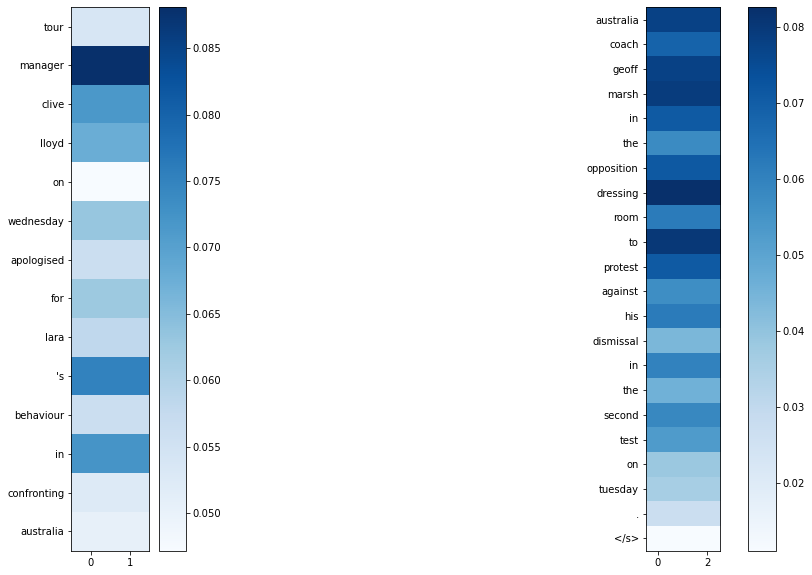

In [33]:
import matplotlib.pylab as plt
import matplotlib as mpl
w_list=[words_set[w] for w in seq_test]
w_list.append('</s>')
check_word_idx=14
print(w_list[check_word_idx-1])

matrix_left = Rh_Left[:check_word_idx].sum(axis=1)
matrix_l=np.zeros((matrix_left.shape[0],2))
for i in range(matrix_left.shape[0]):
    for j in range(2):
        matrix_l[i,j]=matrix_left[i]

matrix_right = Rh_Right[:-check_word_idx+1].sum(axis=1)[::-1]
matrix_r=np.zeros((matrix_right.shape[0],3))
for i in range(matrix_right.shape[0]):
    for j in range(3):
        matrix_r[i][j]=matrix_right[i]

# show the generated tag of each word contributes to the predicted tag for the targed word (here is 'australia')
# the left figure shows the relevance scores for each word in forward states
# the right figure shows the relevance scores for each word in backward states
fig,(ax, ax2)=plt.subplots(ncols=2, figsize=(15,10), gridspec_kw={"width_ratios":[1,3]})
ax.set_yticks(np.arange(len(matrix_left)))
ax.set_yticklabels(w_list[:check_word_idx])
im1=ax.imshow(matrix_l, cmap=plt.cm.Blues)
fig.colorbar(im1, ax=ax)

ax2.set_yticks(np.arange(len(matrix_right)))
ax2.set_yticklabels(w_list[check_word_idx-1:])
im2=ax2.imshow(matrix_r, cmap=plt.cm.Blues)
fig.colorbar(im2, ax=ax2)
plt.show()

34 ['tour', 'manager', 'clive', 'lloyd', 'on', 'wednesday', 'apologised', 'for', 'lara', "'s", 'behaviour', 'in', 'confronting', 'australia', 'coach', 'geoff', 'marsh', 'in', 'the', 'opposition', 'dressing', 'room', 'to', 'protest', 'against', 'his', 'dismissal', 'in', 'the', 'second', 'test', 'on', 'tuesday', '.']


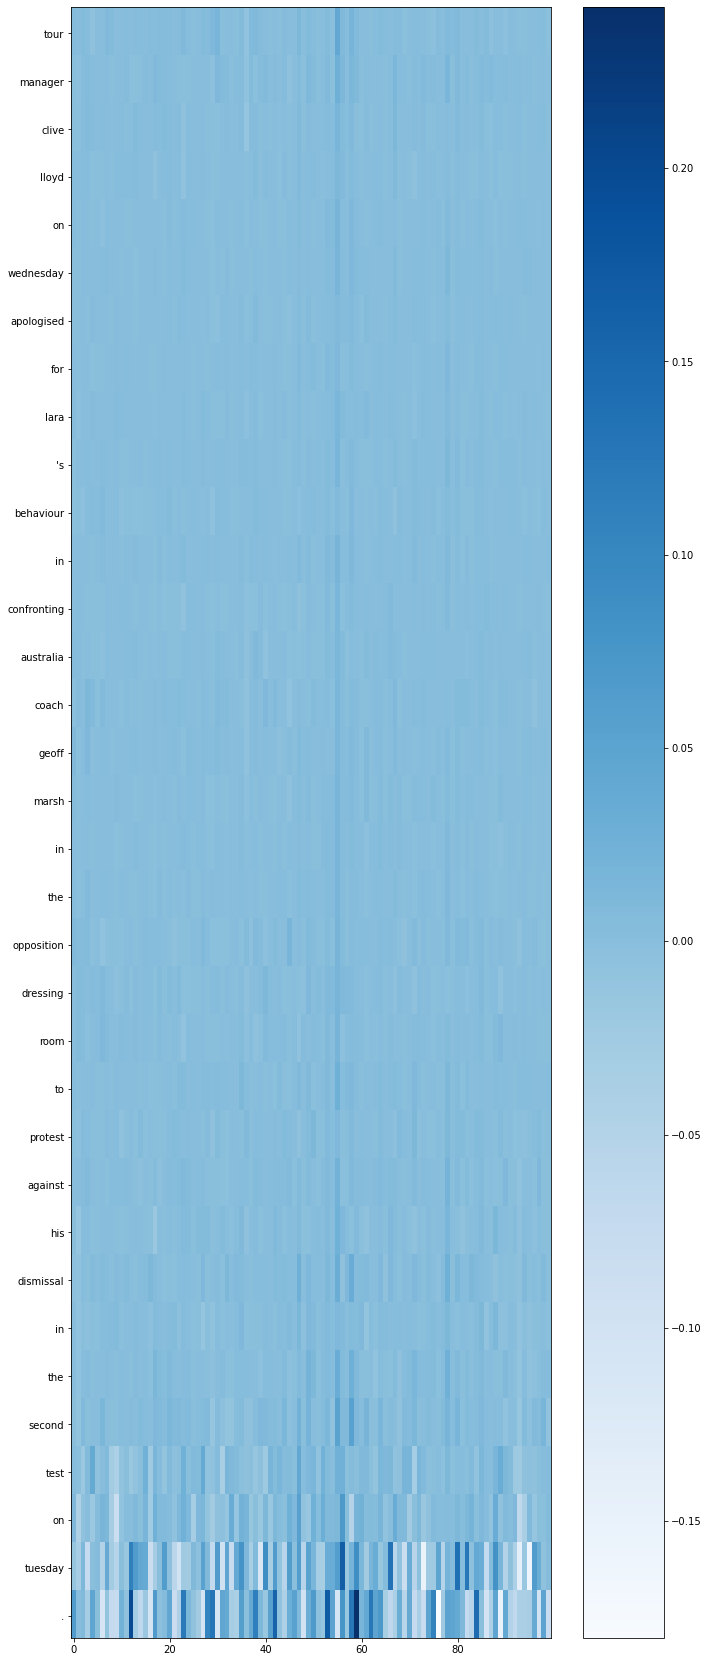

In [34]:
# Show the contribution from each dimension of word vectors to the last hidden state
matrix=Rx[:]+Rx_rev[:]
matrix_magnify_left=np.zeros((matrix.shape[0]*10,matrix.shape[1]))
matrix_magnify=np.zeros((matrix.shape[0]*10,matrix.shape[1]))        
for i in range(matrix.shape[0]):
    for j in range(10):
        matrix_magnify[i*10+j,:]=matrix[i,:]
        
fig = plt.figure()
fig.set_size_inches(25,30)
ax = fig.add_subplot(1,2,1)
ax.set_yticks(np.arange(5, len(matrix_magnify)*1, 10))
print(len(w_list[:-1]),w_list[:-1])
ax.set_yticklabels(w_list[:-1])
plt.imshow(matrix_magnify, interpolation='Nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

clive


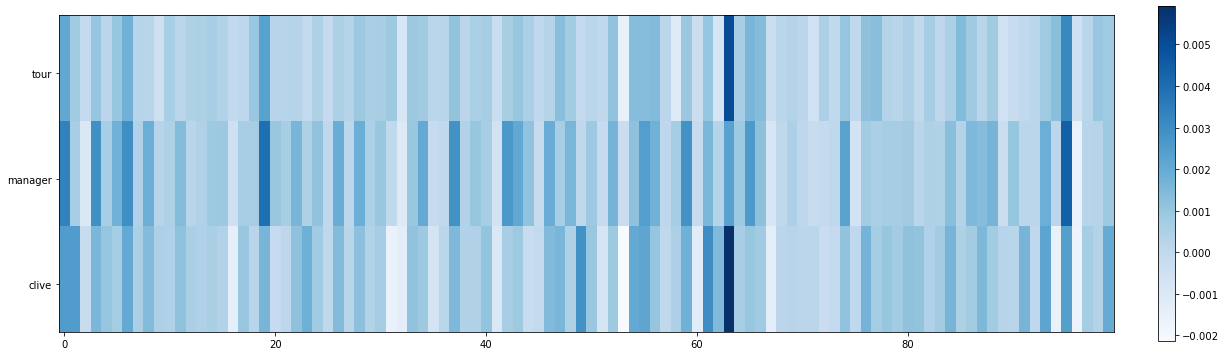

In [35]:
check_word_idx=3
print(w_list[check_word_idx-1])
# fig for left side
matrix_left = Rh_Left[:check_word_idx]#.sum(axis=1)
matrix_l=np.zeros((matrix_left.shape[0]*10,matrix_left.shape[1]))
for i in range(matrix_left.shape[0]):
    for j in range(10):
        matrix_l[i*10+j,:]=matrix_left[i,:]

fig,ax=plt.subplots()
#im=ax.imshow(matrix_l)
#fig.set_size_inches(10,5)
ax.set_yticks(np.arange(5, len(matrix_left)*10, 10))
ax.set_yticklabels(w_list[:check_word_idx])
fig.set_size_inches(20,20)
plt.imshow(matrix_l, interpolation='Nearest', cmap=plt.cm.Blues)
plt.colorbar(fraction=0.015, pad=0.04)
plt.show()

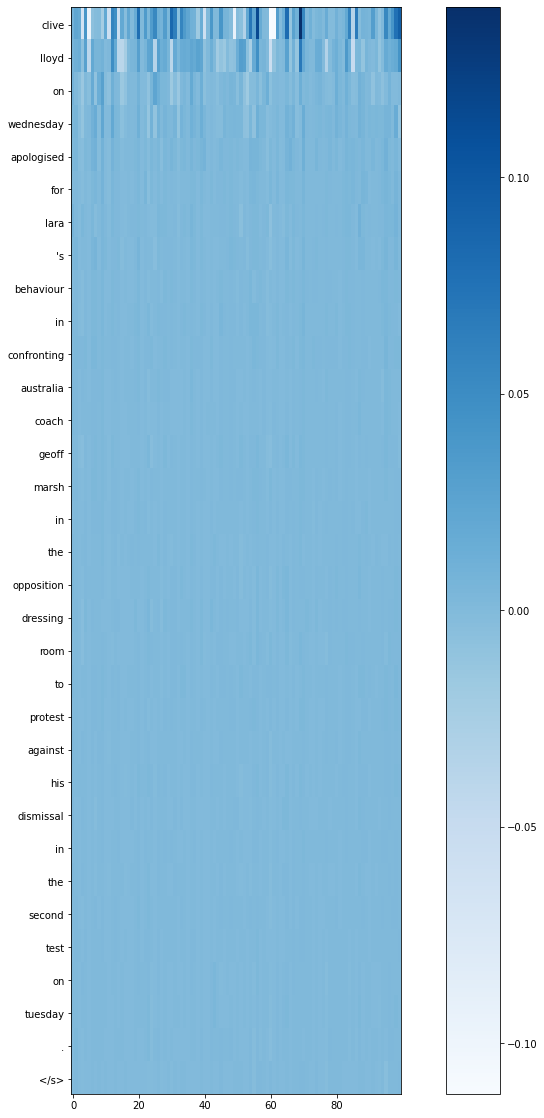

69

In [36]:
# figure for right side
matrix_right = Rh_Right[:-check_word_idx+1][::-1]#.sum(axis=1)[::-1]
matrix_r=np.zeros((matrix_right.shape[0]*10,matrix_right.shape[1]))
for i in range(matrix_right.shape[0]):
    for j in range(10):
        matrix_r[i*10+j:]=matrix_right[i,:]
fig,ax=plt.subplots()
ax.set_yticks(np.arange(5, len(matrix_right)*10, 10))
ax.set_yticklabels(w_list[check_word_idx-1:])
fig.set_size_inches(20,20)
plt.imshow(matrix_r, interpolation='Nearest', cmap=plt.cm.Blues)
plt.colorbar(fraction=0.15, pad=0.04)
plt.show()
np.argmax(matrix_right[0])

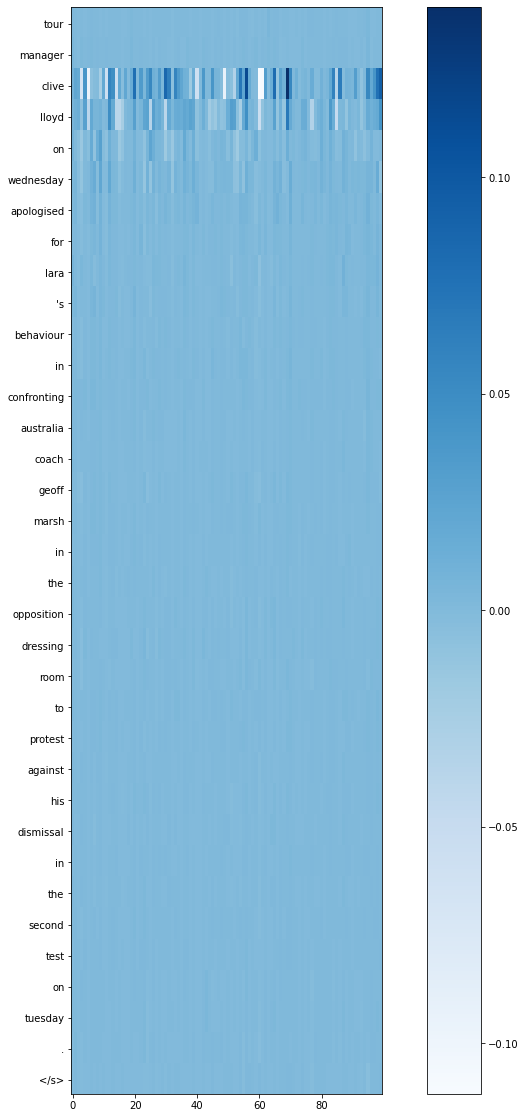

In [37]:
matrix_word = np.concatenate((matrix_left[:-1], matrix_right), axis=0)
matrix_w=np.zeros((matrix_word.shape[0]*10,matrix_word.shape[1]))
for i in range(matrix_word.shape[0]):
    for j in range(10):
        matrix_w[i*10+j:]=matrix_word[i,:]
fig,ax=plt.subplots()
ax.set_yticks(np.arange(5, len(matrix_word)*10, 10))
ax.set_yticklabels(w_list)
fig.set_size_inches(20,20)
plt.imshow(matrix_w, interpolation='Nearest', cmap=plt.cm.Blues)
plt.colorbar(fraction=0.15, pad=0.04)
plt.show()

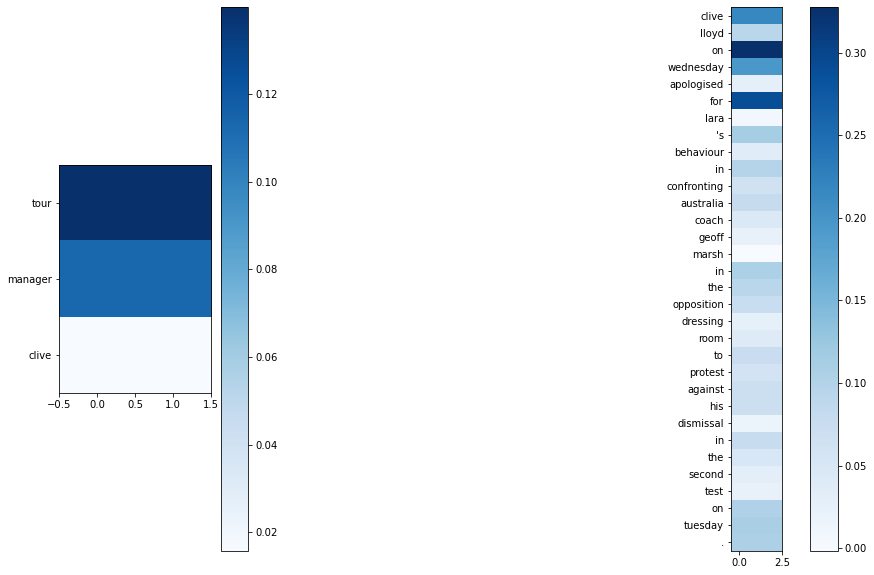

In [38]:
matrix_left = Rx[:check_word_idx].sum(axis=1)
matrix_l=np.zeros((matrix_left.shape[0],2))
for i in range(matrix_left.shape[0]):
    for j in range(2):
        matrix_l[i,j]=matrix_left[i]

matrix_right = Rx_rev[:-check_word_idx+1].sum(axis=1)[::-1]
matrix_r=np.zeros((matrix_right.shape[0],3))
for i in range(matrix_right.shape[0]):
    for j in range(3):
        matrix_r[i][j]=matrix_right[i]

fig,(ax, ax2)=plt.subplots(ncols=2, figsize=(15,10), gridspec_kw={"width_ratios":[1,3]})
ax.set_yticks(np.arange(len(matrix_left)))
ax.set_yticklabels(w_list[:check_word_idx])
im1=ax.imshow(matrix_l, cmap=plt.cm.Blues)
fig.colorbar(im1, ax=ax)

ax2.set_yticks(np.arange(len(matrix_right)))
ax2.set_yticklabels(w_list[check_word_idx-1:-1])
im2=ax2.imshow(matrix_r, cmap=plt.cm.Blues)
fig.colorbar(im2, ax=ax2)
plt.show()

### Teste de Predição

In [43]:
# randomly choose an example sentence to check the prediction of the model
exp=307
p = model_no_crf.predict(np.array([X_te[exp]]))
p = np.argmax(p, axis=-1)
print('prediction: ')
print(p[0])

test_true = np.argmax(y_te[exp], -1)
print('true results:')
print(test_true)

seq_len=0
print("{:15} ({:5}): {:5}".format("Word", "True", "pred"))
for w, t, pred in zip(X_te[exp], test_true, p[0]):
    if w != 0:
        seq_len += 1
        print("{:15}: {:5} {:5}".format(words_set[w], tags_set[t], tags_set[pred]))

prediction: 
[5 5 8 0 5 5 5 5 8 5 5 5 5 3 5 8 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5]
true results:
[5 5 8 0 5 5 5 5 8 5 5 5 5 3 5 8 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5]
Word            (True ): pred 
tour           : O     O    
manager        : O     O    
clive          : B-PER B-PER
lloyd          : I-PER I-PER
on             : O     O    
wednesday      : O     O    
apologised     : O     O    
for            : O     O    
lara           : B-PER B-PER
's             : O     O    
behaviour      : O     O    
in             : O     O    
confronting    : O     O    
australia      : B-LOC B-LOC
coach          : O     O    
geoff          : B-PER B-PER
marsh          : I-PER I-PER
in             : O     O    
the            : O     O    
opposition     : O     O    
dressing       : O     O    
room           : O     O 

In [44]:
# randomly choose an example sentence to check the prediction of the model
exp=310
p = model_no_crf.predict(np.array([X_te[exp]]))
p = np.argmax(p, axis=-1)
print('prediction: ')
print(p[0])

test_true = np.argmax(y_te[exp], -1)
print('true results:')
print(test_true)

seq_len=0
print("{:15} ({:5}): {:5}".format("Word", "True", "pred"))
for w, t, pred in zip(X_te[exp], test_true, p[0]):
    if w != 0:
        seq_len += 1
        print("{:15}: {:5} {:5}".format(words_set[w], tags_set[t], tags_set[pred]))

prediction: 
[3 5 5 5 5 5 5 5 5 3 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 8 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5]
true results:
[3 5 5 5 5 5 5 5 5 3 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 8 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5]
Word            (True ): pred 
australia      : B-LOC B-LOC
went           : O     O    
on             : O     O    
to             : O     O    
win            : O     O    
the            : O     O    
match          : O     O    
at             : O     O    
the            : O     O    
sydney         : B-LOC B-LOC
cricket        : I-LOC I-LOC
ground         : I-LOC O    
by             : O     O    
124            : O     O    
runs           : O     O    
to             : O     O    
take           : O     O    
a              : O     O    
two-nil        : O     O    
lead           : O     O    
in             : O     O    
the            : O     O 

### Matriz de Confusão

In [45]:
true_list = []
for tag_lista in test_cnoll_name_tag:
    true_list += tag_lista
len(true_list)

46665

In [46]:
pred_list = []
true_list = []

for i, test_sent in enumerate(X_te):
    p = model_no_crf.predict(np.array([test_sent]))
    p = np.argmax(p, axis=-1)
    
    test_true = np.argmax(y_te[i], -1)
    
    seq_len = 0
    for w, t, pred in zip(test_sent, test_true, p[0]):
        if w != 0:
            seq_len += 1
            pred_list.append(tags_set[pred])
            true_list.append(tags_set[t])
            #print("{:15}: {:5} {:5}".format(words_set[w], tags_set[t], tags_set[pred]))

In [47]:
Intervalo_min = 300
intervalo_max = 330
print(pred_list[Intervalo_min:intervalo_max])
print(true_list[Intervalo_min:intervalo_max])

['O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'B-PER', 'I-PER', 'O']
['O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'B-PER', 'I-PER', 'O']


In [48]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True,
                          fig_size= (12, 10)):
    """
    given a sklearn confusion matrix (cm), make a nice plot
    Args:
        cm: confusion matrix from sklearn.metrics.confusion_matrix

        target_names: given classification classes such as [0, 1, 2]
                      the class names, for example: ['high', 'medium', 'low']

        title: the text to display at the top of the matrix

        cmap: the gradient of the values displayed from matplotlib.pyplot.cm
                      see http://matplotlib.org/examples/color/colormaps_reference.html
                      plt.get_cmap('jet') or plt.cm.Blues

        normalize: If False, plot the raw numbers
                   If True, plot the proportions
        fig_size: tuple with the size of the plot
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(fig_size[0], fig_size[1]))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.show()

In [49]:
classes = list(set(true_list))
classes

['B-ORG', 'I-PER', 'B-LOC', 'I-ORG', 'B-MISC', 'O', 'B-PER', 'I-MISC', 'I-LOC']

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_list, pred_list, labels=classes, normalize='true')

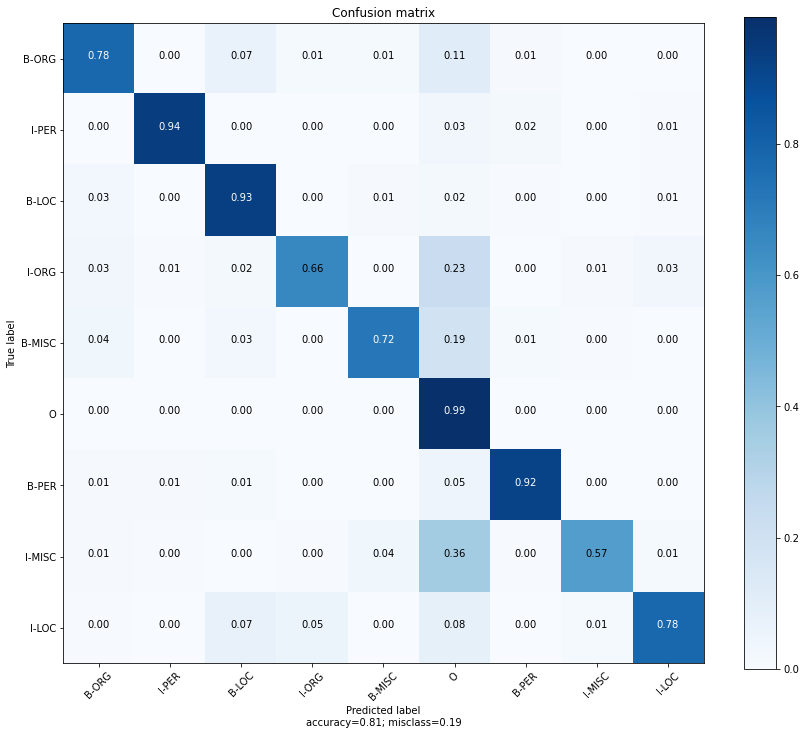

In [51]:
plot_confusion_matrix(cm, classes)

### Arquivos do Teste da Explicabilidade

In [52]:
import json

In [91]:
data_json1_file = '../jupyter/data.json'
data_json1 = open(data_json1_file)
data1 = json.load(data_json1)
data_json1.close()
print(len(data1['sentences']))
data1

200


{'labels': [{'name': 'B-LOC',
   'description': 'Prineiro nome de uma localidade'},
  {'name': 'B-ORG', 'description': 'Prineiro nome de uma organização'},
  {'name': 'B-PER', 'description': 'Prineiro nome de uma pessoa'},
  {'name': 'I-LOC', 'description': 'Segundo nome de uma localidade'},
  {'name': 'I-ORG', 'description': 'Segundo nome de uma organização'},
  {'name': 'I-PER', 'description': 'Segundo nome de uma pessoa'}],
 'sentences': [[{'id': 10650,
    'sentence': ['(',
     'australia',
     ')',
     ',',
     'mark',
     'roe',
     ',',
     'emanuele',
     'canonica',
     '(',
     'italy',
     ')'],
    'idxAlvo': 1,
    'predictClass': 'B-LOC'}],
  [{'id': 18497,
    'sentence': ['golden', 'state', '6', '13', '.316', '8', '1/2'],
    'idxAlvo': 0,
    'predictClass': 'B-ORG'}],
  [{'id': 8671,
    'sentence': ['soccer',
     '-',
     'thomson',
     'resigns',
     'as',
     'manager',
     'of',
     'raith',
     'rovers',
     '.'],
    'idxAlvo': 2,
    'predic

In [92]:
data_json2_file = '../jupyter/data2.json'
data_json2 = open(data_json2_file)
data2 = json.load(data_json2)
data_json2.close()
print(len(data2['sentences']))
data2

200


{'labels': [{'name': 'B-LOC',
   'description': 'Prineiro nome de uma localidade'},
  {'name': 'B-ORG', 'description': 'Prineiro nome de uma organização'},
  {'name': 'B-PER', 'description': 'Prineiro nome de uma pessoa'},
  {'name': 'I-LOC', 'description': 'Segundo nome de uma localidade'},
  {'name': 'I-ORG', 'description': 'Segundo nome de uma organização'},
  {'name': 'I-PER', 'description': 'Segundo nome de uma pessoa'}],
 'sentences': [[{'id': 10633,
    'sentence': ['2.', 'brian', 'bronson', '(', 'u.s.', ')', '49.67'],
    'idxAlvo': 4,
    'predictClass': 'B-LOC'}],
  [{'id': 178,
    'sentence': ['palestinian',
     'officials',
     'said',
     'the',
     'israeli',
     'government',
     'had',
     'barred',
     'arafat',
     'from',
     'overflying',
     'israel',
     'in',
     'a',
     'palestinian',
     'helicopter',
     'to',
     'the',
     'west',
     'bank',
     'in',
     'an',
     'attempt',
     'to',
     'bar',
     'the',
     'meeting',
     'w

# Oclusão

In [136]:
exp = 307
test_sent = X_te[exp]
p0 = model_no_crf.predict(np.array([test_sent]))
end_sent = np.where(test_sent == 0)[0][0]
pred_matrix = p0[0][:end_sent]

In [137]:
p = np.argmax(p0, axis=-1)
print('Prediction: ')
print(len(p[0][:end_sent]), p[0][:end_sent])

test_true = np.argmax(y_te[exp], -1)
print('True results:')
print(len(test_true[:end_sent]), test_true[:end_sent])

seq_len=0
print()
print("{:2}  {:15}| {:6}  -  {:6}".format("", "Word", "True", "Pred"))
for w, t, pred in zip(X_te[exp], test_true, p[0]):
    if w != 0:
        seq_len += 1
        print("{:2}- {:15}| {:6}  -  {:6}".format(seq_len-1, words_set[w], tags_set[t], tags_set[pred]))

Prediction: 
34 [5 5 8 0 5 5 5 5 8 5 5 5 5 3 5 8 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
True results:
34 [5 5 8 0 5 5 5 5 8 5 5 5 5 3 5 8 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]

    Word           | True    -  Pred  
 0- tour           | O       -  O     
 1- manager        | O       -  O     
 2- clive          | B-PER   -  B-PER 
 3- lloyd          | I-PER   -  I-PER 
 4- on             | O       -  O     
 5- wednesday      | O       -  O     
 6- apologised     | O       -  O     
 7- for            | O       -  O     
 8- lara           | B-PER   -  B-PER 
 9- 's             | O       -  O     
10- behaviour      | O       -  O     
11- in             | O       -  O     
12- confronting    | O       -  O     
13- australia      | B-LOC   -  B-LOC 
14- coach          | O       -  O     
15- geoff          | B-PER   -  B-PER 
16- marsh          | I-PER   -  I-PER 
17- in             | O       -  O     
18- the            | O       -  O     
19- opposition     | O       -  O     
20- dre

In [138]:
tags_set

['I-PER', 'I-MISC', 'I-LOC', 'B-LOC', 'I-ORG', 'O', 'B-ORG', 'B-MISC', 'B-PER']

In [139]:
idxAlvo = 2
idxTag = 8

print("Predition Shape:", pred_matrix.shape, "\n")
print("Alvo")
print("{:4}: {:15}".format('Word', words_set[X_te[exp][idxAlvo]]))
print("{:4}: {:5}".format('Tag', tags_set[idxTag]))

Predition Shape: (34, 9) 

Alvo
Word: clive          
Tag : B-PER


In [140]:
def oclusion (sentence, trained_model):
    ocl_scores = []
    tam = len(sentence)
    tam_tag = len(trained_model.get_weights())
    for i in range(tam):
        ocl_scores_matrix = []
        copy_sent = sentence.copy()
        temp_sent = np.delete(copy_sent, i)
        temp_sent = np.append(temp_sent, [0])
        ocl_lstm_scores = trained_model.predict(np.array([temp_sent]))[0]
        for j in range(tam):
            if j < i:
                ocl_scores_matrix.append(ocl_lstm_scores[j].tolist())
            elif j > i:
                ocl_scores_matrix.append(ocl_lstm_scores[j-1].tolist())
            else:
                zeros = np.zeros(tam_tag).tolist()
                ocl_scores_matrix.append(zeros)
        ocl_scores.append(ocl_scores_matrix)
    #ocl_scores = torch.FloatTensor(ocl_scores)
    return np.asarray(ocl_scores)

In [141]:
ocl_scores = oclusion (test_sent, model_no_crf)
ocl_scores.shape

(75, 75, 9)

In [142]:
ocl_matrix = []
for i in range(end_sent):
    olc_sub_matrix = []
    for j in range(end_sent):
        olc_sub_matrix.append(ocl_scores[i][j])
    ocl_matrix.append(olc_sub_matrix)
ocl_matrix = np.asarray(ocl_matrix)
ocl_matrix.shape

(34, 34, 9)

In [143]:
delta_scores = pred_matrix-ocl_matrix[idxAlvo]
scr_list = torch.from_numpy(delta_scores.T[idxTag])
scr_list

tensor([-1.2451e-04, -6.5435e-03,  9.9302e-01, -7.9956e-01, -7.8682e-06,
         9.0404e-04, -2.6574e-04,  2.4381e-04, -3.4004e-04,  3.8638e-06,
         1.5539e-06,  6.4526e-08,  4.9279e-05,  2.1177e-07,  1.6823e-06,
        -8.1062e-06,  4.1153e-08,  1.7984e-09,  1.5457e-08,  1.4891e-06,
         4.6426e-05,  8.3903e-07,  4.9076e-09,  6.2532e-09,  2.2765e-08,
         2.3283e-07,  2.5774e-07,  1.8736e-10,  3.3333e-10,  7.1941e-10,
         4.5984e-09,  2.3169e-10,  1.6080e-09,  1.7171e-09],
       dtype=torch.float64)

In [144]:
sorted_scr_list = torch.sort(scr_list.abs(), descending =True)
sorted_scr_list

torch.return_types.sort(
values=tensor([9.9302e-01, 7.9956e-01, 6.5435e-03, 9.0404e-04, 3.4004e-04, 2.6574e-04,
        2.4381e-04, 1.2451e-04, 4.9279e-05, 4.6426e-05, 8.1062e-06, 7.8682e-06,
        3.8638e-06, 1.6823e-06, 1.5539e-06, 1.4891e-06, 8.3903e-07, 2.5774e-07,
        2.3283e-07, 2.1177e-07, 6.4526e-08, 4.1153e-08, 2.2765e-08, 1.5457e-08,
        6.2532e-09, 4.9076e-09, 4.5984e-09, 1.7984e-09, 1.7171e-09, 1.6080e-09,
        7.1941e-10, 3.3333e-10, 2.3169e-10, 1.8736e-10], dtype=torch.float64),
indices=tensor([ 2,  3,  1,  5,  8,  6,  7,  0, 12, 20, 15,  4,  9, 14, 10, 19, 21, 26,
        25, 13, 11, 16, 24, 18, 23, 22, 30, 17, 33, 32, 29, 28, 31, 27]))

In [145]:
print("Alvo")
print("{:4}: {:15}".format('Word', words_set[X_te[exp][idxAlvo]]))
print("{:4}: {:5}".format('Tag', tags_set[idxTag]))
print()
print("  {:18}|  {:18}".format("Sentence", "Ranked Relecance "))
for i, idx in enumerate(sorted_scr_list.indices):
    print("{:2}- {:15} | {:2}- {:15}".format(i+1, words_set[X_te[exp][i]], i+1, words_set[X_te[exp][idx]]))

Alvo
Word: clive          
Tag : B-PER

  Sentence          |  Ranked Relecance  
 1- tour            |  1- clive          
 2- manager         |  2- lloyd          
 3- clive           |  3- manager        
 4- lloyd           |  4- wednesday      
 5- on              |  5- lara           
 6- wednesday       |  6- apologised     
 7- apologised      |  7- for            
 8- for             |  8- tour           
 9- lara            |  9- confronting    
10- 's              | 10- dressing       
11- behaviour       | 11- geoff          
12- in              | 12- on             
13- confronting     | 13- 's             
14- australia       | 14- coach          
15- coach           | 15- behaviour      
16- geoff           | 16- opposition     
17- marsh           | 17- room           
18- in              | 18- dismissal      
19- the             | 19- his            
20- opposition      | 20- australia      
21- dressing        | 21- in             
22- room            | 22- marsh     

In [146]:
from ocl_cal5 import oclusion

In [147]:
word_idx_target = idxAlvo
tag_target = tags_set[idxTag]

print("Predition Shape:", pred_matrix.shape, "\n")
print("Alvo")
print("{:4}: {:15}".format('Word', words_set[X_te[exp][word_idx_target]]))
print("{:4}: {:5}".format('Tag', tag_target))

Predition Shape: (34, 9) 

Alvo
Word: clive          
Tag : B-PER


In [148]:
sorted_scr_list2 = oclusion (test_sent, tags_set, word_idx_target, tag_target, model_no_crf)

In [149]:
print("Alvo")
print("{:4}: {:15}".format('Word', words_set[X_te[exp][word_idx_target]]))
print("{:4}: {:5}".format('Tag', tag_target))
print()
print("  {:18}|  {:18}".format("Sentence", "Ranked Relecance "))
for i, idx in enumerate(sorted_scr_list2.indices):
    print("{:2}- {:15} | {:2}- {:15}".format(i+1, words_set[X_te[exp][i]], i+1, words_set[X_te[exp][idx]]))

Alvo
Word: clive          
Tag : B-PER

  Sentence          |  Ranked Relecance  
 1- tour            |  1- clive          
 2- manager         |  2- lloyd          
 3- clive           |  3- manager        
 4- lloyd           |  4- wednesday      
 5- on              |  5- lara           
 6- wednesday       |  6- apologised     
 7- apologised      |  7- for            
 8- for             |  8- tour           
 9- lara            |  9- confronting    
10- 's              | 10- dressing       
11- behaviour       | 11- geoff          
12- in              | 12- on             
13- confronting     | 13- 's             
14- australia       | 14- coach          
15- coach           | 15- behaviour      
16- geoff           | 16- opposition     
17- marsh           | 17- room           
18- in              | 18- dismissal      
19- the             | 19- his            
20- opposition      | 20- australia      
21- dressing        | 21- in             
22- room            | 22- marsh     

### Ocl Dados

In [64]:
trained_model = model_no_crf

In [65]:
ranked_list = {}
for sent in range(len(data1['sentences'])):
    idxSent      = data1['sentences'][sent][0]['id']
    sentence     = data1['sentences'][sent][0]['sentence']
    tam_sent     = len(sentence)
    idxAlvo      = data1['sentences'][sent][0]['idxAlvo']
    predictClass = data1['sentences'][sent][0]['predictClass']
    idxTag       = tag2idx[predictClass]
    
    if not('' in sentence):
        temp_sent    = np.zeros(75)
        for i, w in enumerate(sentence):
            temp_sent[i] = word2idx[w]
        scores          = trained_model.predict(np.array([temp_sent]))[0]
        pred_matrix     = scores[:tam_sent]
        ocl_scores      = oclusion(temp_sent, trained_model)
            
        ocl_matrix = []
        for i in range(tam_sent):
            olc_sub_matrix = []
            for j in range(tam_sent):
                olc_sub_matrix.append(ocl_scores[i][j])
            ocl_matrix.append(olc_sub_matrix)
        ocl_matrix = np.asarray(ocl_matrix)
        ocl_matrix.shape
    
        delta_scores    = pred_matrix-ocl_matrix[idxAlvo]
        scr_list        = torch.from_numpy(delta_scores.T[idxTag])
        sorted_scr_list = torch.sort(scr_list.abs(), descending =True)
        
        relevances = []
        for w in sorted_scr_list[1]:
            relevances.append(sentence[w])
        rel_dict = {'sentence': sentence,
                    'target': sentence[idxAlvo],
                    'class': predictClass,
                    'relevance_ranked': relevances,
                    'ranked_idx': sorted_scr_list[1].tolist()}
        
        ranked_list.update({idxSent: rel_dict})

y = json.dumps(ranked_list)
len(ranked_list)

180

In [66]:
jsonFile = open("ocl_ranked1.json", "w")
jsonFile.write(y)
jsonFile.close()

In [93]:
ranked_list = {}
for sent in range(len(data2['sentences'])):
    idxSent      = data2['sentences'][sent][0]['id']
    sentence     = data2['sentences'][sent][0]['sentence']
    tam_sent     = len(sentence)
    idxAlvo      = data2['sentences'][sent][0]['idxAlvo']
    predictClass = data2['sentences'][sent][0]['predictClass']
    idxTag       = tag2idx[predictClass]
    
    if not('' in sentence):
        temp_sent    = np.zeros(75)
        for i, w in enumerate(sentence):
            temp_sent[i] = word2idx[w]
        scores          = trained_model.predict(np.array([temp_sent]))[0]
        pred_matrix     = scores[:tam_sent]
        ocl_scores      = oclusion(temp_sent, trained_model)
            
        ocl_matrix = []
        for i in range(tam_sent):
            olc_sub_matrix = []
            for j in range(tam_sent):
                olc_sub_matrix.append(ocl_scores[i][j])
            ocl_matrix.append(olc_sub_matrix)
        ocl_matrix = np.asarray(ocl_matrix)
        ocl_matrix.shape
    
        delta_scores    = pred_matrix-ocl_matrix[idxAlvo]
        scr_list        = torch.from_numpy(delta_scores.T[idxTag])
        sorted_scr_list = torch.sort(scr_list.abs(), descending =True)
        
        relevances = []
        for w in sorted_scr_list[1]:
            relevances.append(sentence[w])
        rel_dict = {'sentence': sentence,
                    'target': sentence[idxAlvo],
                    'class': predictClass,
                    'relevance_ranked': relevances,
                    'ranked_idx': sorted_scr_list[1].tolist()}
        
        ranked_list.update({idxSent: rel_dict})

y2 = json.dumps(ranked_list)
len(ranked_list)

185

In [94]:
jsonFile = open("ocl_ranked2.json", "w")
jsonFile.write(y2)
jsonFile.close()

# SA

In [69]:
exp = 307
test_sent = X_te[exp]
p0 = model_no_crf.predict(np.array([test_sent]))
end_sent = np.where(test_sent == 0)[0][0]
pred_matrix = p0[0][:end_sent]

In [70]:
p = np.argmax(p0, axis=-1)
print('Prediction: ')
print(len(p[0][:end_sent]), p[0][:end_sent])

test_true = np.argmax(y_te[exp], -1)
print('True results:')
print(len(test_true[:end_sent]), test_true[:end_sent])

seq_len=0
print()
print("{:2}  {:15}| {:6}  -  {:6}".format("", "Word", "True", "Pred"))
for w, t, pred in zip(X_te[exp], test_true, p[0]):
    if w != 0:
        seq_len += 1
        print("{:2}- {:15}| {:6}  -  {:6}".format(seq_len-1, words_set[w], tags_set[t], tags_set[pred]))

Prediction: 
34 [5 5 8 0 5 5 5 5 8 5 5 5 5 3 5 8 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
True results:
34 [5 5 8 0 5 5 5 5 8 5 5 5 5 3 5 8 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]

    Word           | True    -  Pred  
 0- tour           | O       -  O     
 1- manager        | O       -  O     
 2- clive          | B-PER   -  B-PER 
 3- lloyd          | I-PER   -  I-PER 
 4- on             | O       -  O     
 5- wednesday      | O       -  O     
 6- apologised     | O       -  O     
 7- for            | O       -  O     
 8- lara           | B-PER   -  B-PER 
 9- 's             | O       -  O     
10- behaviour      | O       -  O     
11- in             | O       -  O     
12- confronting    | O       -  O     
13- australia      | B-LOC   -  B-LOC 
14- coach          | O       -  O     
15- geoff          | B-PER   -  B-PER 
16- marsh          | I-PER   -  I-PER 
17- in             | O       -  O     
18- the            | O       -  O     
19- opposition     | O       -  O     
20- dre

In [71]:
tags_set

['I-PER', 'I-MISC', 'I-LOC', 'B-LOC', 'I-ORG', 'O', 'B-ORG', 'B-MISC', 'B-PER']

In [72]:
idxAlvo = 2
idxTag = 8

print("Predition Shape:", pred_matrix.shape, "\n")
print("Alvo")
print("{:4}: {:15}".format('Word', words_set[X_te[exp][idxAlvo]]))
print("{:4}: {:5}".format('Tag', tags_set[idxTag]))

Predition Shape: (34, 9) 

Alvo
Word: clive          
Tag : B-PER


In [73]:
def neighborhoodZero (sentence, trained_model):
    zn_scores = []
    tam = len(sentence)
    tam_tag = len(trained_model.get_weights())
    for i in range(tam):
        zn_scores_matrix = []
        copy_sent = sentence.copy()
        temp_sent = copy_sent
        temp_sent[i] = 0
        zn_lstm_scores = trained_model.predict(np.array([temp_sent]))[0]
        for j in range(tam):
            if j < i:
                zn_scores_matrix.append(zn_lstm_scores[j].tolist())
            elif j > i:
                zn_scores_matrix.append(zn_lstm_scores[j-1].tolist())
            else:
                zeros = np.zeros(tam_tag).tolist()
                zn_scores_matrix.append(zeros)
        zn_scores.append(zn_scores_matrix)
    return np.asarray(zn_scores)

In [74]:
zn_scores = neighborhoodZero (test_sent, model_no_crf)
zn_scores.shape

(75, 75, 9)

In [75]:
zn_matrix = []
for i in range(end_sent):
    zn_sub_matrix = []
    for j in range(end_sent):
        zn_sub_matrix.append(zn_scores[i][j])
    zn_matrix.append(zn_sub_matrix)
zn_matrix = np.asarray(zn_matrix)
zn_matrix.shape

(34, 34, 9)

In [76]:
delta_scores = pred_matrix-zn_matrix[idxAlvo]
scr_list = torch.from_numpy(delta_scores.T[idxTag])
scr_list

tensor([-2.6004e-03, -4.8379e-05,  9.9302e-01, -6.5019e-01, -3.5384e-02,
         1.6021e-03,  7.8343e-03, -6.6959e-03,  9.8732e-01, -9.8875e-01,
        -3.1365e-05, -2.0775e-05,  1.0905e-03, -1.0176e-03,  1.0322e-04,
         9.9318e-01, -9.9287e-01, -4.4129e-04,  2.3189e-06,  5.2570e-04,
         2.3787e-02, -2.3991e-02, -2.8819e-04,  2.6422e-06,  1.6663e-05,
         3.7220e-04,  4.0898e-04, -8.0161e-04,  1.8332e-06,  6.1231e-06,
         3.8325e-05, -4.4291e-05,  9.5800e-05, -2.0289e-05],
       dtype=torch.float64)

In [77]:
sorted_scr_list = torch.sort(scr_list.abs(), descending =True)
sorted_scr_list

torch.return_types.sort(
values=tensor([9.9318e-01, 9.9302e-01, 9.9287e-01, 9.8875e-01, 9.8732e-01, 6.5019e-01,
        3.5384e-02, 2.3991e-02, 2.3787e-02, 7.8343e-03, 6.6959e-03, 2.6004e-03,
        1.6021e-03, 1.0905e-03, 1.0176e-03, 8.0161e-04, 5.2570e-04, 4.4129e-04,
        4.0898e-04, 3.7220e-04, 2.8819e-04, 1.0322e-04, 9.5800e-05, 4.8379e-05,
        4.4291e-05, 3.8325e-05, 3.1365e-05, 2.0775e-05, 2.0289e-05, 1.6663e-05,
        6.1231e-06, 2.6422e-06, 2.3189e-06, 1.8332e-06], dtype=torch.float64),
indices=tensor([15,  2, 16,  9,  8,  3,  4, 21, 20,  6,  7,  0,  5, 12, 13, 27, 19, 17,
        26, 25, 22, 14, 32,  1, 31, 30, 10, 11, 33, 24, 29, 23, 18, 28]))

In [78]:
print("Alvo")
print("{:4}: {:15}".format('Word', words_set[X_te[exp][idxAlvo]]))
print("{:4}: {:5}".format('Tag', tags_set[idxTag]))
print()
print("  {:18}|  {:18}".format("Sentence", "Ranked Relecance "))
for i, idx in enumerate(sorted_scr_list.indices):
    print("{:2}- {:15} | {:2}- {:15}".format(i+1, words_set[X_te[exp][i]], i+1, words_set[X_te[exp][idx]]))

Alvo
Word: clive          
Tag : B-PER

  Sentence          |  Ranked Relecance  
 1- tour            |  1- geoff          
 2- manager         |  2- clive          
 3- clive           |  3- marsh          
 4- lloyd           |  4- 's             
 5- on              |  5- lara           
 6- wednesday       |  6- lloyd          
 7- apologised      |  7- on             
 8- for             |  8- room           
 9- lara            |  9- dressing       
10- 's              | 10- apologised     
11- behaviour       | 11- for            
12- in              | 12- tour           
13- confronting     | 13- wednesday      
14- australia       | 14- confronting    
15- coach           | 15- australia      
16- geoff           | 16- in             
17- marsh           | 17- opposition     
18- in              | 18- in             
19- the             | 19- dismissal      
20- opposition      | 20- his            
21- dressing        | 21- to             
22- room            | 22- coach     

In [79]:
for w in word2idx:
    if word2idx[w] == 1:
        word_zero = w
        break
word_zero

'jackpot'

In [80]:
model_no_crf.get_weights()[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [81]:
temp_test_sent = test_sent.copy()
temp_test_sent[3] = 0
temp_test_sent

array([21570, 18117,  1396,     0, 16748, 13371, 16918,  5545, 23181,
        2429,  9664,  4096, 15670, 14017,  8434,  4484, 17876,  4096,
       21097, 16711,  5303, 21616, 16514,    69, 10475, 13795, 23848,
        4096, 21097,  1098,  3605, 16748, 24052,  4879,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0])

# LRP

In [82]:
exp = 307
test_sent = X_te[exp]
p0 = model_no_crf.predict(np.array([test_sent]))
end_sent = np.where(test_sent == 0)[0][0]
pred_matrix = p0[0][:end_sent]

In [83]:
p = np.argmax(p0, axis=-1)
print('Prediction: ')
print(len(p[0][:end_sent]), p[0][:end_sent])

test_true = np.argmax(y_te[exp], -1)
print('True results:')
print(len(test_true[:end_sent]), test_true[:end_sent])

seq_len=0
print()
print("{:2}  {:15}| {:6}  -  {:6}".format("", "Word", "True", "Pred"))
for w, t, pred in zip(X_te[exp], test_true, p[0]):
    if w != 0:
        seq_len += 1
        print("{:2}- {:15}| {:6}  -  {:6}".format(seq_len-1, words_set[w], tags_set[t], tags_set[pred]))

Prediction: 
34 [5 5 8 0 5 5 5 5 8 5 5 5 5 3 5 8 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
True results:
34 [5 5 8 0 5 5 5 5 8 5 5 5 5 3 5 8 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]

    Word           | True    -  Pred  
 0- tour           | O       -  O     
 1- manager        | O       -  O     
 2- clive          | B-PER   -  B-PER 
 3- lloyd          | I-PER   -  I-PER 
 4- on             | O       -  O     
 5- wednesday      | O       -  O     
 6- apologised     | O       -  O     
 7- for            | O       -  O     
 8- lara           | B-PER   -  B-PER 
 9- 's             | O       -  O     
10- behaviour      | O       -  O     
11- in             | O       -  O     
12- confronting    | O       -  O     
13- australia      | B-LOC   -  B-LOC 
14- coach          | O       -  O     
15- geoff          | B-PER   -  B-PER 
16- marsh          | I-PER   -  I-PER 
17- in             | O       -  O     
18- the            | O       -  O     
19- opposition     | O       -  O     
20- dre

In [84]:
tags_set

['I-PER', 'I-MISC', 'I-LOC', 'B-LOC', 'I-ORG', 'O', 'B-ORG', 'B-MISC', 'B-PER']

In [85]:
def lrp_linear(hin, w, b, hout, Rout, bias_nb_units, eps, bias_factor, debug=False):
    """
    LRP for a linear layer with input dim D and output dim M.
    Args:
    - hin:            forward pass input, of shape (D,)
    - w:              connection weights, of shape (D, M)
    - b:              biases, of shape (M,)
    - hout:           forward pass output, of shape (M,) (unequal to np.dot(w.T,hin)+b if more than one incoming layer!)
    - Rout:           relevance at layer output, of shape (M,)
    - bias_nb_units:  number of lower-layer units onto which the bias/stabilizer contribution is redistributed
    - eps:            stabilizer (small positive number)
    - bias_factor:    for global relevance conservation set to 1.0, otherwise 0.0 to ignore bias redistribution
    Returns:
    - Rin:            relevance at layer input, of shape (D,)
    """
    sign_out = np.where(hout[na,:]>=0, 1., -1.) # shape (1, M)
    numer    = (w * hin[:,na]) + ( (bias_factor*b[na,:]*1. + eps*sign_out*1.) * 1./bias_nb_units ) # shape (D, M)
    denom    = hout[na,:] + (eps*sign_out*1.)   # shape (1, M)
    message  = (numer/denom) * Rout[na,:]       # shape (D, M)
    Rin      = message.sum(axis=1)              # shape (D,)
    
    # Note: local  layer   relevance conservation if bias_factor==1.0 and bias_nb_units==D
    #       global network relevance conservation if bias_factor==1.0 (can be used for sanity check)
    if debug:
        print("local diff: ", Rout.sum() - Rin.sum())
    
    return Rin

In [86]:
def lrp_getWeights (trained_model):
    # get all weights and biases of the model
    weights1 = trained_model.layers[1].get_weights()
    weights2 = trained_model.layers[3].get_weights()
    weights3 = trained_model.layers[4].get_weights()

    # Init phase
    units_num = trained_model.get_weights()[0].shape[1] # lstm units number

    # embedding
    E = trained_model.layers[1].get_weights()[0]# embedding matrix, shape [len(word_dict), word_vec_dim]

    # left encoder
    ''' parameter setting:
    weights from embedding layer to 1st layer left direction lstm cells: weights[0]
    weights from lstem layer to 2st lstm layer: weights[1]
    biases of left encoder of four gates
    weights i -- 0-50, weights f -- 51-100, weights c -- 100-150, weights o -- 150-200
    bias has the same order: i,c,f,o, each length 50
    '''
    Wxh_Left  = weights2[0].T # (100, 400), embedding_size * 4*lstm_units_num
    Whh_Left  = weights2[1].T # (100, 400), lstm_units_num * 4*lstm_units_num
    b_Left    = weights2[2] # (400, ), biases of i, f, c, o gates

    # Right encoder, parameters setting is similar with left encoder
    Wxh_Right = weights2[3].T
    Whh_Right = weights2[4].T
    b_Right   = weights2[5]

    # softmax
    Why_Left  = weights3[0][:units_num].T # weights3[0] 's dimension: (100, 9)
    Why_Right = weights3[0][units_num:].T#[::-1,:].copy()
    hy_biases = weights3[1] # (9,)
    
    model_weigts = {embedding: E,
                    xh_weights_left: Wxh_Left,
                    hh_weights_left: Whh_Left,
                    hy_weights_left: Why_Left,
                    bias_left: b_Left,
                    xh_weights_right: Wxh_Right,
                    hh_weights_right: Whh_Right,
                    hy_weights_right: Why_Right,
                    bias_right: b_Right,
                    hy_bias: hy_biases}
    
    return model_weights

In [87]:
def lrp_gateCalculator (sentence, model_weights):
    
    # weights setup
    E         = model_weigts[embedding]
    Wxh_Left  = model_weigts[xh_weights_left]
    Whh_Left  = model_weigts[hh_weights_left]
    Why_Left  = model_weigts[hy_weights_left]
    b_Left    = model_weigts[bias_left]
    Wxh_Right = model_weigts[xh_weights_right]
    Whh_Right = model_weigts[hh_weights_right]
    Why_Right = model_weigts[hy_weights_right]
    b_Right   = model_weigts[bias_right]
    hy_biases = model_weigts[hy_bias]
        
    # setup phase
    T = len(sentence) # extract non-0 word_indice
    d = int(Wxh_Left.shape[0]/4)
    e = E.shape[1]
    x = np.zeros((T, e)) 
    x[:,:]  = E[sentence,:]
    x_rev   = x[::-1,:].copy()
    h_Left  = np.zeros((T+1, d))
    c_Left  = np.zeros((T+1, d))
    h_Right = np.zeros((T+1, d))
    c_Right = np.zeros((T+1, d))
    
    # forward phase
    idx = np.hstack((np.arange(0,2*d), np.arange(3*d,4*d))).astype(int) # indexes of gates i, f, o

    # initialize
    gates_xh_Left  = np.zeros((T, 4*d))
    gates_hh_Left  = np.zeros((T, 4*d))
    gates_pre_Left = np.zeros((T, 4*d))
    gates_Left     = np.zeros((T, 4*d))

    gates_xh_Right  = np.zeros((T, 4*d))
    gates_hh_Right  = np.zeros((T, 4*d))
    gates_pre_Right = np.zeros((T, 4*d))
    gates_Right     = np.zeros((T, 4*d))

    for t in range(T):
        gates_xh_Left[t] = np.dot(Wxh_Left, x[t])# W*X
        gates_hh_Left[t] = np.dot(Whh_Left, h_Left[t-1]) # H*X
        gates_pre_Left[t] = gates_xh_Left[t] + gates_hh_Left[t] + b_Left  # gates i, f, c, o: W*X + H*X + b, H is the last hidden state
        gates_Left[t, idx] = 1.0/(1.0 + np.exp(- gates_pre_Left[t,idx])) # gates i, f, o use sigmoid activation
        gates_Left[t, 2*d:3*d] = np.tanh(gates_pre_Left[t, 2*d:3*d]) # gates c use tanh activation
        c_Left[t] = gates_Left[t, d:2*d] * c_Left[t-1] + gates_Left[t, :d] * gates_Left[t, 2*d:3*d] #ct = ft*c(t-1) + it*ct
        h_Left[t] = gates_Left[t, 3*d:] * np.tanh(c_Left[t])#h = ot*tanh(Ct)

        gates_xh_Right[t] = np.dot(Wxh_Right, x[t]) # W*X # maybe x_rev[t]
        gates_hh_Right[t] = np.dot(Whh_Right, h_Right[t-1])# H*X
        gates_pre_Right[t] = gates_xh_Right[t] + gates_hh_Right[t] + b_Right  # gates i, f, c, o: W*X + H*X + b, H is the last hidden state
        gates_Right[t, idx] = 1.0/(1.0 + np.exp(- gates_pre_Right[t,idx])) # gates i, f, o use sigmoid activation
        gates_Right[t, 2*d:3*d] = np.tanh(gates_pre_Right[t, 2*d:3*d]) # gates c use tanh activation
        c_Right[t] = gates_Right[t, d:2*d] * c_Right[t-1] + gates_Right[t, :d] * gates_Right[t, 2*d:3*d] #ct = ft*c(t-1) + it*ct
        h_Right[t] = gates_Right[t, 3*d:] * np.tanh(c_Right[t])#h = ot*tanh(Ct)
        
    gates = {xh_gates_left: gates_xh_Left,
             hh_gates_left: gates_hh_Left,
             gates_pre_Left: gates_pre_Left,
             hy_gates_left: gates_Left,
             c_Left: c_Left,
             h_Left: h_Left,
             xh_gates_right: gates_xh_Right,
             hh_gates_right: gates_hh_Right,
             gates_pre_Right: gates_pre_Right,
             hy_gates_right: gates_Right,
             c_Right: c_Right,
             h_Right: h_Right}
        
    return gates

In [88]:
def lrp_relevanceCalculator (sentence, model_weights, gates, eps = 0.001, bias_factor = 0):
    # Calculate relevance score for each unit in each layer
    
    # weights setup
    E         = model_weigts[embedding]
    Wxh_Left  = model_weigts[xh_weights_left]
    Whh_Left  = model_weigts[hh_weights_left]
    Why_Left  = model_weigts[hy_weights_left]
    b_Left    = model_weigts[bias_left]
    Wxh_Right = model_weigts[xh_weights_right]
    Whh_Right = model_weigts[hh_weights_right]
    Why_Right = model_weigts[hy_weights_right]
    b_Right   = model_weigts[bias_right]
    hy_biases = model_weigts[hy_bias]
        
    # setup phase
    T = len(sentence) # extract non-0 word_indice
    d = int(Wxh_Left.shape[0]/4)
    e = E.shape[1]
    x = np.zeros((T, e)) 
    x[:,:]  = E[sentence,:]
    x_rev   = x[::-1,:].copy()
    h_Left  = np.zeros((T+1, d))
    c_Left  = np.zeros((T+1, d))
    h_Right = np.zeros((T+1, d))
    c_Right = np.zeros((T+1, d))

    C   = Why_Left.shape[0]  # number of classes (tags), here is 9
    idx = np.hstack((np.arange(0,2*d), np.arange(3*d,4*d))).astype(int) 
    
    # initialize
    Rx       = np.zeros(x.shape)
    Rx_rev   = np.zeros(x.shape)

    Rh_Left  = np.zeros((T+1, d))
    Rc_Left  = np.zeros((T+1, d))
    Rg_Left  = np.zeros((T,   d)) # gate g only
    Rh_Right = np.zeros((T+1, d))
    Rc_Right = np.zeros((T+1, d))
    Rg_Right = np.zeros((T,   d)) # gate g only

    Rout_mask = np.zeros((C))
    Rout_mask[np.argmax(scores_sequence[-1])] = 1.0  

    Rh_Left[T-1]  = lrp_linear(h_Left[T-1],  Why_Left.T , hy_biases, s, s*Rout_mask, 2*d, eps, bias_factor, debug=False)
    Rh_Right[T-1] = lrp_linear(h_Right[T-1], Why_Right.T, hy_biases, s, s*Rout_mask, 2*d, eps, bias_factor, debug=False)

    # Rh shape (sentence_length, units_num), represents the relevance score of every units of every word in hidden layer
    # Rx shape (sentence_length, units_num), each represents the relevance score of every word embedding dimension of every word
    for t in reversed(range(T)):
        Rc_Left[t]    += Rh_Left[t]
        Rc_Left[t-1]   = lrp_linear(gates_Left[t,d:2*d]*c_Left[t-1], np.identity(d), np.zeros((d)), c_Left[t], Rc_Left[t], 2*d, eps, bias_factor, debug=False)
        Rg_Left[t]     = lrp_linear(gates_Left[t,0:d]*gates_Left[t,2*d:3*d], np.identity(d), np.zeros((d)), c_Left[t], Rc_Left[t], 2*d, eps, bias_factor, debug=False)
        Rx[t]          = lrp_linear(x[t], Wxh_Left[2*d:3*d].T, b_Left[2*d:3*d], gates_pre_Left[t,2*d:3*d], Rg_Left[t], d+e, eps, bias_factor, debug=False)
        Rh_Left[t-1]   = lrp_linear(h_Left[t-1], Whh_Left[2*d:3*d].T, b_Left[2*d:3*d], gates_pre_Left[t,2*d:3*d], Rg_Left[t], d+e, eps, bias_factor, debug=False)

        Rc_Right[t]   += Rh_Right[t]
        Rc_Right[t-1]  = lrp_linear(gates_Right[t,d:2*d]*c_Right[t-1], np.identity(d), np.zeros((d)), c_Right[t], Rc_Right[t], 2*d, eps, bias_factor, debug=False)
        Rg_Right[t]    = lrp_linear(gates_Right[t,0:d]*gates_Right[t,2*d:3*d], np.identity(d), np.zeros((d)), c_Right[t], Rc_Right[t], 2*d, eps, bias_factor, debug=False)
        Rx_rev[t]      = lrp_linear(x_rev[t], Wxh_Right[2*d:3*d].T, b_Right[2*d:3*d], gates_pre_Right[t,2*d:3*d], Rg_Right[t], d+e, eps, bias_factor, debug=False)
        Rh_Right[t-1]  = lrp_linear(h_Right[t-1], Whh_Right[2*d:3*d].T, b_Right[2*d:3*d], gates_pre_Right[t,2*d:3*d], Rg_Right[t], d+e, eps, bias_factor, debug=False)
    
    return 

In [89]:
trained_model = model_no_crf
ww = trained_model.get_weights()
ww[0].shape

(26871, 100)

In [90]:
trained_model.get_weights()[0].shape[1]

100